## Atividade 1

In [35]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Leitura de dados

In [36]:
df = pd.read_csv("dados_demanda.csv", sep=';')
df.head(10)

TEMPO  POTENCIA(K-4)  POTENCIA(K-3)  POTENCIA(K-2)  POTENCIA(K-1)  \
0  03/02/2008      13.900000      15.900000      14.600000      15.800000   
1  10/02/2008      15.900000      14.600000      15.800000      16.000000   
2  17/02/2008      14.600000      15.800000      16.000000      16.299999   
3  24/02/2008      15.800000      16.000000      16.299999      16.700001   
4  02/03/2008      16.000000      16.299999      16.700001      17.000000   
5  09/03/2008      16.299999      16.700001      17.000000      17.100000   
6  16/03/2008      16.700001      17.000000      17.100000      17.299999   
7  23/03/2008      17.000000      17.100000      17.299999      17.400000   
8  30/03/2008      17.100000      17.299999      17.400000      18.500000   
9  06/04/2008      17.299999      17.400000      18.500000      17.928948   

    POTENCIA  POTENCIA(K+1)  POTENCIA(K+2)  
0  16.000000      16.299999      16.700001  
1  16.299999      16.700001      17.000000  
2  16.700001      17.000000      17.100000  
3  17.000000      17.100000      17.299999  
4  17.100000      17.299999      17.400000  
5  17.299999      17.400000      18.500000  
6  17.400000      18.500000      17.928948  
7  18.500000      17.928948      17.026842  
8  17.928948      17.026842      16.400000  
9  17.026842      16.400000      16.400000

In [37]:
df.drop(['TEMPO'], axis=1, inplace=True)
df.head(10)

POTENCIA(K-4)  POTENCIA(K-3)  POTENCIA(K-2)  POTENCIA(K-1)   POTENCIA  \
0      13.900000      15.900000      14.600000      15.800000  16.000000   
1      15.900000      14.600000      15.800000      16.000000  16.299999   
2      14.600000      15.800000      16.000000      16.299999  16.700001   
3      15.800000      16.000000      16.299999      16.700001  17.000000   
4      16.000000      16.299999      16.700001      17.000000  17.100000   
5      16.299999      16.700001      17.000000      17.100000  17.299999   
6      16.700001      17.000000      17.100000      17.299999  17.400000   
7      17.000000      17.100000      17.299999      17.400000  18.500000   
8      17.100000      17.299999      17.400000      18.500000  17.928948   
9      17.299999      17.400000      18.500000      17.928948  17.026842   

   POTENCIA(K+1)  POTENCIA(K+2)  
0      16.299999      16.700001  
1      16.700001      17.000000  
2      17.000000      17.100000  
3      17.100000      17.299999  
4      17.299999      17.400000  
5      17.400000      18.500000  
6      18.500000      17.928948  
7      17.928948      17.026842  
8      17.026842      16.400000  
9      16.400000      16.400000

In [38]:
data = np.array(df)
#print(data)

In [39]:
data = tf.keras.utils.normalize(data, axis=1)
#print(data)

In [40]:
x_train = data[0:216, 0:5]
y_train = data[0:216, 5:7]

In [41]:
x_test = data[216:308,0:5]
y_test = data[216:308, 5:7]

### Criando modelo da Rede neural da atividade

### Creating function to create a model

In [42]:
def createModel(qtdInputs = 5, 
                qtdOutputs = 2, 
                qtdHidenLayers = 2,
                qtdNeuronsHidenLayers = 20,
                activation = "sigmoid",
                optimizer = "adam",
                loss = 'mean_squared_error', 
                metrics = ['mean_squared_error'],
                activationFinalLayer=None,
                verbosity = False):
    if activationFinalLayer == None:
        activationFinalLayer = activation
    
    layers = tf.keras.layers
    if verbosity:
        print("Add Input layer with {} inputs".format(qtdInputs))
        print("Activation function: {}".format(activation))
    model = tf.keras.models.Sequential()
    model.add(layers.Input(qtdInputs))
    for i in range(qtdHidenLayers):
        if verbosity:
            print("Adding hiden layer {layerId} with {qtdNeurons}".format(layerId = i+1, qtdNeurons=qtdNeuronsHidenLayers))
        model.add(layers.Dense(qtdNeuronsHidenLayers, activation=activation))
    if verbosity:
            print("Adding output layer with {qtdOutputs} and using {activation} as activation function".format(qtdOutputs = qtdOutputs, activation = activationFinalLayer))
    model.add(layers.Dense(qtdOutputs, activation=activationFinalLayer))

    if verbosity:
        print("Compiling module with optimizer:{optimizer}, loss:{loss}, metrics:{metrics}".format(optimizer=optimizer, loss=loss, metrics=metrics))
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics = metrics)
    return model

In [43]:
model = createModel(verbosity=True)

Add Input layer with 5 inputs
Activation function: sigmoid
Adding hiden layer 1 with 20
Adding hiden layer 2 with 20
Adding output layer with 2 and using sigmoid as activation function
Compiling module with optimizer:adam, loss:mean_squared_error, metrics:['mean_squared_error']


In [44]:
model.fit(x_train, y_train, epochs=10000)

Epoch 1/10000
7/7 [==============================] - 0s 795us/step - loss: 0.0164 - mean_squared_error: 0.0164
Epoch 2/10000
7/7 [==============================] - 0s 790us/step - loss: 0.0085 - mean_squared_error: 0.0085
Epoch 3/10000
7/7 [==============================] - 0s 724us/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 4/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.1709e-04 - mean_squared_error: 4.1709e-04
Epoch 6/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.2302e-04 - mean_squared_error: 3.2302e-04
Epoch 7/10000
7/7 [==============================] - 0s 994us/step - loss: 3.7926e-04 - mean_squared_error: 3.7926e-04
Epoch 8/10000
7/7 [==============================] - 0s 899us/step - loss: 3.8670e-04 - mean_squared_error: 3.8670e-04
Epoch 9/10000
7/7 [==============================] - 0s 858us/step - loss: 3.5019e-04 

7/7 [==============================] - 0s 721us/step - loss: 3.0170e-04 - mean_squared_error: 3.0170e-04
Epoch 71/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.0172e-04 - mean_squared_error: 3.0172e-04
Epoch 72/10000
7/7 [==============================] - 0s 724us/step - loss: 3.0169e-04 - mean_squared_error: 3.0169e-04
Epoch 73/10000
7/7 [==============================] - 0s 957us/step - loss: 3.0163e-04 - mean_squared_error: 3.0163e-04
Epoch 74/10000
7/7 [==============================] - 0s 700us/step - loss: 3.0157e-04 - mean_squared_error: 3.0157e-04
Epoch 75/10000
7/7 [==============================] - 0s 893us/step - loss: 3.0194e-04 - mean_squared_error: 3.0194e-04
Epoch 76/10000
7/7 [==============================] - 0s 764us/step - loss: 3.0138e-04 - mean_squared_error: 3.0138e-04
Epoch 77/10000
7/7 [==============================] - 0s 912us/step - loss: 3.0188e-04 - mean_squared_error: 3.0188e-04
Epoch 78/10000
7/7 [==============================] - 0s 

7/7 [==============================] - 0s 713us/step - loss: 3.0109e-04 - mean_squared_error: 3.0109e-04
Epoch 139/10000
7/7 [==============================] - 0s 831us/step - loss: 3.0198e-04 - mean_squared_error: 3.0198e-04
Epoch 140/10000
7/7 [==============================] - 0s 682us/step - loss: 3.0097e-04 - mean_squared_error: 3.0097e-04
Epoch 141/10000
7/7 [==============================] - 0s 917us/step - loss: 3.0066e-04 - mean_squared_error: 3.0066e-04
Epoch 142/10000
7/7 [==============================] - 0s 716us/step - loss: 3.0106e-04 - mean_squared_error: 3.0106e-04
Epoch 143/10000
7/7 [==============================] - 0s 834us/step - loss: 3.0169e-04 - mean_squared_error: 3.0169e-04
Epoch 144/10000
7/7 [==============================] - 0s 936us/step - loss: 3.0104e-04 - mean_squared_error: 3.0104e-04
Epoch 145/10000
7/7 [==============================] - 0s 843us/step - loss: 3.0083e-04 - mean_squared_error: 3.0083e-04
Epoch 146/10000
7/7 [===========================

Epoch 206/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.0099e-04 - mean_squared_error: 3.0099e-04
Epoch 207/10000
7/7 [==============================] - 0s 759us/step - loss: 2.9934e-04 - mean_squared_error: 2.9934e-04
Epoch 208/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.0168e-04 - mean_squared_error: 3.0168e-04
Epoch 209/10000
7/7 [==============================] - 0s 714us/step - loss: 3.0482e-04 - mean_squared_error: 3.0482e-04
Epoch 210/10000
7/7 [==============================] - 0s 852us/step - loss: 3.0215e-04 - mean_squared_error: 3.0215e-04
Epoch 211/10000
7/7 [==============================] - 0s 765us/step - loss: 3.0202e-04 - mean_squared_error: 3.0202e-04
Epoch 212/10000
7/7 [==============================] - 0s 736us/step - loss: 2.9950e-04 - mean_squared_error: 2.9950e-04
Epoch 213/10000
7/7 [==============================] - 0s 825us/step - loss: 2.9921e-04 - mean_squared_error: 2.9921e-04
Epoch 214/10000
7/7 [===============

7/7 [==============================] - 0s 909us/step - loss: 2.9987e-04 - mean_squared_error: 2.9987e-04
Epoch 274/10000
7/7 [==============================] - 0s 878us/step - loss: 2.9719e-04 - mean_squared_error: 2.9719e-04
Epoch 275/10000
7/7 [==============================] - 0s 887us/step - loss: 2.9843e-04 - mean_squared_error: 2.9843e-04
Epoch 276/10000
7/7 [==============================] - 0s 834us/step - loss: 3.0010e-04 - mean_squared_error: 3.0010e-04
Epoch 277/10000
7/7 [==============================] - 0s 922us/step - loss: 2.9744e-04 - mean_squared_error: 2.9744e-04
Epoch 278/10000
7/7 [==============================] - 0s 953us/step - loss: 2.9948e-04 - mean_squared_error: 2.9948e-04
Epoch 279/10000
7/7 [==============================] - 0s 772us/step - loss: 2.9720e-04 - mean_squared_error: 2.9720e-04
Epoch 280/10000
7/7 [==============================] - 0s 924us/step - loss: 2.9733e-04 - mean_squared_error: 2.9733e-04
Epoch 281/10000
7/7 [===========================

7/7 [==============================] - 0s 861us/step - loss: 3.0337e-04 - mean_squared_error: 3.0337e-04
Epoch 341/10000
7/7 [==============================] - 0s 714us/step - loss: 2.9918e-04 - mean_squared_error: 2.9918e-04
Epoch 342/10000
7/7 [==============================] - 0s 758us/step - loss: 2.9630e-04 - mean_squared_error: 2.9630e-04
Epoch 343/10000
7/7 [==============================] - 0s 729us/step - loss: 2.9535e-04 - mean_squared_error: 2.9535e-04
Epoch 344/10000
7/7 [==============================] - 0s 763us/step - loss: 2.9722e-04 - mean_squared_error: 2.9722e-04
Epoch 345/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.9627e-04 - mean_squared_error: 2.9627e-04
Epoch 346/10000
7/7 [==============================] - 0s 707us/step - loss: 2.9818e-04 - mean_squared_error: 2.9818e-04
Epoch 347/10000
7/7 [==============================] - 0s 834us/step - loss: 2.9674e-04 - mean_squared_error: 2.9674e-04
Epoch 348/10000
7/7 [=============================

7/7 [==============================] - 0s 864us/step - loss: 2.9627e-04 - mean_squared_error: 2.9627e-04
Epoch 408/10000
7/7 [==============================] - 0s 739us/step - loss: 2.9198e-04 - mean_squared_error: 2.9198e-04
Epoch 409/10000
7/7 [==============================] - 0s 795us/step - loss: 2.9523e-04 - mean_squared_error: 2.9523e-04
Epoch 410/10000
7/7 [==============================] - 0s 662us/step - loss: 2.9285e-04 - mean_squared_error: 2.9285e-04
Epoch 411/10000
7/7 [==============================] - 0s 687us/step - loss: 2.9754e-04 - mean_squared_error: 2.9754e-04
Epoch 412/10000
7/7 [==============================] - 0s 787us/step - loss: 2.9625e-04 - mean_squared_error: 2.9625e-04
Epoch 413/10000
7/7 [==============================] - 0s 688us/step - loss: 2.9527e-04 - mean_squared_error: 2.9527e-04
Epoch 414/10000
7/7 [==============================] - 0s 798us/step - loss: 2.9352e-04 - mean_squared_error: 2.9352e-04
Epoch 415/10000
7/7 [===========================

7/7 [==============================] - 0s 670us/step - loss: 2.8944e-04 - mean_squared_error: 2.8944e-04
Epoch 475/10000
7/7 [==============================] - 0s 804us/step - loss: 2.9292e-04 - mean_squared_error: 2.9292e-04
Epoch 476/10000
7/7 [==============================] - 0s 704us/step - loss: 2.8879e-04 - mean_squared_error: 2.8879e-04
Epoch 477/10000
7/7 [==============================] - 0s 849us/step - loss: 2.8902e-04 - mean_squared_error: 2.8902e-04
Epoch 478/10000
7/7 [==============================] - 0s 697us/step - loss: 2.9232e-04 - mean_squared_error: 2.9232e-04
Epoch 479/10000
7/7 [==============================] - 0s 720us/step - loss: 2.9127e-04 - mean_squared_error: 2.9127e-04
Epoch 480/10000
7/7 [==============================] - 0s 734us/step - loss: 2.8819e-04 - mean_squared_error: 2.8819e-04
Epoch 481/10000
7/7 [==============================] - 0s 746us/step - loss: 2.8851e-04 - mean_squared_error: 2.8851e-04
Epoch 482/10000
7/7 [===========================

7/7 [==============================] - 0s 775us/step - loss: 2.8668e-04 - mean_squared_error: 2.8668e-04
Epoch 542/10000
7/7 [==============================] - 0s 706us/step - loss: 2.8689e-04 - mean_squared_error: 2.8689e-04
Epoch 543/10000
7/7 [==============================] - 0s 651us/step - loss: 2.8174e-04 - mean_squared_error: 2.8174e-04
Epoch 544/10000
7/7 [==============================] - 0s 719us/step - loss: 2.8522e-04 - mean_squared_error: 2.8522e-04
Epoch 545/10000
7/7 [==============================] - 0s 689us/step - loss: 2.8469e-04 - mean_squared_error: 2.8469e-04
Epoch 546/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.8564e-04 - mean_squared_error: 2.8564e-04
Epoch 547/10000
7/7 [==============================] - 0s 679us/step - loss: 2.8920e-04 - mean_squared_error: 2.8920e-04
Epoch 548/10000
7/7 [==============================] - 0s 796us/step - loss: 2.9050e-04 - mean_squared_error: 2.9050e-04
Epoch 549/10000
7/7 [=============================

7/7 [==============================] - 0s 767us/step - loss: 2.7945e-04 - mean_squared_error: 2.7945e-04
Epoch 609/10000
7/7 [==============================] - 0s 688us/step - loss: 2.8336e-04 - mean_squared_error: 2.8336e-04
Epoch 610/10000
7/7 [==============================] - 0s 683us/step - loss: 2.8340e-04 - mean_squared_error: 2.8340e-04
Epoch 611/10000
7/7 [==============================] - 0s 826us/step - loss: 2.7831e-04 - mean_squared_error: 2.7831e-04
Epoch 612/10000
7/7 [==============================] - 0s 665us/step - loss: 2.8236e-04 - mean_squared_error: 2.8236e-04
Epoch 613/10000
7/7 [==============================] - 0s 752us/step - loss: 2.8226e-04 - mean_squared_error: 2.8226e-04
Epoch 614/10000
7/7 [==============================] - 0s 697us/step - loss: 2.8262e-04 - mean_squared_error: 2.8262e-04
Epoch 615/10000
7/7 [==============================] - 0s 705us/step - loss: 2.7980e-04 - mean_squared_error: 2.7980e-04
Epoch 616/10000
7/7 [===========================

7/7 [==============================] - 0s 701us/step - loss: 2.7231e-04 - mean_squared_error: 2.7231e-04
Epoch 676/10000
7/7 [==============================] - 0s 995us/step - loss: 2.7530e-04 - mean_squared_error: 2.7530e-04
Epoch 677/10000
7/7 [==============================] - 0s 704us/step - loss: 2.7906e-04 - mean_squared_error: 2.7906e-04
Epoch 678/10000
7/7 [==============================] - 0s 943us/step - loss: 2.7170e-04 - mean_squared_error: 2.7170e-04
Epoch 679/10000
7/7 [==============================] - 0s 732us/step - loss: 2.7591e-04 - mean_squared_error: 2.7591e-04
Epoch 680/10000
7/7 [==============================] - 0s 972us/step - loss: 2.7344e-04 - mean_squared_error: 2.7344e-04
Epoch 681/10000
7/7 [==============================] - 0s 674us/step - loss: 2.7262e-04 - mean_squared_error: 2.7262e-04
Epoch 682/10000
7/7 [==============================] - 0s 749us/step - loss: 2.7131e-04 - mean_squared_error: 2.7131e-04
Epoch 683/10000
7/7 [===========================

7/7 [==============================] - 0s 653us/step - loss: 2.6287e-04 - mean_squared_error: 2.6287e-04
Epoch 743/10000
7/7 [==============================] - 0s 780us/step - loss: 2.6499e-04 - mean_squared_error: 2.6499e-04
Epoch 744/10000
7/7 [==============================] - 0s 732us/step - loss: 2.6350e-04 - mean_squared_error: 2.6350e-04
Epoch 745/10000
7/7 [==============================] - 0s 681us/step - loss: 2.6382e-04 - mean_squared_error: 2.6382e-04
Epoch 746/10000
7/7 [==============================] - 0s 969us/step - loss: 2.6336e-04 - mean_squared_error: 2.6336e-04
Epoch 747/10000
7/7 [==============================] - 0s 715us/step - loss: 2.6346e-04 - mean_squared_error: 2.6346e-04
Epoch 748/10000
7/7 [==============================] - 0s 900us/step - loss: 2.6702e-04 - mean_squared_error: 2.6702e-04
Epoch 749/10000
7/7 [==============================] - 0s 663us/step - loss: 2.6089e-04 - mean_squared_error: 2.6089e-04
Epoch 750/10000
7/7 [===========================

7/7 [==============================] - 0s 983us/step - loss: 2.5816e-04 - mean_squared_error: 2.5816e-04
Epoch 811/10000
7/7 [==============================] - 0s 699us/step - loss: 2.5736e-04 - mean_squared_error: 2.5736e-04
Epoch 812/10000
7/7 [==============================] - 0s 882us/step - loss: 2.5799e-04 - mean_squared_error: 2.5799e-04
Epoch 813/10000
7/7 [==============================] - 0s 710us/step - loss: 2.5487e-04 - mean_squared_error: 2.5487e-04
Epoch 814/10000
7/7 [==============================] - 0s 866us/step - loss: 2.5396e-04 - mean_squared_error: 2.5396e-04
Epoch 815/10000
7/7 [==============================] - 0s 705us/step - loss: 2.6196e-04 - mean_squared_error: 2.6196e-04
Epoch 816/10000
7/7 [==============================] - 0s 726us/step - loss: 2.5727e-04 - mean_squared_error: 2.5727e-04
Epoch 817/10000
7/7 [==============================] - 0s 948us/step - loss: 2.5491e-04 - mean_squared_error: 2.5491e-04
Epoch 818/10000
7/7 [===========================

Epoch 878/10000
7/7 [==============================] - 0s 652us/step - loss: 2.4487e-04 - mean_squared_error: 2.4487e-04
Epoch 879/10000
7/7 [==============================] - 0s 920us/step - loss: 2.4745e-04 - mean_squared_error: 2.4745e-04
Epoch 880/10000
7/7 [==============================] - 0s 656us/step - loss: 2.4490e-04 - mean_squared_error: 2.4490e-04
Epoch 881/10000
7/7 [==============================] - 0s 760us/step - loss: 2.4597e-04 - mean_squared_error: 2.4597e-04
Epoch 882/10000
7/7 [==============================] - 0s 702us/step - loss: 2.4226e-04 - mean_squared_error: 2.4226e-04
Epoch 883/10000
7/7 [==============================] - 0s 705us/step - loss: 2.4464e-04 - mean_squared_error: 2.4464e-04
Epoch 884/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.4120e-04 - mean_squared_error: 2.4120e-04
Epoch 885/10000
7/7 [==============================] - 0s 697us/step - loss: 2.4207e-04 - mean_squared_error: 2.4207e-04
Epoch 886/10000
7/7 [=============

7/7 [==============================] - 0s 699us/step - loss: 2.3326e-04 - mean_squared_error: 2.3326e-04
Epoch 946/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.3369e-04 - mean_squared_error: 2.3369e-04
Epoch 947/10000
7/7 [==============================] - 0s 678us/step - loss: 2.3454e-04 - mean_squared_error: 2.3454e-04
Epoch 948/10000
7/7 [==============================] - 0s 949us/step - loss: 2.3653e-04 - mean_squared_error: 2.3653e-04
Epoch 949/10000
7/7 [==============================] - 0s 653us/step - loss: 2.3281e-04 - mean_squared_error: 2.3281e-04
Epoch 950/10000
7/7 [==============================] - 0s 777us/step - loss: 2.3424e-04 - mean_squared_error: 2.3424e-04
Epoch 951/10000
7/7 [==============================] - 0s 718us/step - loss: 2.3714e-04 - mean_squared_error: 2.3714e-04
Epoch 952/10000
7/7 [==============================] - 0s 737us/step - loss: 2.4650e-04 - mean_squared_error: 2.4650e-04
Epoch 953/10000
7/7 [=============================

7/7 [==============================] - 0s 646us/step - loss: 2.2270e-04 - mean_squared_error: 2.2270e-04
Epoch 1013/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.2919e-04 - mean_squared_error: 2.2919e-04
Epoch 1014/10000
7/7 [==============================] - 0s 689us/step - loss: 2.3593e-04 - mean_squared_error: 2.3593e-04
Epoch 1015/10000
7/7 [==============================] - 0s 697us/step - loss: 2.3134e-04 - mean_squared_error: 2.3134e-04
Epoch 1016/10000
7/7 [==============================] - 0s 794us/step - loss: 2.2605e-04 - mean_squared_error: 2.2605e-04
Epoch 1017/10000
7/7 [==============================] - 0s 679us/step - loss: 2.2153e-04 - mean_squared_error: 2.2153e-04
Epoch 1018/10000
7/7 [==============================] - 0s 826us/step - loss: 2.2341e-04 - mean_squared_error: 2.2341e-04
Epoch 1019/10000
7/7 [==============================] - 0s 692us/step - loss: 2.2196e-04 - mean_squared_error: 2.2196e-04
Epoch 1020/10000
7/7 [=====================

7/7 [==============================] - 0s 771us/step - loss: 2.1395e-04 - mean_squared_error: 2.1395e-04
Epoch 1080/10000
7/7 [==============================] - 0s 639us/step - loss: 2.1496e-04 - mean_squared_error: 2.1496e-04
Epoch 1081/10000
7/7 [==============================] - 0s 833us/step - loss: 2.1433e-04 - mean_squared_error: 2.1433e-04
Epoch 1082/10000
7/7 [==============================] - 0s 764us/step - loss: 2.1082e-04 - mean_squared_error: 2.1082e-04
Epoch 1083/10000
7/7 [==============================] - 0s 746us/step - loss: 2.1121e-04 - mean_squared_error: 2.1121e-04
Epoch 1084/10000
7/7 [==============================] - 0s 685us/step - loss: 2.1130e-04 - mean_squared_error: 2.1130e-04
Epoch 1085/10000
7/7 [==============================] - 0s 706us/step - loss: 2.1250e-04 - mean_squared_error: 2.1250e-04
Epoch 1086/10000
7/7 [==============================] - 0s 743us/step - loss: 2.1568e-04 - mean_squared_error: 2.1568e-04
Epoch 1087/10000
7/7 [===================

7/7 [==============================] - 0s 817us/step - loss: 2.0405e-04 - mean_squared_error: 2.0405e-04
Epoch 1147/10000
7/7 [==============================] - 0s 745us/step - loss: 2.0171e-04 - mean_squared_error: 2.0171e-04
Epoch 1148/10000
7/7 [==============================] - 0s 726us/step - loss: 2.0284e-04 - mean_squared_error: 2.0284e-04
Epoch 1149/10000
7/7 [==============================] - 0s 698us/step - loss: 2.0476e-04 - mean_squared_error: 2.0476e-04
Epoch 1150/10000
7/7 [==============================] - 0s 702us/step - loss: 2.0782e-04 - mean_squared_error: 2.0782e-04
Epoch 1151/10000
7/7 [==============================] - 0s 835us/step - loss: 2.0934e-04 - mean_squared_error: 2.0934e-04
Epoch 1152/10000
7/7 [==============================] - 0s 707us/step - loss: 2.1144e-04 - mean_squared_error: 2.1144e-04
Epoch 1153/10000
7/7 [==============================] - 0s 822us/step - loss: 2.0640e-04 - mean_squared_error: 2.0640e-04
Epoch 1154/10000
7/7 [===================

7/7 [==============================] - 0s 728us/step - loss: 1.9383e-04 - mean_squared_error: 1.9383e-04
Epoch 1214/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.9289e-04 - mean_squared_error: 1.9289e-04
Epoch 1215/10000
7/7 [==============================] - 0s 649us/step - loss: 1.9346e-04 - mean_squared_error: 1.9346e-04
Epoch 1216/10000
7/7 [==============================] - 0s 988us/step - loss: 1.9397e-04 - mean_squared_error: 1.9397e-04
Epoch 1217/10000
7/7 [==============================] - 0s 710us/step - loss: 1.9206e-04 - mean_squared_error: 1.9206e-04
Epoch 1218/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.9536e-04 - mean_squared_error: 1.9536e-04
Epoch 1219/10000
7/7 [==============================] - 0s 645us/step - loss: 1.9507e-04 - mean_squared_error: 1.9507e-04
Epoch 1220/10000
7/7 [==============================] - 0s 713us/step - loss: 1.9188e-04 - mean_squared_error: 1.9188e-04
Epoch 1221/10000
7/7 [=======================

7/7 [==============================] - 0s 1ms/step - loss: 1.8801e-04 - mean_squared_error: 1.8801e-04
Epoch 1281/10000
7/7 [==============================] - 0s 710us/step - loss: 1.8338e-04 - mean_squared_error: 1.8338e-04
Epoch 1282/10000
7/7 [==============================] - 0s 934us/step - loss: 1.8514e-04 - mean_squared_error: 1.8514e-04
Epoch 1283/10000
7/7 [==============================] - 0s 750us/step - loss: 1.8395e-04 - mean_squared_error: 1.8395e-04
Epoch 1284/10000
7/7 [==============================] - 0s 834us/step - loss: 1.8336e-04 - mean_squared_error: 1.8336e-04
Epoch 1285/10000
7/7 [==============================] - 0s 745us/step - loss: 1.8473e-04 - mean_squared_error: 1.8473e-04
Epoch 1286/10000
7/7 [==============================] - 0s 825us/step - loss: 1.8481e-04 - mean_squared_error: 1.8481e-04
Epoch 1287/10000
7/7 [==============================] - 0s 767us/step - loss: 1.8867e-04 - mean_squared_error: 1.8867e-04
Epoch 1288/10000
7/7 [=====================

7/7 [==============================] - 0s 753us/step - loss: 1.7844e-04 - mean_squared_error: 1.7844e-04
Epoch 1348/10000
7/7 [==============================] - 0s 862us/step - loss: 1.7705e-04 - mean_squared_error: 1.7705e-04
Epoch 1349/10000
7/7 [==============================] - 0s 797us/step - loss: 1.7891e-04 - mean_squared_error: 1.7891e-04
Epoch 1350/10000
7/7 [==============================] - 0s 796us/step - loss: 1.7787e-04 - mean_squared_error: 1.7787e-04
Epoch 1351/10000
7/7 [==============================] - 0s 896us/step - loss: 1.8121e-04 - mean_squared_error: 1.8121e-04
Epoch 1352/10000
7/7 [==============================] - 0s 755us/step - loss: 1.8056e-04 - mean_squared_error: 1.8056e-04
Epoch 1353/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.8314e-04 - mean_squared_error: 1.8314e-04
Epoch 1354/10000
7/7 [==============================] - 0s 718us/step - loss: 1.8616e-04 - mean_squared_error: 1.8616e-04
Epoch 1355/10000
7/7 [=====================

7/7 [==============================] - 0s 702us/step - loss: 1.7663e-04 - mean_squared_error: 1.7663e-04
Epoch 1415/10000
7/7 [==============================] - 0s 782us/step - loss: 1.7112e-04 - mean_squared_error: 1.7112e-04
Epoch 1416/10000
7/7 [==============================] - 0s 889us/step - loss: 1.7560e-04 - mean_squared_error: 1.7560e-04
Epoch 1417/10000
7/7 [==============================] - 0s 690us/step - loss: 1.7641e-04 - mean_squared_error: 1.7641e-04
Epoch 1418/10000
7/7 [==============================] - 0s 813us/step - loss: 1.7305e-04 - mean_squared_error: 1.7305e-04
Epoch 1419/10000
7/7 [==============================] - 0s 728us/step - loss: 1.7201e-04 - mean_squared_error: 1.7201e-04
Epoch 1420/10000
7/7 [==============================] - 0s 699us/step - loss: 1.7207e-04 - mean_squared_error: 1.7207e-04
Epoch 1421/10000
7/7 [==============================] - 0s 753us/step - loss: 1.7292e-04 - mean_squared_error: 1.7292e-04
Epoch 1422/10000
7/7 [===================

7/7 [==============================] - 0s 949us/step - loss: 1.7413e-04 - mean_squared_error: 1.7413e-04
Epoch 1482/10000
7/7 [==============================] - 0s 694us/step - loss: 1.6674e-04 - mean_squared_error: 1.6674e-04
Epoch 1483/10000
7/7 [==============================] - 0s 859us/step - loss: 1.6955e-04 - mean_squared_error: 1.6955e-04
Epoch 1484/10000
7/7 [==============================] - 0s 647us/step - loss: 1.7262e-04 - mean_squared_error: 1.7262e-04
Epoch 1485/10000
7/7 [==============================] - 0s 774us/step - loss: 1.7672e-04 - mean_squared_error: 1.7672e-04
Epoch 1486/10000
7/7 [==============================] - 0s 818us/step - loss: 1.6918e-04 - mean_squared_error: 1.6918e-04
Epoch 1487/10000
7/7 [==============================] - 0s 839us/step - loss: 1.6642e-04 - mean_squared_error: 1.6642e-04
Epoch 1488/10000
7/7 [==============================] - 0s 754us/step - loss: 1.6872e-04 - mean_squared_error: 1.6872e-04
Epoch 1489/10000
7/7 [===================

7/7 [==============================] - 0s 819us/step - loss: 1.7133e-04 - mean_squared_error: 1.7133e-04
Epoch 1549/10000
7/7 [==============================] - 0s 730us/step - loss: 1.6220e-04 - mean_squared_error: 1.6220e-04
Epoch 1550/10000
7/7 [==============================] - 0s 832us/step - loss: 1.6212e-04 - mean_squared_error: 1.6212e-04
Epoch 1551/10000
7/7 [==============================] - 0s 872us/step - loss: 1.6265e-04 - mean_squared_error: 1.6265e-04
Epoch 1552/10000
7/7 [==============================] - 0s 846us/step - loss: 1.6396e-04 - mean_squared_error: 1.6396e-04
Epoch 1553/10000
7/7 [==============================] - 0s 840us/step - loss: 1.6153e-04 - mean_squared_error: 1.6153e-04
Epoch 1554/10000
7/7 [==============================] - 0s 834us/step - loss: 1.6122e-04 - mean_squared_error: 1.6122e-04
Epoch 1555/10000
7/7 [==============================] - 0s 941us/step - loss: 1.6546e-04 - mean_squared_error: 1.6546e-04
Epoch 1556/10000
7/7 [===================

7/7 [==============================] - 0s 1ms/step - loss: 1.5921e-04 - mean_squared_error: 1.5921e-04
Epoch 1616/10000
7/7 [==============================] - 0s 683us/step - loss: 1.5887e-04 - mean_squared_error: 1.5887e-04
Epoch 1617/10000
7/7 [==============================] - 0s 793us/step - loss: 1.5830e-04 - mean_squared_error: 1.5830e-04
Epoch 1618/10000
7/7 [==============================] - 0s 810us/step - loss: 1.5878e-04 - mean_squared_error: 1.5878e-04
Epoch 1619/10000
7/7 [==============================] - 0s 813us/step - loss: 1.6237e-04 - mean_squared_error: 1.6237e-04
Epoch 1620/10000
7/7 [==============================] - 0s 793us/step - loss: 1.6249e-04 - mean_squared_error: 1.6249e-04
Epoch 1621/10000
7/7 [==============================] - 0s 878us/step - loss: 1.6565e-04 - mean_squared_error: 1.6565e-04
Epoch 1622/10000
7/7 [==============================] - 0s 875us/step - loss: 1.6366e-04 - mean_squared_error: 1.6366e-04
Epoch 1623/10000
7/7 [=====================

7/7 [==============================] - 0s 725us/step - loss: 1.5576e-04 - mean_squared_error: 1.5576e-04
Epoch 1683/10000
7/7 [==============================] - 0s 720us/step - loss: 1.5433e-04 - mean_squared_error: 1.5433e-04
Epoch 1684/10000
7/7 [==============================] - 0s 829us/step - loss: 1.5411e-04 - mean_squared_error: 1.5411e-04
Epoch 1685/10000
7/7 [==============================] - 0s 685us/step - loss: 1.5457e-04 - mean_squared_error: 1.5457e-04
Epoch 1686/10000
7/7 [==============================] - 0s 878us/step - loss: 1.5337e-04 - mean_squared_error: 1.5337e-04
Epoch 1687/10000
7/7 [==============================] - 0s 705us/step - loss: 1.5507e-04 - mean_squared_error: 1.5507e-04
Epoch 1688/10000
7/7 [==============================] - 0s 824us/step - loss: 1.5618e-04 - mean_squared_error: 1.5618e-04
Epoch 1689/10000
7/7 [==============================] - 0s 712us/step - loss: 1.5459e-04 - mean_squared_error: 1.5459e-04
Epoch 1690/10000
7/7 [===================

7/7 [==============================] - 0s 829us/step - loss: 1.5708e-04 - mean_squared_error: 1.5708e-04
Epoch 1750/10000
7/7 [==============================] - 0s 673us/step - loss: 1.5590e-04 - mean_squared_error: 1.5590e-04
Epoch 1751/10000
7/7 [==============================] - 0s 828us/step - loss: 1.5175e-04 - mean_squared_error: 1.5175e-04
Epoch 1752/10000
7/7 [==============================] - 0s 714us/step - loss: 1.5552e-04 - mean_squared_error: 1.5552e-04
Epoch 1753/10000
7/7 [==============================] - 0s 842us/step - loss: 1.5157e-04 - mean_squared_error: 1.5157e-04
Epoch 1754/10000
7/7 [==============================] - 0s 696us/step - loss: 1.5314e-04 - mean_squared_error: 1.5314e-04
Epoch 1755/10000
7/7 [==============================] - 0s 734us/step - loss: 1.5207e-04 - mean_squared_error: 1.5207e-04
Epoch 1756/10000
7/7 [==============================] - 0s 771us/step - loss: 1.5186e-04 - mean_squared_error: 1.5186e-04
Epoch 1757/10000
7/7 [===================

7/7 [==============================] - 0s 694us/step - loss: 1.4845e-04 - mean_squared_error: 1.4845e-04
Epoch 1817/10000
7/7 [==============================] - 0s 677us/step - loss: 1.4932e-04 - mean_squared_error: 1.4932e-04
Epoch 1818/10000
7/7 [==============================] - 0s 862us/step - loss: 1.4810e-04 - mean_squared_error: 1.4810e-04
Epoch 1819/10000
7/7 [==============================] - 0s 822us/step - loss: 1.4903e-04 - mean_squared_error: 1.4903e-04
Epoch 1820/10000
7/7 [==============================] - 0s 890us/step - loss: 1.4901e-04 - mean_squared_error: 1.4901e-04
Epoch 1821/10000
7/7 [==============================] - 0s 716us/step - loss: 1.5143e-04 - mean_squared_error: 1.5143e-04
Epoch 1822/10000
7/7 [==============================] - 0s 813us/step - loss: 1.5196e-04 - mean_squared_error: 1.5196e-04
Epoch 1823/10000
7/7 [==============================] - 0s 758us/step - loss: 1.5132e-04 - mean_squared_error: 1.5132e-04
Epoch 1824/10000
7/7 [===================

7/7 [==============================] - 0s 990us/step - loss: 1.4775e-04 - mean_squared_error: 1.4775e-04
Epoch 1884/10000
7/7 [==============================] - 0s 746us/step - loss: 1.4951e-04 - mean_squared_error: 1.4951e-04
Epoch 1885/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.4934e-04 - mean_squared_error: 1.4934e-04
Epoch 1886/10000
7/7 [==============================] - 0s 719us/step - loss: 1.4644e-04 - mean_squared_error: 1.4644e-04
Epoch 1887/10000
7/7 [==============================] - 0s 970us/step - loss: 1.4495e-04 - mean_squared_error: 1.4495e-04
Epoch 1888/10000
7/7 [==============================] - 0s 661us/step - loss: 1.4323e-04 - mean_squared_error: 1.4323e-04
Epoch 1889/10000
7/7 [==============================] - 0s 950us/step - loss: 1.4581e-04 - mean_squared_error: 1.4581e-04
Epoch 1890/10000
7/7 [==============================] - 0s 655us/step - loss: 1.4586e-04 - mean_squared_error: 1.4586e-04
Epoch 1891/10000
7/7 [=====================

7/7 [==============================] - 0s 743us/step - loss: 1.4499e-04 - mean_squared_error: 1.4499e-04
Epoch 1951/10000
7/7 [==============================] - 0s 963us/step - loss: 1.4051e-04 - mean_squared_error: 1.4051e-04
Epoch 1952/10000
7/7 [==============================] - 0s 830us/step - loss: 1.4142e-04 - mean_squared_error: 1.4142e-04
Epoch 1953/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.4107e-04 - mean_squared_error: 1.4107e-04
Epoch 1954/10000
7/7 [==============================] - 0s 783us/step - loss: 1.4449e-04 - mean_squared_error: 1.4449e-04
Epoch 1955/10000
7/7 [==============================] - 0s 914us/step - loss: 1.4312e-04 - mean_squared_error: 1.4312e-04
Epoch 1956/10000
7/7 [==============================] - 0s 750us/step - loss: 1.4486e-04 - mean_squared_error: 1.4486e-04
Epoch 1957/10000
7/7 [==============================] - 0s 953us/step - loss: 1.4091e-04 - mean_squared_error: 1.4091e-04
Epoch 1958/10000
7/7 [=====================

7/7 [==============================] - 0s 985us/step - loss: 1.4208e-04 - mean_squared_error: 1.4208e-04
Epoch 2018/10000
7/7 [==============================] - 0s 707us/step - loss: 1.3912e-04 - mean_squared_error: 1.3912e-04
Epoch 2019/10000
7/7 [==============================] - 0s 765us/step - loss: 1.3815e-04 - mean_squared_error: 1.3815e-04
Epoch 2020/10000
7/7 [==============================] - 0s 774us/step - loss: 1.3897e-04 - mean_squared_error: 1.3897e-04
Epoch 2021/10000
7/7 [==============================] - 0s 865us/step - loss: 1.3957e-04 - mean_squared_error: 1.3957e-04
Epoch 2022/10000
7/7 [==============================] - 0s 898us/step - loss: 1.3833e-04 - mean_squared_error: 1.3833e-04
Epoch 2023/10000
7/7 [==============================] - 0s 871us/step - loss: 1.4039e-04 - mean_squared_error: 1.4039e-04
Epoch 2024/10000
7/7 [==============================] - 0s 951us/step - loss: 1.3870e-04 - mean_squared_error: 1.3870e-04
Epoch 2025/10000
7/7 [===================

7/7 [==============================] - 0s 2ms/step - loss: 1.3915e-04 - mean_squared_error: 1.3915e-04
Epoch 2085/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.4211e-04 - mean_squared_error: 1.4211e-04
Epoch 2086/10000
7/7 [==============================] - 0s 772us/step - loss: 1.4140e-04 - mean_squared_error: 1.4140e-04
Epoch 2087/10000
7/7 [==============================] - 0s 974us/step - loss: 1.4161e-04 - mean_squared_error: 1.4161e-04
Epoch 2088/10000
7/7 [==============================] - 0s 764us/step - loss: 1.3735e-04 - mean_squared_error: 1.3735e-04
Epoch 2089/10000
7/7 [==============================] - 0s 901us/step - loss: 1.3647e-04 - mean_squared_error: 1.3647e-04
Epoch 2090/10000
7/7 [==============================] - 0s 821us/step - loss: 1.3809e-04 - mean_squared_error: 1.3809e-04
Epoch 2091/10000
7/7 [==============================] - 0s 790us/step - loss: 1.3902e-04 - mean_squared_error: 1.3902e-04
Epoch 2092/10000
7/7 [=======================

7/7 [==============================] - 0s 1ms/step - loss: 1.4141e-04 - mean_squared_error: 1.4141e-04
Epoch 2152/10000
7/7 [==============================] - 0s 784us/step - loss: 1.3544e-04 - mean_squared_error: 1.3544e-04
Epoch 2153/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.3821e-04 - mean_squared_error: 1.3821e-04
Epoch 2154/10000
7/7 [==============================] - 0s 774us/step - loss: 1.4213e-04 - mean_squared_error: 1.4213e-04
Epoch 2155/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.3485e-04 - mean_squared_error: 1.3485e-04
Epoch 2156/10000
7/7 [==============================] - 0s 746us/step - loss: 1.3528e-04 - mean_squared_error: 1.3528e-04
Epoch 2157/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.3757e-04 - mean_squared_error: 1.3757e-04
Epoch 2158/10000
7/7 [==============================] - 0s 791us/step - loss: 1.3107e-04 - mean_squared_error: 1.3107e-04
Epoch 2159/10000
7/7 [===========================

7/7 [==============================] - 0s 697us/step - loss: 1.3155e-04 - mean_squared_error: 1.3155e-04
Epoch 2219/10000
7/7 [==============================] - 0s 775us/step - loss: 1.3285e-04 - mean_squared_error: 1.3285e-04
Epoch 2220/10000
7/7 [==============================] - 0s 884us/step - loss: 1.3429e-04 - mean_squared_error: 1.3429e-04
Epoch 2221/10000
7/7 [==============================] - 0s 715us/step - loss: 1.3450e-04 - mean_squared_error: 1.3450e-04
Epoch 2222/10000
7/7 [==============================] - 0s 870us/step - loss: 1.3111e-04 - mean_squared_error: 1.3111e-04
Epoch 2223/10000
7/7 [==============================] - 0s 628us/step - loss: 1.3017e-04 - mean_squared_error: 1.3017e-04
Epoch 2224/10000
7/7 [==============================] - 0s 808us/step - loss: 1.2963e-04 - mean_squared_error: 1.2963e-04
Epoch 2225/10000
7/7 [==============================] - 0s 708us/step - loss: 1.3066e-04 - mean_squared_error: 1.3066e-04
Epoch 2226/10000
7/7 [===================

7/7 [==============================] - 0s 981us/step - loss: 1.2692e-04 - mean_squared_error: 1.2692e-04
Epoch 2286/10000
7/7 [==============================] - 0s 656us/step - loss: 1.3112e-04 - mean_squared_error: 1.3112e-04
Epoch 2287/10000
7/7 [==============================] - 0s 716us/step - loss: 1.3565e-04 - mean_squared_error: 1.3565e-04
Epoch 2288/10000
7/7 [==============================] - 0s 702us/step - loss: 1.2577e-04 - mean_squared_error: 1.2577e-04
Epoch 2289/10000
7/7 [==============================] - 0s 856us/step - loss: 1.2839e-04 - mean_squared_error: 1.2839e-04
Epoch 2290/10000
7/7 [==============================] - 0s 876us/step - loss: 1.2836e-04 - mean_squared_error: 1.2836e-04
Epoch 2291/10000
7/7 [==============================] - 0s 750us/step - loss: 1.2771e-04 - mean_squared_error: 1.2771e-04
Epoch 2292/10000
7/7 [==============================] - 0s 996us/step - loss: 1.2622e-04 - mean_squared_error: 1.2622e-04
Epoch 2293/10000
7/7 [===================

7/7 [==============================] - 0s 695us/step - loss: 1.2609e-04 - mean_squared_error: 1.2609e-04
Epoch 2353/10000
7/7 [==============================] - 0s 919us/step - loss: 1.3360e-04 - mean_squared_error: 1.3360e-04
Epoch 2354/10000
7/7 [==============================] - 0s 715us/step - loss: 1.2973e-04 - mean_squared_error: 1.2973e-04
Epoch 2355/10000
7/7 [==============================] - 0s 853us/step - loss: 1.2908e-04 - mean_squared_error: 1.2908e-04
Epoch 2356/10000
7/7 [==============================] - 0s 915us/step - loss: 1.2655e-04 - mean_squared_error: 1.2655e-04
Epoch 2357/10000
7/7 [==============================] - 0s 961us/step - loss: 1.2682e-04 - mean_squared_error: 1.2682e-04
Epoch 2358/10000
7/7 [==============================] - 0s 676us/step - loss: 1.2335e-04 - mean_squared_error: 1.2335e-04
Epoch 2359/10000
7/7 [==============================] - 0s 780us/step - loss: 1.2636e-04 - mean_squared_error: 1.2636e-04
Epoch 2360/10000
7/7 [===================

7/7 [==============================] - 0s 705us/step - loss: 1.2289e-04 - mean_squared_error: 1.2289e-04
Epoch 2420/10000
7/7 [==============================] - 0s 989us/step - loss: 1.2530e-04 - mean_squared_error: 1.2530e-04
Epoch 2421/10000
7/7 [==============================] - 0s 693us/step - loss: 1.2419e-04 - mean_squared_error: 1.2419e-04
Epoch 2422/10000
7/7 [==============================] - 0s 879us/step - loss: 1.2248e-04 - mean_squared_error: 1.2248e-04
Epoch 2423/10000
7/7 [==============================] - 0s 650us/step - loss: 1.2516e-04 - mean_squared_error: 1.2516e-04
Epoch 2424/10000
7/7 [==============================] - 0s 857us/step - loss: 1.2354e-04 - mean_squared_error: 1.2354e-04
Epoch 2425/10000
7/7 [==============================] - 0s 719us/step - loss: 1.2129e-04 - mean_squared_error: 1.2129e-04
Epoch 2426/10000
7/7 [==============================] - 0s 808us/step - loss: 1.2045e-04 - mean_squared_error: 1.2045e-04
Epoch 2427/10000
7/7 [===================

7/7 [==============================] - 0s 788us/step - loss: 1.2137e-04 - mean_squared_error: 1.2137e-04
Epoch 2487/10000
7/7 [==============================] - 0s 844us/step - loss: 1.1975e-04 - mean_squared_error: 1.1975e-04
Epoch 2488/10000
7/7 [==============================] - 0s 765us/step - loss: 1.1904e-04 - mean_squared_error: 1.1904e-04
Epoch 2489/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.1960e-04 - mean_squared_error: 1.1960e-04
Epoch 2490/10000
7/7 [==============================] - 0s 639us/step - loss: 1.2500e-04 - mean_squared_error: 1.2500e-04
Epoch 2491/10000
7/7 [==============================] - 0s 930us/step - loss: 1.2590e-04 - mean_squared_error: 1.2590e-04
Epoch 2492/10000
7/7 [==============================] - 0s 687us/step - loss: 1.2151e-04 - mean_squared_error: 1.2151e-04
Epoch 2493/10000
7/7 [==============================] - 0s 879us/step - loss: 1.2135e-04 - mean_squared_error: 1.2135e-04
Epoch 2494/10000
7/7 [=====================

7/7 [==============================] - 0s 2ms/step - loss: 1.1819e-04 - mean_squared_error: 1.1819e-04
Epoch 2554/10000
7/7 [==============================] - 0s 738us/step - loss: 1.2005e-04 - mean_squared_error: 1.2005e-04
Epoch 2555/10000
7/7 [==============================] - 0s 672us/step - loss: 1.1797e-04 - mean_squared_error: 1.1797e-04
Epoch 2556/10000
7/7 [==============================] - 0s 770us/step - loss: 1.1767e-04 - mean_squared_error: 1.1767e-04
Epoch 2557/10000
7/7 [==============================] - 0s 828us/step - loss: 1.1963e-04 - mean_squared_error: 1.1963e-04
Epoch 2558/10000
7/7 [==============================] - 0s 703us/step - loss: 1.1811e-04 - mean_squared_error: 1.1811e-04
Epoch 2559/10000
7/7 [==============================] - 0s 725us/step - loss: 1.1875e-04 - mean_squared_error: 1.1875e-04
Epoch 2560/10000
7/7 [==============================] - 0s 982us/step - loss: 1.1812e-04 - mean_squared_error: 1.1812e-04
Epoch 2561/10000
7/7 [=====================

7/7 [==============================] - 0s 747us/step - loss: 1.1721e-04 - mean_squared_error: 1.1721e-04
Epoch 2621/10000
7/7 [==============================] - 0s 883us/step - loss: 1.1830e-04 - mean_squared_error: 1.1830e-04
Epoch 2622/10000
7/7 [==============================] - 0s 727us/step - loss: 1.2057e-04 - mean_squared_error: 1.2057e-04
Epoch 2623/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.2030e-04 - mean_squared_error: 1.2030e-04
Epoch 2624/10000
7/7 [==============================] - 0s 760us/step - loss: 1.2396e-04 - mean_squared_error: 1.2396e-04
Epoch 2625/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.1820e-04 - mean_squared_error: 1.1820e-04
Epoch 2626/10000
7/7 [==============================] - 0s 725us/step - loss: 1.1663e-04 - mean_squared_error: 1.1663e-04
Epoch 2627/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.1467e-04 - mean_squared_error: 1.1467e-04
Epoch 2628/10000
7/7 [=========================

7/7 [==============================] - 0s 707us/step - loss: 1.1297e-04 - mean_squared_error: 1.1297e-04
Epoch 2688/10000
7/7 [==============================] - 0s 834us/step - loss: 1.1147e-04 - mean_squared_error: 1.1147e-04
Epoch 2689/10000
7/7 [==============================] - 0s 708us/step - loss: 1.1188e-04 - mean_squared_error: 1.1188e-04
Epoch 2690/10000
7/7 [==============================] - 0s 751us/step - loss: 1.1324e-04 - mean_squared_error: 1.1324e-04
Epoch 2691/10000
7/7 [==============================] - 0s 930us/step - loss: 1.1432e-04 - mean_squared_error: 1.1432e-04
Epoch 2692/10000
7/7 [==============================] - 0s 709us/step - loss: 1.1349e-04 - mean_squared_error: 1.1349e-04
Epoch 2693/10000
7/7 [==============================] - 0s 945us/step - loss: 1.1191e-04 - mean_squared_error: 1.1191e-04
Epoch 2694/10000
7/7 [==============================] - 0s 712us/step - loss: 1.1283e-04 - mean_squared_error: 1.1283e-04
Epoch 2695/10000
7/7 [===================

7/7 [==============================] - 0s 924us/step - loss: 1.1672e-04 - mean_squared_error: 1.1672e-04
Epoch 2755/10000
7/7 [==============================] - 0s 750us/step - loss: 1.1378e-04 - mean_squared_error: 1.1378e-04
Epoch 2756/10000
7/7 [==============================] - 0s 883us/step - loss: 1.1384e-04 - mean_squared_error: 1.1384e-04
Epoch 2757/10000
7/7 [==============================] - 0s 727us/step - loss: 1.1520e-04 - mean_squared_error: 1.1520e-04
Epoch 2758/10000
7/7 [==============================] - 0s 807us/step - loss: 1.1051e-04 - mean_squared_error: 1.1051e-04
Epoch 2759/10000
7/7 [==============================] - 0s 745us/step - loss: 1.1240e-04 - mean_squared_error: 1.1240e-04
Epoch 2760/10000
7/7 [==============================] - 0s 673us/step - loss: 1.0992e-04 - mean_squared_error: 1.0992e-04
Epoch 2761/10000
7/7 [==============================] - 0s 776us/step - loss: 1.0857e-04 - mean_squared_error: 1.0857e-04
Epoch 2762/10000
7/7 [===================

7/7 [==============================] - 0s 707us/step - loss: 1.0737e-04 - mean_squared_error: 1.0737e-04
Epoch 2822/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.0707e-04 - mean_squared_error: 1.0707e-04
Epoch 2823/10000
7/7 [==============================] - 0s 684us/step - loss: 1.0774e-04 - mean_squared_error: 1.0774e-04
Epoch 2824/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.1203e-04 - mean_squared_error: 1.1203e-04
Epoch 2825/10000
7/7 [==============================] - 0s 659us/step - loss: 1.0802e-04 - mean_squared_error: 1.0802e-04
Epoch 2826/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.0630e-04 - mean_squared_error: 1.0630e-04
Epoch 2827/10000
7/7 [==============================] - 0s 748us/step - loss: 1.0612e-04 - mean_squared_error: 1.0612e-04
Epoch 2828/10000
7/7 [==============================] - 0s 951us/step - loss: 1.0700e-04 - mean_squared_error: 1.0700e-04
Epoch 2829/10000
7/7 [=========================

7/7 [==============================] - 0s 921us/step - loss: 1.0325e-04 - mean_squared_error: 1.0325e-04
Epoch 2889/10000
7/7 [==============================] - 0s 980us/step - loss: 1.0671e-04 - mean_squared_error: 1.0671e-04
Epoch 2890/10000
7/7 [==============================] - 0s 764us/step - loss: 1.0298e-04 - mean_squared_error: 1.0298e-04
Epoch 2891/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.0620e-04 - mean_squared_error: 1.0620e-04
Epoch 2892/10000
7/7 [==============================] - 0s 735us/step - loss: 1.0379e-04 - mean_squared_error: 1.0379e-04
Epoch 2893/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.0630e-04 - mean_squared_error: 1.0630e-04
Epoch 2894/10000
7/7 [==============================] - 0s 736us/step - loss: 1.1084e-04 - mean_squared_error: 1.1084e-04
Epoch 2895/10000
7/7 [==============================] - 0s 941us/step - loss: 1.0570e-04 - mean_squared_error: 1.0570e-04
Epoch 2896/10000
7/7 [=======================

7/7 [==============================] - 0s 867us/step - loss: 1.0321e-04 - mean_squared_error: 1.0321e-04
Epoch 2956/10000
7/7 [==============================] - 0s 854us/step - loss: 1.0223e-04 - mean_squared_error: 1.0223e-04
Epoch 2957/10000
7/7 [==============================] - 0s 951us/step - loss: 1.0636e-04 - mean_squared_error: 1.0636e-04
Epoch 2958/10000
7/7 [==============================] - 0s 800us/step - loss: 1.0544e-04 - mean_squared_error: 1.0544e-04
Epoch 2959/10000
7/7 [==============================] - 0s 776us/step - loss: 1.0413e-04 - mean_squared_error: 1.0413e-04
Epoch 2960/10000
7/7 [==============================] - 0s 747us/step - loss: 1.0059e-04 - mean_squared_error: 1.0059e-04
Epoch 2961/10000
7/7 [==============================] - 0s 837us/step - loss: 1.0121e-04 - mean_squared_error: 1.0121e-04
Epoch 2962/10000
7/7 [==============================] - 0s 888us/step - loss: 1.0182e-04 - mean_squared_error: 1.0182e-04
Epoch 2963/10000
7/7 [===================

7/7 [==============================] - 0s 861us/step - loss: 1.0436e-04 - mean_squared_error: 1.0436e-04
Epoch 3023/10000
7/7 [==============================] - 0s 812us/step - loss: 9.8732e-05 - mean_squared_error: 9.8732e-05
Epoch 3024/10000
7/7 [==============================] - 0s 1ms/step - loss: 9.9039e-05 - mean_squared_error: 9.9039e-05
Epoch 3025/10000
7/7 [==============================] - 0s 880us/step - loss: 9.8561e-05 - mean_squared_error: 9.8561e-05
Epoch 3026/10000
7/7 [==============================] - 0s 2ms/step - loss: 9.9290e-05 - mean_squared_error: 9.9290e-05
Epoch 3027/10000
7/7 [==============================] - 0s 722us/step - loss: 9.9831e-05 - mean_squared_error: 9.9831e-05
Epoch 3028/10000
7/7 [==============================] - 0s 1ms/step - loss: 9.9394e-05 - mean_squared_error: 9.9394e-05
Epoch 3029/10000
7/7 [==============================] - 0s 691us/step - loss: 1.0234e-04 - mean_squared_error: 1.0234e-04
Epoch 3030/10000
7/7 [=========================

7/7 [==============================] - 0s 703us/step - loss: 1.0032e-04 - mean_squared_error: 1.0032e-04
Epoch 3090/10000
7/7 [==============================] - 0s 906us/step - loss: 9.8209e-05 - mean_squared_error: 9.8209e-05
Epoch 3091/10000
7/7 [==============================] - 0s 835us/step - loss: 1.0379e-04 - mean_squared_error: 1.0379e-04
Epoch 3092/10000
7/7 [==============================] - 0s 860us/step - loss: 1.0056e-04 - mean_squared_error: 1.0056e-04
Epoch 3093/10000
7/7 [==============================] - 0s 883us/step - loss: 1.0799e-04 - mean_squared_error: 1.0799e-04
Epoch 3094/10000
7/7 [==============================] - 0s 965us/step - loss: 1.0246e-04 - mean_squared_error: 1.0246e-04
Epoch 3095/10000
7/7 [==============================] - 0s 941us/step - loss: 1.0092e-04 - mean_squared_error: 1.0092e-04
Epoch 3096/10000
7/7 [==============================] - 0s 817us/step - loss: 1.0065e-04 - mean_squared_error: 1.0065e-04
Epoch 3097/10000
7/7 [===================

7/7 [==============================] - 0s 817us/step - loss: 9.4017e-05 - mean_squared_error: 9.4017e-05
Epoch 3157/10000
7/7 [==============================] - 0s 730us/step - loss: 9.4705e-05 - mean_squared_error: 9.4705e-05
Epoch 3158/10000
7/7 [==============================] - 0s 724us/step - loss: 9.9214e-05 - mean_squared_error: 9.9214e-05
Epoch 3159/10000
7/7 [==============================] - 0s 824us/step - loss: 9.8015e-05 - mean_squared_error: 9.8015e-05
Epoch 3160/10000
7/7 [==============================] - 0s 724us/step - loss: 9.7876e-05 - mean_squared_error: 9.7876e-05
Epoch 3161/10000
7/7 [==============================] - 0s 1ms/step - loss: 9.4272e-05 - mean_squared_error: 9.4272e-05
Epoch 3162/10000
7/7 [==============================] - 0s 687us/step - loss: 9.4806e-05 - mean_squared_error: 9.4806e-05
Epoch 3163/10000
7/7 [==============================] - 0s 1ms/step - loss: 9.4568e-05 - mean_squared_error: 9.4568e-05
Epoch 3164/10000
7/7 [=======================

7/7 [==============================] - 0s 726us/step - loss: 9.6621e-05 - mean_squared_error: 9.6621e-05
Epoch 3224/10000
7/7 [==============================] - 0s 958us/step - loss: 9.9092e-05 - mean_squared_error: 9.9092e-05
Epoch 3225/10000
7/7 [==============================] - 0s 812us/step - loss: 9.4832e-05 - mean_squared_error: 9.4832e-05
Epoch 3226/10000
7/7 [==============================] - 0s 1ms/step - loss: 9.5904e-05 - mean_squared_error: 9.5904e-05
Epoch 3227/10000
7/7 [==============================] - 0s 692us/step - loss: 9.3557e-05 - mean_squared_error: 9.3557e-05
Epoch 3228/10000
7/7 [==============================] - 0s 1ms/step - loss: 9.1657e-05 - mean_squared_error: 9.1657e-05
Epoch 3229/10000
7/7 [==============================] - 0s 763us/step - loss: 9.3325e-05 - mean_squared_error: 9.3325e-05
Epoch 3230/10000
7/7 [==============================] - 0s 1ms/step - loss: 9.4828e-05 - mean_squared_error: 9.4828e-05
Epoch 3231/10000
7/7 [=========================

7/7 [==============================] - 0s 1ms/step - loss: 9.9314e-05 - mean_squared_error: 9.9314e-05
Epoch 3291/10000
7/7 [==============================] - 0s 700us/step - loss: 9.3728e-05 - mean_squared_error: 9.3728e-05
Epoch 3292/10000
7/7 [==============================] - 0s 985us/step - loss: 9.0723e-05 - mean_squared_error: 9.0723e-05
Epoch 3293/10000
7/7 [==============================] - 0s 654us/step - loss: 9.1225e-05 - mean_squared_error: 9.1225e-05
Epoch 3294/10000
7/7 [==============================] - 0s 1ms/step - loss: 9.2029e-05 - mean_squared_error: 9.2029e-05
Epoch 3295/10000
7/7 [==============================] - 0s 702us/step - loss: 9.2139e-05 - mean_squared_error: 9.2139e-05
Epoch 3296/10000
7/7 [==============================] - 0s 753us/step - loss: 9.1394e-05 - mean_squared_error: 9.1394e-05
Epoch 3297/10000
7/7 [==============================] - 0s 869us/step - loss: 9.4637e-05 - mean_squared_error: 9.4637e-05
Epoch 3298/10000
7/7 [=======================

7/7 [==============================] - 0s 682us/step - loss: 9.3716e-05 - mean_squared_error: 9.3716e-05
Epoch 3358/10000
7/7 [==============================] - 0s 1ms/step - loss: 9.4687e-05 - mean_squared_error: 9.4687e-05
Epoch 3359/10000
7/7 [==============================] - 0s 801us/step - loss: 9.2375e-05 - mean_squared_error: 9.2375e-05
Epoch 3360/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.8438e-05 - mean_squared_error: 8.8438e-05
Epoch 3361/10000
7/7 [==============================] - 0s 820us/step - loss: 8.8479e-05 - mean_squared_error: 8.8479e-05
Epoch 3362/10000
7/7 [==============================] - 0s 734us/step - loss: 9.3395e-05 - mean_squared_error: 9.3395e-05
Epoch 3363/10000
7/7 [==============================] - 0s 802us/step - loss: 9.3795e-05 - mean_squared_error: 9.3795e-05
Epoch 3364/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.9695e-05 - mean_squared_error: 8.9695e-05
Epoch 3365/10000
7/7 [=========================

7/7 [==============================] - 0s 1ms/step - loss: 8.7481e-05 - mean_squared_error: 8.7481e-05
Epoch 3425/10000
7/7 [==============================] - 0s 733us/step - loss: 8.6959e-05 - mean_squared_error: 8.6959e-05
Epoch 3426/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.7647e-05 - mean_squared_error: 8.7647e-05
Epoch 3427/10000
7/7 [==============================] - 0s 660us/step - loss: 8.7736e-05 - mean_squared_error: 8.7736e-05
Epoch 3428/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.9886e-05 - mean_squared_error: 8.9886e-05
Epoch 3429/10000
7/7 [==============================] - 0s 645us/step - loss: 8.8870e-05 - mean_squared_error: 8.8870e-05
Epoch 3430/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.8713e-05 - mean_squared_error: 8.8713e-05
Epoch 3431/10000
7/7 [==============================] - 0s 675us/step - loss: 9.1713e-05 - mean_squared_error: 9.1713e-05
Epoch 3432/10000
7/7 [===========================

7/7 [==============================] - 0s 983us/step - loss: 8.5566e-05 - mean_squared_error: 8.5566e-05
Epoch 3492/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.6271e-05 - mean_squared_error: 8.6271e-05
Epoch 3493/10000
7/7 [==============================] - 0s 874us/step - loss: 8.5812e-05 - mean_squared_error: 8.5812e-05
Epoch 3494/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.7831e-05 - mean_squared_error: 8.7831e-05
Epoch 3495/10000
7/7 [==============================] - 0s 740us/step - loss: 8.9843e-05 - mean_squared_error: 8.9843e-05
Epoch 3496/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.6031e-05 - mean_squared_error: 8.6031e-05
Epoch 3497/10000
7/7 [==============================] - 0s 669us/step - loss: 8.7270e-05 - mean_squared_error: 8.7270e-05
Epoch 3498/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.8421e-05 - mean_squared_error: 8.8421e-05
Epoch 3499/10000
7/7 [===========================

7/7 [==============================] - 0s 972us/step - loss: 8.6391e-05 - mean_squared_error: 8.6391e-05
Epoch 3559/10000
7/7 [==============================] - 0s 804us/step - loss: 8.4773e-05 - mean_squared_error: 8.4773e-05
Epoch 3560/10000
7/7 [==============================] - 0s 730us/step - loss: 8.4595e-05 - mean_squared_error: 8.4595e-05
Epoch 3561/10000
7/7 [==============================] - 0s 784us/step - loss: 8.5956e-05 - mean_squared_error: 8.5956e-05
Epoch 3562/10000
7/7 [==============================] - 0s 742us/step - loss: 9.0152e-05 - mean_squared_error: 9.0152e-05
Epoch 3563/10000
7/7 [==============================] - 0s 780us/step - loss: 8.7755e-05 - mean_squared_error: 8.7755e-05
Epoch 3564/10000
7/7 [==============================] - 0s 772us/step - loss: 8.7530e-05 - mean_squared_error: 8.7530e-05
Epoch 3565/10000
7/7 [==============================] - 0s 816us/step - loss: 8.7141e-05 - mean_squared_error: 8.7141e-05
Epoch 3566/10000
7/7 [===================

7/7 [==============================] - 0s 774us/step - loss: 8.3761e-05 - mean_squared_error: 8.3761e-05
Epoch 3626/10000
7/7 [==============================] - 0s 783us/step - loss: 8.6858e-05 - mean_squared_error: 8.6858e-05
Epoch 3627/10000
7/7 [==============================] - 0s 699us/step - loss: 8.3418e-05 - mean_squared_error: 8.3418e-05
Epoch 3628/10000
7/7 [==============================] - 0s 852us/step - loss: 8.2993e-05 - mean_squared_error: 8.2993e-05
Epoch 3629/10000
7/7 [==============================] - 0s 746us/step - loss: 8.2630e-05 - mean_squared_error: 8.2630e-05
Epoch 3630/10000
7/7 [==============================] - 0s 866us/step - loss: 8.4068e-05 - mean_squared_error: 8.4068e-05
Epoch 3631/10000
7/7 [==============================] - 0s 742us/step - loss: 8.2259e-05 - mean_squared_error: 8.2259e-05
Epoch 3632/10000
7/7 [==============================] - 0s 750us/step - loss: 8.3773e-05 - mean_squared_error: 8.3773e-05
Epoch 3633/10000
7/7 [===================

7/7 [==============================] - 0s 742us/step - loss: 8.7184e-05 - mean_squared_error: 8.7184e-05
Epoch 3693/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.2498e-05 - mean_squared_error: 8.2498e-05
Epoch 3694/10000
7/7 [==============================] - 0s 791us/step - loss: 8.2019e-05 - mean_squared_error: 8.2019e-05
Epoch 3695/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.1448e-05 - mean_squared_error: 8.1448e-05
Epoch 3696/10000
7/7 [==============================] - 0s 776us/step - loss: 8.5109e-05 - mean_squared_error: 8.5109e-05
Epoch 3697/10000
7/7 [==============================] - 0s 908us/step - loss: 8.6122e-05 - mean_squared_error: 8.6122e-05
Epoch 3698/10000
7/7 [==============================] - 0s 692us/step - loss: 8.3080e-05 - mean_squared_error: 8.3080e-05
Epoch 3699/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.2754e-05 - mean_squared_error: 8.2754e-05
Epoch 3700/10000
7/7 [=========================

7/7 [==============================] - 0s 697us/step - loss: 8.0270e-05 - mean_squared_error: 8.0270e-05
Epoch 3760/10000
7/7 [==============================] - 0s 804us/step - loss: 7.9847e-05 - mean_squared_error: 7.9847e-05
Epoch 3761/10000
7/7 [==============================] - 0s 748us/step - loss: 8.1659e-05 - mean_squared_error: 8.1659e-05
Epoch 3762/10000
7/7 [==============================] - 0s 728us/step - loss: 8.3047e-05 - mean_squared_error: 8.3047e-05
Epoch 3763/10000
7/7 [==============================] - 0s 847us/step - loss: 8.1955e-05 - mean_squared_error: 8.1955e-05
Epoch 3764/10000
7/7 [==============================] - 0s 727us/step - loss: 8.2228e-05 - mean_squared_error: 8.2228e-05
Epoch 3765/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.2708e-05 - mean_squared_error: 8.2708e-05
Epoch 3766/10000
7/7 [==============================] - 0s 719us/step - loss: 8.1725e-05 - mean_squared_error: 8.1725e-05
Epoch 3767/10000
7/7 [=====================

7/7 [==============================] - 0s 1ms/step - loss: 7.8601e-05 - mean_squared_error: 7.8601e-05
Epoch 3827/10000
7/7 [==============================] - 0s 722us/step - loss: 8.0435e-05 - mean_squared_error: 8.0435e-05
Epoch 3828/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.0358e-05 - mean_squared_error: 8.0358e-05
Epoch 3829/10000
7/7 [==============================] - 0s 978us/step - loss: 8.0105e-05 - mean_squared_error: 8.0105e-05
Epoch 3830/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.0681e-05 - mean_squared_error: 8.0681e-05
Epoch 3831/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.4040e-05 - mean_squared_error: 8.4040e-05
Epoch 3832/10000
7/7 [==============================] - 0s 766us/step - loss: 8.2465e-05 - mean_squared_error: 8.2465e-05
Epoch 3833/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.6067e-05 - mean_squared_error: 8.6067e-05
Epoch 3834/10000
7/7 [=============================

7/7 [==============================] - 0s 1ms/step - loss: 7.9593e-05 - mean_squared_error: 7.9593e-05
Epoch 3894/10000
7/7 [==============================] - 0s 766us/step - loss: 7.8137e-05 - mean_squared_error: 7.8137e-05
Epoch 3895/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.8495e-05 - mean_squared_error: 7.8495e-05
Epoch 3896/10000
7/7 [==============================] - 0s 691us/step - loss: 7.9400e-05 - mean_squared_error: 7.9400e-05
Epoch 3897/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.8993e-05 - mean_squared_error: 7.8993e-05
Epoch 3898/10000
7/7 [==============================] - 0s 682us/step - loss: 7.9135e-05 - mean_squared_error: 7.9135e-05
Epoch 3899/10000
7/7 [==============================] - 0s 952us/step - loss: 7.7889e-05 - mean_squared_error: 7.7889e-05
Epoch 3900/10000
7/7 [==============================] - 0s 652us/step - loss: 7.9066e-05 - mean_squared_error: 7.9066e-05
Epoch 3901/10000
7/7 [=========================

7/7 [==============================] - 0s 1ms/step - loss: 7.7525e-05 - mean_squared_error: 7.7525e-05
Epoch 3961/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.7350e-05 - mean_squared_error: 7.7350e-05
Epoch 3962/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.6603e-05 - mean_squared_error: 7.6603e-05
Epoch 3963/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.0203e-05 - mean_squared_error: 8.0203e-05
Epoch 3964/10000
7/7 [==============================] - 0s 773us/step - loss: 7.7798e-05 - mean_squared_error: 7.7798e-05
Epoch 3965/10000
7/7 [==============================] - 0s 821us/step - loss: 8.0026e-05 - mean_squared_error: 8.0026e-05
Epoch 3966/10000
7/7 [==============================] - 0s 780us/step - loss: 7.7033e-05 - mean_squared_error: 7.7033e-05
Epoch 3967/10000
7/7 [==============================] - 0s 825us/step - loss: 7.7119e-05 - mean_squared_error: 7.7119e-05
Epoch 3968/10000
7/7 [===========================

7/7 [==============================] - 0s 723us/step - loss: 7.8339e-05 - mean_squared_error: 7.8339e-05
Epoch 4028/10000
7/7 [==============================] - 0s 865us/step - loss: 8.0360e-05 - mean_squared_error: 8.0360e-05
Epoch 4029/10000
7/7 [==============================] - 0s 710us/step - loss: 8.0928e-05 - mean_squared_error: 8.0928e-05
Epoch 4030/10000
7/7 [==============================] - 0s 860us/step - loss: 8.0797e-05 - mean_squared_error: 8.0797e-05
Epoch 4031/10000
7/7 [==============================] - 0s 707us/step - loss: 7.9677e-05 - mean_squared_error: 7.9677e-05
Epoch 4032/10000
7/7 [==============================] - 0s 802us/step - loss: 7.7671e-05 - mean_squared_error: 7.7671e-05
Epoch 4033/10000
7/7 [==============================] - 0s 735us/step - loss: 7.6453e-05 - mean_squared_error: 7.6453e-05
Epoch 4034/10000
7/7 [==============================] - 0s 806us/step - loss: 7.6222e-05 - mean_squared_error: 7.6222e-05
Epoch 4035/10000
7/7 [===================

7/7 [==============================] - 0s 865us/step - loss: 7.8700e-05 - mean_squared_error: 7.8700e-05
Epoch 4095/10000
7/7 [==============================] - 0s 642us/step - loss: 7.7612e-05 - mean_squared_error: 7.7612e-05
Epoch 4096/10000
7/7 [==============================] - 0s 799us/step - loss: 7.7645e-05 - mean_squared_error: 7.7645e-05
Epoch 4097/10000
7/7 [==============================] - 0s 694us/step - loss: 7.7483e-05 - mean_squared_error: 7.7483e-05
Epoch 4098/10000
7/7 [==============================] - 0s 719us/step - loss: 7.6776e-05 - mean_squared_error: 7.6776e-05
Epoch 4099/10000
7/7 [==============================] - 0s 902us/step - loss: 7.6281e-05 - mean_squared_error: 7.6281e-05
Epoch 4100/10000
7/7 [==============================] - 0s 693us/step - loss: 7.5940e-05 - mean_squared_error: 7.5940e-05
Epoch 4101/10000
7/7 [==============================] - 0s 904us/step - loss: 7.6273e-05 - mean_squared_error: 7.6273e-05
Epoch 4102/10000
7/7 [===================

7/7 [==============================] - 0s 1ms/step - loss: 7.6391e-05 - mean_squared_error: 7.6391e-05
Epoch 4162/10000
7/7 [==============================] - 0s 742us/step - loss: 7.7770e-05 - mean_squared_error: 7.7770e-05
Epoch 4163/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.8599e-05 - mean_squared_error: 7.8599e-05
Epoch 4164/10000
7/7 [==============================] - 0s 759us/step - loss: 7.8752e-05 - mean_squared_error: 7.8752e-05
Epoch 4165/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.9584e-05 - mean_squared_error: 7.9584e-05
Epoch 4166/10000
7/7 [==============================] - 0s 716us/step - loss: 7.8558e-05 - mean_squared_error: 7.8558e-05
Epoch 4167/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.8215e-05 - mean_squared_error: 7.8215e-05
Epoch 4168/10000
7/7 [==============================] - 0s 733us/step - loss: 7.5660e-05 - mean_squared_error: 7.5660e-05
Epoch 4169/10000
7/7 [===========================

7/7 [==============================] - 0s 808us/step - loss: 7.8290e-05 - mean_squared_error: 7.8290e-05
Epoch 4229/10000
7/7 [==============================] - 0s 918us/step - loss: 7.7385e-05 - mean_squared_error: 7.7385e-05
Epoch 4230/10000
7/7 [==============================] - 0s 734us/step - loss: 7.5782e-05 - mean_squared_error: 7.5782e-05
Epoch 4231/10000
7/7 [==============================] - 0s 841us/step - loss: 7.4976e-05 - mean_squared_error: 7.4976e-05
Epoch 4232/10000
7/7 [==============================] - 0s 693us/step - loss: 7.5012e-05 - mean_squared_error: 7.5012e-05
Epoch 4233/10000
7/7 [==============================] - 0s 978us/step - loss: 7.7385e-05 - mean_squared_error: 7.7385e-05
Epoch 4234/10000
7/7 [==============================] - 0s 645us/step - loss: 7.7414e-05 - mean_squared_error: 7.7414e-05
Epoch 4235/10000
7/7 [==============================] - 0s 719us/step - loss: 7.5037e-05 - mean_squared_error: 7.5037e-05
Epoch 4236/10000
7/7 [===================

7/7 [==============================] - 0s 717us/step - loss: 7.6137e-05 - mean_squared_error: 7.6137e-05
Epoch 4296/10000
7/7 [==============================] - 0s 781us/step - loss: 7.5611e-05 - mean_squared_error: 7.5611e-05
Epoch 4297/10000
7/7 [==============================] - 0s 742us/step - loss: 7.5495e-05 - mean_squared_error: 7.5495e-05
Epoch 4298/10000
7/7 [==============================] - 0s 748us/step - loss: 7.4485e-05 - mean_squared_error: 7.4485e-05
Epoch 4299/10000
7/7 [==============================] - 0s 762us/step - loss: 7.3943e-05 - mean_squared_error: 7.3943e-05
Epoch 4300/10000
7/7 [==============================] - 0s 741us/step - loss: 7.5323e-05 - mean_squared_error: 7.5323e-05
Epoch 4301/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.6485e-05 - mean_squared_error: 7.6485e-05
Epoch 4302/10000
7/7 [==============================] - 0s 685us/step - loss: 7.5649e-05 - mean_squared_error: 7.5649e-05
Epoch 4303/10000
7/7 [=====================

7/7 [==============================] - 0s 802us/step - loss: 7.3121e-05 - mean_squared_error: 7.3121e-05
Epoch 4363/10000
7/7 [==============================] - 0s 763us/step - loss: 7.5649e-05 - mean_squared_error: 7.5649e-05
Epoch 4364/10000
7/7 [==============================] - 0s 796us/step - loss: 7.3677e-05 - mean_squared_error: 7.3677e-05
Epoch 4365/10000
7/7 [==============================] - 0s 735us/step - loss: 7.4837e-05 - mean_squared_error: 7.4837e-05
Epoch 4366/10000
7/7 [==============================] - 0s 711us/step - loss: 7.5050e-05 - mean_squared_error: 7.5050e-05
Epoch 4367/10000
7/7 [==============================] - 0s 956us/step - loss: 7.4623e-05 - mean_squared_error: 7.4623e-05
Epoch 4368/10000
7/7 [==============================] - 0s 755us/step - loss: 7.4814e-05 - mean_squared_error: 7.4814e-05
Epoch 4369/10000
7/7 [==============================] - 0s 913us/step - loss: 7.6198e-05 - mean_squared_error: 7.6198e-05
Epoch 4370/10000
7/7 [===================

7/7 [==============================] - 0s 3ms/step - loss: 7.4112e-05 - mean_squared_error: 7.4112e-05
Epoch 4430/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.3378e-05 - mean_squared_error: 7.3378e-05
Epoch 4431/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.5307e-05 - mean_squared_error: 7.5307e-05
Epoch 4432/10000
7/7 [==============================] - 0s 830us/step - loss: 7.8333e-05 - mean_squared_error: 7.8333e-05
Epoch 4433/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.8400e-05 - mean_squared_error: 7.8400e-05
Epoch 4434/10000
7/7 [==============================] - 0s 834us/step - loss: 8.1094e-05 - mean_squared_error: 8.1094e-05
Epoch 4435/10000
7/7 [==============================] - 0s 959us/step - loss: 7.9557e-05 - mean_squared_error: 7.9557e-05
Epoch 4436/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.0204e-05 - mean_squared_error: 8.0204e-05
Epoch 4437/10000
7/7 [=============================

7/7 [==============================] - 0s 772us/step - loss: 7.4766e-05 - mean_squared_error: 7.4766e-05
Epoch 4497/10000
7/7 [==============================] - 0s 698us/step - loss: 7.4166e-05 - mean_squared_error: 7.4166e-05
Epoch 4498/10000
7/7 [==============================] - 0s 681us/step - loss: 7.2814e-05 - mean_squared_error: 7.2814e-05
Epoch 4499/10000
7/7 [==============================] - 0s 808us/step - loss: 7.5153e-05 - mean_squared_error: 7.5153e-05
Epoch 4500/10000
7/7 [==============================] - 0s 702us/step - loss: 7.3344e-05 - mean_squared_error: 7.3344e-05
Epoch 4501/10000
7/7 [==============================] - 0s 980us/step - loss: 7.5857e-05 - mean_squared_error: 7.5857e-05
Epoch 4502/10000
7/7 [==============================] - 0s 707us/step - loss: 7.6622e-05 - mean_squared_error: 7.6622e-05
Epoch 4503/10000
7/7 [==============================] - 0s 803us/step - loss: 8.0930e-05 - mean_squared_error: 8.0930e-05
Epoch 4504/10000
7/7 [===================

7/7 [==============================] - 0s 769us/step - loss: 7.2758e-05 - mean_squared_error: 7.2758e-05
Epoch 4564/10000
7/7 [==============================] - 0s 872us/step - loss: 7.4445e-05 - mean_squared_error: 7.4445e-05
Epoch 4565/10000
7/7 [==============================] - 0s 694us/step - loss: 7.2969e-05 - mean_squared_error: 7.2969e-05
Epoch 4566/10000
7/7 [==============================] - 0s 758us/step - loss: 7.5100e-05 - mean_squared_error: 7.5100e-05
Epoch 4567/10000
7/7 [==============================] - 0s 704us/step - loss: 7.3344e-05 - mean_squared_error: 7.3344e-05
Epoch 4568/10000
7/7 [==============================] - 0s 758us/step - loss: 7.3177e-05 - mean_squared_error: 7.3177e-05
Epoch 4569/10000
7/7 [==============================] - 0s 820us/step - loss: 7.3429e-05 - mean_squared_error: 7.3429e-05
Epoch 4570/10000
7/7 [==============================] - 0s 660us/step - loss: 7.5072e-05 - mean_squared_error: 7.5072e-05
Epoch 4571/10000
7/7 [===================

7/7 [==============================] - 0s 964us/step - loss: 7.3261e-05 - mean_squared_error: 7.3261e-05
Epoch 4631/10000
7/7 [==============================] - 0s 727us/step - loss: 7.3478e-05 - mean_squared_error: 7.3478e-05
Epoch 4632/10000
7/7 [==============================] - 0s 911us/step - loss: 7.3260e-05 - mean_squared_error: 7.3260e-05
Epoch 4633/10000
7/7 [==============================] - 0s 695us/step - loss: 7.3757e-05 - mean_squared_error: 7.3757e-05
Epoch 4634/10000
7/7 [==============================] - 0s 811us/step - loss: 7.3499e-05 - mean_squared_error: 7.3499e-05
Epoch 4635/10000
7/7 [==============================] - 0s 694us/step - loss: 7.3026e-05 - mean_squared_error: 7.3026e-05
Epoch 4636/10000
7/7 [==============================] - 0s 713us/step - loss: 7.7096e-05 - mean_squared_error: 7.7096e-05
Epoch 4637/10000
7/7 [==============================] - 0s 900us/step - loss: 7.5001e-05 - mean_squared_error: 7.5001e-05
Epoch 4638/10000
7/7 [===================

7/7 [==============================] - 0s 722us/step - loss: 7.3410e-05 - mean_squared_error: 7.3410e-05
Epoch 4698/10000
7/7 [==============================] - 0s 761us/step - loss: 7.3722e-05 - mean_squared_error: 7.3722e-05
Epoch 4699/10000
7/7 [==============================] - 0s 812us/step - loss: 7.2775e-05 - mean_squared_error: 7.2775e-05
Epoch 4700/10000
7/7 [==============================] - 0s 725us/step - loss: 7.3859e-05 - mean_squared_error: 7.3859e-05
Epoch 4701/10000
7/7 [==============================] - 0s 996us/step - loss: 7.4049e-05 - mean_squared_error: 7.4049e-05
Epoch 4702/10000
7/7 [==============================] - 0s 677us/step - loss: 7.3572e-05 - mean_squared_error: 7.3572e-05
Epoch 4703/10000
7/7 [==============================] - 0s 932us/step - loss: 7.3313e-05 - mean_squared_error: 7.3313e-05
Epoch 4704/10000
7/7 [==============================] - 0s 713us/step - loss: 7.3746e-05 - mean_squared_error: 7.3746e-05
Epoch 4705/10000
7/7 [===================

7/7 [==============================] - 0s 704us/step - loss: 7.3029e-05 - mean_squared_error: 7.3029e-05
Epoch 4765/10000
7/7 [==============================] - 0s 831us/step - loss: 7.2723e-05 - mean_squared_error: 7.2723e-05
Epoch 4766/10000
7/7 [==============================] - 0s 655us/step - loss: 7.3267e-05 - mean_squared_error: 7.3267e-05
Epoch 4767/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2580e-05 - mean_squared_error: 7.2580e-05
Epoch 4768/10000
7/7 [==============================] - 0s 718us/step - loss: 7.4194e-05 - mean_squared_error: 7.4194e-05
Epoch 4769/10000
7/7 [==============================] - 0s 903us/step - loss: 7.2651e-05 - mean_squared_error: 7.2651e-05
Epoch 4770/10000
7/7 [==============================] - 0s 783us/step - loss: 7.4861e-05 - mean_squared_error: 7.4861e-05
Epoch 4771/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2398e-05 - mean_squared_error: 7.2398e-05
Epoch 4772/10000
7/7 [=======================

7/7 [==============================] - 0s 834us/step - loss: 7.3798e-05 - mean_squared_error: 7.3798e-05
Epoch 4832/10000
7/7 [==============================] - 0s 707us/step - loss: 7.4948e-05 - mean_squared_error: 7.4948e-05
Epoch 4833/10000
7/7 [==============================] - 0s 915us/step - loss: 7.7368e-05 - mean_squared_error: 7.7368e-05
Epoch 4834/10000
7/7 [==============================] - 0s 719us/step - loss: 7.5675e-05 - mean_squared_error: 7.5675e-05
Epoch 4835/10000
7/7 [==============================] - 0s 943us/step - loss: 7.5308e-05 - mean_squared_error: 7.5308e-05
Epoch 4836/10000
7/7 [==============================] - 0s 686us/step - loss: 7.4218e-05 - mean_squared_error: 7.4218e-05
Epoch 4837/10000
7/7 [==============================] - 0s 740us/step - loss: 7.4710e-05 - mean_squared_error: 7.4710e-05
Epoch 4838/10000
7/7 [==============================] - 0s 798us/step - loss: 7.2699e-05 - mean_squared_error: 7.2699e-05
Epoch 4839/10000
7/7 [===================

7/7 [==============================] - 0s 731us/step - loss: 7.2400e-05 - mean_squared_error: 7.2400e-05
Epoch 4899/10000
7/7 [==============================] - 0s 692us/step - loss: 7.5193e-05 - mean_squared_error: 7.5193e-05
Epoch 4900/10000
7/7 [==============================] - 0s 976us/step - loss: 7.5595e-05 - mean_squared_error: 7.5595e-05
Epoch 4901/10000
7/7 [==============================] - 0s 689us/step - loss: 7.2304e-05 - mean_squared_error: 7.2304e-05
Epoch 4902/10000
7/7 [==============================] - 0s 808us/step - loss: 7.2454e-05 - mean_squared_error: 7.2454e-05
Epoch 4903/10000
7/7 [==============================] - 0s 741us/step - loss: 7.3287e-05 - mean_squared_error: 7.3287e-05
Epoch 4904/10000
7/7 [==============================] - 0s 682us/step - loss: 7.3693e-05 - mean_squared_error: 7.3693e-05
Epoch 4905/10000
7/7 [==============================] - 0s 747us/step - loss: 7.2972e-05 - mean_squared_error: 7.2972e-05
Epoch 4906/10000
7/7 [===================

7/7 [==============================] - 0s 728us/step - loss: 7.4560e-05 - mean_squared_error: 7.4560e-05
Epoch 4966/10000
7/7 [==============================] - 0s 764us/step - loss: 7.4430e-05 - mean_squared_error: 7.4430e-05
Epoch 4967/10000
7/7 [==============================] - 0s 701us/step - loss: 7.3777e-05 - mean_squared_error: 7.3777e-05
Epoch 4968/10000
7/7 [==============================] - 0s 667us/step - loss: 7.3979e-05 - mean_squared_error: 7.3979e-05
Epoch 4969/10000
7/7 [==============================] - 0s 856us/step - loss: 7.9641e-05 - mean_squared_error: 7.9641e-05
Epoch 4970/10000
7/7 [==============================] - 0s 693us/step - loss: 7.3813e-05 - mean_squared_error: 7.3813e-05
Epoch 4971/10000
7/7 [==============================] - 0s 914us/step - loss: 7.3677e-05 - mean_squared_error: 7.3677e-05
Epoch 4972/10000
7/7 [==============================] - 0s 708us/step - loss: 7.2236e-05 - mean_squared_error: 7.2236e-05
Epoch 4973/10000
7/7 [===================

7/7 [==============================] - 0s 700us/step - loss: 7.4607e-05 - mean_squared_error: 7.4607e-05
Epoch 5033/10000
7/7 [==============================] - 0s 827us/step - loss: 7.2686e-05 - mean_squared_error: 7.2686e-05
Epoch 5034/10000
7/7 [==============================] - 0s 681us/step - loss: 7.3818e-05 - mean_squared_error: 7.3818e-05
Epoch 5035/10000
7/7 [==============================] - 0s 817us/step - loss: 7.2150e-05 - mean_squared_error: 7.2150e-05
Epoch 5036/10000
7/7 [==============================] - 0s 703us/step - loss: 7.2559e-05 - mean_squared_error: 7.2559e-05
Epoch 5037/10000
7/7 [==============================] - 0s 702us/step - loss: 7.3545e-05 - mean_squared_error: 7.3545e-05
Epoch 5038/10000
7/7 [==============================] - 0s 824us/step - loss: 7.2160e-05 - mean_squared_error: 7.2160e-05
Epoch 5039/10000
7/7 [==============================] - 0s 709us/step - loss: 7.2969e-05 - mean_squared_error: 7.2969e-05
Epoch 5040/10000
7/7 [===================

7/7 [==============================] - 0s 668us/step - loss: 7.3417e-05 - mean_squared_error: 7.3417e-05
Epoch 5100/10000
7/7 [==============================] - 0s 772us/step - loss: 7.3464e-05 - mean_squared_error: 7.3464e-05
Epoch 5101/10000
7/7 [==============================] - 0s 695us/step - loss: 7.3642e-05 - mean_squared_error: 7.3642e-05
Epoch 5102/10000
7/7 [==============================] - 0s 708us/step - loss: 7.7522e-05 - mean_squared_error: 7.7522e-05
Epoch 5103/10000
7/7 [==============================] - 0s 732us/step - loss: 7.5968e-05 - mean_squared_error: 7.5968e-05
Epoch 5104/10000
7/7 [==============================] - 0s 703us/step - loss: 7.3315e-05 - mean_squared_error: 7.3315e-05
Epoch 5105/10000
7/7 [==============================] - 0s 840us/step - loss: 7.3797e-05 - mean_squared_error: 7.3797e-05
Epoch 5106/10000
7/7 [==============================] - 0s 690us/step - loss: 7.4118e-05 - mean_squared_error: 7.4118e-05
Epoch 5107/10000
7/7 [===================

7/7 [==============================] - 0s 930us/step - loss: 7.4396e-05 - mean_squared_error: 7.4396e-05
Epoch 5167/10000
7/7 [==============================] - 0s 703us/step - loss: 7.3453e-05 - mean_squared_error: 7.3453e-05
Epoch 5168/10000
7/7 [==============================] - 0s 822us/step - loss: 7.2685e-05 - mean_squared_error: 7.2685e-05
Epoch 5169/10000
7/7 [==============================] - 0s 725us/step - loss: 7.2272e-05 - mean_squared_error: 7.2272e-05
Epoch 5170/10000
7/7 [==============================] - 0s 783us/step - loss: 7.3462e-05 - mean_squared_error: 7.3462e-05
Epoch 5171/10000
7/7 [==============================] - 0s 777us/step - loss: 7.4394e-05 - mean_squared_error: 7.4394e-05
Epoch 5172/10000
7/7 [==============================] - 0s 759us/step - loss: 7.4900e-05 - mean_squared_error: 7.4900e-05
Epoch 5173/10000
7/7 [==============================] - 0s 908us/step - loss: 7.3338e-05 - mean_squared_error: 7.3338e-05
Epoch 5174/10000
7/7 [===================

7/7 [==============================] - 0s 4ms/step - loss: 7.2371e-05 - mean_squared_error: 7.2371e-05
Epoch 5234/10000
7/7 [==============================] - 0s 811us/step - loss: 7.4462e-05 - mean_squared_error: 7.4462e-05
Epoch 5235/10000
7/7 [==============================] - 0s 928us/step - loss: 7.2690e-05 - mean_squared_error: 7.2690e-05
Epoch 5236/10000
7/7 [==============================] - 0s 749us/step - loss: 7.2294e-05 - mean_squared_error: 7.2294e-05
Epoch 5237/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.3608e-05 - mean_squared_error: 7.3608e-05
Epoch 5238/10000
7/7 [==============================] - 0s 684us/step - loss: 7.3709e-05 - mean_squared_error: 7.3709e-05
Epoch 5239/10000
7/7 [==============================] - 0s 912us/step - loss: 7.7989e-05 - mean_squared_error: 7.7989e-05
Epoch 5240/10000
7/7 [==============================] - 0s 710us/step - loss: 7.3284e-05 - mean_squared_error: 7.3284e-05
Epoch 5241/10000
7/7 [=======================

7/7 [==============================] - 0s 720us/step - loss: 7.5704e-05 - mean_squared_error: 7.5704e-05
Epoch 5301/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.3790e-05 - mean_squared_error: 7.3790e-05
Epoch 5302/10000
7/7 [==============================] - 0s 762us/step - loss: 7.2364e-05 - mean_squared_error: 7.2364e-05
Epoch 5303/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2990e-05 - mean_squared_error: 7.2990e-05
Epoch 5304/10000
7/7 [==============================] - 0s 728us/step - loss: 7.3495e-05 - mean_squared_error: 7.3495e-05
Epoch 5305/10000
7/7 [==============================] - 0s 837us/step - loss: 7.2770e-05 - mean_squared_error: 7.2770e-05
Epoch 5306/10000
7/7 [==============================] - 0s 704us/step - loss: 7.4767e-05 - mean_squared_error: 7.4767e-05
Epoch 5307/10000
7/7 [==============================] - 0s 782us/step - loss: 7.5077e-05 - mean_squared_error: 7.5077e-05
Epoch 5308/10000
7/7 [=======================

7/7 [==============================] - 0s 726us/step - loss: 7.2231e-05 - mean_squared_error: 7.2231e-05
Epoch 5368/10000
7/7 [==============================] - 0s 796us/step - loss: 7.3205e-05 - mean_squared_error: 7.3205e-05
Epoch 5369/10000
7/7 [==============================] - 0s 799us/step - loss: 7.4882e-05 - mean_squared_error: 7.4882e-05
Epoch 5370/10000
7/7 [==============================] - 0s 764us/step - loss: 7.2199e-05 - mean_squared_error: 7.2199e-05
Epoch 5371/10000
7/7 [==============================] - 0s 893us/step - loss: 7.3419e-05 - mean_squared_error: 7.3419e-05
Epoch 5372/10000
7/7 [==============================] - 0s 692us/step - loss: 7.2309e-05 - mean_squared_error: 7.2309e-05
Epoch 5373/10000
7/7 [==============================] - 0s 888us/step - loss: 7.2945e-05 - mean_squared_error: 7.2945e-05
Epoch 5374/10000
7/7 [==============================] - 0s 703us/step - loss: 7.4280e-05 - mean_squared_error: 7.4280e-05
Epoch 5375/10000
7/7 [===================

7/7 [==============================] - 0s 757us/step - loss: 7.4181e-05 - mean_squared_error: 7.4181e-05
Epoch 5435/10000
7/7 [==============================] - 0s 945us/step - loss: 7.3497e-05 - mean_squared_error: 7.3497e-05
Epoch 5436/10000
7/7 [==============================] - 0s 677us/step - loss: 7.3205e-05 - mean_squared_error: 7.3205e-05
Epoch 5437/10000
7/7 [==============================] - 0s 885us/step - loss: 7.3628e-05 - mean_squared_error: 7.3628e-05
Epoch 5438/10000
7/7 [==============================] - 0s 751us/step - loss: 7.5328e-05 - mean_squared_error: 7.5328e-05
Epoch 5439/10000
7/7 [==============================] - 0s 914us/step - loss: 7.6013e-05 - mean_squared_error: 7.6013e-05
Epoch 5440/10000
7/7 [==============================] - 0s 697us/step - loss: 7.3366e-05 - mean_squared_error: 7.3366e-05
Epoch 5441/10000
7/7 [==============================] - 0s 784us/step - loss: 7.6552e-05 - mean_squared_error: 7.6552e-05
Epoch 5442/10000
7/7 [===================

7/7 [==============================] - 0s 1ms/step - loss: 7.2905e-05 - mean_squared_error: 7.2905e-05
Epoch 5502/10000
7/7 [==============================] - 0s 739us/step - loss: 7.2941e-05 - mean_squared_error: 7.2941e-05
Epoch 5503/10000
7/7 [==============================] - 0s 793us/step - loss: 7.2225e-05 - mean_squared_error: 7.2225e-05
Epoch 5504/10000
7/7 [==============================] - 0s 734us/step - loss: 7.3905e-05 - mean_squared_error: 7.3905e-05
Epoch 5505/10000
7/7 [==============================] - 0s 912us/step - loss: 7.4587e-05 - mean_squared_error: 7.4587e-05
Epoch 5506/10000
7/7 [==============================] - 0s 671us/step - loss: 7.2862e-05 - mean_squared_error: 7.2862e-05
Epoch 5507/10000
7/7 [==============================] - 0s 754us/step - loss: 7.3020e-05 - mean_squared_error: 7.3020e-05
Epoch 5508/10000
7/7 [==============================] - 0s 876us/step - loss: 7.2408e-05 - mean_squared_error: 7.2408e-05
Epoch 5509/10000
7/7 [=====================

7/7 [==============================] - 0s 1ms/step - loss: 7.6113e-05 - mean_squared_error: 7.6113e-05
Epoch 5569/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2482e-05 - mean_squared_error: 7.2482e-05
Epoch 5570/10000
7/7 [==============================] - 0s 897us/step - loss: 7.3306e-05 - mean_squared_error: 7.3306e-05
Epoch 5571/10000
7/7 [==============================] - 0s 767us/step - loss: 7.7481e-05 - mean_squared_error: 7.7481e-05
Epoch 5572/10000
7/7 [==============================] - 0s 801us/step - loss: 7.3534e-05 - mean_squared_error: 7.3534e-05
Epoch 5573/10000
7/7 [==============================] - 0s 749us/step - loss: 7.2489e-05 - mean_squared_error: 7.2489e-05
Epoch 5574/10000
7/7 [==============================] - 0s 751us/step - loss: 7.2276e-05 - mean_squared_error: 7.2276e-05
Epoch 5575/10000
7/7 [==============================] - 0s 950us/step - loss: 7.2995e-05 - mean_squared_error: 7.2995e-05
Epoch 5576/10000
7/7 [=======================

7/7 [==============================] - 0s 934us/step - loss: 7.4777e-05 - mean_squared_error: 7.4777e-05
Epoch 5636/10000
7/7 [==============================] - 0s 685us/step - loss: 7.4114e-05 - mean_squared_error: 7.4114e-05
Epoch 5637/10000
7/7 [==============================] - 0s 822us/step - loss: 7.3608e-05 - mean_squared_error: 7.3608e-05
Epoch 5638/10000
7/7 [==============================] - 0s 715us/step - loss: 7.3034e-05 - mean_squared_error: 7.3034e-05
Epoch 5639/10000
7/7 [==============================] - 0s 775us/step - loss: 7.5432e-05 - mean_squared_error: 7.5432e-05
Epoch 5640/10000
7/7 [==============================] - 0s 744us/step - loss: 7.3173e-05 - mean_squared_error: 7.3173e-05
Epoch 5641/10000
7/7 [==============================] - 0s 779us/step - loss: 7.4360e-05 - mean_squared_error: 7.4360e-05
Epoch 5642/10000
7/7 [==============================] - 0s 971us/step - loss: 8.0820e-05 - mean_squared_error: 8.0820e-05
Epoch 5643/10000
7/7 [===================

7/7 [==============================] - 0s 752us/step - loss: 7.1957e-05 - mean_squared_error: 7.1957e-05
Epoch 5703/10000
7/7 [==============================] - 0s 954us/step - loss: 7.2362e-05 - mean_squared_error: 7.2362e-05
Epoch 5704/10000
7/7 [==============================] - 0s 693us/step - loss: 7.2895e-05 - mean_squared_error: 7.2895e-05
Epoch 5705/10000
7/7 [==============================] - 0s 758us/step - loss: 7.7163e-05 - mean_squared_error: 7.7163e-05
Epoch 5706/10000
7/7 [==============================] - 0s 776us/step - loss: 7.6015e-05 - mean_squared_error: 7.6015e-05
Epoch 5707/10000
7/7 [==============================] - 0s 780us/step - loss: 7.4084e-05 - mean_squared_error: 7.4084e-05
Epoch 5708/10000
7/7 [==============================] - 0s 688us/step - loss: 7.3316e-05 - mean_squared_error: 7.3316e-05
Epoch 5709/10000
7/7 [==============================] - 0s 748us/step - loss: 7.3419e-05 - mean_squared_error: 7.3419e-05
Epoch 5710/10000
7/7 [===================

7/7 [==============================] - 0s 748us/step - loss: 7.1884e-05 - mean_squared_error: 7.1884e-05
Epoch 5770/10000
7/7 [==============================] - 0s 721us/step - loss: 7.2687e-05 - mean_squared_error: 7.2687e-05
Epoch 5771/10000
7/7 [==============================] - 0s 775us/step - loss: 7.3870e-05 - mean_squared_error: 7.3870e-05
Epoch 5772/10000
7/7 [==============================] - 0s 816us/step - loss: 7.2962e-05 - mean_squared_error: 7.2962e-05
Epoch 5773/10000
7/7 [==============================] - 0s 675us/step - loss: 7.3527e-05 - mean_squared_error: 7.3527e-05
Epoch 5774/10000
7/7 [==============================] - 0s 871us/step - loss: 7.5392e-05 - mean_squared_error: 7.5392e-05
Epoch 5775/10000
7/7 [==============================] - 0s 700us/step - loss: 7.4884e-05 - mean_squared_error: 7.4884e-05
Epoch 5776/10000
7/7 [==============================] - 0s 713us/step - loss: 7.5863e-05 - mean_squared_error: 7.5863e-05
Epoch 5777/10000
7/7 [===================

7/7 [==============================] - 0s 933us/step - loss: 7.2851e-05 - mean_squared_error: 7.2851e-05
Epoch 5837/10000
7/7 [==============================] - 0s 721us/step - loss: 7.3730e-05 - mean_squared_error: 7.3730e-05
Epoch 5838/10000
7/7 [==============================] - 0s 834us/step - loss: 7.3948e-05 - mean_squared_error: 7.3948e-05
Epoch 5839/10000
7/7 [==============================] - 0s 746us/step - loss: 7.2899e-05 - mean_squared_error: 7.2899e-05
Epoch 5840/10000
7/7 [==============================] - 0s 3ms/step - loss: 7.6196e-05 - mean_squared_error: 7.6196e-05
Epoch 5841/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.6242e-05 - mean_squared_error: 7.6242e-05
Epoch 5842/10000
7/7 [==============================] - 0s 746us/step - loss: 8.2726e-05 - mean_squared_error: 8.2726e-05
Epoch 5843/10000
7/7 [==============================] - 0s 888us/step - loss: 7.6285e-05 - mean_squared_error: 7.6285e-05
Epoch 5844/10000
7/7 [=======================

7/7 [==============================] - 0s 739us/step - loss: 7.3089e-05 - mean_squared_error: 7.3089e-05
Epoch 5904/10000
7/7 [==============================] - 0s 753us/step - loss: 7.2341e-05 - mean_squared_error: 7.2341e-05
Epoch 5905/10000
7/7 [==============================] - 0s 912us/step - loss: 7.2136e-05 - mean_squared_error: 7.2136e-05
Epoch 5906/10000
7/7 [==============================] - 0s 701us/step - loss: 7.1994e-05 - mean_squared_error: 7.1994e-05
Epoch 5907/10000
7/7 [==============================] - 0s 927us/step - loss: 7.2852e-05 - mean_squared_error: 7.2852e-05
Epoch 5908/10000
7/7 [==============================] - 0s 683us/step - loss: 7.3363e-05 - mean_squared_error: 7.3363e-05
Epoch 5909/10000
7/7 [==============================] - 0s 834us/step - loss: 7.5586e-05 - mean_squared_error: 7.5586e-05
Epoch 5910/10000
7/7 [==============================] - 0s 701us/step - loss: 7.3591e-05 - mean_squared_error: 7.3591e-05
Epoch 5911/10000
7/7 [===================

7/7 [==============================] - 0s 678us/step - loss: 7.1987e-05 - mean_squared_error: 7.1987e-05
Epoch 5971/10000
7/7 [==============================] - 0s 866us/step - loss: 7.2121e-05 - mean_squared_error: 7.2121e-05
Epoch 5972/10000
7/7 [==============================] - 0s 732us/step - loss: 7.2275e-05 - mean_squared_error: 7.2275e-05
Epoch 5973/10000
7/7 [==============================] - 0s 916us/step - loss: 7.2275e-05 - mean_squared_error: 7.2275e-05
Epoch 5974/10000
7/7 [==============================] - 0s 737us/step - loss: 7.3510e-05 - mean_squared_error: 7.3510e-05
Epoch 5975/10000
7/7 [==============================] - 0s 792us/step - loss: 7.5932e-05 - mean_squared_error: 7.5932e-05
Epoch 5976/10000
7/7 [==============================] - 0s 940us/step - loss: 7.4817e-05 - mean_squared_error: 7.4817e-05
Epoch 5977/10000
7/7 [==============================] - 0s 674us/step - loss: 7.5024e-05 - mean_squared_error: 7.5024e-05
Epoch 5978/10000
7/7 [===================

7/7 [==============================] - 0s 1ms/step - loss: 7.1448e-05 - mean_squared_error: 7.1448e-05
Epoch 6038/10000
7/7 [==============================] - 0s 760us/step - loss: 7.4684e-05 - mean_squared_error: 7.4684e-05
Epoch 6039/10000
7/7 [==============================] - 0s 773us/step - loss: 7.3552e-05 - mean_squared_error: 7.3552e-05
Epoch 6040/10000
7/7 [==============================] - 0s 705us/step - loss: 7.4054e-05 - mean_squared_error: 7.4054e-05
Epoch 6041/10000
7/7 [==============================] - 0s 765us/step - loss: 7.5331e-05 - mean_squared_error: 7.5331e-05
Epoch 6042/10000
7/7 [==============================] - 0s 754us/step - loss: 7.4033e-05 - mean_squared_error: 7.4033e-05
Epoch 6043/10000
7/7 [==============================] - 0s 713us/step - loss: 7.4024e-05 - mean_squared_error: 7.4024e-05
Epoch 6044/10000
7/7 [==============================] - 0s 948us/step - loss: 7.2092e-05 - mean_squared_error: 7.2092e-05
Epoch 6045/10000
7/7 [=====================

7/7 [==============================] - 0s 679us/step - loss: 7.2491e-05 - mean_squared_error: 7.2491e-05
Epoch 6105/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.3402e-05 - mean_squared_error: 7.3402e-05
Epoch 6106/10000
7/7 [==============================] - 0s 724us/step - loss: 7.2686e-05 - mean_squared_error: 7.2686e-05
Epoch 6107/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1405e-05 - mean_squared_error: 7.1405e-05
Epoch 6108/10000
7/7 [==============================] - 0s 705us/step - loss: 7.1636e-05 - mean_squared_error: 7.1636e-05
Epoch 6109/10000
7/7 [==============================] - 0s 912us/step - loss: 7.5375e-05 - mean_squared_error: 7.5375e-05
Epoch 6110/10000
7/7 [==============================] - 0s 722us/step - loss: 7.1825e-05 - mean_squared_error: 7.1825e-05
Epoch 6111/10000
7/7 [==============================] - 0s 828us/step - loss: 7.2780e-05 - mean_squared_error: 7.2780e-05
Epoch 6112/10000
7/7 [=======================

7/7 [==============================] - 0s 828us/step - loss: 7.2245e-05 - mean_squared_error: 7.2245e-05
Epoch 6172/10000
7/7 [==============================] - 0s 699us/step - loss: 7.2799e-05 - mean_squared_error: 7.2799e-05
Epoch 6173/10000
7/7 [==============================] - 0s 843us/step - loss: 7.3176e-05 - mean_squared_error: 7.3176e-05
Epoch 6174/10000
7/7 [==============================] - 0s 680us/step - loss: 7.3139e-05 - mean_squared_error: 7.3139e-05
Epoch 6175/10000
7/7 [==============================] - 0s 845us/step - loss: 7.1938e-05 - mean_squared_error: 7.1938e-05
Epoch 6176/10000
7/7 [==============================] - 0s 697us/step - loss: 7.2864e-05 - mean_squared_error: 7.2864e-05
Epoch 6177/10000
7/7 [==============================] - 0s 717us/step - loss: 7.4637e-05 - mean_squared_error: 7.4637e-05
Epoch 6178/10000
7/7 [==============================] - 0s 2ms/step - loss: 7.2329e-05 - mean_squared_error: 7.2329e-05
Epoch 6179/10000
7/7 [=====================

7/7 [==============================] - 0s 699us/step - loss: 7.4028e-05 - mean_squared_error: 7.4028e-05
Epoch 6239/10000
7/7 [==============================] - 0s 766us/step - loss: 7.4007e-05 - mean_squared_error: 7.4007e-05
Epoch 6240/10000
7/7 [==============================] - 0s 937us/step - loss: 7.2723e-05 - mean_squared_error: 7.2723e-05
Epoch 6241/10000
7/7 [==============================] - 0s 686us/step - loss: 7.3154e-05 - mean_squared_error: 7.3154e-05
Epoch 6242/10000
7/7 [==============================] - 0s 923us/step - loss: 7.1774e-05 - mean_squared_error: 7.1774e-05
Epoch 6243/10000
7/7 [==============================] - 0s 663us/step - loss: 7.1994e-05 - mean_squared_error: 7.1994e-05
Epoch 6244/10000
7/7 [==============================] - 0s 900us/step - loss: 7.4088e-05 - mean_squared_error: 7.4088e-05
Epoch 6245/10000
7/7 [==============================] - 0s 737us/step - loss: 7.2730e-05 - mean_squared_error: 7.2730e-05
Epoch 6246/10000
7/7 [===================

7/7 [==============================] - 0s 885us/step - loss: 7.2125e-05 - mean_squared_error: 7.2125e-05
Epoch 6306/10000
7/7 [==============================] - 0s 691us/step - loss: 7.2029e-05 - mean_squared_error: 7.2029e-05
Epoch 6307/10000
7/7 [==============================] - 0s 804us/step - loss: 7.2884e-05 - mean_squared_error: 7.2884e-05
Epoch 6308/10000
7/7 [==============================] - 0s 767us/step - loss: 7.2328e-05 - mean_squared_error: 7.2328e-05
Epoch 6309/10000
7/7 [==============================] - 0s 833us/step - loss: 7.3333e-05 - mean_squared_error: 7.3333e-05
Epoch 6310/10000
7/7 [==============================] - 0s 720us/step - loss: 7.3392e-05 - mean_squared_error: 7.3392e-05
Epoch 6311/10000
7/7 [==============================] - 0s 748us/step - loss: 7.3312e-05 - mean_squared_error: 7.3312e-05
Epoch 6312/10000
7/7 [==============================] - 0s 915us/step - loss: 7.3803e-05 - mean_squared_error: 7.3803e-05
Epoch 6313/10000
7/7 [===================

7/7 [==============================] - 0s 671us/step - loss: 7.1943e-05 - mean_squared_error: 7.1943e-05
Epoch 6373/10000
7/7 [==============================] - 0s 811us/step - loss: 7.2299e-05 - mean_squared_error: 7.2299e-05
Epoch 6374/10000
7/7 [==============================] - 0s 760us/step - loss: 7.3051e-05 - mean_squared_error: 7.3051e-05
Epoch 6375/10000
7/7 [==============================] - 0s 735us/step - loss: 7.3055e-05 - mean_squared_error: 7.3055e-05
Epoch 6376/10000
7/7 [==============================] - 0s 902us/step - loss: 7.3245e-05 - mean_squared_error: 7.3245e-05
Epoch 6377/10000
7/7 [==============================] - 0s 659us/step - loss: 7.1362e-05 - mean_squared_error: 7.1362e-05
Epoch 6378/10000
7/7 [==============================] - 0s 847us/step - loss: 7.2434e-05 - mean_squared_error: 7.2434e-05
Epoch 6379/10000
7/7 [==============================] - 0s 670us/step - loss: 7.2831e-05 - mean_squared_error: 7.2831e-05
Epoch 6380/10000
7/7 [===================

7/7 [==============================] - 0s 842us/step - loss: 7.3895e-05 - mean_squared_error: 7.3895e-05
Epoch 6440/10000
7/7 [==============================] - 0s 716us/step - loss: 7.1937e-05 - mean_squared_error: 7.1937e-05
Epoch 6441/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2576e-05 - mean_squared_error: 7.2576e-05
Epoch 6442/10000
7/7 [==============================] - 0s 717us/step - loss: 7.2293e-05 - mean_squared_error: 7.2293e-05
Epoch 6443/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.3469e-05 - mean_squared_error: 7.3469e-05
Epoch 6444/10000
7/7 [==============================] - 0s 703us/step - loss: 7.2613e-05 - mean_squared_error: 7.2613e-05
Epoch 6445/10000
7/7 [==============================] - 0s 694us/step - loss: 7.2119e-05 - mean_squared_error: 7.2119e-05
Epoch 6446/10000
7/7 [==============================] - 0s 869us/step - loss: 7.4383e-05 - mean_squared_error: 7.4383e-05
Epoch 6447/10000
7/7 [=======================

7/7 [==============================] - 0s 739us/step - loss: 7.1461e-05 - mean_squared_error: 7.1461e-05
Epoch 6507/10000
7/7 [==============================] - 0s 906us/step - loss: 7.1675e-05 - mean_squared_error: 7.1675e-05
Epoch 6508/10000
7/7 [==============================] - 0s 631us/step - loss: 7.1829e-05 - mean_squared_error: 7.1829e-05
Epoch 6509/10000
7/7 [==============================] - 0s 758us/step - loss: 7.3297e-05 - mean_squared_error: 7.3297e-05
Epoch 6510/10000
7/7 [==============================] - 0s 658us/step - loss: 7.1754e-05 - mean_squared_error: 7.1754e-05
Epoch 6511/10000
7/7 [==============================] - 0s 743us/step - loss: 7.3236e-05 - mean_squared_error: 7.3236e-05
Epoch 6512/10000
7/7 [==============================] - 0s 874us/step - loss: 7.1665e-05 - mean_squared_error: 7.1665e-05
Epoch 6513/10000
7/7 [==============================] - 0s 692us/step - loss: 7.1654e-05 - mean_squared_error: 7.1654e-05
Epoch 6514/10000
7/7 [===================

7/7 [==============================] - 0s 1ms/step - loss: 7.4162e-05 - mean_squared_error: 7.4162e-05
Epoch 6574/10000
7/7 [==============================] - 0s 687us/step - loss: 7.4750e-05 - mean_squared_error: 7.4750e-05
Epoch 6575/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.5752e-05 - mean_squared_error: 7.5752e-05
Epoch 6576/10000
7/7 [==============================] - 0s 750us/step - loss: 7.3801e-05 - mean_squared_error: 7.3801e-05
Epoch 6577/10000
7/7 [==============================] - 0s 926us/step - loss: 7.3103e-05 - mean_squared_error: 7.3103e-05
Epoch 6578/10000
7/7 [==============================] - 0s 686us/step - loss: 7.3131e-05 - mean_squared_error: 7.3131e-05
Epoch 6579/10000
7/7 [==============================] - 0s 727us/step - loss: 7.1824e-05 - mean_squared_error: 7.1824e-05
Epoch 6580/10000
7/7 [==============================] - 0s 767us/step - loss: 7.2112e-05 - mean_squared_error: 7.2112e-05
Epoch 6581/10000
7/7 [=======================

7/7 [==============================] - 0s 882us/step - loss: 7.3053e-05 - mean_squared_error: 7.3053e-05
Epoch 6641/10000
7/7 [==============================] - 0s 666us/step - loss: 7.3138e-05 - mean_squared_error: 7.3138e-05
Epoch 6642/10000
7/7 [==============================] - 0s 777us/step - loss: 7.3159e-05 - mean_squared_error: 7.3159e-05
Epoch 6643/10000
7/7 [==============================] - 0s 717us/step - loss: 7.1782e-05 - mean_squared_error: 7.1782e-05
Epoch 6644/10000
7/7 [==============================] - 0s 894us/step - loss: 7.1655e-05 - mean_squared_error: 7.1655e-05
Epoch 6645/10000
7/7 [==============================] - 0s 738us/step - loss: 7.1325e-05 - mean_squared_error: 7.1325e-05
Epoch 6646/10000
7/7 [==============================] - 0s 839us/step - loss: 7.1611e-05 - mean_squared_error: 7.1611e-05
Epoch 6647/10000
7/7 [==============================] - 0s 783us/step - loss: 7.2341e-05 - mean_squared_error: 7.2341e-05
Epoch 6648/10000
7/7 [===================

7/7 [==============================] - 0s 657us/step - loss: 7.2037e-05 - mean_squared_error: 7.2037e-05
Epoch 6708/10000
7/7 [==============================] - 0s 713us/step - loss: 7.2641e-05 - mean_squared_error: 7.2641e-05
Epoch 6709/10000
7/7 [==============================] - 0s 742us/step - loss: 7.2033e-05 - mean_squared_error: 7.2033e-05
Epoch 6710/10000
7/7 [==============================] - 0s 841us/step - loss: 7.3311e-05 - mean_squared_error: 7.3311e-05
Epoch 6711/10000
7/7 [==============================] - 0s 675us/step - loss: 7.2715e-05 - mean_squared_error: 7.2715e-05
Epoch 6712/10000
7/7 [==============================] - 0s 725us/step - loss: 7.2624e-05 - mean_squared_error: 7.2624e-05
Epoch 6713/10000
7/7 [==============================] - 0s 904us/step - loss: 7.4323e-05 - mean_squared_error: 7.4323e-05
Epoch 6714/10000
7/7 [==============================] - 0s 711us/step - loss: 7.3964e-05 - mean_squared_error: 7.3964e-05
Epoch 6715/10000
7/7 [===================

7/7 [==============================] - 0s 964us/step - loss: 7.2316e-05 - mean_squared_error: 7.2316e-05
Epoch 6775/10000
7/7 [==============================] - 0s 661us/step - loss: 7.1963e-05 - mean_squared_error: 7.1963e-05
Epoch 6776/10000
7/7 [==============================] - 0s 971us/step - loss: 7.2786e-05 - mean_squared_error: 7.2786e-05
Epoch 6777/10000
7/7 [==============================] - 0s 674us/step - loss: 7.2954e-05 - mean_squared_error: 7.2954e-05
Epoch 6778/10000
7/7 [==============================] - 0s 835us/step - loss: 7.2061e-05 - mean_squared_error: 7.2061e-05
Epoch 6779/10000
7/7 [==============================] - 0s 730us/step - loss: 7.3910e-05 - mean_squared_error: 7.3910e-05
Epoch 6780/10000
7/7 [==============================] - 0s 694us/step - loss: 7.4100e-05 - mean_squared_error: 7.4100e-05
Epoch 6781/10000
7/7 [==============================] - 0s 864us/step - loss: 7.3977e-05 - mean_squared_error: 7.3977e-05
Epoch 6782/10000
7/7 [===================

7/7 [==============================] - 0s 870us/step - loss: 7.6649e-05 - mean_squared_error: 7.6649e-05
Epoch 6842/10000
7/7 [==============================] - 0s 669us/step - loss: 7.5492e-05 - mean_squared_error: 7.5492e-05
Epoch 6843/10000
7/7 [==============================] - 0s 679us/step - loss: 7.3816e-05 - mean_squared_error: 7.3816e-05
Epoch 6844/10000
7/7 [==============================] - 0s 706us/step - loss: 7.3942e-05 - mean_squared_error: 7.3942e-05
Epoch 6845/10000
7/7 [==============================] - 0s 868us/step - loss: 7.4452e-05 - mean_squared_error: 7.4452e-05
Epoch 6846/10000
7/7 [==============================] - 0s 708us/step - loss: 7.5284e-05 - mean_squared_error: 7.5284e-05
Epoch 6847/10000
7/7 [==============================] - 0s 708us/step - loss: 7.1224e-05 - mean_squared_error: 7.1224e-05
Epoch 6848/10000
7/7 [==============================] - 0s 3ms/step - loss: 7.2177e-05 - mean_squared_error: 7.2177e-05
Epoch 6849/10000
7/7 [=====================

7/7 [==============================] - 0s 812us/step - loss: 7.2275e-05 - mean_squared_error: 7.2275e-05
Epoch 6909/10000
7/7 [==============================] - 0s 919us/step - loss: 7.2825e-05 - mean_squared_error: 7.2825e-05
Epoch 6910/10000
7/7 [==============================] - 0s 762us/step - loss: 7.2199e-05 - mean_squared_error: 7.2199e-05
Epoch 6911/10000
7/7 [==============================] - 0s 797us/step - loss: 7.1456e-05 - mean_squared_error: 7.1456e-05
Epoch 6912/10000
7/7 [==============================] - 0s 690us/step - loss: 7.2236e-05 - mean_squared_error: 7.2236e-05
Epoch 6913/10000
7/7 [==============================] - 0s 723us/step - loss: 7.2519e-05 - mean_squared_error: 7.2519e-05
Epoch 6914/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1775e-05 - mean_squared_error: 7.1775e-05
Epoch 6915/10000
7/7 [==============================] - 0s 724us/step - loss: 7.2309e-05 - mean_squared_error: 7.2309e-05
Epoch 6916/10000
7/7 [=====================

7/7 [==============================] - 0s 676us/step - loss: 7.1811e-05 - mean_squared_error: 7.1811e-05
Epoch 6976/10000
7/7 [==============================] - 0s 882us/step - loss: 7.1462e-05 - mean_squared_error: 7.1462e-05
Epoch 6977/10000
7/7 [==============================] - 0s 706us/step - loss: 7.3426e-05 - mean_squared_error: 7.3426e-05
Epoch 6978/10000
7/7 [==============================] - 0s 825us/step - loss: 7.4665e-05 - mean_squared_error: 7.4665e-05
Epoch 6979/10000
7/7 [==============================] - 0s 723us/step - loss: 7.2106e-05 - mean_squared_error: 7.2106e-05
Epoch 6980/10000
7/7 [==============================] - 0s 819us/step - loss: 7.5395e-05 - mean_squared_error: 7.5395e-05
Epoch 6981/10000
7/7 [==============================] - 0s 798us/step - loss: 7.5781e-05 - mean_squared_error: 7.5781e-05
Epoch 6982/10000
7/7 [==============================] - 0s 716us/step - loss: 7.3007e-05 - mean_squared_error: 7.3007e-05
Epoch 6983/10000
7/7 [===================

7/7 [==============================] - 0s 699us/step - loss: 7.2011e-05 - mean_squared_error: 7.2011e-05
Epoch 7043/10000
7/7 [==============================] - 0s 880us/step - loss: 7.2237e-05 - mean_squared_error: 7.2237e-05
Epoch 7044/10000
7/7 [==============================] - 0s 667us/step - loss: 7.4714e-05 - mean_squared_error: 7.4714e-05
Epoch 7045/10000
7/7 [==============================] - 0s 792us/step - loss: 7.2238e-05 - mean_squared_error: 7.2238e-05
Epoch 7046/10000
7/7 [==============================] - 0s 673us/step - loss: 7.2740e-05 - mean_squared_error: 7.2740e-05
Epoch 7047/10000
7/7 [==============================] - 0s 833us/step - loss: 7.2373e-05 - mean_squared_error: 7.2373e-05
Epoch 7048/10000
7/7 [==============================] - 0s 739us/step - loss: 7.3880e-05 - mean_squared_error: 7.3880e-05
Epoch 7049/10000
7/7 [==============================] - 0s 758us/step - loss: 7.2080e-05 - mean_squared_error: 7.2080e-05
Epoch 7050/10000
7/7 [===================

7/7 [==============================] - 0s 736us/step - loss: 7.4075e-05 - mean_squared_error: 7.4075e-05
Epoch 7110/10000
7/7 [==============================] - 0s 941us/step - loss: 7.2055e-05 - mean_squared_error: 7.2055e-05
Epoch 7111/10000
7/7 [==============================] - 0s 782us/step - loss: 7.2512e-05 - mean_squared_error: 7.2512e-05
Epoch 7112/10000
7/7 [==============================] - 0s 747us/step - loss: 7.5527e-05 - mean_squared_error: 7.5527e-05
Epoch 7113/10000
7/7 [==============================] - 0s 696us/step - loss: 7.6497e-05 - mean_squared_error: 7.6497e-05
Epoch 7114/10000
7/7 [==============================] - 0s 880us/step - loss: 7.5778e-05 - mean_squared_error: 7.5778e-05
Epoch 7115/10000
7/7 [==============================] - 0s 743us/step - loss: 7.3866e-05 - mean_squared_error: 7.3866e-05
Epoch 7116/10000
7/7 [==============================] - 0s 769us/step - loss: 7.2127e-05 - mean_squared_error: 7.2127e-05
Epoch 7117/10000
7/7 [===================

7/7 [==============================] - 0s 740us/step - loss: 7.2520e-05 - mean_squared_error: 7.2520e-05
Epoch 7177/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.6332e-05 - mean_squared_error: 7.6332e-05
Epoch 7178/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.6528e-05 - mean_squared_error: 7.6528e-05
Epoch 7179/10000
7/7 [==============================] - 0s 856us/step - loss: 7.7062e-05 - mean_squared_error: 7.7062e-05
Epoch 7180/10000
7/7 [==============================] - 0s 843us/step - loss: 7.3612e-05 - mean_squared_error: 7.3612e-05
Epoch 7181/10000
7/7 [==============================] - 0s 667us/step - loss: 7.1667e-05 - mean_squared_error: 7.1667e-05
Epoch 7182/10000
7/7 [==============================] - 0s 805us/step - loss: 7.2263e-05 - mean_squared_error: 7.2263e-05
Epoch 7183/10000
7/7 [==============================] - 0s 682us/step - loss: 7.2995e-05 - mean_squared_error: 7.2995e-05
Epoch 7184/10000
7/7 [=======================

7/7 [==============================] - 0s 735us/step - loss: 7.1698e-05 - mean_squared_error: 7.1698e-05
Epoch 7244/10000
7/7 [==============================] - 0s 722us/step - loss: 7.2460e-05 - mean_squared_error: 7.2460e-05
Epoch 7245/10000
7/7 [==============================] - 0s 735us/step - loss: 7.3471e-05 - mean_squared_error: 7.3471e-05
Epoch 7246/10000
7/7 [==============================] - 0s 873us/step - loss: 7.2444e-05 - mean_squared_error: 7.2444e-05
Epoch 7247/10000
7/7 [==============================] - 0s 825us/step - loss: 7.2346e-05 - mean_squared_error: 7.2346e-05
Epoch 7248/10000
7/7 [==============================] - 0s 979us/step - loss: 7.1862e-05 - mean_squared_error: 7.1862e-05
Epoch 7249/10000
7/7 [==============================] - 0s 675us/step - loss: 7.2390e-05 - mean_squared_error: 7.2390e-05
Epoch 7250/10000
7/7 [==============================] - 0s 981us/step - loss: 7.2400e-05 - mean_squared_error: 7.2400e-05
Epoch 7251/10000
7/7 [===================

7/7 [==============================] - 0s 773us/step - loss: 7.4400e-05 - mean_squared_error: 7.4400e-05
Epoch 7311/10000
7/7 [==============================] - 0s 641us/step - loss: 7.3867e-05 - mean_squared_error: 7.3867e-05
Epoch 7312/10000
7/7 [==============================] - 0s 805us/step - loss: 7.1590e-05 - mean_squared_error: 7.1590e-05
Epoch 7313/10000
7/7 [==============================] - 0s 720us/step - loss: 7.3602e-05 - mean_squared_error: 7.3602e-05
Epoch 7314/10000
7/7 [==============================] - 0s 744us/step - loss: 7.3842e-05 - mean_squared_error: 7.3842e-05
Epoch 7315/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.8497e-05 - mean_squared_error: 7.8497e-05
Epoch 7316/10000
7/7 [==============================] - 0s 742us/step - loss: 7.7288e-05 - mean_squared_error: 7.7288e-05
Epoch 7317/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2610e-05 - mean_squared_error: 7.2610e-05
Epoch 7318/10000
7/7 [=======================

7/7 [==============================] - 0s 827us/step - loss: 7.1624e-05 - mean_squared_error: 7.1624e-05
Epoch 7378/10000
7/7 [==============================] - 0s 740us/step - loss: 7.1262e-05 - mean_squared_error: 7.1262e-05
Epoch 7379/10000
7/7 [==============================] - 0s 886us/step - loss: 7.2784e-05 - mean_squared_error: 7.2784e-05
Epoch 7380/10000
7/7 [==============================] - 0s 851us/step - loss: 7.3711e-05 - mean_squared_error: 7.3711e-05
Epoch 7381/10000
7/7 [==============================] - 0s 746us/step - loss: 7.1740e-05 - mean_squared_error: 7.1740e-05
Epoch 7382/10000
7/7 [==============================] - 0s 920us/step - loss: 7.2404e-05 - mean_squared_error: 7.2404e-05
Epoch 7383/10000
7/7 [==============================] - 0s 728us/step - loss: 7.1453e-05 - mean_squared_error: 7.1453e-05
Epoch 7384/10000
7/7 [==============================] - 0s 879us/step - loss: 7.1276e-05 - mean_squared_error: 7.1276e-05
Epoch 7385/10000
7/7 [===================

7/7 [==============================] - 0s 690us/step - loss: 7.4167e-05 - mean_squared_error: 7.4167e-05
Epoch 7445/10000
7/7 [==============================] - 0s 996us/step - loss: 7.5672e-05 - mean_squared_error: 7.5672e-05
Epoch 7446/10000
7/7 [==============================] - 0s 775us/step - loss: 7.7934e-05 - mean_squared_error: 7.7934e-05
Epoch 7447/10000
7/7 [==============================] - 0s 932us/step - loss: 7.3945e-05 - mean_squared_error: 7.3945e-05
Epoch 7448/10000
7/7 [==============================] - 0s 779us/step - loss: 7.1693e-05 - mean_squared_error: 7.1693e-05
Epoch 7449/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1007e-05 - mean_squared_error: 7.1007e-05
Epoch 7450/10000
7/7 [==============================] - 0s 720us/step - loss: 7.1799e-05 - mean_squared_error: 7.1799e-05
Epoch 7451/10000
7/7 [==============================] - 0s 787us/step - loss: 7.1833e-05 - mean_squared_error: 7.1833e-05
Epoch 7452/10000
7/7 [=====================

7/7 [==============================] - 0s 2ms/step - loss: 7.4180e-05 - mean_squared_error: 7.4180e-05
Epoch 7512/10000
7/7 [==============================] - 0s 831us/step - loss: 7.1919e-05 - mean_squared_error: 7.1919e-05
Epoch 7513/10000
7/7 [==============================] - 0s 966us/step - loss: 7.1982e-05 - mean_squared_error: 7.1982e-05
Epoch 7514/10000
7/7 [==============================] - 0s 742us/step - loss: 7.1213e-05 - mean_squared_error: 7.1213e-05
Epoch 7515/10000
7/7 [==============================] - 0s 803us/step - loss: 7.2244e-05 - mean_squared_error: 7.2244e-05
Epoch 7516/10000
7/7 [==============================] - 0s 894us/step - loss: 7.1905e-05 - mean_squared_error: 7.1905e-05
Epoch 7517/10000
7/7 [==============================] - 0s 701us/step - loss: 7.2174e-05 - mean_squared_error: 7.2174e-05
Epoch 7518/10000
7/7 [==============================] - 0s 878us/step - loss: 7.1273e-05 - mean_squared_error: 7.1273e-05
Epoch 7519/10000
7/7 [=====================

7/7 [==============================] - 0s 719us/step - loss: 7.2640e-05 - mean_squared_error: 7.2640e-05
Epoch 7579/10000
7/7 [==============================] - 0s 809us/step - loss: 7.1266e-05 - mean_squared_error: 7.1266e-05
Epoch 7580/10000
7/7 [==============================] - 0s 697us/step - loss: 7.2382e-05 - mean_squared_error: 7.2382e-05
Epoch 7581/10000
7/7 [==============================] - 0s 898us/step - loss: 7.3134e-05 - mean_squared_error: 7.3134e-05
Epoch 7582/10000
7/7 [==============================] - 0s 719us/step - loss: 7.2109e-05 - mean_squared_error: 7.2109e-05
Epoch 7583/10000
7/7 [==============================] - 0s 848us/step - loss: 7.2918e-05 - mean_squared_error: 7.2918e-05
Epoch 7584/10000
7/7 [==============================] - 0s 862us/step - loss: 7.2225e-05 - mean_squared_error: 7.2225e-05
Epoch 7585/10000
7/7 [==============================] - 0s 724us/step - loss: 7.2441e-05 - mean_squared_error: 7.2441e-05
Epoch 7586/10000
7/7 [===================

7/7 [==============================] - 0s 692us/step - loss: 7.2985e-05 - mean_squared_error: 7.2985e-05
Epoch 7646/10000
7/7 [==============================] - 0s 769us/step - loss: 7.3017e-05 - mean_squared_error: 7.3017e-05
Epoch 7647/10000
7/7 [==============================] - 0s 885us/step - loss: 7.7775e-05 - mean_squared_error: 7.7775e-05
Epoch 7648/10000
7/7 [==============================] - 0s 767us/step - loss: 7.8851e-05 - mean_squared_error: 7.8851e-05
Epoch 7649/10000
7/7 [==============================] - 0s 877us/step - loss: 7.0783e-05 - mean_squared_error: 7.0783e-05
Epoch 7650/10000
7/7 [==============================] - 0s 717us/step - loss: 7.3034e-05 - mean_squared_error: 7.3034e-05
Epoch 7651/10000
7/7 [==============================] - 0s 791us/step - loss: 7.0963e-05 - mean_squared_error: 7.0963e-05
Epoch 7652/10000
7/7 [==============================] - 0s 685us/step - loss: 7.2092e-05 - mean_squared_error: 7.2092e-05
Epoch 7653/10000
7/7 [===================

7/7 [==============================] - 0s 868us/step - loss: 7.1205e-05 - mean_squared_error: 7.1205e-05
Epoch 7713/10000
7/7 [==============================] - 0s 737us/step - loss: 7.2487e-05 - mean_squared_error: 7.2487e-05
Epoch 7714/10000
7/7 [==============================] - 0s 728us/step - loss: 7.1428e-05 - mean_squared_error: 7.1428e-05
Epoch 7715/10000
7/7 [==============================] - 0s 811us/step - loss: 7.1451e-05 - mean_squared_error: 7.1451e-05
Epoch 7716/10000
7/7 [==============================] - 0s 663us/step - loss: 7.1687e-05 - mean_squared_error: 7.1687e-05
Epoch 7717/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2075e-05 - mean_squared_error: 7.2075e-05
Epoch 7718/10000
7/7 [==============================] - 0s 702us/step - loss: 7.3441e-05 - mean_squared_error: 7.3441e-05
Epoch 7719/10000
7/7 [==============================] - 0s 917us/step - loss: 7.3100e-05 - mean_squared_error: 7.3100e-05
Epoch 7720/10000
7/7 [=====================

7/7 [==============================] - 0s 765us/step - loss: 7.6950e-05 - mean_squared_error: 7.6950e-05
Epoch 7780/10000
7/7 [==============================] - 0s 916us/step - loss: 7.2756e-05 - mean_squared_error: 7.2756e-05
Epoch 7781/10000
7/7 [==============================] - 0s 713us/step - loss: 7.2285e-05 - mean_squared_error: 7.2285e-05
Epoch 7782/10000
7/7 [==============================] - 0s 693us/step - loss: 7.1248e-05 - mean_squared_error: 7.1248e-05
Epoch 7783/10000
7/7 [==============================] - 0s 753us/step - loss: 7.1780e-05 - mean_squared_error: 7.1780e-05
Epoch 7784/10000
7/7 [==============================] - 0s 865us/step - loss: 7.2458e-05 - mean_squared_error: 7.2458e-05
Epoch 7785/10000
7/7 [==============================] - 0s 720us/step - loss: 7.4506e-05 - mean_squared_error: 7.4506e-05
Epoch 7786/10000
7/7 [==============================] - 0s 645us/step - loss: 7.5373e-05 - mean_squared_error: 7.5373e-05
Epoch 7787/10000
7/7 [===================

7/7 [==============================] - 0s 789us/step - loss: 7.3146e-05 - mean_squared_error: 7.3146e-05
Epoch 7847/10000
7/7 [==============================] - 0s 726us/step - loss: 7.1656e-05 - mean_squared_error: 7.1656e-05
Epoch 7848/10000
7/7 [==============================] - 0s 810us/step - loss: 7.3639e-05 - mean_squared_error: 7.3639e-05
Epoch 7849/10000
7/7 [==============================] - 0s 747us/step - loss: 7.2449e-05 - mean_squared_error: 7.2449e-05
Epoch 7850/10000
7/7 [==============================] - 0s 724us/step - loss: 7.1474e-05 - mean_squared_error: 7.1474e-05
Epoch 7851/10000
7/7 [==============================] - 0s 960us/step - loss: 7.1085e-05 - mean_squared_error: 7.1085e-05
Epoch 7852/10000
7/7 [==============================] - 0s 681us/step - loss: 7.2083e-05 - mean_squared_error: 7.2083e-05
Epoch 7853/10000
7/7 [==============================] - 0s 889us/step - loss: 7.1432e-05 - mean_squared_error: 7.1432e-05
Epoch 7854/10000
7/7 [===================

7/7 [==============================] - 0s 724us/step - loss: 7.1264e-05 - mean_squared_error: 7.1264e-05
Epoch 7914/10000
7/7 [==============================] - 0s 841us/step - loss: 7.1836e-05 - mean_squared_error: 7.1836e-05
Epoch 7915/10000
7/7 [==============================] - 0s 704us/step - loss: 7.1392e-05 - mean_squared_error: 7.1392e-05
Epoch 7916/10000
7/7 [==============================] - 0s 795us/step - loss: 7.2077e-05 - mean_squared_error: 7.2077e-05
Epoch 7917/10000
7/7 [==============================] - 0s 689us/step - loss: 7.1778e-05 - mean_squared_error: 7.1778e-05
Epoch 7918/10000
7/7 [==============================] - 0s 723us/step - loss: 7.2365e-05 - mean_squared_error: 7.2365e-05
Epoch 7919/10000
7/7 [==============================] - 0s 888us/step - loss: 7.1436e-05 - mean_squared_error: 7.1436e-05
Epoch 7920/10000
7/7 [==============================] - 0s 683us/step - loss: 7.2209e-05 - mean_squared_error: 7.2209e-05
Epoch 7921/10000
7/7 [===================

7/7 [==============================] - 0s 697us/step - loss: 7.1329e-05 - mean_squared_error: 7.1329e-05
Epoch 7981/10000
7/7 [==============================] - 0s 904us/step - loss: 7.3378e-05 - mean_squared_error: 7.3378e-05
Epoch 7982/10000
7/7 [==============================] - 0s 847us/step - loss: 7.2436e-05 - mean_squared_error: 7.2436e-05
Epoch 7983/10000
7/7 [==============================] - 0s 741us/step - loss: 7.3503e-05 - mean_squared_error: 7.3503e-05
Epoch 7984/10000
7/7 [==============================] - 0s 935us/step - loss: 7.3883e-05 - mean_squared_error: 7.3883e-05
Epoch 7985/10000
7/7 [==============================] - 0s 693us/step - loss: 7.3927e-05 - mean_squared_error: 7.3927e-05
Epoch 7986/10000
7/7 [==============================] - 0s 772us/step - loss: 7.1726e-05 - mean_squared_error: 7.1726e-05
Epoch 7987/10000
7/7 [==============================] - 0s 673us/step - loss: 7.2617e-05 - mean_squared_error: 7.2617e-05
Epoch 7988/10000
7/7 [===================

7/7 [==============================] - 0s 790us/step - loss: 7.3625e-05 - mean_squared_error: 7.3625e-05
Epoch 8048/10000
7/7 [==============================] - 0s 690us/step - loss: 7.1214e-05 - mean_squared_error: 7.1214e-05
Epoch 8049/10000
7/7 [==============================] - 0s 777us/step - loss: 7.1676e-05 - mean_squared_error: 7.1676e-05
Epoch 8050/10000
7/7 [==============================] - 0s 834us/step - loss: 7.1807e-05 - mean_squared_error: 7.1807e-05
Epoch 8051/10000
7/7 [==============================] - 0s 733us/step - loss: 7.2773e-05 - mean_squared_error: 7.2773e-05
Epoch 8052/10000
7/7 [==============================] - 0s 974us/step - loss: 7.2926e-05 - mean_squared_error: 7.2926e-05
Epoch 8053/10000
7/7 [==============================] - 0s 697us/step - loss: 7.1394e-05 - mean_squared_error: 7.1394e-05
Epoch 8054/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.4637e-05 - mean_squared_error: 7.4637e-05
Epoch 8055/10000
7/7 [=====================

7/7 [==============================] - 0s 863us/step - loss: 7.2978e-05 - mean_squared_error: 7.2978e-05
Epoch 8115/10000
7/7 [==============================] - 0s 877us/step - loss: 7.4233e-05 - mean_squared_error: 7.4233e-05
Epoch 8116/10000
7/7 [==============================] - 0s 766us/step - loss: 7.6023e-05 - mean_squared_error: 7.6023e-05
Epoch 8117/10000
7/7 [==============================] - 0s 848us/step - loss: 7.2650e-05 - mean_squared_error: 7.2650e-05
Epoch 8118/10000
7/7 [==============================] - 0s 713us/step - loss: 7.1933e-05 - mean_squared_error: 7.1933e-05
Epoch 8119/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.3692e-05 - mean_squared_error: 7.3692e-05
Epoch 8120/10000
7/7 [==============================] - 0s 695us/step - loss: 7.4026e-05 - mean_squared_error: 7.4026e-05
Epoch 8121/10000
7/7 [==============================] - 0s 908us/step - loss: 7.1875e-05 - mean_squared_error: 7.1875e-05
Epoch 8122/10000
7/7 [=====================

7/7 [==============================] - 0s 700us/step - loss: 7.3255e-05 - mean_squared_error: 7.3255e-05
Epoch 8182/10000
7/7 [==============================] - 0s 897us/step - loss: 7.3423e-05 - mean_squared_error: 7.3423e-05
Epoch 8183/10000
7/7 [==============================] - 0s 900us/step - loss: 7.2445e-05 - mean_squared_error: 7.2445e-05
Epoch 8184/10000
7/7 [==============================] - 0s 912us/step - loss: 7.2615e-05 - mean_squared_error: 7.2615e-05
Epoch 8185/10000
7/7 [==============================] - 0s 763us/step - loss: 7.2436e-05 - mean_squared_error: 7.2436e-05
Epoch 8186/10000
7/7 [==============================] - 0s 790us/step - loss: 7.5035e-05 - mean_squared_error: 7.5035e-05
Epoch 8187/10000
7/7 [==============================] - 0s 712us/step - loss: 7.3880e-05 - mean_squared_error: 7.3880e-05
Epoch 8188/10000
7/7 [==============================] - 0s 717us/step - loss: 7.3092e-05 - mean_squared_error: 7.3092e-05
Epoch 8189/10000
7/7 [===================

7/7 [==============================] - 0s 700us/step - loss: 7.1548e-05 - mean_squared_error: 7.1548e-05
Epoch 8249/10000
7/7 [==============================] - 0s 868us/step - loss: 7.2233e-05 - mean_squared_error: 7.2233e-05
Epoch 8250/10000
7/7 [==============================] - 0s 657us/step - loss: 7.3048e-05 - mean_squared_error: 7.3048e-05
Epoch 8251/10000
7/7 [==============================] - 0s 715us/step - loss: 7.2230e-05 - mean_squared_error: 7.2230e-05
Epoch 8252/10000
7/7 [==============================] - 0s 702us/step - loss: 7.2427e-05 - mean_squared_error: 7.2427e-05
Epoch 8253/10000
7/7 [==============================] - 0s 892us/step - loss: 7.3351e-05 - mean_squared_error: 7.3351e-05
Epoch 8254/10000
7/7 [==============================] - 0s 755us/step - loss: 7.4264e-05 - mean_squared_error: 7.4264e-05
Epoch 8255/10000
7/7 [==============================] - 0s 718us/step - loss: 7.4202e-05 - mean_squared_error: 7.4202e-05
Epoch 8256/10000
7/7 [===================

7/7 [==============================] - 0s 788us/step - loss: 7.1812e-05 - mean_squared_error: 7.1812e-05
Epoch 8316/10000
7/7 [==============================] - 0s 699us/step - loss: 7.4225e-05 - mean_squared_error: 7.4225e-05
Epoch 8317/10000
7/7 [==============================] - 0s 836us/step - loss: 7.4018e-05 - mean_squared_error: 7.4018e-05
Epoch 8318/10000
7/7 [==============================] - 0s 661us/step - loss: 8.0036e-05 - mean_squared_error: 8.0036e-05
Epoch 8319/10000
7/7 [==============================] - 0s 743us/step - loss: 7.4850e-05 - mean_squared_error: 7.4850e-05
Epoch 8320/10000
7/7 [==============================] - 0s 712us/step - loss: 7.6771e-05 - mean_squared_error: 7.6771e-05
Epoch 8321/10000
7/7 [==============================] - 0s 738us/step - loss: 7.3237e-05 - mean_squared_error: 7.3237e-05
Epoch 8322/10000
7/7 [==============================] - 0s 920us/step - loss: 7.2721e-05 - mean_squared_error: 7.2721e-05
Epoch 8323/10000
7/7 [===================

7/7 [==============================] - 0s 742us/step - loss: 7.3749e-05 - mean_squared_error: 7.3749e-05
Epoch 8383/10000
7/7 [==============================] - 0s 905us/step - loss: 7.2654e-05 - mean_squared_error: 7.2654e-05
Epoch 8384/10000
7/7 [==============================] - 0s 742us/step - loss: 7.2005e-05 - mean_squared_error: 7.2005e-05
Epoch 8385/10000
7/7 [==============================] - 0s 957us/step - loss: 7.1252e-05 - mean_squared_error: 7.1252e-05
Epoch 8386/10000
7/7 [==============================] - 0s 773us/step - loss: 7.2851e-05 - mean_squared_error: 7.2851e-05
Epoch 8387/10000
7/7 [==============================] - 0s 863us/step - loss: 7.4821e-05 - mean_squared_error: 7.4821e-05
Epoch 8388/10000
7/7 [==============================] - 0s 724us/step - loss: 7.3725e-05 - mean_squared_error: 7.3725e-05
Epoch 8389/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1482e-05 - mean_squared_error: 7.1482e-05
Epoch 8390/10000
7/7 [=====================

7/7 [==============================] - 0s 679us/step - loss: 7.1811e-05 - mean_squared_error: 7.1811e-05
Epoch 8450/10000
7/7 [==============================] - 0s 804us/step - loss: 7.2499e-05 - mean_squared_error: 7.2499e-05
Epoch 8451/10000
7/7 [==============================] - 0s 705us/step - loss: 7.4711e-05 - mean_squared_error: 7.4711e-05
Epoch 8452/10000
7/7 [==============================] - 0s 760us/step - loss: 7.5244e-05 - mean_squared_error: 7.5244e-05
Epoch 8453/10000
7/7 [==============================] - 0s 714us/step - loss: 7.5100e-05 - mean_squared_error: 7.5100e-05
Epoch 8454/10000
7/7 [==============================] - 0s 703us/step - loss: 7.1499e-05 - mean_squared_error: 7.1499e-05
Epoch 8455/10000
7/7 [==============================] - 0s 919us/step - loss: 7.1635e-05 - mean_squared_error: 7.1635e-05
Epoch 8456/10000
7/7 [==============================] - 0s 740us/step - loss: 7.3040e-05 - mean_squared_error: 7.3040e-05
Epoch 8457/10000
7/7 [===================

7/7 [==============================] - 0s 906us/step - loss: 7.2158e-05 - mean_squared_error: 7.2158e-05
Epoch 8517/10000
7/7 [==============================] - 0s 774us/step - loss: 7.5209e-05 - mean_squared_error: 7.5209e-05
Epoch 8518/10000
7/7 [==============================] - 0s 778us/step - loss: 7.6413e-05 - mean_squared_error: 7.6413e-05
Epoch 8519/10000
7/7 [==============================] - 0s 865us/step - loss: 7.7454e-05 - mean_squared_error: 7.7454e-05
Epoch 8520/10000
7/7 [==============================] - 0s 813us/step - loss: 7.6670e-05 - mean_squared_error: 7.6670e-05
Epoch 8521/10000
7/7 [==============================] - 0s 952us/step - loss: 7.5665e-05 - mean_squared_error: 7.5665e-05
Epoch 8522/10000
7/7 [==============================] - 0s 676us/step - loss: 7.4239e-05 - mean_squared_error: 7.4239e-05
Epoch 8523/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.3356e-05 - mean_squared_error: 7.3356e-05
Epoch 8524/10000
7/7 [=====================

7/7 [==============================] - 0s 742us/step - loss: 7.3635e-05 - mean_squared_error: 7.3635e-05
Epoch 8584/10000
7/7 [==============================] - 0s 781us/step - loss: 7.2921e-05 - mean_squared_error: 7.2921e-05
Epoch 8585/10000
7/7 [==============================] - 0s 780us/step - loss: 7.3205e-05 - mean_squared_error: 7.3205e-05
Epoch 8586/10000
7/7 [==============================] - 0s 749us/step - loss: 7.4543e-05 - mean_squared_error: 7.4543e-05
Epoch 8587/10000
7/7 [==============================] - 0s 815us/step - loss: 7.9706e-05 - mean_squared_error: 7.9706e-05
Epoch 8588/10000
7/7 [==============================] - 0s 752us/step - loss: 7.2781e-05 - mean_squared_error: 7.2781e-05
Epoch 8589/10000
7/7 [==============================] - 0s 905us/step - loss: 7.1969e-05 - mean_squared_error: 7.1969e-05
Epoch 8590/10000
7/7 [==============================] - 0s 682us/step - loss: 7.2071e-05 - mean_squared_error: 7.2071e-05
Epoch 8591/10000
7/7 [===================

7/7 [==============================] - 0s 1ms/step - loss: 7.1572e-05 - mean_squared_error: 7.1572e-05
Epoch 8651/10000
7/7 [==============================] - 0s 724us/step - loss: 7.2666e-05 - mean_squared_error: 7.2666e-05
Epoch 8652/10000
7/7 [==============================] - 0s 985us/step - loss: 7.1408e-05 - mean_squared_error: 7.1408e-05
Epoch 8653/10000
7/7 [==============================] - 0s 812us/step - loss: 7.4648e-05 - mean_squared_error: 7.4648e-05
Epoch 8654/10000
7/7 [==============================] - 0s 878us/step - loss: 7.5181e-05 - mean_squared_error: 7.5181e-05
Epoch 8655/10000
7/7 [==============================] - 0s 754us/step - loss: 7.6823e-05 - mean_squared_error: 7.6823e-05
Epoch 8656/10000
7/7 [==============================] - 0s 800us/step - loss: 7.8743e-05 - mean_squared_error: 7.8743e-05
Epoch 8657/10000
7/7 [==============================] - 0s 735us/step - loss: 7.3182e-05 - mean_squared_error: 7.3182e-05
Epoch 8658/10000
7/7 [=====================

7/7 [==============================] - 0s 2ms/step - loss: 7.4142e-05 - mean_squared_error: 7.4142e-05
Epoch 8718/10000
7/7 [==============================] - 0s 973us/step - loss: 7.2783e-05 - mean_squared_error: 7.2783e-05
Epoch 8719/10000
7/7 [==============================] - 0s 791us/step - loss: 7.0754e-05 - mean_squared_error: 7.0754e-05
Epoch 8720/10000
7/7 [==============================] - 0s 803us/step - loss: 7.5227e-05 - mean_squared_error: 7.5227e-05
Epoch 8721/10000
7/7 [==============================] - 0s 760us/step - loss: 7.2031e-05 - mean_squared_error: 7.2031e-05
Epoch 8722/10000
7/7 [==============================] - 0s 677us/step - loss: 7.2112e-05 - mean_squared_error: 7.2112e-05
Epoch 8723/10000
7/7 [==============================] - 0s 835us/step - loss: 7.3252e-05 - mean_squared_error: 7.3252e-05
Epoch 8724/10000
7/7 [==============================] - 0s 674us/step - loss: 7.4258e-05 - mean_squared_error: 7.4258e-05
Epoch 8725/10000
7/7 [=====================

7/7 [==============================] - 0s 769us/step - loss: 7.0631e-05 - mean_squared_error: 7.0631e-05
Epoch 8785/10000
7/7 [==============================] - 0s 712us/step - loss: 7.3716e-05 - mean_squared_error: 7.3716e-05
Epoch 8786/10000
7/7 [==============================] - 0s 731us/step - loss: 7.1259e-05 - mean_squared_error: 7.1259e-05
Epoch 8787/10000
7/7 [==============================] - 0s 918us/step - loss: 7.2706e-05 - mean_squared_error: 7.2706e-05
Epoch 8788/10000
7/7 [==============================] - 0s 636us/step - loss: 7.1018e-05 - mean_squared_error: 7.1018e-05
Epoch 8789/10000
7/7 [==============================] - 0s 876us/step - loss: 7.1573e-05 - mean_squared_error: 7.1573e-05
Epoch 8790/10000
7/7 [==============================] - 0s 689us/step - loss: 7.1359e-05 - mean_squared_error: 7.1359e-05
Epoch 8791/10000
7/7 [==============================] - 0s 709us/step - loss: 7.2697e-05 - mean_squared_error: 7.2697e-05
Epoch 8792/10000
7/7 [===================

7/7 [==============================] - 0s 762us/step - loss: 7.1369e-05 - mean_squared_error: 7.1369e-05
Epoch 8852/10000
7/7 [==============================] - 0s 779us/step - loss: 7.1950e-05 - mean_squared_error: 7.1950e-05
Epoch 8853/10000
7/7 [==============================] - 0s 815us/step - loss: 7.4737e-05 - mean_squared_error: 7.4737e-05
Epoch 8854/10000
7/7 [==============================] - 0s 671us/step - loss: 7.7121e-05 - mean_squared_error: 7.7121e-05
Epoch 8855/10000
7/7 [==============================] - 0s 796us/step - loss: 7.3645e-05 - mean_squared_error: 7.3645e-05
Epoch 8856/10000
7/7 [==============================] - 0s 705us/step - loss: 7.0853e-05 - mean_squared_error: 7.0853e-05
Epoch 8857/10000
7/7 [==============================] - 0s 765us/step - loss: 7.2205e-05 - mean_squared_error: 7.2205e-05
Epoch 8858/10000
7/7 [==============================] - 0s 835us/step - loss: 7.1825e-05 - mean_squared_error: 7.1825e-05
Epoch 8859/10000
7/7 [===================

7/7 [==============================] - 0s 858us/step - loss: 7.1948e-05 - mean_squared_error: 7.1948e-05
Epoch 8919/10000
7/7 [==============================] - 0s 720us/step - loss: 7.1819e-05 - mean_squared_error: 7.1819e-05
Epoch 8920/10000
7/7 [==============================] - 0s 856us/step - loss: 7.1271e-05 - mean_squared_error: 7.1271e-05
Epoch 8921/10000
7/7 [==============================] - 0s 780us/step - loss: 7.1857e-05 - mean_squared_error: 7.1857e-05
Epoch 8922/10000
7/7 [==============================] - 0s 697us/step - loss: 7.1690e-05 - mean_squared_error: 7.1690e-05
Epoch 8923/10000
7/7 [==============================] - 0s 910us/step - loss: 7.1344e-05 - mean_squared_error: 7.1344e-05
Epoch 8924/10000
7/7 [==============================] - 0s 663us/step - loss: 7.1815e-05 - mean_squared_error: 7.1815e-05
Epoch 8925/10000
7/7 [==============================] - 0s 756us/step - loss: 7.2500e-05 - mean_squared_error: 7.2500e-05
Epoch 8926/10000
7/7 [===================

7/7 [==============================] - 0s 838us/step - loss: 7.2047e-05 - mean_squared_error: 7.2047e-05
Epoch 8986/10000
7/7 [==============================] - 0s 693us/step - loss: 7.6429e-05 - mean_squared_error: 7.6429e-05
Epoch 8987/10000
7/7 [==============================] - 0s 722us/step - loss: 7.3994e-05 - mean_squared_error: 7.3994e-05
Epoch 8988/10000
7/7 [==============================] - 0s 705us/step - loss: 7.1127e-05 - mean_squared_error: 7.1127e-05
Epoch 8989/10000
7/7 [==============================] - 0s 772us/step - loss: 7.0991e-05 - mean_squared_error: 7.0991e-05
Epoch 8990/10000
7/7 [==============================] - 0s 884us/step - loss: 7.1585e-05 - mean_squared_error: 7.1585e-05
Epoch 8991/10000
7/7 [==============================] - 0s 714us/step - loss: 7.1887e-05 - mean_squared_error: 7.1887e-05
Epoch 8992/10000
7/7 [==============================] - 0s 906us/step - loss: 7.2142e-05 - mean_squared_error: 7.2142e-05
Epoch 8993/10000
7/7 [===================

7/7 [==============================] - 0s 726us/step - loss: 7.1634e-05 - mean_squared_error: 7.1634e-05
Epoch 9053/10000
7/7 [==============================] - 0s 885us/step - loss: 7.0874e-05 - mean_squared_error: 7.0874e-05
Epoch 9054/10000
7/7 [==============================] - 0s 709us/step - loss: 7.1474e-05 - mean_squared_error: 7.1474e-05
Epoch 9055/10000
7/7 [==============================] - 0s 787us/step - loss: 7.1184e-05 - mean_squared_error: 7.1184e-05
Epoch 9056/10000
7/7 [==============================] - 0s 685us/step - loss: 7.1955e-05 - mean_squared_error: 7.1955e-05
Epoch 9057/10000
7/7 [==============================] - 0s 684us/step - loss: 7.1508e-05 - mean_squared_error: 7.1508e-05
Epoch 9058/10000
7/7 [==============================] - 0s 862us/step - loss: 7.1835e-05 - mean_squared_error: 7.1835e-05
Epoch 9059/10000
7/7 [==============================] - 0s 675us/step - loss: 7.3972e-05 - mean_squared_error: 7.3972e-05
Epoch 9060/10000
7/7 [===================

7/7 [==============================] - 0s 707us/step - loss: 7.2857e-05 - mean_squared_error: 7.2857e-05
Epoch 9120/10000
7/7 [==============================] - 0s 857us/step - loss: 7.1596e-05 - mean_squared_error: 7.1596e-05
Epoch 9121/10000
7/7 [==============================] - 0s 732us/step - loss: 7.2866e-05 - mean_squared_error: 7.2866e-05
Epoch 9122/10000
7/7 [==============================] - 0s 774us/step - loss: 7.6089e-05 - mean_squared_error: 7.6089e-05
Epoch 9123/10000
7/7 [==============================] - 0s 783us/step - loss: 7.6254e-05 - mean_squared_error: 7.6254e-05
Epoch 9124/10000
7/7 [==============================] - 0s 766us/step - loss: 7.1508e-05 - mean_squared_error: 7.1508e-05
Epoch 9125/10000
7/7 [==============================] - 0s 874us/step - loss: 7.1712e-05 - mean_squared_error: 7.1712e-05
Epoch 9126/10000
7/7 [==============================] - 0s 710us/step - loss: 7.2105e-05 - mean_squared_error: 7.2105e-05
Epoch 9127/10000
7/7 [===================

7/7 [==============================] - 0s 844us/step - loss: 7.2406e-05 - mean_squared_error: 7.2406e-05
Epoch 9187/10000
7/7 [==============================] - 0s 704us/step - loss: 7.2077e-05 - mean_squared_error: 7.2077e-05
Epoch 9188/10000
7/7 [==============================] - 0s 910us/step - loss: 7.2481e-05 - mean_squared_error: 7.2481e-05
Epoch 9189/10000
7/7 [==============================] - 0s 731us/step - loss: 7.2654e-05 - mean_squared_error: 7.2654e-05
Epoch 9190/10000
7/7 [==============================] - 0s 803us/step - loss: 7.1937e-05 - mean_squared_error: 7.1937e-05
Epoch 9191/10000
7/7 [==============================] - 0s 690us/step - loss: 7.2154e-05 - mean_squared_error: 7.2154e-05
Epoch 9192/10000
7/7 [==============================] - 0s 721us/step - loss: 7.1913e-05 - mean_squared_error: 7.1913e-05
Epoch 9193/10000
7/7 [==============================] - 0s 824us/step - loss: 7.1805e-05 - mean_squared_error: 7.1805e-05
Epoch 9194/10000
7/7 [===================

7/7 [==============================] - 0s 797us/step - loss: 7.2265e-05 - mean_squared_error: 7.2265e-05
Epoch 9254/10000
7/7 [==============================] - 0s 927us/step - loss: 7.6458e-05 - mean_squared_error: 7.6458e-05
Epoch 9255/10000
7/7 [==============================] - 0s 731us/step - loss: 7.4383e-05 - mean_squared_error: 7.4383e-05
Epoch 9256/10000
7/7 [==============================] - 0s 736us/step - loss: 7.2922e-05 - mean_squared_error: 7.2922e-05
Epoch 9257/10000
7/7 [==============================] - 0s 729us/step - loss: 7.0580e-05 - mean_squared_error: 7.0580e-05
Epoch 9258/10000
7/7 [==============================] - 0s 755us/step - loss: 7.1555e-05 - mean_squared_error: 7.1555e-05
Epoch 9259/10000
7/7 [==============================] - 0s 862us/step - loss: 7.1906e-05 - mean_squared_error: 7.1906e-05
Epoch 9260/10000
7/7 [==============================] - 0s 667us/step - loss: 7.1664e-05 - mean_squared_error: 7.1664e-05
Epoch 9261/10000
7/7 [===================

7/7 [==============================] - 0s 867us/step - loss: 7.1698e-05 - mean_squared_error: 7.1698e-05
Epoch 9321/10000
7/7 [==============================] - 0s 955us/step - loss: 7.1917e-05 - mean_squared_error: 7.1917e-05
Epoch 9322/10000
7/7 [==============================] - 0s 847us/step - loss: 7.5342e-05 - mean_squared_error: 7.5342e-05
Epoch 9323/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.3207e-05 - mean_squared_error: 7.3207e-05
Epoch 9324/10000
7/7 [==============================] - 0s 871us/step - loss: 7.1507e-05 - mean_squared_error: 7.1507e-05
Epoch 9325/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2669e-05 - mean_squared_error: 7.2669e-05
Epoch 9326/10000
7/7 [==============================] - 0s 901us/step - loss: 7.1737e-05 - mean_squared_error: 7.1737e-05
Epoch 9327/10000
7/7 [==============================] - 0s 683us/step - loss: 7.0791e-05 - mean_squared_error: 7.0791e-05
Epoch 9328/10000
7/7 [=======================

7/7 [==============================] - 0s 757us/step - loss: 7.0351e-05 - mean_squared_error: 7.0351e-05
Epoch 9388/10000
7/7 [==============================] - 0s 802us/step - loss: 7.2628e-05 - mean_squared_error: 7.2628e-05
Epoch 9389/10000
7/7 [==============================] - 0s 723us/step - loss: 7.2557e-05 - mean_squared_error: 7.2557e-05
Epoch 9390/10000
7/7 [==============================] - 0s 770us/step - loss: 7.1558e-05 - mean_squared_error: 7.1558e-05
Epoch 9391/10000
7/7 [==============================] - 0s 920us/step - loss: 7.1333e-05 - mean_squared_error: 7.1333e-05
Epoch 9392/10000
7/7 [==============================] - 0s 777us/step - loss: 7.1222e-05 - mean_squared_error: 7.1222e-05
Epoch 9393/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0720e-05 - mean_squared_error: 7.0720e-05
Epoch 9394/10000
7/7 [==============================] - 0s 827us/step - loss: 7.2890e-05 - mean_squared_error: 7.2890e-05
Epoch 9395/10000
7/7 [=====================

7/7 [==============================] - 0s 824us/step - loss: 7.5157e-05 - mean_squared_error: 7.5157e-05
Epoch 9455/10000
7/7 [==============================] - 0s 869us/step - loss: 7.3410e-05 - mean_squared_error: 7.3410e-05
Epoch 9456/10000
7/7 [==============================] - 0s 925us/step - loss: 7.3117e-05 - mean_squared_error: 7.3117e-05
Epoch 9457/10000
7/7 [==============================] - 0s 916us/step - loss: 7.2100e-05 - mean_squared_error: 7.2100e-05
Epoch 9458/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1651e-05 - mean_squared_error: 7.1651e-05
Epoch 9459/10000
7/7 [==============================] - 0s 750us/step - loss: 7.2550e-05 - mean_squared_error: 7.2550e-05
Epoch 9460/10000
7/7 [==============================] - 0s 897us/step - loss: 7.3380e-05 - mean_squared_error: 7.3380e-05
Epoch 9461/10000
7/7 [==============================] - 0s 746us/step - loss: 7.2370e-05 - mean_squared_error: 7.2370e-05
Epoch 9462/10000
7/7 [=====================

7/7 [==============================] - 0s 763us/step - loss: 7.1837e-05 - mean_squared_error: 7.1837e-05
Epoch 9522/10000
7/7 [==============================] - 0s 957us/step - loss: 7.2132e-05 - mean_squared_error: 7.2132e-05
Epoch 9523/10000
7/7 [==============================] - 0s 741us/step - loss: 7.0875e-05 - mean_squared_error: 7.0875e-05
Epoch 9524/10000
7/7 [==============================] - 0s 839us/step - loss: 7.0951e-05 - mean_squared_error: 7.0951e-05
Epoch 9525/10000
7/7 [==============================] - 0s 761us/step - loss: 7.1484e-05 - mean_squared_error: 7.1484e-05
Epoch 9526/10000
7/7 [==============================] - 0s 941us/step - loss: 7.1427e-05 - mean_squared_error: 7.1427e-05
Epoch 9527/10000
7/7 [==============================] - 0s 691us/step - loss: 7.2181e-05 - mean_squared_error: 7.2181e-05
Epoch 9528/10000
7/7 [==============================] - 0s 932us/step - loss: 7.2320e-05 - mean_squared_error: 7.2320e-05
Epoch 9529/10000
7/7 [===================

7/7 [==============================] - 0s 733us/step - loss: 7.3657e-05 - mean_squared_error: 7.3657e-05
Epoch 9589/10000
7/7 [==============================] - 0s 765us/step - loss: 7.2472e-05 - mean_squared_error: 7.2472e-05
Epoch 9590/10000
7/7 [==============================] - 0s 899us/step - loss: 7.0945e-05 - mean_squared_error: 7.0945e-05
Epoch 9591/10000
7/7 [==============================] - 0s 706us/step - loss: 7.1537e-05 - mean_squared_error: 7.1537e-05
Epoch 9592/10000
7/7 [==============================] - 0s 830us/step - loss: 7.1015e-05 - mean_squared_error: 7.1015e-05
Epoch 9593/10000
7/7 [==============================] - 0s 710us/step - loss: 7.1201e-05 - mean_squared_error: 7.1201e-05
Epoch 9594/10000
7/7 [==============================] - 0s 773us/step - loss: 7.0603e-05 - mean_squared_error: 7.0603e-05
Epoch 9595/10000
7/7 [==============================] - 0s 787us/step - loss: 7.1705e-05 - mean_squared_error: 7.1705e-05
Epoch 9596/10000
7/7 [===================

7/7 [==============================] - 0s 880us/step - loss: 7.5645e-05 - mean_squared_error: 7.5645e-05
Epoch 9656/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.3012e-05 - mean_squared_error: 7.3012e-05
Epoch 9657/10000
7/7 [==============================] - 0s 771us/step - loss: 7.0899e-05 - mean_squared_error: 7.0899e-05
Epoch 9658/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1535e-05 - mean_squared_error: 7.1535e-05
Epoch 9659/10000
7/7 [==============================] - 0s 705us/step - loss: 7.1137e-05 - mean_squared_error: 7.1137e-05
Epoch 9660/10000
7/7 [==============================] - 0s 838us/step - loss: 7.0985e-05 - mean_squared_error: 7.0985e-05
Epoch 9661/10000
7/7 [==============================] - 0s 670us/step - loss: 7.1166e-05 - mean_squared_error: 7.1166e-05
Epoch 9662/10000
7/7 [==============================] - 0s 787us/step - loss: 7.2648e-05 - mean_squared_error: 7.2648e-05
Epoch 9663/10000
7/7 [=======================

7/7 [==============================] - 0s 676us/step - loss: 7.0926e-05 - mean_squared_error: 7.0926e-05
Epoch 9723/10000
7/7 [==============================] - 0s 846us/step - loss: 7.3029e-05 - mean_squared_error: 7.3029e-05
Epoch 9724/10000
7/7 [==============================] - 0s 739us/step - loss: 7.4153e-05 - mean_squared_error: 7.4153e-05
Epoch 9725/10000
7/7 [==============================] - 0s 862us/step - loss: 7.6094e-05 - mean_squared_error: 7.6094e-05
Epoch 9726/10000
7/7 [==============================] - 0s 841us/step - loss: 7.3730e-05 - mean_squared_error: 7.3730e-05
Epoch 9727/10000
7/7 [==============================] - 0s 841us/step - loss: 7.1863e-05 - mean_squared_error: 7.1863e-05
Epoch 9728/10000
7/7 [==============================] - 0s 796us/step - loss: 7.1381e-05 - mean_squared_error: 7.1381e-05
Epoch 9729/10000
7/7 [==============================] - 0s 770us/step - loss: 7.1990e-05 - mean_squared_error: 7.1990e-05
Epoch 9730/10000
7/7 [===================

7/7 [==============================] - 0s 1ms/step - loss: 7.2391e-05 - mean_squared_error: 7.2391e-05
Epoch 9790/10000
7/7 [==============================] - 0s 690us/step - loss: 7.2177e-05 - mean_squared_error: 7.2177e-05
Epoch 9791/10000
7/7 [==============================] - 0s 919us/step - loss: 7.2491e-05 - mean_squared_error: 7.2491e-05
Epoch 9792/10000
7/7 [==============================] - 0s 759us/step - loss: 7.1335e-05 - mean_squared_error: 7.1335e-05
Epoch 9793/10000
7/7 [==============================] - 0s 898us/step - loss: 7.2016e-05 - mean_squared_error: 7.2016e-05
Epoch 9794/10000
7/7 [==============================] - 0s 697us/step - loss: 7.1522e-05 - mean_squared_error: 7.1522e-05
Epoch 9795/10000
7/7 [==============================] - 0s 710us/step - loss: 7.3700e-05 - mean_squared_error: 7.3700e-05
Epoch 9796/10000
7/7 [==============================] - 0s 996us/step - loss: 7.1923e-05 - mean_squared_error: 7.1923e-05
Epoch 9797/10000
7/7 [=====================

7/7 [==============================] - 0s 802us/step - loss: 7.1161e-05 - mean_squared_error: 7.1161e-05
Epoch 9857/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0669e-05 - mean_squared_error: 7.0669e-05
Epoch 9858/10000
7/7 [==============================] - 0s 733us/step - loss: 7.2586e-05 - mean_squared_error: 7.2586e-05
Epoch 9859/10000
7/7 [==============================] - 0s 954us/step - loss: 7.1718e-05 - mean_squared_error: 7.1718e-05
Epoch 9860/10000
7/7 [==============================] - 0s 680us/step - loss: 7.2129e-05 - mean_squared_error: 7.2129e-05
Epoch 9861/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1436e-05 - mean_squared_error: 7.1436e-05
Epoch 9862/10000
7/7 [==============================] - 0s 701us/step - loss: 7.0964e-05 - mean_squared_error: 7.0964e-05
Epoch 9863/10000
7/7 [==============================] - 0s 958us/step - loss: 7.1578e-05 - mean_squared_error: 7.1578e-05
Epoch 9864/10000
7/7 [=======================

7/7 [==============================] - 0s 844us/step - loss: 7.8179e-05 - mean_squared_error: 7.8179e-05
Epoch 9924/10000
7/7 [==============================] - 0s 904us/step - loss: 7.7801e-05 - mean_squared_error: 7.7801e-05
Epoch 9925/10000
7/7 [==============================] - 0s 787us/step - loss: 7.2855e-05 - mean_squared_error: 7.2855e-05
Epoch 9926/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2499e-05 - mean_squared_error: 7.2499e-05
Epoch 9927/10000
7/7 [==============================] - 0s 782us/step - loss: 7.1828e-05 - mean_squared_error: 7.1828e-05
Epoch 9928/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1709e-05 - mean_squared_error: 7.1709e-05
Epoch 9929/10000
7/7 [==============================] - 0s 798us/step - loss: 7.0644e-05 - mean_squared_error: 7.0644e-05
Epoch 9930/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0785e-05 - mean_squared_error: 7.0785e-05
Epoch 9931/10000
7/7 [=========================

7/7 [==============================] - 0s 726us/step - loss: 7.2002e-05 - mean_squared_error: 7.2002e-05
Epoch 9991/10000
7/7 [==============================] - 0s 805us/step - loss: 7.1627e-05 - mean_squared_error: 7.1627e-05
Epoch 9992/10000
7/7 [==============================] - 0s 744us/step - loss: 7.1682e-05 - mean_squared_error: 7.1682e-05
Epoch 9993/10000
7/7 [==============================] - 0s 804us/step - loss: 7.2093e-05 - mean_squared_error: 7.2093e-05
Epoch 9994/10000
7/7 [==============================] - 0s 723us/step - loss: 7.3754e-05 - mean_squared_error: 7.3754e-05
Epoch 9995/10000
7/7 [==============================] - 0s 736us/step - loss: 7.4752e-05 - mean_squared_error: 7.4752e-05
Epoch 9996/10000
7/7 [==============================] - 0s 804us/step - loss: 7.3801e-05 - mean_squared_error: 7.3801e-05
Epoch 9997/10000
7/7 [==============================] - 0s 721us/step - loss: 7.4123e-05 - mean_squared_error: 7.4123e-05
Epoch 9998/10000
7/7 [===================

In [45]:
val_loss, val_mse = model.evaluate(x_test,y_test)
y_pred = model.predict(x_test)

3/3 [==============================] - 0s 1ms/step


### Creating a model using relu as activation function

In [46]:
model_relu = createModel(activation="relu", verbosity=True)

Add Input layer with 5 inputs
Activation function: relu
Adding hiden layer 1 with 20
Adding hiden layer 2 with 20
Adding output layer with 2 and using relu as activation function
Compiling module with optimizer:adam, loss:mean_squared_error, metrics:['mean_squared_error']


In [47]:
model_relu.fit(x_train, y_train, epochs=10000)

Epoch 1/10000
7/7 [==============================] - 0s 905us/step - loss: 0.0804 - mean_squared_error: 0.0804
Epoch 2/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0447 - mean_squared_error: 0.0447
Epoch 3/10000
7/7 [==============================] - 0s 784us/step - loss: 0.0235 - mean_squared_error: 0.0235
Epoch 4/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 5/10000
7/7 [==============================] - 0s 725us/step - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 6/10000
7/7 [==============================] - 0s 962us/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 7/10000
7/7 [==============================] - 0s 900us/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 8/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 9/10000
7/7 [==============================] - 0s 831us/step - loss: 7.2274e-04 - mean_squared_error: 7.2274e-04

7/7 [==============================] - 0s 836us/step - loss: 4.3039e-04 - mean_squared_error: 4.3039e-04
Epoch 71/10000
7/7 [==============================] - 0s 763us/step - loss: 4.3033e-04 - mean_squared_error: 4.3033e-04
Epoch 72/10000
7/7 [==============================] - 0s 756us/step - loss: 4.3042e-04 - mean_squared_error: 4.3042e-04
Epoch 73/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.3043e-04 - mean_squared_error: 4.3043e-04
Epoch 74/10000
7/7 [==============================] - 0s 763us/step - loss: 4.2979e-04 - mean_squared_error: 4.2979e-04
Epoch 75/10000
7/7 [==============================] - 0s 788us/step - loss: 4.2815e-04 - mean_squared_error: 4.2815e-04
Epoch 76/10000
7/7 [==============================] - 0s 708us/step - loss: 4.2758e-04 - mean_squared_error: 4.2758e-04
Epoch 77/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.2900e-04 - mean_squared_error: 4.2900e-04
Epoch 78/10000
7/7 [==============================] - 0s 67

7/7 [==============================] - 0s 713us/step - loss: 4.0252e-04 - mean_squared_error: 4.0252e-04
Epoch 139/10000
7/7 [==============================] - 0s 909us/step - loss: 4.0167e-04 - mean_squared_error: 4.0167e-04
Epoch 140/10000
7/7 [==============================] - 0s 948us/step - loss: 4.0040e-04 - mean_squared_error: 4.0040e-04
Epoch 141/10000
7/7 [==============================] - 0s 895us/step - loss: 4.0008e-04 - mean_squared_error: 4.0008e-04
Epoch 142/10000
7/7 [==============================] - 0s 760us/step - loss: 4.0094e-04 - mean_squared_error: 4.0094e-04
Epoch 143/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.9820e-04 - mean_squared_error: 3.9820e-04
Epoch 144/10000
7/7 [==============================] - 0s 739us/step - loss: 3.9943e-04 - mean_squared_error: 3.9943e-04
Epoch 145/10000
7/7 [==============================] - 0s 940us/step - loss: 3.9961e-04 - mean_squared_error: 3.9961e-04
Epoch 146/10000
7/7 [=============================

7/7 [==============================] - 0s 861us/step - loss: 3.7081e-04 - mean_squared_error: 3.7081e-04
Epoch 207/10000
7/7 [==============================] - 0s 812us/step - loss: 3.7252e-04 - mean_squared_error: 3.7252e-04
Epoch 208/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.7165e-04 - mean_squared_error: 3.7165e-04
Epoch 209/10000
7/7 [==============================] - 0s 777us/step - loss: 3.6897e-04 - mean_squared_error: 3.6897e-04
Epoch 210/10000
7/7 [==============================] - 0s 926us/step - loss: 3.7107e-04 - mean_squared_error: 3.7107e-04
Epoch 211/10000
7/7 [==============================] - 0s 746us/step - loss: 3.6780e-04 - mean_squared_error: 3.6780e-04
Epoch 212/10000
7/7 [==============================] - 0s 968us/step - loss: 3.7122e-04 - mean_squared_error: 3.7122e-04
Epoch 213/10000
7/7 [==============================] - 0s 735us/step - loss: 3.6823e-04 - mean_squared_error: 3.6823e-04
Epoch 214/10000
7/7 [=============================

7/7 [==============================] - 0s 919us/step - loss: 3.3949e-04 - mean_squared_error: 3.3949e-04
Epoch 275/10000
7/7 [==============================] - 0s 863us/step - loss: 3.3870e-04 - mean_squared_error: 3.3870e-04
Epoch 276/10000
7/7 [==============================] - 0s 929us/step - loss: 3.3914e-04 - mean_squared_error: 3.3914e-04
Epoch 277/10000
7/7 [==============================] - 0s 885us/step - loss: 3.3985e-04 - mean_squared_error: 3.3985e-04
Epoch 278/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.3753e-04 - mean_squared_error: 3.3753e-04
Epoch 279/10000
7/7 [==============================] - 0s 818us/step - loss: 3.3729e-04 - mean_squared_error: 3.3729e-04
Epoch 280/10000
7/7 [==============================] - 0s 781us/step - loss: 3.3684e-04 - mean_squared_error: 3.3684e-04
Epoch 281/10000
7/7 [==============================] - 0s 793us/step - loss: 3.3746e-04 - mean_squared_error: 3.3746e-04
Epoch 282/10000
7/7 [=============================

7/7 [==============================] - 0s 935us/step - loss: 3.1553e-04 - mean_squared_error: 3.1553e-04
Epoch 343/10000
7/7 [==============================] - 0s 758us/step - loss: 3.1180e-04 - mean_squared_error: 3.1180e-04
Epoch 344/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.1945e-04 - mean_squared_error: 3.1945e-04
Epoch 345/10000
7/7 [==============================] - 0s 841us/step - loss: 3.2271e-04 - mean_squared_error: 3.2271e-04
Epoch 346/10000
7/7 [==============================] - 0s 898us/step - loss: 3.1506e-04 - mean_squared_error: 3.1506e-04
Epoch 347/10000
7/7 [==============================] - 0s 859us/step - loss: 3.2498e-04 - mean_squared_error: 3.2498e-04
Epoch 348/10000
7/7 [==============================] - 0s 780us/step - loss: 3.2569e-04 - mean_squared_error: 3.2569e-04
Epoch 349/10000
7/7 [==============================] - 0s 720us/step - loss: 3.2603e-04 - mean_squared_error: 3.2603e-04
Epoch 350/10000
7/7 [=============================

7/7 [==============================] - 0s 908us/step - loss: 2.9813e-04 - mean_squared_error: 2.9813e-04
Epoch 410/10000
7/7 [==============================] - 0s 826us/step - loss: 2.8778e-04 - mean_squared_error: 2.8778e-04
Epoch 411/10000
7/7 [==============================] - 0s 779us/step - loss: 2.8560e-04 - mean_squared_error: 2.8560e-04
Epoch 412/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.8626e-04 - mean_squared_error: 2.8626e-04
Epoch 413/10000
7/7 [==============================] - 0s 818us/step - loss: 2.8185e-04 - mean_squared_error: 2.8185e-04
Epoch 414/10000
7/7 [==============================] - 0s 893us/step - loss: 2.9040e-04 - mean_squared_error: 2.9040e-04
Epoch 415/10000
7/7 [==============================] - 0s 810us/step - loss: 2.8566e-04 - mean_squared_error: 2.8566e-04
Epoch 416/10000
7/7 [==============================] - 0s 903us/step - loss: 2.8565e-04 - mean_squared_error: 2.8565e-04
Epoch 417/10000
7/7 [=============================

7/7 [==============================] - 0s 1ms/step - loss: 2.5843e-04 - mean_squared_error: 2.5843e-04
Epoch 477/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.6396e-04 - mean_squared_error: 2.6396e-04
Epoch 478/10000
7/7 [==============================] - 0s 849us/step - loss: 2.6330e-04 - mean_squared_error: 2.6330e-04
Epoch 479/10000
7/7 [==============================] - 0s 917us/step - loss: 2.7777e-04 - mean_squared_error: 2.7777e-04
Epoch 480/10000
7/7 [==============================] - 0s 730us/step - loss: 2.5827e-04 - mean_squared_error: 2.5827e-04
Epoch 481/10000
7/7 [==============================] - 0s 881us/step - loss: 2.5631e-04 - mean_squared_error: 2.5631e-04
Epoch 482/10000
7/7 [==============================] - 0s 775us/step - loss: 2.5636e-04 - mean_squared_error: 2.5636e-04
Epoch 483/10000
7/7 [==============================] - 0s 846us/step - loss: 2.5475e-04 - mean_squared_error: 2.5475e-04
Epoch 484/10000
7/7 [==============================]

7/7 [==============================] - 0s 680us/step - loss: 2.4784e-04 - mean_squared_error: 2.4784e-04
Epoch 545/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.7216e-04 - mean_squared_error: 2.7216e-04
Epoch 546/10000
7/7 [==============================] - 0s 667us/step - loss: 2.4541e-04 - mean_squared_error: 2.4541e-04
Epoch 547/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.4994e-04 - mean_squared_error: 2.4994e-04
Epoch 548/10000
7/7 [==============================] - 0s 711us/step - loss: 2.5093e-04 - mean_squared_error: 2.5093e-04
Epoch 549/10000
7/7 [==============================] - 0s 986us/step - loss: 2.3881e-04 - mean_squared_error: 2.3881e-04
Epoch 550/10000
7/7 [==============================] - 0s 659us/step - loss: 2.3532e-04 - mean_squared_error: 2.3532e-04
Epoch 551/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.3756e-04 - mean_squared_error: 2.3756e-04
Epoch 552/10000
7/7 [==============================] -

7/7 [==============================] - 0s 826us/step - loss: 2.2285e-04 - mean_squared_error: 2.2285e-04
Epoch 613/10000
7/7 [==============================] - 0s 749us/step - loss: 2.1371e-04 - mean_squared_error: 2.1371e-04
Epoch 614/10000
7/7 [==============================] - 0s 927us/step - loss: 2.1294e-04 - mean_squared_error: 2.1294e-04
Epoch 615/10000
7/7 [==============================] - 0s 699us/step - loss: 2.1630e-04 - mean_squared_error: 2.1630e-04
Epoch 616/10000
7/7 [==============================] - 0s 882us/step - loss: 2.1329e-04 - mean_squared_error: 2.1329e-04
Epoch 617/10000
7/7 [==============================] - 0s 714us/step - loss: 2.1349e-04 - mean_squared_error: 2.1349e-04
Epoch 618/10000
7/7 [==============================] - 0s 771us/step - loss: 2.1422e-04 - mean_squared_error: 2.1422e-04
Epoch 619/10000
7/7 [==============================] - 0s 802us/step - loss: 2.1524e-04 - mean_squared_error: 2.1524e-04
Epoch 620/10000
7/7 [===========================

7/7 [==============================] - 0s 715us/step - loss: 1.9727e-04 - mean_squared_error: 1.9727e-04
Epoch 681/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.0035e-04 - mean_squared_error: 2.0035e-04
Epoch 682/10000
7/7 [==============================] - 0s 937us/step - loss: 2.0193e-04 - mean_squared_error: 2.0193e-04
Epoch 683/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.0684e-04 - mean_squared_error: 2.0684e-04
Epoch 684/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.9976e-04 - mean_squared_error: 1.9976e-04
Epoch 685/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.9484e-04 - mean_squared_error: 1.9484e-04
Epoch 686/10000
7/7 [==============================] - 0s 996us/step - loss: 1.9631e-04 - mean_squared_error: 1.9631e-04
Epoch 687/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.9540e-04 - mean_squared_error: 1.9540e-04
Epoch 688/10000
7/7 [==============================] - 0s 

7/7 [==============================] - 0s 2ms/step - loss: 1.7742e-04 - mean_squared_error: 1.7742e-04
Epoch 749/10000
7/7 [==============================] - 0s 812us/step - loss: 1.7504e-04 - mean_squared_error: 1.7504e-04
Epoch 750/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.7594e-04 - mean_squared_error: 1.7594e-04
Epoch 751/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.7293e-04 - mean_squared_error: 1.7293e-04
Epoch 752/10000
7/7 [==============================] - 0s 755us/step - loss: 1.7384e-04 - mean_squared_error: 1.7384e-04
Epoch 753/10000
7/7 [==============================] - 0s 2ms/step - loss: 1.7601e-04 - mean_squared_error: 1.7601e-04
Epoch 754/10000
7/7 [==============================] - 0s 682us/step - loss: 2.1226e-04 - mean_squared_error: 2.1226e-04
Epoch 755/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.9252e-04 - mean_squared_error: 1.9252e-04
Epoch 756/10000
7/7 [==============================] - 0s 

7/7 [==============================] - 0s 826us/step - loss: 1.7718e-04 - mean_squared_error: 1.7718e-04
Epoch 817/10000
7/7 [==============================] - 0s 848us/step - loss: 1.7461e-04 - mean_squared_error: 1.7461e-04
Epoch 818/10000
7/7 [==============================] - 0s 848us/step - loss: 1.6707e-04 - mean_squared_error: 1.6707e-04
Epoch 819/10000
7/7 [==============================] - 0s 920us/step - loss: 1.7157e-04 - mean_squared_error: 1.7157e-04
Epoch 820/10000
7/7 [==============================] - 0s 800us/step - loss: 1.5844e-04 - mean_squared_error: 1.5844e-04
Epoch 821/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.6753e-04 - mean_squared_error: 1.6753e-04
Epoch 822/10000
7/7 [==============================] - 0s 855us/step - loss: 1.6737e-04 - mean_squared_error: 1.6737e-04
Epoch 823/10000
7/7 [==============================] - 0s 998us/step - loss: 1.6621e-04 - mean_squared_error: 1.6621e-04
Epoch 824/10000
7/7 [=============================

7/7 [==============================] - 0s 1ms/step - loss: 1.6382e-04 - mean_squared_error: 1.6382e-04
Epoch 885/10000
7/7 [==============================] - 0s 746us/step - loss: 1.4112e-04 - mean_squared_error: 1.4112e-04
Epoch 886/10000
7/7 [==============================] - 0s 962us/step - loss: 1.4975e-04 - mean_squared_error: 1.4975e-04
Epoch 887/10000
7/7 [==============================] - 0s 699us/step - loss: 1.4829e-04 - mean_squared_error: 1.4829e-04
Epoch 888/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.5345e-04 - mean_squared_error: 1.5345e-04
Epoch 889/10000
7/7 [==============================] - 0s 695us/step - loss: 1.5596e-04 - mean_squared_error: 1.5596e-04
Epoch 890/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.4256e-04 - mean_squared_error: 1.4256e-04
Epoch 891/10000
7/7 [==============================] - 0s 736us/step - loss: 1.4014e-04 - mean_squared_error: 1.4014e-04
Epoch 892/10000
7/7 [==============================] -

7/7 [==============================] - 0s 724us/step - loss: 1.2659e-04 - mean_squared_error: 1.2659e-04
Epoch 953/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.2370e-04 - mean_squared_error: 1.2370e-04
Epoch 954/10000
7/7 [==============================] - 0s 695us/step - loss: 1.2120e-04 - mean_squared_error: 1.2120e-04
Epoch 955/10000
7/7 [==============================] - 0s 901us/step - loss: 1.2551e-04 - mean_squared_error: 1.2551e-04
Epoch 956/10000
7/7 [==============================] - 0s 698us/step - loss: 1.2354e-04 - mean_squared_error: 1.2354e-04
Epoch 957/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.1992e-04 - mean_squared_error: 1.1992e-04
Epoch 958/10000
7/7 [==============================] - 0s 699us/step - loss: 1.1989e-04 - mean_squared_error: 1.1989e-04
Epoch 959/10000
7/7 [==============================] - 0s 920us/step - loss: 1.2190e-04 - mean_squared_error: 1.2190e-04
Epoch 960/10000
7/7 [==============================]

7/7 [==============================] - 0s 896us/step - loss: 1.0491e-04 - mean_squared_error: 1.0491e-04
Epoch 1020/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.0334e-04 - mean_squared_error: 1.0334e-04
Epoch 1021/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.0699e-04 - mean_squared_error: 1.0699e-04
Epoch 1022/10000
7/7 [==============================] - 0s 938us/step - loss: 1.0733e-04 - mean_squared_error: 1.0733e-04
Epoch 1023/10000
7/7 [==============================] - 0s 936us/step - loss: 1.0426e-04 - mean_squared_error: 1.0426e-04
Epoch 1024/10000
7/7 [==============================] - 0s 844us/step - loss: 1.0606e-04 - mean_squared_error: 1.0606e-04
Epoch 1025/10000
7/7 [==============================] - 0s 920us/step - loss: 1.0516e-04 - mean_squared_error: 1.0516e-04
Epoch 1026/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.1043e-04 - mean_squared_error: 1.1043e-04
Epoch 1027/10000
7/7 [=========================

7/7 [==============================] - 0s 768us/step - loss: 9.9284e-05 - mean_squared_error: 9.9284e-05
Epoch 1087/10000
7/7 [==============================] - 0s 1ms/step - loss: 9.1748e-05 - mean_squared_error: 9.1748e-05
Epoch 1088/10000
7/7 [==============================] - 0s 706us/step - loss: 9.3582e-05 - mean_squared_error: 9.3582e-05
Epoch 1089/10000
7/7 [==============================] - 0s 1ms/step - loss: 9.4095e-05 - mean_squared_error: 9.4095e-05
Epoch 1090/10000
7/7 [==============================] - 0s 727us/step - loss: 9.5161e-05 - mean_squared_error: 9.5161e-05
Epoch 1091/10000
7/7 [==============================] - 0s 1ms/step - loss: 9.1904e-05 - mean_squared_error: 9.1904e-05
Epoch 1092/10000
7/7 [==============================] - 0s 697us/step - loss: 8.9755e-05 - mean_squared_error: 8.9755e-05
Epoch 1093/10000
7/7 [==============================] - 0s 895us/step - loss: 8.9558e-05 - mean_squared_error: 8.9558e-05
Epoch 1094/10000
7/7 [=========================

7/7 [==============================] - 0s 1ms/step - loss: 8.2905e-05 - mean_squared_error: 8.2905e-05
Epoch 1154/10000
7/7 [==============================] - 0s 2ms/step - loss: 8.1818e-05 - mean_squared_error: 8.1818e-05
Epoch 1155/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.9908e-05 - mean_squared_error: 7.9908e-05
Epoch 1156/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.1108e-05 - mean_squared_error: 8.1108e-05
Epoch 1157/10000
7/7 [==============================] - 0s 927us/step - loss: 8.1629e-05 - mean_squared_error: 8.1629e-05
Epoch 1158/10000
7/7 [==============================] - 0s 2ms/step - loss: 8.2101e-05 - mean_squared_error: 8.2101e-05
Epoch 1159/10000
7/7 [==============================] - 0s 748us/step - loss: 8.4025e-05 - mean_squared_error: 8.4025e-05
Epoch 1160/10000
7/7 [==============================] - 0s 2ms/step - loss: 8.2181e-05 - mean_squared_error: 8.2181e-05
Epoch 1161/10000
7/7 [==============================]

7/7 [==============================] - 0s 1ms/step - loss: 7.9519e-05 - mean_squared_error: 7.9519e-05
Epoch 1221/10000
7/7 [==============================] - 0s 766us/step - loss: 7.5448e-05 - mean_squared_error: 7.5448e-05
Epoch 1222/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.6151e-05 - mean_squared_error: 7.6151e-05
Epoch 1223/10000
7/7 [==============================] - 0s 732us/step - loss: 7.7930e-05 - mean_squared_error: 7.7930e-05
Epoch 1224/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.9822e-05 - mean_squared_error: 7.9822e-05
Epoch 1225/10000
7/7 [==============================] - 0s 792us/step - loss: 7.8215e-05 - mean_squared_error: 7.8215e-05
Epoch 1226/10000
7/7 [==============================] - 0s 975us/step - loss: 7.6351e-05 - mean_squared_error: 7.6351e-05
Epoch 1227/10000
7/7 [==============================] - 0s 828us/step - loss: 7.7899e-05 - mean_squared_error: 7.7899e-05
Epoch 1228/10000
7/7 [=========================

7/7 [==============================] - 0s 951us/step - loss: 7.3282e-05 - mean_squared_error: 7.3282e-05
Epoch 1288/10000
7/7 [==============================] - 0s 702us/step - loss: 7.2302e-05 - mean_squared_error: 7.2302e-05
Epoch 1289/10000
7/7 [==============================] - 0s 904us/step - loss: 7.2127e-05 - mean_squared_error: 7.2127e-05
Epoch 1290/10000
7/7 [==============================] - 0s 714us/step - loss: 7.3713e-05 - mean_squared_error: 7.3713e-05
Epoch 1291/10000
7/7 [==============================] - 0s 742us/step - loss: 7.4045e-05 - mean_squared_error: 7.4045e-05
Epoch 1292/10000
7/7 [==============================] - 0s 844us/step - loss: 7.3628e-05 - mean_squared_error: 7.3628e-05
Epoch 1293/10000
7/7 [==============================] - 0s 703us/step - loss: 7.2765e-05 - mean_squared_error: 7.2765e-05
Epoch 1294/10000
7/7 [==============================] - 0s 931us/step - loss: 7.4732e-05 - mean_squared_error: 7.4732e-05
Epoch 1295/10000
7/7 [===================

7/7 [==============================] - 0s 808us/step - loss: 7.1673e-05 - mean_squared_error: 7.1673e-05
Epoch 1355/10000
7/7 [==============================] - 0s 756us/step - loss: 7.1206e-05 - mean_squared_error: 7.1206e-05
Epoch 1356/10000
7/7 [==============================] - 0s 931us/step - loss: 7.2210e-05 - mean_squared_error: 7.2210e-05
Epoch 1357/10000
7/7 [==============================] - 0s 737us/step - loss: 7.2917e-05 - mean_squared_error: 7.2917e-05
Epoch 1358/10000
7/7 [==============================] - 0s 756us/step - loss: 7.1721e-05 - mean_squared_error: 7.1721e-05
Epoch 1359/10000
7/7 [==============================] - 0s 853us/step - loss: 7.1947e-05 - mean_squared_error: 7.1947e-05
Epoch 1360/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1891e-05 - mean_squared_error: 7.1891e-05
Epoch 1361/10000
7/7 [==============================] - 0s 918us/step - loss: 7.3399e-05 - mean_squared_error: 7.3399e-05
Epoch 1362/10000
7/7 [=====================

7/7 [==============================] - 0s 806us/step - loss: 6.9891e-05 - mean_squared_error: 6.9891e-05
Epoch 1422/10000
7/7 [==============================] - 0s 833us/step - loss: 6.9523e-05 - mean_squared_error: 6.9523e-05
Epoch 1423/10000
7/7 [==============================] - 0s 690us/step - loss: 7.0121e-05 - mean_squared_error: 7.0121e-05
Epoch 1424/10000
7/7 [==============================] - 0s 786us/step - loss: 7.0733e-05 - mean_squared_error: 7.0733e-05
Epoch 1425/10000
7/7 [==============================] - 0s 741us/step - loss: 7.2767e-05 - mean_squared_error: 7.2767e-05
Epoch 1426/10000
7/7 [==============================] - 0s 773us/step - loss: 7.1905e-05 - mean_squared_error: 7.1905e-05
Epoch 1427/10000
7/7 [==============================] - 0s 802us/step - loss: 7.1142e-05 - mean_squared_error: 7.1142e-05
Epoch 1428/10000
7/7 [==============================] - 0s 762us/step - loss: 7.1376e-05 - mean_squared_error: 7.1376e-05
Epoch 1429/10000
7/7 [===================

7/7 [==============================] - 0s 757us/step - loss: 6.9821e-05 - mean_squared_error: 6.9821e-05
Epoch 1489/10000
7/7 [==============================] - 0s 768us/step - loss: 7.1869e-05 - mean_squared_error: 7.1869e-05
Epoch 1490/10000
7/7 [==============================] - 0s 683us/step - loss: 7.0954e-05 - mean_squared_error: 7.0954e-05
Epoch 1491/10000
7/7 [==============================] - 0s 853us/step - loss: 7.1950e-05 - mean_squared_error: 7.1950e-05
Epoch 1492/10000
7/7 [==============================] - 0s 715us/step - loss: 7.0022e-05 - mean_squared_error: 7.0022e-05
Epoch 1493/10000
7/7 [==============================] - 0s 677us/step - loss: 7.0628e-05 - mean_squared_error: 7.0628e-05
Epoch 1494/10000
7/7 [==============================] - 0s 882us/step - loss: 7.1795e-05 - mean_squared_error: 7.1795e-05
Epoch 1495/10000
7/7 [==============================] - 0s 718us/step - loss: 7.0630e-05 - mean_squared_error: 7.0630e-05
Epoch 1496/10000
7/7 [===================

7/7 [==============================] - 0s 745us/step - loss: 6.9335e-05 - mean_squared_error: 6.9335e-05
Epoch 1556/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0057e-05 - mean_squared_error: 7.0057e-05
Epoch 1557/10000
7/7 [==============================] - 0s 736us/step - loss: 7.1287e-05 - mean_squared_error: 7.1287e-05
Epoch 1558/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1424e-05 - mean_squared_error: 7.1424e-05
Epoch 1559/10000
7/7 [==============================] - 0s 855us/step - loss: 7.3679e-05 - mean_squared_error: 7.3679e-05
Epoch 1560/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.4881e-05 - mean_squared_error: 7.4881e-05
Epoch 1561/10000
7/7 [==============================] - 0s 753us/step - loss: 7.3951e-05 - mean_squared_error: 7.3951e-05
Epoch 1562/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0748e-05 - mean_squared_error: 7.0748e-05
Epoch 1563/10000
7/7 [===========================

7/7 [==============================] - 0s 768us/step - loss: 7.0880e-05 - mean_squared_error: 7.0880e-05
Epoch 1623/10000
7/7 [==============================] - 0s 834us/step - loss: 6.9689e-05 - mean_squared_error: 6.9689e-05
Epoch 1624/10000
7/7 [==============================] - 0s 892us/step - loss: 6.9520e-05 - mean_squared_error: 6.9520e-05
Epoch 1625/10000
7/7 [==============================] - 0s 725us/step - loss: 6.9924e-05 - mean_squared_error: 6.9924e-05
Epoch 1626/10000
7/7 [==============================] - 0s 764us/step - loss: 7.0802e-05 - mean_squared_error: 7.0802e-05
Epoch 1627/10000
7/7 [==============================] - 0s 679us/step - loss: 6.9171e-05 - mean_squared_error: 6.9171e-05
Epoch 1628/10000
7/7 [==============================] - 0s 974us/step - loss: 7.0115e-05 - mean_squared_error: 7.0115e-05
Epoch 1629/10000
7/7 [==============================] - 0s 682us/step - loss: 6.9834e-05 - mean_squared_error: 6.9834e-05
Epoch 1630/10000
7/7 [===================

7/7 [==============================] - 0s 701us/step - loss: 7.3566e-05 - mean_squared_error: 7.3566e-05
Epoch 1690/10000
7/7 [==============================] - 0s 732us/step - loss: 7.1412e-05 - mean_squared_error: 7.1412e-05
Epoch 1691/10000
7/7 [==============================] - 0s 836us/step - loss: 7.1567e-05 - mean_squared_error: 7.1567e-05
Epoch 1692/10000
7/7 [==============================] - 0s 710us/step - loss: 7.3476e-05 - mean_squared_error: 7.3476e-05
Epoch 1693/10000
7/7 [==============================] - 0s 925us/step - loss: 7.0871e-05 - mean_squared_error: 7.0871e-05
Epoch 1694/10000
7/7 [==============================] - 0s 738us/step - loss: 7.2238e-05 - mean_squared_error: 7.2238e-05
Epoch 1695/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.4372e-05 - mean_squared_error: 7.4372e-05
Epoch 1696/10000
7/7 [==============================] - 0s 887us/step - loss: 7.5789e-05 - mean_squared_error: 7.5789e-05
Epoch 1697/10000
7/7 [=====================

7/7 [==============================] - 0s 696us/step - loss: 6.9591e-05 - mean_squared_error: 6.9591e-05
Epoch 1757/10000
7/7 [==============================] - 0s 789us/step - loss: 7.0899e-05 - mean_squared_error: 7.0899e-05
Epoch 1758/10000
7/7 [==============================] - 0s 797us/step - loss: 7.0476e-05 - mean_squared_error: 7.0476e-05
Epoch 1759/10000
7/7 [==============================] - 0s 773us/step - loss: 7.2939e-05 - mean_squared_error: 7.2939e-05
Epoch 1760/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9791e-05 - mean_squared_error: 6.9791e-05
Epoch 1761/10000
7/7 [==============================] - 0s 691us/step - loss: 6.9837e-05 - mean_squared_error: 6.9837e-05
Epoch 1762/10000
7/7 [==============================] - 0s 934us/step - loss: 7.1148e-05 - mean_squared_error: 7.1148e-05
Epoch 1763/10000
7/7 [==============================] - 0s 700us/step - loss: 7.1965e-05 - mean_squared_error: 7.1965e-05
Epoch 1764/10000
7/7 [=====================

7/7 [==============================] - 0s 694us/step - loss: 7.1281e-05 - mean_squared_error: 7.1281e-05
Epoch 1824/10000
7/7 [==============================] - 0s 807us/step - loss: 6.9628e-05 - mean_squared_error: 6.9628e-05
Epoch 1825/10000
7/7 [==============================] - 0s 931us/step - loss: 7.0590e-05 - mean_squared_error: 7.0590e-05
Epoch 1826/10000
7/7 [==============================] - 0s 847us/step - loss: 7.0252e-05 - mean_squared_error: 7.0252e-05
Epoch 1827/10000
7/7 [==============================] - 0s 860us/step - loss: 7.0458e-05 - mean_squared_error: 7.0458e-05
Epoch 1828/10000
7/7 [==============================] - 0s 667us/step - loss: 6.9950e-05 - mean_squared_error: 6.9950e-05
Epoch 1829/10000
7/7 [==============================] - 0s 788us/step - loss: 7.3301e-05 - mean_squared_error: 7.3301e-05
Epoch 1830/10000
7/7 [==============================] - 0s 692us/step - loss: 7.0895e-05 - mean_squared_error: 7.0895e-05
Epoch 1831/10000
7/7 [===================

7/7 [==============================] - 0s 817us/step - loss: 6.9200e-05 - mean_squared_error: 6.9200e-05
Epoch 1891/10000
7/7 [==============================] - 0s 754us/step - loss: 7.0517e-05 - mean_squared_error: 7.0517e-05
Epoch 1892/10000
7/7 [==============================] - 0s 753us/step - loss: 7.1440e-05 - mean_squared_error: 7.1440e-05
Epoch 1893/10000
7/7 [==============================] - 0s 885us/step - loss: 7.0243e-05 - mean_squared_error: 7.0243e-05
Epoch 1894/10000
7/7 [==============================] - 0s 687us/step - loss: 7.2809e-05 - mean_squared_error: 7.2809e-05
Epoch 1895/10000
7/7 [==============================] - 0s 917us/step - loss: 6.9228e-05 - mean_squared_error: 6.9228e-05
Epoch 1896/10000
7/7 [==============================] - 0s 683us/step - loss: 7.1165e-05 - mean_squared_error: 7.1165e-05
Epoch 1897/10000
7/7 [==============================] - 0s 723us/step - loss: 7.3224e-05 - mean_squared_error: 7.3224e-05
Epoch 1898/10000
7/7 [===================

7/7 [==============================] - 0s 862us/step - loss: 6.9964e-05 - mean_squared_error: 6.9964e-05
Epoch 1958/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9222e-05 - mean_squared_error: 6.9222e-05
Epoch 1959/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9568e-05 - mean_squared_error: 6.9568e-05
Epoch 1960/10000
7/7 [==============================] - 0s 811us/step - loss: 6.9812e-05 - mean_squared_error: 6.9812e-05
Epoch 1961/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9676e-05 - mean_squared_error: 6.9676e-05
Epoch 1962/10000
7/7 [==============================] - 0s 2ms/step - loss: 7.0598e-05 - mean_squared_error: 7.0598e-05
Epoch 1963/10000
7/7 [==============================] - 0s 2ms/step - loss: 7.0129e-05 - mean_squared_error: 7.0129e-05
Epoch 1964/10000
7/7 [==============================] - 0s 2ms/step - loss: 7.0601e-05 - mean_squared_error: 7.0601e-05
Epoch 1965/10000
7/7 [==============================]

7/7 [==============================] - 0s 2ms/step - loss: 7.1043e-05 - mean_squared_error: 7.1043e-05
Epoch 2025/10000
7/7 [==============================] - 0s 2ms/step - loss: 7.0090e-05 - mean_squared_error: 7.0090e-05
Epoch 2026/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1328e-05 - mean_squared_error: 7.1328e-05
Epoch 2027/10000
7/7 [==============================] - 0s 979us/step - loss: 7.0592e-05 - mean_squared_error: 7.0592e-05
Epoch 2028/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9081e-05 - mean_squared_error: 6.9081e-05
Epoch 2029/10000
7/7 [==============================] - 0s 2ms/step - loss: 7.0028e-05 - mean_squared_error: 7.0028e-05
Epoch 2030/10000
7/7 [==============================] - 0s 809us/step - loss: 6.9338e-05 - mean_squared_error: 6.9338e-05
Epoch 2031/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9574e-05 - mean_squared_error: 6.9574e-05
Epoch 2032/10000
7/7 [==============================]

7/7 [==============================] - 0s 1ms/step - loss: 6.9130e-05 - mean_squared_error: 6.9130e-05
Epoch 2092/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9606e-05 - mean_squared_error: 6.9606e-05
Epoch 2093/10000
7/7 [==============================] - 0s 2ms/step - loss: 6.9433e-05 - mean_squared_error: 6.9433e-05
Epoch 2094/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0508e-05 - mean_squared_error: 7.0508e-05
Epoch 2095/10000
7/7 [==============================] - 0s 704us/step - loss: 6.9698e-05 - mean_squared_error: 6.9698e-05
Epoch 2096/10000
7/7 [==============================] - 0s 2ms/step - loss: 6.9881e-05 - mean_squared_error: 6.9881e-05
Epoch 2097/10000
7/7 [==============================] - 0s 680us/step - loss: 7.0754e-05 - mean_squared_error: 7.0754e-05
Epoch 2098/10000
7/7 [==============================] - 0s 2ms/step - loss: 6.8743e-05 - mean_squared_error: 6.8743e-05
Epoch 2099/10000
7/7 [==============================]

7/7 [==============================] - 0s 712us/step - loss: 7.1054e-05 - mean_squared_error: 7.1054e-05
Epoch 2159/10000
7/7 [==============================] - 0s 864us/step - loss: 7.2834e-05 - mean_squared_error: 7.2834e-05
Epoch 2160/10000
7/7 [==============================] - 0s 758us/step - loss: 7.2847e-05 - mean_squared_error: 7.2847e-05
Epoch 2161/10000
7/7 [==============================] - 0s 846us/step - loss: 7.0225e-05 - mean_squared_error: 7.0225e-05
Epoch 2162/10000
7/7 [==============================] - 0s 755us/step - loss: 6.9943e-05 - mean_squared_error: 6.9943e-05
Epoch 2163/10000
7/7 [==============================] - 0s 787us/step - loss: 7.0099e-05 - mean_squared_error: 7.0099e-05
Epoch 2164/10000
7/7 [==============================] - 0s 941us/step - loss: 7.1784e-05 - mean_squared_error: 7.1784e-05
Epoch 2165/10000
7/7 [==============================] - 0s 700us/step - loss: 7.0251e-05 - mean_squared_error: 7.0251e-05
Epoch 2166/10000
7/7 [===================

7/7 [==============================] - 0s 684us/step - loss: 7.5116e-05 - mean_squared_error: 7.5116e-05
Epoch 2226/10000
7/7 [==============================] - 0s 831us/step - loss: 7.3244e-05 - mean_squared_error: 7.3244e-05
Epoch 2227/10000
7/7 [==============================] - 0s 776us/step - loss: 6.9655e-05 - mean_squared_error: 6.9655e-05
Epoch 2228/10000
7/7 [==============================] - 0s 783us/step - loss: 7.2653e-05 - mean_squared_error: 7.2653e-05
Epoch 2229/10000
7/7 [==============================] - 0s 876us/step - loss: 7.0361e-05 - mean_squared_error: 7.0361e-05
Epoch 2230/10000
7/7 [==============================] - 0s 793us/step - loss: 7.1530e-05 - mean_squared_error: 7.1530e-05
Epoch 2231/10000
7/7 [==============================] - 0s 900us/step - loss: 6.9569e-05 - mean_squared_error: 6.9569e-05
Epoch 2232/10000
7/7 [==============================] - 0s 690us/step - loss: 6.8954e-05 - mean_squared_error: 6.8954e-05
Epoch 2233/10000
7/7 [===================

7/7 [==============================] - 0s 2ms/step - loss: 7.1850e-05 - mean_squared_error: 7.1850e-05
Epoch 2293/10000
7/7 [==============================] - 0s 978us/step - loss: 6.8620e-05 - mean_squared_error: 6.8620e-05
Epoch 2294/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9909e-05 - mean_squared_error: 6.9909e-05
Epoch 2295/10000
7/7 [==============================] - 0s 979us/step - loss: 6.9702e-05 - mean_squared_error: 6.9702e-05
Epoch 2296/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0269e-05 - mean_squared_error: 7.0269e-05
Epoch 2297/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9460e-05 - mean_squared_error: 6.9460e-05
Epoch 2298/10000
7/7 [==============================] - 0s 896us/step - loss: 6.9750e-05 - mean_squared_error: 6.9750e-05
Epoch 2299/10000
7/7 [==============================] - 0s 955us/step - loss: 7.0207e-05 - mean_squared_error: 7.0207e-05
Epoch 2300/10000
7/7 [===========================

7/7 [==============================] - 0s 767us/step - loss: 6.8632e-05 - mean_squared_error: 6.8632e-05
Epoch 2360/10000
7/7 [==============================] - 0s 926us/step - loss: 6.9475e-05 - mean_squared_error: 6.9475e-05
Epoch 2361/10000
7/7 [==============================] - 0s 795us/step - loss: 7.0247e-05 - mean_squared_error: 7.0247e-05
Epoch 2362/10000
7/7 [==============================] - 0s 742us/step - loss: 7.1908e-05 - mean_squared_error: 7.1908e-05
Epoch 2363/10000
7/7 [==============================] - 0s 746us/step - loss: 6.9552e-05 - mean_squared_error: 6.9552e-05
Epoch 2364/10000
7/7 [==============================] - 0s 703us/step - loss: 6.9266e-05 - mean_squared_error: 6.9266e-05
Epoch 2365/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0122e-05 - mean_squared_error: 7.0122e-05
Epoch 2366/10000
7/7 [==============================] - 0s 714us/step - loss: 6.9302e-05 - mean_squared_error: 6.9302e-05
Epoch 2367/10000
7/7 [=====================

7/7 [==============================] - 0s 1ms/step - loss: 7.1344e-05 - mean_squared_error: 7.1344e-05
Epoch 2427/10000
7/7 [==============================] - 0s 711us/step - loss: 7.0556e-05 - mean_squared_error: 7.0556e-05
Epoch 2428/10000
7/7 [==============================] - 0s 994us/step - loss: 7.0397e-05 - mean_squared_error: 7.0397e-05
Epoch 2429/10000
7/7 [==============================] - 0s 690us/step - loss: 7.0449e-05 - mean_squared_error: 7.0449e-05
Epoch 2430/10000
7/7 [==============================] - 0s 894us/step - loss: 7.0768e-05 - mean_squared_error: 7.0768e-05
Epoch 2431/10000
7/7 [==============================] - 0s 671us/step - loss: 7.2046e-05 - mean_squared_error: 7.2046e-05
Epoch 2432/10000
7/7 [==============================] - 0s 703us/step - loss: 7.0214e-05 - mean_squared_error: 7.0214e-05
Epoch 2433/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0759e-05 - mean_squared_error: 7.0759e-05
Epoch 2434/10000
7/7 [=======================

7/7 [==============================] - 0s 2ms/step - loss: 6.9913e-05 - mean_squared_error: 6.9913e-05
Epoch 2494/10000
7/7 [==============================] - 0s 2ms/step - loss: 6.8829e-05 - mean_squared_error: 6.8829e-05
Epoch 2495/10000
7/7 [==============================] - 0s 985us/step - loss: 7.1214e-05 - mean_squared_error: 7.1214e-05
Epoch 2496/10000
7/7 [==============================] - 0s 942us/step - loss: 7.1205e-05 - mean_squared_error: 7.1205e-05
Epoch 2497/10000
7/7 [==============================] - 0s 792us/step - loss: 7.1165e-05 - mean_squared_error: 7.1165e-05
Epoch 2498/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0150e-05 - mean_squared_error: 7.0150e-05
Epoch 2499/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9833e-05 - mean_squared_error: 6.9833e-05
Epoch 2500/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8647e-05 - mean_squared_error: 6.8647e-05
Epoch 2501/10000
7/7 [=============================

7/7 [==============================] - 0s 740us/step - loss: 6.8712e-05 - mean_squared_error: 6.8712e-05
Epoch 2561/10000
7/7 [==============================] - 0s 900us/step - loss: 7.1822e-05 - mean_squared_error: 7.1822e-05
Epoch 2562/10000
7/7 [==============================] - 0s 713us/step - loss: 6.9899e-05 - mean_squared_error: 6.9899e-05
Epoch 2563/10000
7/7 [==============================] - 0s 939us/step - loss: 6.9157e-05 - mean_squared_error: 6.9157e-05
Epoch 2564/10000
7/7 [==============================] - 0s 745us/step - loss: 6.9555e-05 - mean_squared_error: 6.9555e-05
Epoch 2565/10000
7/7 [==============================] - 0s 901us/step - loss: 6.9858e-05 - mean_squared_error: 6.9858e-05
Epoch 2566/10000
7/7 [==============================] - 0s 719us/step - loss: 6.9983e-05 - mean_squared_error: 6.9983e-05
Epoch 2567/10000
7/7 [==============================] - 0s 738us/step - loss: 6.9142e-05 - mean_squared_error: 6.9142e-05
Epoch 2568/10000
7/7 [===================

7/7 [==============================] - 0s 745us/step - loss: 6.8955e-05 - mean_squared_error: 6.8955e-05
Epoch 2628/10000
7/7 [==============================] - 0s 741us/step - loss: 7.0535e-05 - mean_squared_error: 7.0535e-05
Epoch 2629/10000
7/7 [==============================] - 0s 842us/step - loss: 7.0202e-05 - mean_squared_error: 7.0202e-05
Epoch 2630/10000
7/7 [==============================] - 0s 734us/step - loss: 6.9970e-05 - mean_squared_error: 6.9970e-05
Epoch 2631/10000
7/7 [==============================] - 0s 910us/step - loss: 7.0514e-05 - mean_squared_error: 7.0514e-05
Epoch 2632/10000
7/7 [==============================] - 0s 688us/step - loss: 7.1013e-05 - mean_squared_error: 7.1013e-05
Epoch 2633/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9820e-05 - mean_squared_error: 6.9820e-05
Epoch 2634/10000
7/7 [==============================] - 0s 697us/step - loss: 6.9464e-05 - mean_squared_error: 6.9464e-05
Epoch 2635/10000
7/7 [=====================

7/7 [==============================] - 0s 867us/step - loss: 7.2481e-05 - mean_squared_error: 7.2481e-05
Epoch 2695/10000
7/7 [==============================] - 0s 757us/step - loss: 7.0668e-05 - mean_squared_error: 7.0668e-05
Epoch 2696/10000
7/7 [==============================] - 0s 753us/step - loss: 7.1712e-05 - mean_squared_error: 7.1712e-05
Epoch 2697/10000
7/7 [==============================] - 0s 951us/step - loss: 7.0089e-05 - mean_squared_error: 7.0089e-05
Epoch 2698/10000
7/7 [==============================] - 0s 700us/step - loss: 6.9920e-05 - mean_squared_error: 6.9920e-05
Epoch 2699/10000
7/7 [==============================] - 0s 890us/step - loss: 6.8727e-05 - mean_squared_error: 6.8727e-05
Epoch 2700/10000
7/7 [==============================] - 0s 696us/step - loss: 6.8576e-05 - mean_squared_error: 6.8576e-05
Epoch 2701/10000
7/7 [==============================] - 0s 735us/step - loss: 6.8911e-05 - mean_squared_error: 6.8911e-05
Epoch 2702/10000
7/7 [===================

7/7 [==============================] - 0s 818us/step - loss: 7.0629e-05 - mean_squared_error: 7.0629e-05
Epoch 2762/10000
7/7 [==============================] - 0s 918us/step - loss: 6.8245e-05 - mean_squared_error: 6.8245e-05
Epoch 2763/10000
7/7 [==============================] - 0s 830us/step - loss: 7.1658e-05 - mean_squared_error: 7.1658e-05
Epoch 2764/10000
7/7 [==============================] - 0s 857us/step - loss: 7.0185e-05 - mean_squared_error: 7.0185e-05
Epoch 2765/10000
7/7 [==============================] - 0s 877us/step - loss: 6.8651e-05 - mean_squared_error: 6.8651e-05
Epoch 2766/10000
7/7 [==============================] - 0s 793us/step - loss: 7.0354e-05 - mean_squared_error: 7.0354e-05
Epoch 2767/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1301e-05 - mean_squared_error: 7.1301e-05
Epoch 2768/10000
7/7 [==============================] - 0s 741us/step - loss: 6.9283e-05 - mean_squared_error: 6.9283e-05
Epoch 2769/10000
7/7 [=====================

7/7 [==============================] - 0s 1ms/step - loss: 6.9620e-05 - mean_squared_error: 6.9620e-05
Epoch 2829/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8756e-05 - mean_squared_error: 6.8756e-05
Epoch 2830/10000
7/7 [==============================] - 0s 809us/step - loss: 6.9658e-05 - mean_squared_error: 6.9658e-05
Epoch 2831/10000
7/7 [==============================] - 0s 836us/step - loss: 7.1107e-05 - mean_squared_error: 7.1107e-05
Epoch 2832/10000
7/7 [==============================] - 0s 831us/step - loss: 7.1262e-05 - mean_squared_error: 7.1262e-05
Epoch 2833/10000
7/7 [==============================] - 0s 801us/step - loss: 7.1086e-05 - mean_squared_error: 7.1086e-05
Epoch 2834/10000
7/7 [==============================] - 0s 933us/step - loss: 7.0020e-05 - mean_squared_error: 7.0020e-05
Epoch 2835/10000
7/7 [==============================] - 0s 847us/step - loss: 6.9734e-05 - mean_squared_error: 6.9734e-05
Epoch 2836/10000
7/7 [=======================

7/7 [==============================] - 0s 1ms/step - loss: 6.9080e-05 - mean_squared_error: 6.9080e-05
Epoch 2896/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9170e-05 - mean_squared_error: 6.9170e-05
Epoch 2897/10000
7/7 [==============================] - 0s 886us/step - loss: 6.9371e-05 - mean_squared_error: 6.9371e-05
Epoch 2898/10000
7/7 [==============================] - 0s 2ms/step - loss: 6.9648e-05 - mean_squared_error: 6.9648e-05
Epoch 2899/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2384e-05 - mean_squared_error: 7.2384e-05
Epoch 2900/10000
7/7 [==============================] - 0s 857us/step - loss: 7.0314e-05 - mean_squared_error: 7.0314e-05
Epoch 2901/10000
7/7 [==============================] - 0s 2ms/step - loss: 7.3626e-05 - mean_squared_error: 7.3626e-05
Epoch 2902/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8522e-05 - mean_squared_error: 6.8522e-05
Epoch 2903/10000
7/7 [==============================]

7/7 [==============================] - 0s 977us/step - loss: 6.8530e-05 - mean_squared_error: 6.8530e-05
Epoch 2963/10000
7/7 [==============================] - 0s 699us/step - loss: 6.9734e-05 - mean_squared_error: 6.9734e-05
Epoch 2964/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9947e-05 - mean_squared_error: 6.9947e-05
Epoch 2965/10000
7/7 [==============================] - 0s 704us/step - loss: 7.3374e-05 - mean_squared_error: 7.3374e-05
Epoch 2966/10000
7/7 [==============================] - 0s 964us/step - loss: 6.9632e-05 - mean_squared_error: 6.9632e-05
Epoch 2967/10000
7/7 [==============================] - 0s 944us/step - loss: 7.1827e-05 - mean_squared_error: 7.1827e-05
Epoch 2968/10000
7/7 [==============================] - 0s 800us/step - loss: 7.2516e-05 - mean_squared_error: 7.2516e-05
Epoch 2969/10000
7/7 [==============================] - 0s 991us/step - loss: 7.5430e-05 - mean_squared_error: 7.5430e-05
Epoch 2970/10000
7/7 [=====================

7/7 [==============================] - 0s 741us/step - loss: 7.3448e-05 - mean_squared_error: 7.3448e-05
Epoch 3030/10000
7/7 [==============================] - 0s 765us/step - loss: 7.1017e-05 - mean_squared_error: 7.1017e-05
Epoch 3031/10000
7/7 [==============================] - 0s 900us/step - loss: 7.1163e-05 - mean_squared_error: 7.1163e-05
Epoch 3032/10000
7/7 [==============================] - 0s 712us/step - loss: 7.3857e-05 - mean_squared_error: 7.3857e-05
Epoch 3033/10000
7/7 [==============================] - 0s 1000us/step - loss: 7.1360e-05 - mean_squared_error: 7.1360e-05
Epoch 3034/10000
7/7 [==============================] - 0s 745us/step - loss: 7.0475e-05 - mean_squared_error: 7.0475e-05
Epoch 3035/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8689e-05 - mean_squared_error: 6.8689e-05
Epoch 3036/10000
7/7 [==============================] - 0s 729us/step - loss: 6.9472e-05 - mean_squared_error: 6.9472e-05
Epoch 3037/10000
7/7 [====================

7/7 [==============================] - 0s 1ms/step - loss: 6.9901e-05 - mean_squared_error: 6.9901e-05
Epoch 3097/10000
7/7 [==============================] - 0s 771us/step - loss: 6.9643e-05 - mean_squared_error: 6.9643e-05
Epoch 3098/10000
7/7 [==============================] - 0s 815us/step - loss: 6.9802e-05 - mean_squared_error: 6.9802e-05
Epoch 3099/10000
7/7 [==============================] - 0s 692us/step - loss: 7.0662e-05 - mean_squared_error: 7.0662e-05
Epoch 3100/10000
7/7 [==============================] - 0s 903us/step - loss: 6.9041e-05 - mean_squared_error: 6.9041e-05
Epoch 3101/10000
7/7 [==============================] - 0s 702us/step - loss: 7.1928e-05 - mean_squared_error: 7.1928e-05
Epoch 3102/10000
7/7 [==============================] - 0s 674us/step - loss: 7.1537e-05 - mean_squared_error: 7.1537e-05
Epoch 3103/10000
7/7 [==============================] - 0s 929us/step - loss: 7.1953e-05 - mean_squared_error: 7.1953e-05
Epoch 3104/10000
7/7 [=====================

7/7 [==============================] - 0s 708us/step - loss: 6.9267e-05 - mean_squared_error: 6.9267e-05
Epoch 3164/10000
7/7 [==============================] - 0s 742us/step - loss: 7.1622e-05 - mean_squared_error: 7.1622e-05
Epoch 3165/10000
7/7 [==============================] - 0s 875us/step - loss: 6.9343e-05 - mean_squared_error: 6.9343e-05
Epoch 3166/10000
7/7 [==============================] - 0s 752us/step - loss: 6.9126e-05 - mean_squared_error: 6.9126e-05
Epoch 3167/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9201e-05 - mean_squared_error: 6.9201e-05
Epoch 3168/10000
7/7 [==============================] - 0s 687us/step - loss: 7.1496e-05 - mean_squared_error: 7.1496e-05
Epoch 3169/10000
7/7 [==============================] - 0s 963us/step - loss: 7.0281e-05 - mean_squared_error: 7.0281e-05
Epoch 3170/10000
7/7 [==============================] - 0s 709us/step - loss: 7.0500e-05 - mean_squared_error: 7.0500e-05
Epoch 3171/10000
7/7 [=====================

7/7 [==============================] - 0s 919us/step - loss: 6.9208e-05 - mean_squared_error: 6.9208e-05
Epoch 3231/10000
7/7 [==============================] - 0s 803us/step - loss: 6.9673e-05 - mean_squared_error: 6.9673e-05
Epoch 3232/10000
7/7 [==============================] - 0s 994us/step - loss: 6.9799e-05 - mean_squared_error: 6.9799e-05
Epoch 3233/10000
7/7 [==============================] - 0s 792us/step - loss: 6.9916e-05 - mean_squared_error: 6.9916e-05
Epoch 3234/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0759e-05 - mean_squared_error: 7.0759e-05
Epoch 3235/10000
7/7 [==============================] - 0s 697us/step - loss: 7.0628e-05 - mean_squared_error: 7.0628e-05
Epoch 3236/10000
7/7 [==============================] - 0s 764us/step - loss: 6.9025e-05 - mean_squared_error: 6.9025e-05
Epoch 3237/10000
7/7 [==============================] - 0s 849us/step - loss: 6.9632e-05 - mean_squared_error: 6.9632e-05
Epoch 3238/10000
7/7 [=====================

7/7 [==============================] - 0s 1ms/step - loss: 7.0268e-05 - mean_squared_error: 7.0268e-05
Epoch 3298/10000
7/7 [==============================] - 0s 894us/step - loss: 6.9605e-05 - mean_squared_error: 6.9605e-05
Epoch 3299/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0041e-05 - mean_squared_error: 7.0041e-05
Epoch 3300/10000
7/7 [==============================] - 0s 888us/step - loss: 7.2303e-05 - mean_squared_error: 7.2303e-05
Epoch 3301/10000
7/7 [==============================] - 0s 831us/step - loss: 6.8530e-05 - mean_squared_error: 6.8530e-05
Epoch 3302/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0027e-05 - mean_squared_error: 7.0027e-05
Epoch 3303/10000
7/7 [==============================] - 0s 869us/step - loss: 7.1819e-05 - mean_squared_error: 7.1819e-05
Epoch 3304/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1947e-05 - mean_squared_error: 7.1947e-05
Epoch 3305/10000
7/7 [===========================

7/7 [==============================] - 0s 892us/step - loss: 7.0488e-05 - mean_squared_error: 7.0488e-05
Epoch 3365/10000
7/7 [==============================] - 0s 762us/step - loss: 7.0058e-05 - mean_squared_error: 7.0058e-05
Epoch 3366/10000
7/7 [==============================] - 0s 827us/step - loss: 6.8720e-05 - mean_squared_error: 6.8720e-05
Epoch 3367/10000
7/7 [==============================] - 0s 708us/step - loss: 6.9512e-05 - mean_squared_error: 6.9512e-05
Epoch 3368/10000
7/7 [==============================] - 0s 772us/step - loss: 7.2137e-05 - mean_squared_error: 7.2137e-05
Epoch 3369/10000
7/7 [==============================] - 0s 746us/step - loss: 6.9636e-05 - mean_squared_error: 6.9636e-05
Epoch 3370/10000
7/7 [==============================] - 0s 727us/step - loss: 7.2478e-05 - mean_squared_error: 7.2478e-05
Epoch 3371/10000
7/7 [==============================] - 0s 929us/step - loss: 7.2807e-05 - mean_squared_error: 7.2807e-05
Epoch 3372/10000
7/7 [===================

7/7 [==============================] - 0s 800us/step - loss: 7.0381e-05 - mean_squared_error: 7.0381e-05
Epoch 3432/10000
7/7 [==============================] - 0s 751us/step - loss: 6.8433e-05 - mean_squared_error: 6.8433e-05
Epoch 3433/10000
7/7 [==============================] - 0s 952us/step - loss: 7.2239e-05 - mean_squared_error: 7.2239e-05
Epoch 3434/10000
7/7 [==============================] - 0s 682us/step - loss: 7.1942e-05 - mean_squared_error: 7.1942e-05
Epoch 3435/10000
7/7 [==============================] - 0s 888us/step - loss: 6.8998e-05 - mean_squared_error: 6.8998e-05
Epoch 3436/10000
7/7 [==============================] - 0s 732us/step - loss: 7.2180e-05 - mean_squared_error: 7.2180e-05
Epoch 3437/10000
7/7 [==============================] - 0s 842us/step - loss: 7.0082e-05 - mean_squared_error: 7.0082e-05
Epoch 3438/10000
7/7 [==============================] - 0s 747us/step - loss: 6.8563e-05 - mean_squared_error: 6.8563e-05
Epoch 3439/10000
7/7 [===================

7/7 [==============================] - 0s 981us/step - loss: 7.2004e-05 - mean_squared_error: 7.2004e-05
Epoch 3499/10000
7/7 [==============================] - 0s 722us/step - loss: 6.9835e-05 - mean_squared_error: 6.9835e-05
Epoch 3500/10000
7/7 [==============================] - 0s 833us/step - loss: 7.5523e-05 - mean_squared_error: 7.5523e-05
Epoch 3501/10000
7/7 [==============================] - 0s 799us/step - loss: 7.5975e-05 - mean_squared_error: 7.5975e-05
Epoch 3502/10000
7/7 [==============================] - 0s 882us/step - loss: 6.9941e-05 - mean_squared_error: 6.9941e-05
Epoch 3503/10000
7/7 [==============================] - 0s 787us/step - loss: 7.0334e-05 - mean_squared_error: 7.0334e-05
Epoch 3504/10000
7/7 [==============================] - 0s 713us/step - loss: 6.8208e-05 - mean_squared_error: 6.8208e-05
Epoch 3505/10000
7/7 [==============================] - 0s 917us/step - loss: 6.9153e-05 - mean_squared_error: 6.9153e-05
Epoch 3506/10000
7/7 [===================

7/7 [==============================] - 0s 758us/step - loss: 7.0690e-05 - mean_squared_error: 7.0690e-05
Epoch 3566/10000
7/7 [==============================] - 0s 746us/step - loss: 7.0448e-05 - mean_squared_error: 7.0448e-05
Epoch 3567/10000
7/7 [==============================] - 0s 927us/step - loss: 6.9296e-05 - mean_squared_error: 6.9296e-05
Epoch 3568/10000
7/7 [==============================] - 0s 693us/step - loss: 6.8896e-05 - mean_squared_error: 6.8896e-05
Epoch 3569/10000
7/7 [==============================] - 0s 916us/step - loss: 6.9398e-05 - mean_squared_error: 6.9398e-05
Epoch 3570/10000
7/7 [==============================] - 0s 734us/step - loss: 7.1851e-05 - mean_squared_error: 7.1851e-05
Epoch 3571/10000
7/7 [==============================] - 0s 914us/step - loss: 7.4093e-05 - mean_squared_error: 7.4093e-05
Epoch 3572/10000
7/7 [==============================] - 0s 710us/step - loss: 7.4929e-05 - mean_squared_error: 7.4929e-05
Epoch 3573/10000
7/7 [===================

7/7 [==============================] - 0s 843us/step - loss: 7.0873e-05 - mean_squared_error: 7.0873e-05
Epoch 3633/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1052e-05 - mean_squared_error: 7.1052e-05
Epoch 3634/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9289e-05 - mean_squared_error: 6.9289e-05
Epoch 3635/10000
7/7 [==============================] - 0s 691us/step - loss: 7.0086e-05 - mean_squared_error: 7.0086e-05
Epoch 3636/10000
7/7 [==============================] - 0s 952us/step - loss: 7.0256e-05 - mean_squared_error: 7.0256e-05
Epoch 3637/10000
7/7 [==============================] - 0s 755us/step - loss: 6.9241e-05 - mean_squared_error: 6.9241e-05
Epoch 3638/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8935e-05 - mean_squared_error: 6.8935e-05
Epoch 3639/10000
7/7 [==============================] - 0s 738us/step - loss: 6.8214e-05 - mean_squared_error: 6.8214e-05
Epoch 3640/10000
7/7 [=========================

7/7 [==============================] - 0s 984us/step - loss: 7.1615e-05 - mean_squared_error: 7.1615e-05
Epoch 3700/10000
7/7 [==============================] - 0s 693us/step - loss: 7.1898e-05 - mean_squared_error: 7.1898e-05
Epoch 3701/10000
7/7 [==============================] - 0s 990us/step - loss: 7.5400e-05 - mean_squared_error: 7.5400e-05
Epoch 3702/10000
7/7 [==============================] - 0s 723us/step - loss: 7.0802e-05 - mean_squared_error: 7.0802e-05
Epoch 3703/10000
7/7 [==============================] - 0s 783us/step - loss: 6.9343e-05 - mean_squared_error: 6.9343e-05
Epoch 3704/10000
7/7 [==============================] - 0s 735us/step - loss: 7.2174e-05 - mean_squared_error: 7.2174e-05
Epoch 3705/10000
7/7 [==============================] - 0s 723us/step - loss: 6.8842e-05 - mean_squared_error: 6.8842e-05
Epoch 3706/10000
7/7 [==============================] - 0s 949us/step - loss: 6.8890e-05 - mean_squared_error: 6.8890e-05
Epoch 3707/10000
7/7 [===================

7/7 [==============================] - 0s 1ms/step - loss: 6.9741e-05 - mean_squared_error: 6.9741e-05
Epoch 3767/10000
7/7 [==============================] - 0s 785us/step - loss: 7.0109e-05 - mean_squared_error: 7.0109e-05
Epoch 3768/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9217e-05 - mean_squared_error: 6.9217e-05
Epoch 3769/10000
7/7 [==============================] - 0s 882us/step - loss: 7.1877e-05 - mean_squared_error: 7.1877e-05
Epoch 3770/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0820e-05 - mean_squared_error: 7.0820e-05
Epoch 3771/10000
7/7 [==============================] - 0s 762us/step - loss: 7.0139e-05 - mean_squared_error: 7.0139e-05
Epoch 3772/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1070e-05 - mean_squared_error: 7.1070e-05
Epoch 3773/10000
7/7 [==============================] - 0s 804us/step - loss: 6.9423e-05 - mean_squared_error: 6.9423e-05
Epoch 3774/10000
7/7 [===========================

7/7 [==============================] - 0s 811us/step - loss: 7.0432e-05 - mean_squared_error: 7.0432e-05
Epoch 3834/10000
7/7 [==============================] - 0s 891us/step - loss: 6.8613e-05 - mean_squared_error: 6.8613e-05
Epoch 3835/10000
7/7 [==============================] - 0s 733us/step - loss: 6.8620e-05 - mean_squared_error: 6.8620e-05
Epoch 3836/10000
7/7 [==============================] - 0s 997us/step - loss: 6.9403e-05 - mean_squared_error: 6.9403e-05
Epoch 3837/10000
7/7 [==============================] - 0s 689us/step - loss: 6.8708e-05 - mean_squared_error: 6.8708e-05
Epoch 3838/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9271e-05 - mean_squared_error: 6.9271e-05
Epoch 3839/10000
7/7 [==============================] - 0s 772us/step - loss: 6.8773e-05 - mean_squared_error: 6.8773e-05
Epoch 3840/10000
7/7 [==============================] - 0s 944us/step - loss: 6.8238e-05 - mean_squared_error: 6.8238e-05
Epoch 3841/10000
7/7 [=====================

7/7 [==============================] - 0s 1ms/step - loss: 6.9350e-05 - mean_squared_error: 6.9350e-05
Epoch 3901/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1154e-05 - mean_squared_error: 7.1154e-05
Epoch 3902/10000
7/7 [==============================] - 0s 803us/step - loss: 6.9334e-05 - mean_squared_error: 6.9334e-05
Epoch 3903/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9228e-05 - mean_squared_error: 6.9228e-05
Epoch 3904/10000
7/7 [==============================] - 0s 727us/step - loss: 6.9417e-05 - mean_squared_error: 6.9417e-05
Epoch 3905/10000
7/7 [==============================] - 0s 940us/step - loss: 7.3339e-05 - mean_squared_error: 7.3339e-05
Epoch 3906/10000
7/7 [==============================] - 0s 727us/step - loss: 7.1363e-05 - mean_squared_error: 7.1363e-05
Epoch 3907/10000
7/7 [==============================] - 0s 790us/step - loss: 7.0832e-05 - mean_squared_error: 7.0832e-05
Epoch 3908/10000
7/7 [=========================

7/7 [==============================] - 0s 871us/step - loss: 7.0530e-05 - mean_squared_error: 7.0530e-05
Epoch 3968/10000
7/7 [==============================] - 0s 744us/step - loss: 7.0746e-05 - mean_squared_error: 7.0746e-05
Epoch 3969/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9722e-05 - mean_squared_error: 6.9722e-05
Epoch 3970/10000
7/7 [==============================] - 0s 751us/step - loss: 6.8432e-05 - mean_squared_error: 6.8432e-05
Epoch 3971/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1220e-05 - mean_squared_error: 7.1220e-05
Epoch 3972/10000
7/7 [==============================] - 0s 701us/step - loss: 7.2289e-05 - mean_squared_error: 7.2289e-05
Epoch 3973/10000
7/7 [==============================] - 0s 939us/step - loss: 7.1014e-05 - mean_squared_error: 7.1014e-05
Epoch 3974/10000
7/7 [==============================] - 0s 782us/step - loss: 6.8923e-05 - mean_squared_error: 6.8923e-05
Epoch 3975/10000
7/7 [=======================

7/7 [==============================] - 0s 751us/step - loss: 7.1767e-05 - mean_squared_error: 7.1767e-05
Epoch 4035/10000
7/7 [==============================] - 0s 944us/step - loss: 7.3943e-05 - mean_squared_error: 7.3943e-05
Epoch 4036/10000
7/7 [==============================] - 0s 836us/step - loss: 6.9730e-05 - mean_squared_error: 6.9730e-05
Epoch 4037/10000
7/7 [==============================] - 0s 868us/step - loss: 6.9359e-05 - mean_squared_error: 6.9359e-05
Epoch 4038/10000
7/7 [==============================] - 0s 814us/step - loss: 6.8936e-05 - mean_squared_error: 6.8936e-05
Epoch 4039/10000
7/7 [==============================] - 0s 768us/step - loss: 6.9275e-05 - mean_squared_error: 6.9275e-05
Epoch 4040/10000
7/7 [==============================] - 0s 939us/step - loss: 7.1218e-05 - mean_squared_error: 7.1218e-05
Epoch 4041/10000
7/7 [==============================] - 0s 765us/step - loss: 7.0439e-05 - mean_squared_error: 7.0439e-05
Epoch 4042/10000
7/7 [===================

7/7 [==============================] - 0s 827us/step - loss: 7.3619e-05 - mean_squared_error: 7.3619e-05
Epoch 4102/10000
7/7 [==============================] - 0s 869us/step - loss: 7.1296e-05 - mean_squared_error: 7.1296e-05
Epoch 4103/10000
7/7 [==============================] - 0s 763us/step - loss: 7.4539e-05 - mean_squared_error: 7.4539e-05
Epoch 4104/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.5756e-05 - mean_squared_error: 7.5756e-05
Epoch 4105/10000
7/7 [==============================] - 0s 868us/step - loss: 7.2428e-05 - mean_squared_error: 7.2428e-05
Epoch 4106/10000
7/7 [==============================] - 0s 872us/step - loss: 7.1173e-05 - mean_squared_error: 7.1173e-05
Epoch 4107/10000
7/7 [==============================] - 0s 805us/step - loss: 7.2155e-05 - mean_squared_error: 7.2155e-05
Epoch 4108/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0589e-05 - mean_squared_error: 7.0589e-05
Epoch 4109/10000
7/7 [=======================

7/7 [==============================] - 0s 943us/step - loss: 7.0272e-05 - mean_squared_error: 7.0272e-05
Epoch 4169/10000
7/7 [==============================] - 0s 940us/step - loss: 6.9078e-05 - mean_squared_error: 6.9078e-05
Epoch 4170/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9898e-05 - mean_squared_error: 6.9898e-05
Epoch 4171/10000
7/7 [==============================] - 0s 778us/step - loss: 6.9704e-05 - mean_squared_error: 6.9704e-05
Epoch 4172/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8673e-05 - mean_squared_error: 6.8673e-05
Epoch 4173/10000
7/7 [==============================] - 0s 738us/step - loss: 6.9309e-05 - mean_squared_error: 6.9309e-05
Epoch 4174/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9914e-05 - mean_squared_error: 6.9914e-05
Epoch 4175/10000
7/7 [==============================] - 0s 817us/step - loss: 6.9107e-05 - mean_squared_error: 6.9107e-05
Epoch 4176/10000
7/7 [=========================

7/7 [==============================] - 0s 724us/step - loss: 7.1235e-05 - mean_squared_error: 7.1235e-05
Epoch 4236/10000
7/7 [==============================] - 0s 916us/step - loss: 7.1276e-05 - mean_squared_error: 7.1276e-05
Epoch 4237/10000
7/7 [==============================] - 0s 906us/step - loss: 6.9003e-05 - mean_squared_error: 6.9003e-05
Epoch 4238/10000
7/7 [==============================] - 0s 895us/step - loss: 6.9598e-05 - mean_squared_error: 6.9598e-05
Epoch 4239/10000
7/7 [==============================] - 0s 737us/step - loss: 6.8309e-05 - mean_squared_error: 6.8309e-05
Epoch 4240/10000
7/7 [==============================] - 0s 868us/step - loss: 6.9556e-05 - mean_squared_error: 6.9556e-05
Epoch 4241/10000
7/7 [==============================] - 0s 736us/step - loss: 6.8852e-05 - mean_squared_error: 6.8852e-05
Epoch 4242/10000
7/7 [==============================] - 0s 885us/step - loss: 6.9530e-05 - mean_squared_error: 6.9530e-05
Epoch 4243/10000
7/7 [===================

7/7 [==============================] - 0s 755us/step - loss: 6.9371e-05 - mean_squared_error: 6.9371e-05
Epoch 4303/10000
7/7 [==============================] - 0s 853us/step - loss: 7.2797e-05 - mean_squared_error: 7.2797e-05
Epoch 4304/10000
7/7 [==============================] - 0s 749us/step - loss: 6.9877e-05 - mean_squared_error: 6.9877e-05
Epoch 4305/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8434e-05 - mean_squared_error: 6.8434e-05
Epoch 4306/10000
7/7 [==============================] - 0s 771us/step - loss: 6.9937e-05 - mean_squared_error: 6.9937e-05
Epoch 4307/10000
7/7 [==============================] - 0s 853us/step - loss: 6.9763e-05 - mean_squared_error: 6.9763e-05
Epoch 4308/10000
7/7 [==============================] - 0s 717us/step - loss: 6.8425e-05 - mean_squared_error: 6.8425e-05
Epoch 4309/10000
7/7 [==============================] - 0s 969us/step - loss: 6.8630e-05 - mean_squared_error: 6.8630e-05
Epoch 4310/10000
7/7 [=====================

7/7 [==============================] - 0s 845us/step - loss: 6.9464e-05 - mean_squared_error: 6.9464e-05
Epoch 4370/10000
7/7 [==============================] - 0s 910us/step - loss: 6.9252e-05 - mean_squared_error: 6.9252e-05
Epoch 4371/10000
7/7 [==============================] - 0s 837us/step - loss: 7.0974e-05 - mean_squared_error: 7.0974e-05
Epoch 4372/10000
7/7 [==============================] - 0s 864us/step - loss: 7.1605e-05 - mean_squared_error: 7.1605e-05
Epoch 4373/10000
7/7 [==============================] - 0s 758us/step - loss: 6.8956e-05 - mean_squared_error: 6.8956e-05
Epoch 4374/10000
7/7 [==============================] - 0s 931us/step - loss: 7.1277e-05 - mean_squared_error: 7.1277e-05
Epoch 4375/10000
7/7 [==============================] - 0s 753us/step - loss: 7.1861e-05 - mean_squared_error: 7.1861e-05
Epoch 4376/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0659e-05 - mean_squared_error: 7.0659e-05
Epoch 4377/10000
7/7 [=====================

7/7 [==============================] - 0s 1ms/step - loss: 6.8310e-05 - mean_squared_error: 6.8310e-05
Epoch 4437/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0833e-05 - mean_squared_error: 7.0833e-05
Epoch 4438/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9402e-05 - mean_squared_error: 6.9402e-05
Epoch 4439/10000
7/7 [==============================] - 0s 829us/step - loss: 6.8698e-05 - mean_squared_error: 6.8698e-05
Epoch 4440/10000
7/7 [==============================] - 0s 972us/step - loss: 7.1111e-05 - mean_squared_error: 7.1111e-05
Epoch 4441/10000
7/7 [==============================] - 0s 774us/step - loss: 6.8984e-05 - mean_squared_error: 6.8984e-05
Epoch 4442/10000
7/7 [==============================] - 0s 957us/step - loss: 6.8516e-05 - mean_squared_error: 6.8516e-05
Epoch 4443/10000
7/7 [==============================] - 0s 765us/step - loss: 6.9304e-05 - mean_squared_error: 6.9304e-05
Epoch 4444/10000
7/7 [=========================

7/7 [==============================] - 0s 981us/step - loss: 7.0017e-05 - mean_squared_error: 7.0017e-05
Epoch 4504/10000
7/7 [==============================] - 0s 736us/step - loss: 7.3877e-05 - mean_squared_error: 7.3877e-05
Epoch 4505/10000
7/7 [==============================] - 0s 794us/step - loss: 7.3967e-05 - mean_squared_error: 7.3967e-05
Epoch 4506/10000
7/7 [==============================] - 0s 778us/step - loss: 7.2156e-05 - mean_squared_error: 7.2156e-05
Epoch 4507/10000
7/7 [==============================] - 0s 772us/step - loss: 6.9999e-05 - mean_squared_error: 6.9999e-05
Epoch 4508/10000
7/7 [==============================] - 0s 782us/step - loss: 7.1302e-05 - mean_squared_error: 7.1302e-05
Epoch 4509/10000
7/7 [==============================] - 0s 704us/step - loss: 6.9931e-05 - mean_squared_error: 6.9931e-05
Epoch 4510/10000
7/7 [==============================] - 0s 897us/step - loss: 7.6340e-05 - mean_squared_error: 7.6340e-05
Epoch 4511/10000
7/7 [===================

7/7 [==============================] - 0s 956us/step - loss: 7.1537e-05 - mean_squared_error: 7.1537e-05
Epoch 4571/10000
7/7 [==============================] - 0s 742us/step - loss: 7.2376e-05 - mean_squared_error: 7.2376e-05
Epoch 4572/10000
7/7 [==============================] - 0s 932us/step - loss: 7.0889e-05 - mean_squared_error: 7.0889e-05
Epoch 4573/10000
7/7 [==============================] - 0s 777us/step - loss: 6.9598e-05 - mean_squared_error: 6.9598e-05
Epoch 4574/10000
7/7 [==============================] - 0s 853us/step - loss: 6.8502e-05 - mean_squared_error: 6.8502e-05
Epoch 4575/10000
7/7 [==============================] - 0s 756us/step - loss: 6.9225e-05 - mean_squared_error: 6.9225e-05
Epoch 4576/10000
7/7 [==============================] - 0s 721us/step - loss: 6.9781e-05 - mean_squared_error: 6.9781e-05
Epoch 4577/10000
7/7 [==============================] - 0s 854us/step - loss: 6.9171e-05 - mean_squared_error: 6.9171e-05
Epoch 4578/10000
7/7 [===================

7/7 [==============================] - 0s 739us/step - loss: 7.0134e-05 - mean_squared_error: 7.0134e-05
Epoch 4638/10000
7/7 [==============================] - 0s 905us/step - loss: 7.0660e-05 - mean_squared_error: 7.0660e-05
Epoch 4639/10000
7/7 [==============================] - 0s 748us/step - loss: 7.0230e-05 - mean_squared_error: 7.0230e-05
Epoch 4640/10000
7/7 [==============================] - 0s 887us/step - loss: 6.9407e-05 - mean_squared_error: 6.9407e-05
Epoch 4641/10000
7/7 [==============================] - 0s 728us/step - loss: 6.8676e-05 - mean_squared_error: 6.8676e-05
Epoch 4642/10000
7/7 [==============================] - 0s 791us/step - loss: 7.0047e-05 - mean_squared_error: 7.0047e-05
Epoch 4643/10000
7/7 [==============================] - 0s 793us/step - loss: 6.9217e-05 - mean_squared_error: 6.9217e-05
Epoch 4644/10000
7/7 [==============================] - 0s 759us/step - loss: 6.9720e-05 - mean_squared_error: 6.9720e-05
Epoch 4645/10000
7/7 [===================

7/7 [==============================] - 0s 779us/step - loss: 7.2544e-05 - mean_squared_error: 7.2544e-05
Epoch 4705/10000
7/7 [==============================] - 0s 783us/step - loss: 6.8622e-05 - mean_squared_error: 6.8622e-05
Epoch 4706/10000
7/7 [==============================] - 0s 762us/step - loss: 7.0993e-05 - mean_squared_error: 7.0993e-05
Epoch 4707/10000
7/7 [==============================] - 0s 809us/step - loss: 7.0813e-05 - mean_squared_error: 7.0813e-05
Epoch 4708/10000
7/7 [==============================] - 0s 800us/step - loss: 7.0721e-05 - mean_squared_error: 7.0721e-05
Epoch 4709/10000
7/7 [==============================] - 0s 876us/step - loss: 6.9577e-05 - mean_squared_error: 6.9577e-05
Epoch 4710/10000
7/7 [==============================] - 0s 725us/step - loss: 6.9096e-05 - mean_squared_error: 6.9096e-05
Epoch 4711/10000
7/7 [==============================] - 0s 893us/step - loss: 6.9465e-05 - mean_squared_error: 6.9465e-05
Epoch 4712/10000
7/7 [===================

7/7 [==============================] - 0s 900us/step - loss: 7.3496e-05 - mean_squared_error: 7.3496e-05
Epoch 4772/10000
7/7 [==============================] - 0s 729us/step - loss: 7.0832e-05 - mean_squared_error: 7.0832e-05
Epoch 4773/10000
7/7 [==============================] - 0s 808us/step - loss: 6.8635e-05 - mean_squared_error: 6.8635e-05
Epoch 4774/10000
7/7 [==============================] - 0s 881us/step - loss: 6.9027e-05 - mean_squared_error: 6.9027e-05
Epoch 4775/10000
7/7 [==============================] - 0s 774us/step - loss: 7.0677e-05 - mean_squared_error: 7.0677e-05
Epoch 4776/10000
7/7 [==============================] - 0s 808us/step - loss: 6.8549e-05 - mean_squared_error: 6.8549e-05
Epoch 4777/10000
7/7 [==============================] - 0s 755us/step - loss: 6.9935e-05 - mean_squared_error: 6.9935e-05
Epoch 4778/10000
7/7 [==============================] - 0s 858us/step - loss: 6.8526e-05 - mean_squared_error: 6.8526e-05
Epoch 4779/10000
7/7 [===================

7/7 [==============================] - 0s 738us/step - loss: 6.8647e-05 - mean_squared_error: 6.8647e-05
Epoch 4839/10000
7/7 [==============================] - 0s 986us/step - loss: 6.8467e-05 - mean_squared_error: 6.8467e-05
Epoch 4840/10000
7/7 [==============================] - 0s 803us/step - loss: 6.8959e-05 - mean_squared_error: 6.8959e-05
Epoch 4841/10000
7/7 [==============================] - 0s 987us/step - loss: 6.8517e-05 - mean_squared_error: 6.8517e-05
Epoch 4842/10000
7/7 [==============================] - 0s 667us/step - loss: 6.9973e-05 - mean_squared_error: 6.9973e-05
Epoch 4843/10000
7/7 [==============================] - 0s 942us/step - loss: 6.9806e-05 - mean_squared_error: 6.9806e-05
Epoch 4844/10000
7/7 [==============================] - 0s 729us/step - loss: 7.0035e-05 - mean_squared_error: 7.0035e-05
Epoch 4845/10000
7/7 [==============================] - 0s 755us/step - loss: 6.9860e-05 - mean_squared_error: 6.9860e-05
Epoch 4846/10000
7/7 [===================

7/7 [==============================] - 0s 711us/step - loss: 7.1290e-05 - mean_squared_error: 7.1290e-05
Epoch 4906/10000
7/7 [==============================] - 0s 882us/step - loss: 6.9258e-05 - mean_squared_error: 6.9258e-05
Epoch 4907/10000
7/7 [==============================] - 0s 832us/step - loss: 6.8836e-05 - mean_squared_error: 6.8836e-05
Epoch 4908/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0270e-05 - mean_squared_error: 7.0270e-05
Epoch 4909/10000
7/7 [==============================] - 0s 777us/step - loss: 6.8303e-05 - mean_squared_error: 6.8303e-05
Epoch 4910/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9458e-05 - mean_squared_error: 6.9458e-05
Epoch 4911/10000
7/7 [==============================] - 0s 735us/step - loss: 6.8054e-05 - mean_squared_error: 6.8054e-05
Epoch 4912/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.7950e-05 - mean_squared_error: 6.7950e-05
Epoch 4913/10000
7/7 [=========================

7/7 [==============================] - 0s 1ms/step - loss: 6.9377e-05 - mean_squared_error: 6.9377e-05
Epoch 4973/10000
7/7 [==============================] - 0s 804us/step - loss: 6.9802e-05 - mean_squared_error: 6.9802e-05
Epoch 4974/10000
7/7 [==============================] - 0s 3ms/step - loss: 6.8616e-05 - mean_squared_error: 6.8616e-05
Epoch 4975/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0511e-05 - mean_squared_error: 7.0511e-05
Epoch 4976/10000
7/7 [==============================] - 0s 807us/step - loss: 7.0926e-05 - mean_squared_error: 7.0926e-05
Epoch 4977/10000
7/7 [==============================] - 0s 971us/step - loss: 7.1960e-05 - mean_squared_error: 7.1960e-05
Epoch 4978/10000
7/7 [==============================] - 0s 827us/step - loss: 7.0652e-05 - mean_squared_error: 7.0652e-05
Epoch 4979/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.3039e-05 - mean_squared_error: 7.3039e-05
Epoch 4980/10000
7/7 [===========================

7/7 [==============================] - 0s 833us/step - loss: 6.9764e-05 - mean_squared_error: 6.9764e-05
Epoch 5040/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9722e-05 - mean_squared_error: 6.9722e-05
Epoch 5041/10000
7/7 [==============================] - 0s 808us/step - loss: 6.9415e-05 - mean_squared_error: 6.9415e-05
Epoch 5042/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8868e-05 - mean_squared_error: 6.8868e-05
Epoch 5043/10000
7/7 [==============================] - 0s 717us/step - loss: 6.8862e-05 - mean_squared_error: 6.8862e-05
Epoch 5044/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0170e-05 - mean_squared_error: 7.0170e-05
Epoch 5045/10000
7/7 [==============================] - 0s 763us/step - loss: 6.9216e-05 - mean_squared_error: 6.9216e-05
Epoch 5046/10000
7/7 [==============================] - 0s 992us/step - loss: 6.8687e-05 - mean_squared_error: 6.8687e-05
Epoch 5047/10000
7/7 [=========================

7/7 [==============================] - 0s 1ms/step - loss: 6.9798e-05 - mean_squared_error: 6.9798e-05
Epoch 5107/10000
7/7 [==============================] - 0s 745us/step - loss: 6.9860e-05 - mean_squared_error: 6.9860e-05
Epoch 5108/10000
7/7 [==============================] - 0s 889us/step - loss: 6.9676e-05 - mean_squared_error: 6.9676e-05
Epoch 5109/10000
7/7 [==============================] - 0s 810us/step - loss: 6.8926e-05 - mean_squared_error: 6.8926e-05
Epoch 5110/10000
7/7 [==============================] - 0s 739us/step - loss: 7.0887e-05 - mean_squared_error: 7.0887e-05
Epoch 5111/10000
7/7 [==============================] - 0s 865us/step - loss: 7.1341e-05 - mean_squared_error: 7.1341e-05
Epoch 5112/10000
7/7 [==============================] - 0s 674us/step - loss: 7.3016e-05 - mean_squared_error: 7.3016e-05
Epoch 5113/10000
7/7 [==============================] - 0s 918us/step - loss: 7.0496e-05 - mean_squared_error: 7.0496e-05
Epoch 5114/10000
7/7 [=====================

7/7 [==============================] - 0s 1ms/step - loss: 7.0140e-05 - mean_squared_error: 7.0140e-05
Epoch 5174/10000
7/7 [==============================] - 0s 730us/step - loss: 6.9796e-05 - mean_squared_error: 6.9796e-05
Epoch 5175/10000
7/7 [==============================] - 0s 886us/step - loss: 6.9555e-05 - mean_squared_error: 6.9555e-05
Epoch 5176/10000
7/7 [==============================] - 0s 875us/step - loss: 6.7998e-05 - mean_squared_error: 6.7998e-05
Epoch 5177/10000
7/7 [==============================] - 0s 963us/step - loss: 6.8337e-05 - mean_squared_error: 6.8337e-05
Epoch 5178/10000
7/7 [==============================] - 0s 845us/step - loss: 7.1537e-05 - mean_squared_error: 7.1537e-05
Epoch 5179/10000
7/7 [==============================] - 0s 883us/step - loss: 7.1060e-05 - mean_squared_error: 7.1060e-05
Epoch 5180/10000
7/7 [==============================] - 0s 765us/step - loss: 6.9854e-05 - mean_squared_error: 6.9854e-05
Epoch 5181/10000
7/7 [=====================

7/7 [==============================] - 0s 788us/step - loss: 7.0914e-05 - mean_squared_error: 7.0914e-05
Epoch 5241/10000
7/7 [==============================] - 0s 852us/step - loss: 6.9800e-05 - mean_squared_error: 6.9800e-05
Epoch 5242/10000
7/7 [==============================] - 0s 822us/step - loss: 7.0063e-05 - mean_squared_error: 7.0063e-05
Epoch 5243/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1259e-05 - mean_squared_error: 7.1259e-05
Epoch 5244/10000
7/7 [==============================] - 0s 800us/step - loss: 6.9944e-05 - mean_squared_error: 6.9944e-05
Epoch 5245/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1219e-05 - mean_squared_error: 7.1219e-05
Epoch 5246/10000
7/7 [==============================] - 0s 791us/step - loss: 7.1583e-05 - mean_squared_error: 7.1583e-05
Epoch 5247/10000
7/7 [==============================] - 0s 830us/step - loss: 6.8853e-05 - mean_squared_error: 6.8853e-05
Epoch 5248/10000
7/7 [=======================

7/7 [==============================] - 0s 931us/step - loss: 7.0616e-05 - mean_squared_error: 7.0616e-05
Epoch 5308/10000
7/7 [==============================] - 0s 794us/step - loss: 7.1252e-05 - mean_squared_error: 7.1252e-05
Epoch 5309/10000
7/7 [==============================] - 0s 962us/step - loss: 6.9672e-05 - mean_squared_error: 6.9672e-05
Epoch 5310/10000
7/7 [==============================] - 0s 759us/step - loss: 6.9423e-05 - mean_squared_error: 6.9423e-05
Epoch 5311/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1221e-05 - mean_squared_error: 7.1221e-05
Epoch 5312/10000
7/7 [==============================] - 0s 2ms/step - loss: 7.1151e-05 - mean_squared_error: 7.1151e-05
Epoch 5313/10000
7/7 [==============================] - 0s 873us/step - loss: 7.2184e-05 - mean_squared_error: 7.2184e-05
Epoch 5314/10000
7/7 [==============================] - 0s 792us/step - loss: 7.4857e-05 - mean_squared_error: 7.4857e-05
Epoch 5315/10000
7/7 [=======================

7/7 [==============================] - 0s 811us/step - loss: 7.1688e-05 - mean_squared_error: 7.1688e-05
Epoch 5375/10000
7/7 [==============================] - 0s 953us/step - loss: 7.2304e-05 - mean_squared_error: 7.2304e-05
Epoch 5376/10000
7/7 [==============================] - 0s 812us/step - loss: 7.4533e-05 - mean_squared_error: 7.4533e-05
Epoch 5377/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0151e-05 - mean_squared_error: 7.0151e-05
Epoch 5378/10000
7/7 [==============================] - 0s 709us/step - loss: 7.1290e-05 - mean_squared_error: 7.1290e-05
Epoch 5379/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0568e-05 - mean_squared_error: 7.0568e-05
Epoch 5380/10000
7/7 [==============================] - 0s 700us/step - loss: 6.9459e-05 - mean_squared_error: 6.9459e-05
Epoch 5381/10000
7/7 [==============================] - 0s 781us/step - loss: 7.0940e-05 - mean_squared_error: 7.0940e-05
Epoch 5382/10000
7/7 [=======================

7/7 [==============================] - 0s 873us/step - loss: 6.8667e-05 - mean_squared_error: 6.8667e-05
Epoch 5442/10000
7/7 [==============================] - 0s 709us/step - loss: 6.8966e-05 - mean_squared_error: 6.8966e-05
Epoch 5443/10000
7/7 [==============================] - 0s 794us/step - loss: 7.0667e-05 - mean_squared_error: 7.0667e-05
Epoch 5444/10000
7/7 [==============================] - 0s 814us/step - loss: 7.0499e-05 - mean_squared_error: 7.0499e-05
Epoch 5445/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0019e-05 - mean_squared_error: 7.0019e-05
Epoch 5446/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1838e-05 - mean_squared_error: 7.1838e-05
Epoch 5447/10000
7/7 [==============================] - 0s 2ms/step - loss: 6.9253e-05 - mean_squared_error: 6.9253e-05
Epoch 5448/10000
7/7 [==============================] - 0s 2ms/step - loss: 6.8061e-05 - mean_squared_error: 6.8061e-05
Epoch 5449/10000
7/7 [===========================

7/7 [==============================] - 0s 937us/step - loss: 6.9862e-05 - mean_squared_error: 6.9862e-05
Epoch 5509/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0229e-05 - mean_squared_error: 7.0229e-05
Epoch 5510/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.7919e-05 - mean_squared_error: 6.7919e-05
Epoch 5511/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9756e-05 - mean_squared_error: 6.9756e-05
Epoch 5512/10000
7/7 [==============================] - 0s 2ms/step - loss: 6.9416e-05 - mean_squared_error: 6.9416e-05
Epoch 5513/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9745e-05 - mean_squared_error: 6.9745e-05
Epoch 5514/10000
7/7 [==============================] - 0s 859us/step - loss: 6.9508e-05 - mean_squared_error: 6.9508e-05
Epoch 5515/10000
7/7 [==============================] - 0s 2ms/step - loss: 6.8560e-05 - mean_squared_error: 6.8560e-05
Epoch 5516/10000
7/7 [==============================]

7/7 [==============================] - 0s 868us/step - loss: 6.8849e-05 - mean_squared_error: 6.8849e-05
Epoch 5576/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0276e-05 - mean_squared_error: 7.0276e-05
Epoch 5577/10000
7/7 [==============================] - 0s 942us/step - loss: 6.9079e-05 - mean_squared_error: 6.9079e-05
Epoch 5578/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1265e-05 - mean_squared_error: 7.1265e-05
Epoch 5579/10000
7/7 [==============================] - 0s 907us/step - loss: 7.0242e-05 - mean_squared_error: 7.0242e-05
Epoch 5580/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8336e-05 - mean_squared_error: 6.8336e-05
Epoch 5581/10000
7/7 [==============================] - 0s 818us/step - loss: 7.0526e-05 - mean_squared_error: 7.0526e-05
Epoch 5582/10000
7/7 [==============================] - 0s 978us/step - loss: 6.9354e-05 - mean_squared_error: 6.9354e-05
Epoch 5583/10000
7/7 [=========================

7/7 [==============================] - 0s 921us/step - loss: 7.0951e-05 - mean_squared_error: 7.0951e-05
Epoch 5643/10000
7/7 [==============================] - 0s 975us/step - loss: 6.8084e-05 - mean_squared_error: 6.8084e-05
Epoch 5644/10000
7/7 [==============================] - 0s 2ms/step - loss: 6.9135e-05 - mean_squared_error: 6.9135e-05
Epoch 5645/10000
7/7 [==============================] - 0s 873us/step - loss: 6.9811e-05 - mean_squared_error: 6.9811e-05
Epoch 5646/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9312e-05 - mean_squared_error: 6.9312e-05
Epoch 5647/10000
7/7 [==============================] - 0s 2ms/step - loss: 6.9954e-05 - mean_squared_error: 6.9954e-05
Epoch 5648/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8565e-05 - mean_squared_error: 6.8565e-05
Epoch 5649/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9916e-05 - mean_squared_error: 6.9916e-05
Epoch 5650/10000
7/7 [=============================

Epoch 5710/10000
7/7 [==============================] - 0s 752us/step - loss: 7.1242e-05 - mean_squared_error: 7.1242e-05
Epoch 5711/10000
7/7 [==============================] - 0s 994us/step - loss: 7.0007e-05 - mean_squared_error: 7.0007e-05
Epoch 5712/10000
7/7 [==============================] - 0s 701us/step - loss: 7.0216e-05 - mean_squared_error: 7.0216e-05
Epoch 5713/10000
7/7 [==============================] - 0s 918us/step - loss: 7.0230e-05 - mean_squared_error: 7.0230e-05
Epoch 5714/10000
7/7 [==============================] - 0s 696us/step - loss: 7.0855e-05 - mean_squared_error: 7.0855e-05
Epoch 5715/10000
7/7 [==============================] - 0s 850us/step - loss: 7.1818e-05 - mean_squared_error: 7.1818e-05
Epoch 5716/10000
7/7 [==============================] - 0s 760us/step - loss: 7.2608e-05 - mean_squared_error: 7.2608e-05
Epoch 5717/10000
7/7 [==============================] - 0s 799us/step - loss: 6.9350e-05 - mean_squared_error: 6.9350e-05
Epoch 5718/10000
7/7 [==

7/7 [==============================] - 0s 787us/step - loss: 7.0393e-05 - mean_squared_error: 7.0393e-05
Epoch 5778/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2827e-05 - mean_squared_error: 7.2827e-05
Epoch 5779/10000
7/7 [==============================] - 0s 868us/step - loss: 6.8931e-05 - mean_squared_error: 6.8931e-05
Epoch 5780/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0859e-05 - mean_squared_error: 7.0859e-05
Epoch 5781/10000
7/7 [==============================] - 0s 951us/step - loss: 6.9289e-05 - mean_squared_error: 6.9289e-05
Epoch 5782/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2257e-05 - mean_squared_error: 7.2257e-05
Epoch 5783/10000
7/7 [==============================] - 0s 974us/step - loss: 6.9531e-05 - mean_squared_error: 6.9531e-05
Epoch 5784/10000
7/7 [==============================] - 0s 817us/step - loss: 6.9520e-05 - mean_squared_error: 6.9520e-05
Epoch 5785/10000
7/7 [=========================

7/7 [==============================] - 0s 856us/step - loss: 7.0309e-05 - mean_squared_error: 7.0309e-05
Epoch 5845/10000
7/7 [==============================] - 0s 875us/step - loss: 7.3453e-05 - mean_squared_error: 7.3453e-05
Epoch 5846/10000
7/7 [==============================] - 0s 800us/step - loss: 7.2071e-05 - mean_squared_error: 7.2071e-05
Epoch 5847/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0651e-05 - mean_squared_error: 7.0651e-05
Epoch 5848/10000
7/7 [==============================] - 0s 794us/step - loss: 7.1086e-05 - mean_squared_error: 7.1086e-05
Epoch 5849/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0135e-05 - mean_squared_error: 7.0135e-05
Epoch 5850/10000
7/7 [==============================] - 0s 749us/step - loss: 7.0641e-05 - mean_squared_error: 7.0641e-05
Epoch 5851/10000
7/7 [==============================] - 0s 977us/step - loss: 7.1203e-05 - mean_squared_error: 7.1203e-05
Epoch 5852/10000
7/7 [=======================

7/7 [==============================] - 0s 1ms/step - loss: 6.8593e-05 - mean_squared_error: 6.8593e-05
Epoch 5912/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1703e-05 - mean_squared_error: 7.1703e-05
Epoch 5913/10000
7/7 [==============================] - 0s 847us/step - loss: 6.8963e-05 - mean_squared_error: 6.8963e-05
Epoch 5914/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0819e-05 - mean_squared_error: 7.0819e-05
Epoch 5915/10000
7/7 [==============================] - 0s 823us/step - loss: 6.9863e-05 - mean_squared_error: 6.9863e-05
Epoch 5916/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9221e-05 - mean_squared_error: 6.9221e-05
Epoch 5917/10000
7/7 [==============================] - 0s 887us/step - loss: 6.9458e-05 - mean_squared_error: 6.9458e-05
Epoch 5918/10000
7/7 [==============================] - 0s 877us/step - loss: 7.1244e-05 - mean_squared_error: 7.1244e-05
Epoch 5919/10000
7/7 [===========================

7/7 [==============================] - 0s 807us/step - loss: 7.0591e-05 - mean_squared_error: 7.0591e-05
Epoch 5979/10000
7/7 [==============================] - 0s 942us/step - loss: 6.9217e-05 - mean_squared_error: 6.9217e-05
Epoch 5980/10000
7/7 [==============================] - 0s 808us/step - loss: 6.8178e-05 - mean_squared_error: 6.8178e-05
Epoch 5981/10000
7/7 [==============================] - 0s 913us/step - loss: 6.9784e-05 - mean_squared_error: 6.9784e-05
Epoch 5982/10000
7/7 [==============================] - 0s 813us/step - loss: 6.8813e-05 - mean_squared_error: 6.8813e-05
Epoch 5983/10000
7/7 [==============================] - 0s 910us/step - loss: 6.8895e-05 - mean_squared_error: 6.8895e-05
Epoch 5984/10000
7/7 [==============================] - 0s 782us/step - loss: 6.9746e-05 - mean_squared_error: 6.9746e-05
Epoch 5985/10000
7/7 [==============================] - 0s 820us/step - loss: 7.1953e-05 - mean_squared_error: 7.1953e-05
Epoch 5986/10000
7/7 [===================

7/7 [==============================] - 0s 925us/step - loss: 7.1275e-05 - mean_squared_error: 7.1275e-05
Epoch 6046/10000
7/7 [==============================] - 0s 781us/step - loss: 6.9778e-05 - mean_squared_error: 6.9778e-05
Epoch 6047/10000
7/7 [==============================] - 0s 915us/step - loss: 7.2623e-05 - mean_squared_error: 7.2623e-05
Epoch 6048/10000
7/7 [==============================] - 0s 764us/step - loss: 6.9859e-05 - mean_squared_error: 6.9859e-05
Epoch 6049/10000
7/7 [==============================] - 0s 871us/step - loss: 6.9475e-05 - mean_squared_error: 6.9475e-05
Epoch 6050/10000
7/7 [==============================] - 0s 735us/step - loss: 6.8899e-05 - mean_squared_error: 6.8899e-05
Epoch 6051/10000
7/7 [==============================] - 0s 774us/step - loss: 6.8213e-05 - mean_squared_error: 6.8213e-05
Epoch 6052/10000
7/7 [==============================] - 0s 867us/step - loss: 7.0392e-05 - mean_squared_error: 7.0392e-05
Epoch 6053/10000
7/7 [===================

7/7 [==============================] - 0s 837us/step - loss: 7.0080e-05 - mean_squared_error: 7.0080e-05
Epoch 6113/10000
7/7 [==============================] - 0s 942us/step - loss: 6.9302e-05 - mean_squared_error: 6.9302e-05
Epoch 6114/10000
7/7 [==============================] - 0s 824us/step - loss: 6.9623e-05 - mean_squared_error: 6.9623e-05
Epoch 6115/10000
7/7 [==============================] - 0s 746us/step - loss: 7.0657e-05 - mean_squared_error: 7.0657e-05
Epoch 6116/10000
7/7 [==============================] - 0s 868us/step - loss: 6.9283e-05 - mean_squared_error: 6.9283e-05
Epoch 6117/10000
7/7 [==============================] - 0s 699us/step - loss: 6.9462e-05 - mean_squared_error: 6.9462e-05
Epoch 6118/10000
7/7 [==============================] - 0s 844us/step - loss: 7.3017e-05 - mean_squared_error: 7.3017e-05
Epoch 6119/10000
7/7 [==============================] - 0s 735us/step - loss: 7.0598e-05 - mean_squared_error: 7.0598e-05
Epoch 6120/10000
7/7 [===================

7/7 [==============================] - 0s 794us/step - loss: 6.8567e-05 - mean_squared_error: 6.8567e-05
Epoch 6180/10000
7/7 [==============================] - 0s 764us/step - loss: 6.9299e-05 - mean_squared_error: 6.9299e-05
Epoch 6181/10000
7/7 [==============================] - 0s 813us/step - loss: 6.9644e-05 - mean_squared_error: 6.9644e-05
Epoch 6182/10000
7/7 [==============================] - 0s 702us/step - loss: 6.8754e-05 - mean_squared_error: 6.8754e-05
Epoch 6183/10000
7/7 [==============================] - 0s 797us/step - loss: 6.8923e-05 - mean_squared_error: 6.8923e-05
Epoch 6184/10000
7/7 [==============================] - 0s 727us/step - loss: 6.8469e-05 - mean_squared_error: 6.8469e-05
Epoch 6185/10000
7/7 [==============================] - 0s 900us/step - loss: 6.8632e-05 - mean_squared_error: 6.8632e-05
Epoch 6186/10000
7/7 [==============================] - 0s 729us/step - loss: 6.9521e-05 - mean_squared_error: 6.9521e-05
Epoch 6187/10000
7/7 [===================

7/7 [==============================] - 0s 812us/step - loss: 7.3518e-05 - mean_squared_error: 7.3518e-05
Epoch 6247/10000
7/7 [==============================] - 0s 755us/step - loss: 7.1978e-05 - mean_squared_error: 7.1978e-05
Epoch 6248/10000
7/7 [==============================] - 0s 809us/step - loss: 7.1655e-05 - mean_squared_error: 7.1655e-05
Epoch 6249/10000
7/7 [==============================] - 0s 718us/step - loss: 6.9765e-05 - mean_squared_error: 6.9765e-05
Epoch 6250/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9115e-05 - mean_squared_error: 6.9115e-05
Epoch 6251/10000
7/7 [==============================] - 0s 733us/step - loss: 6.9327e-05 - mean_squared_error: 6.9327e-05
Epoch 6252/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8327e-05 - mean_squared_error: 6.8327e-05
Epoch 6253/10000
7/7 [==============================] - 0s 684us/step - loss: 6.9014e-05 - mean_squared_error: 6.9014e-05
Epoch 6254/10000
7/7 [=======================

7/7 [==============================] - 0s 712us/step - loss: 6.7996e-05 - mean_squared_error: 6.7996e-05
Epoch 6314/10000
7/7 [==============================] - 0s 993us/step - loss: 6.8680e-05 - mean_squared_error: 6.8680e-05
Epoch 6315/10000
7/7 [==============================] - 0s 710us/step - loss: 6.9159e-05 - mean_squared_error: 6.9159e-05
Epoch 6316/10000
7/7 [==============================] - 0s 925us/step - loss: 6.9482e-05 - mean_squared_error: 6.9482e-05
Epoch 6317/10000
7/7 [==============================] - 0s 714us/step - loss: 6.9481e-05 - mean_squared_error: 6.9481e-05
Epoch 6318/10000
7/7 [==============================] - 0s 801us/step - loss: 7.0316e-05 - mean_squared_error: 7.0316e-05
Epoch 6319/10000
7/7 [==============================] - 0s 848us/step - loss: 6.8873e-05 - mean_squared_error: 6.8873e-05
Epoch 6320/10000
7/7 [==============================] - 0s 714us/step - loss: 6.8173e-05 - mean_squared_error: 6.8173e-05
Epoch 6321/10000
7/7 [===================

7/7 [==============================] - 0s 814us/step - loss: 6.9309e-05 - mean_squared_error: 6.9309e-05
Epoch 6381/10000
7/7 [==============================] - 0s 717us/step - loss: 6.8467e-05 - mean_squared_error: 6.8467e-05
Epoch 6382/10000
7/7 [==============================] - 0s 784us/step - loss: 6.8208e-05 - mean_squared_error: 6.8208e-05
Epoch 6383/10000
7/7 [==============================] - 0s 797us/step - loss: 6.9673e-05 - mean_squared_error: 6.9673e-05
Epoch 6384/10000
7/7 [==============================] - 0s 638us/step - loss: 7.2534e-05 - mean_squared_error: 7.2534e-05
Epoch 6385/10000
7/7 [==============================] - 0s 862us/step - loss: 7.1404e-05 - mean_squared_error: 7.1404e-05
Epoch 6386/10000
7/7 [==============================] - 0s 721us/step - loss: 7.4802e-05 - mean_squared_error: 7.4802e-05
Epoch 6387/10000
7/7 [==============================] - 0s 706us/step - loss: 7.0423e-05 - mean_squared_error: 7.0423e-05
Epoch 6388/10000
7/7 [===================

7/7 [==============================] - 0s 750us/step - loss: 6.8943e-05 - mean_squared_error: 6.8943e-05
Epoch 6448/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.7940e-05 - mean_squared_error: 6.7940e-05
Epoch 6449/10000
7/7 [==============================] - 0s 716us/step - loss: 7.0283e-05 - mean_squared_error: 7.0283e-05
Epoch 6450/10000
7/7 [==============================] - 0s 847us/step - loss: 6.8340e-05 - mean_squared_error: 6.8340e-05
Epoch 6451/10000
7/7 [==============================] - 0s 784us/step - loss: 6.8277e-05 - mean_squared_error: 6.8277e-05
Epoch 6452/10000
7/7 [==============================] - 0s 896us/step - loss: 6.8867e-05 - mean_squared_error: 6.8867e-05
Epoch 6453/10000
7/7 [==============================] - 0s 781us/step - loss: 6.8927e-05 - mean_squared_error: 6.8927e-05
Epoch 6454/10000
7/7 [==============================] - 0s 740us/step - loss: 7.0867e-05 - mean_squared_error: 7.0867e-05
Epoch 6455/10000
7/7 [=====================

7/7 [==============================] - 0s 762us/step - loss: 6.9711e-05 - mean_squared_error: 6.9711e-05
Epoch 6515/10000
7/7 [==============================] - 0s 719us/step - loss: 6.9031e-05 - mean_squared_error: 6.9031e-05
Epoch 6516/10000
7/7 [==============================] - 0s 940us/step - loss: 6.9041e-05 - mean_squared_error: 6.9041e-05
Epoch 6517/10000
7/7 [==============================] - 0s 697us/step - loss: 7.0878e-05 - mean_squared_error: 7.0878e-05
Epoch 6518/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9534e-05 - mean_squared_error: 6.9534e-05
Epoch 6519/10000
7/7 [==============================] - 0s 743us/step - loss: 7.0004e-05 - mean_squared_error: 7.0004e-05
Epoch 6520/10000
7/7 [==============================] - 0s 905us/step - loss: 7.0863e-05 - mean_squared_error: 7.0863e-05
Epoch 6521/10000
7/7 [==============================] - 0s 739us/step - loss: 7.0451e-05 - mean_squared_error: 7.0451e-05
Epoch 6522/10000
7/7 [=====================

7/7 [==============================] - 0s 739us/step - loss: 6.9195e-05 - mean_squared_error: 6.9195e-05
Epoch 6582/10000
7/7 [==============================] - 0s 988us/step - loss: 6.9498e-05 - mean_squared_error: 6.9498e-05
Epoch 6583/10000
7/7 [==============================] - 0s 813us/step - loss: 7.1166e-05 - mean_squared_error: 7.1166e-05
Epoch 6584/10000
7/7 [==============================] - 0s 920us/step - loss: 7.0054e-05 - mean_squared_error: 7.0054e-05
Epoch 6585/10000
7/7 [==============================] - 0s 690us/step - loss: 6.9517e-05 - mean_squared_error: 6.9517e-05
Epoch 6586/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0757e-05 - mean_squared_error: 7.0757e-05
Epoch 6587/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0001e-05 - mean_squared_error: 7.0001e-05
Epoch 6588/10000
7/7 [==============================] - 0s 790us/step - loss: 6.9628e-05 - mean_squared_error: 6.9628e-05
Epoch 6589/10000
7/7 [=======================

7/7 [==============================] - 0s 972us/step - loss: 6.9895e-05 - mean_squared_error: 6.9895e-05
Epoch 6649/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8965e-05 - mean_squared_error: 6.8965e-05
Epoch 6650/10000
7/7 [==============================] - 0s 931us/step - loss: 6.9880e-05 - mean_squared_error: 6.9880e-05
Epoch 6651/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9468e-05 - mean_squared_error: 6.9468e-05
Epoch 6652/10000
7/7 [==============================] - 0s 740us/step - loss: 6.7999e-05 - mean_squared_error: 6.7999e-05
Epoch 6653/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8869e-05 - mean_squared_error: 6.8869e-05
Epoch 6654/10000
7/7 [==============================] - 0s 767us/step - loss: 6.9715e-05 - mean_squared_error: 6.9715e-05
Epoch 6655/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8507e-05 - mean_squared_error: 6.8507e-05
Epoch 6656/10000
7/7 [===========================

7/7 [==============================] - 0s 990us/step - loss: 7.0840e-05 - mean_squared_error: 7.0840e-05
Epoch 6716/10000
7/7 [==============================] - 0s 839us/step - loss: 7.0377e-05 - mean_squared_error: 7.0377e-05
Epoch 6717/10000
7/7 [==============================] - 0s 867us/step - loss: 7.1739e-05 - mean_squared_error: 7.1739e-05
Epoch 6718/10000
7/7 [==============================] - 0s 722us/step - loss: 7.1158e-05 - mean_squared_error: 7.1158e-05
Epoch 6719/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0009e-05 - mean_squared_error: 7.0009e-05
Epoch 6720/10000
7/7 [==============================] - 0s 749us/step - loss: 6.9013e-05 - mean_squared_error: 6.9013e-05
Epoch 6721/10000
7/7 [==============================] - 0s 959us/step - loss: 6.9380e-05 - mean_squared_error: 6.9380e-05
Epoch 6722/10000
7/7 [==============================] - 0s 804us/step - loss: 7.0253e-05 - mean_squared_error: 7.0253e-05
Epoch 6723/10000
7/7 [=====================

7/7 [==============================] - 0s 768us/step - loss: 7.0823e-05 - mean_squared_error: 7.0823e-05
Epoch 6783/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0353e-05 - mean_squared_error: 7.0353e-05
Epoch 6784/10000
7/7 [==============================] - 0s 729us/step - loss: 6.9476e-05 - mean_squared_error: 6.9476e-05
Epoch 6785/10000
7/7 [==============================] - 0s 868us/step - loss: 7.0414e-05 - mean_squared_error: 7.0414e-05
Epoch 6786/10000
7/7 [==============================] - 0s 736us/step - loss: 7.2274e-05 - mean_squared_error: 7.2274e-05
Epoch 6787/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9414e-05 - mean_squared_error: 6.9414e-05
Epoch 6788/10000
7/7 [==============================] - 0s 720us/step - loss: 7.2364e-05 - mean_squared_error: 7.2364e-05
Epoch 6789/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8669e-05 - mean_squared_error: 6.8669e-05
Epoch 6790/10000
7/7 [=========================

7/7 [==============================] - 0s 778us/step - loss: 6.8450e-05 - mean_squared_error: 6.8450e-05
Epoch 6850/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9521e-05 - mean_squared_error: 6.9521e-05
Epoch 6851/10000
7/7 [==============================] - 0s 793us/step - loss: 6.9288e-05 - mean_squared_error: 6.9288e-05
Epoch 6852/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9621e-05 - mean_squared_error: 6.9621e-05
Epoch 6853/10000
7/7 [==============================] - 0s 729us/step - loss: 7.2519e-05 - mean_squared_error: 7.2519e-05
Epoch 6854/10000
7/7 [==============================] - 0s 951us/step - loss: 6.9825e-05 - mean_squared_error: 6.9825e-05
Epoch 6855/10000
7/7 [==============================] - 0s 668us/step - loss: 6.9845e-05 - mean_squared_error: 6.9845e-05
Epoch 6856/10000
7/7 [==============================] - 0s 772us/step - loss: 6.9949e-05 - mean_squared_error: 6.9949e-05
Epoch 6857/10000
7/7 [=======================

7/7 [==============================] - 0s 870us/step - loss: 6.9018e-05 - mean_squared_error: 6.9018e-05
Epoch 6917/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0923e-05 - mean_squared_error: 7.0923e-05
Epoch 6918/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8706e-05 - mean_squared_error: 6.8706e-05
Epoch 6919/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9139e-05 - mean_squared_error: 6.9139e-05
Epoch 6920/10000
7/7 [==============================] - 0s 792us/step - loss: 6.8800e-05 - mean_squared_error: 6.8800e-05
Epoch 6921/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.7883e-05 - mean_squared_error: 6.7883e-05
Epoch 6922/10000
7/7 [==============================] - 0s 922us/step - loss: 6.8974e-05 - mean_squared_error: 6.8974e-05
Epoch 6923/10000
7/7 [==============================] - 0s 862us/step - loss: 6.8841e-05 - mean_squared_error: 6.8841e-05
Epoch 6924/10000
7/7 [===========================

7/7 [==============================] - 0s 1ms/step - loss: 7.0378e-05 - mean_squared_error: 7.0378e-05
Epoch 6984/10000
7/7 [==============================] - 0s 819us/step - loss: 6.8803e-05 - mean_squared_error: 6.8803e-05
Epoch 6985/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8989e-05 - mean_squared_error: 6.8989e-05
Epoch 6986/10000
7/7 [==============================] - 0s 964us/step - loss: 6.8077e-05 - mean_squared_error: 6.8077e-05
Epoch 6987/10000
7/7 [==============================] - 0s 811us/step - loss: 6.9793e-05 - mean_squared_error: 6.9793e-05
Epoch 6988/10000
7/7 [==============================] - 0s 861us/step - loss: 7.2630e-05 - mean_squared_error: 7.2630e-05
Epoch 6989/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1630e-05 - mean_squared_error: 7.1630e-05
Epoch 6990/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.3206e-05 - mean_squared_error: 7.3206e-05
Epoch 6991/10000
7/7 [===========================

7/7 [==============================] - 0s 828us/step - loss: 6.9476e-05 - mean_squared_error: 6.9476e-05
Epoch 7051/10000
7/7 [==============================] - 0s 918us/step - loss: 7.2210e-05 - mean_squared_error: 7.2210e-05
Epoch 7052/10000
7/7 [==============================] - 0s 778us/step - loss: 6.9953e-05 - mean_squared_error: 6.9953e-05
Epoch 7053/10000
7/7 [==============================] - 0s 877us/step - loss: 6.9039e-05 - mean_squared_error: 6.9039e-05
Epoch 7054/10000
7/7 [==============================] - 0s 789us/step - loss: 6.9172e-05 - mean_squared_error: 6.9172e-05
Epoch 7055/10000
7/7 [==============================] - 0s 765us/step - loss: 7.2236e-05 - mean_squared_error: 7.2236e-05
Epoch 7056/10000
7/7 [==============================] - 0s 843us/step - loss: 7.2705e-05 - mean_squared_error: 7.2705e-05
Epoch 7057/10000
7/7 [==============================] - 0s 693us/step - loss: 6.9498e-05 - mean_squared_error: 6.9498e-05
Epoch 7058/10000
7/7 [===================

7/7 [==============================] - 0s 961us/step - loss: 6.8749e-05 - mean_squared_error: 6.8749e-05
Epoch 7118/10000
7/7 [==============================] - 0s 880us/step - loss: 6.8692e-05 - mean_squared_error: 6.8692e-05
Epoch 7119/10000
7/7 [==============================] - 0s 741us/step - loss: 6.9623e-05 - mean_squared_error: 6.9623e-05
Epoch 7120/10000
7/7 [==============================] - 0s 884us/step - loss: 7.2485e-05 - mean_squared_error: 7.2485e-05
Epoch 7121/10000
7/7 [==============================] - 0s 703us/step - loss: 7.0290e-05 - mean_squared_error: 7.0290e-05
Epoch 7122/10000
7/7 [==============================] - 0s 815us/step - loss: 7.0398e-05 - mean_squared_error: 7.0398e-05
Epoch 7123/10000
7/7 [==============================] - 0s 756us/step - loss: 6.8990e-05 - mean_squared_error: 6.8990e-05
Epoch 7124/10000
7/7 [==============================] - 0s 738us/step - loss: 6.8399e-05 - mean_squared_error: 6.8399e-05
Epoch 7125/10000
7/7 [===================

7/7 [==============================] - 0s 787us/step - loss: 6.9478e-05 - mean_squared_error: 6.9478e-05
Epoch 7185/10000
7/7 [==============================] - 0s 803us/step - loss: 7.0426e-05 - mean_squared_error: 7.0426e-05
Epoch 7186/10000
7/7 [==============================] - 0s 871us/step - loss: 6.9848e-05 - mean_squared_error: 6.9848e-05
Epoch 7187/10000
7/7 [==============================] - 0s 720us/step - loss: 6.8720e-05 - mean_squared_error: 6.8720e-05
Epoch 7188/10000
7/7 [==============================] - 0s 886us/step - loss: 6.9496e-05 - mean_squared_error: 6.9496e-05
Epoch 7189/10000
7/7 [==============================] - 0s 725us/step - loss: 6.8781e-05 - mean_squared_error: 6.8781e-05
Epoch 7190/10000
7/7 [==============================] - 0s 870us/step - loss: 6.8514e-05 - mean_squared_error: 6.8514e-05
Epoch 7191/10000
7/7 [==============================] - 0s 681us/step - loss: 6.9033e-05 - mean_squared_error: 6.9033e-05
Epoch 7192/10000
7/7 [===================

7/7 [==============================] - 0s 1ms/step - loss: 6.9381e-05 - mean_squared_error: 6.9381e-05
Epoch 7252/10000
7/7 [==============================] - 0s 795us/step - loss: 6.7618e-05 - mean_squared_error: 6.7618e-05
Epoch 7253/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8757e-05 - mean_squared_error: 6.8757e-05
Epoch 7254/10000
7/7 [==============================] - 0s 815us/step - loss: 6.9804e-05 - mean_squared_error: 6.9804e-05
Epoch 7255/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9679e-05 - mean_squared_error: 6.9679e-05
Epoch 7256/10000
7/7 [==============================] - 0s 776us/step - loss: 6.8899e-05 - mean_squared_error: 6.8899e-05
Epoch 7257/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2840e-05 - mean_squared_error: 7.2840e-05
Epoch 7258/10000
7/7 [==============================] - 0s 695us/step - loss: 7.7219e-05 - mean_squared_error: 7.7219e-05
Epoch 7259/10000
7/7 [===========================

7/7 [==============================] - 0s 744us/step - loss: 6.8629e-05 - mean_squared_error: 6.8629e-05
Epoch 7319/10000
7/7 [==============================] - 0s 749us/step - loss: 6.8657e-05 - mean_squared_error: 6.8657e-05
Epoch 7320/10000
7/7 [==============================] - 0s 899us/step - loss: 7.0626e-05 - mean_squared_error: 7.0626e-05
Epoch 7321/10000
7/7 [==============================] - 0s 777us/step - loss: 7.1550e-05 - mean_squared_error: 7.1550e-05
Epoch 7322/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.7756e-05 - mean_squared_error: 6.7756e-05
Epoch 7323/10000
7/7 [==============================] - 0s 761us/step - loss: 6.9250e-05 - mean_squared_error: 6.9250e-05
Epoch 7324/10000
7/7 [==============================] - 0s 959us/step - loss: 6.9602e-05 - mean_squared_error: 6.9602e-05
Epoch 7325/10000
7/7 [==============================] - 0s 750us/step - loss: 7.0582e-05 - mean_squared_error: 7.0582e-05
Epoch 7326/10000
7/7 [=====================

7/7 [==============================] - 0s 844us/step - loss: 7.0388e-05 - mean_squared_error: 7.0388e-05
Epoch 7386/10000
7/7 [==============================] - 0s 836us/step - loss: 7.2660e-05 - mean_squared_error: 7.2660e-05
Epoch 7387/10000
7/7 [==============================] - 0s 715us/step - loss: 7.0834e-05 - mean_squared_error: 7.0834e-05
Epoch 7388/10000
7/7 [==============================] - 0s 770us/step - loss: 7.3581e-05 - mean_squared_error: 7.3581e-05
Epoch 7389/10000
7/7 [==============================] - 0s 674us/step - loss: 7.2266e-05 - mean_squared_error: 7.2266e-05
Epoch 7390/10000
7/7 [==============================] - 0s 850us/step - loss: 6.8813e-05 - mean_squared_error: 6.8813e-05
Epoch 7391/10000
7/7 [==============================] - 0s 744us/step - loss: 6.9360e-05 - mean_squared_error: 6.9360e-05
Epoch 7392/10000
7/7 [==============================] - 0s 696us/step - loss: 6.9084e-05 - mean_squared_error: 6.9084e-05
Epoch 7393/10000
7/7 [===================

7/7 [==============================] - 0s 752us/step - loss: 7.0222e-05 - mean_squared_error: 7.0222e-05
Epoch 7453/10000
7/7 [==============================] - 0s 857us/step - loss: 7.3858e-05 - mean_squared_error: 7.3858e-05
Epoch 7454/10000
7/7 [==============================] - 0s 709us/step - loss: 7.5763e-05 - mean_squared_error: 7.5763e-05
Epoch 7455/10000
7/7 [==============================] - 0s 855us/step - loss: 7.5040e-05 - mean_squared_error: 7.5040e-05
Epoch 7456/10000
7/7 [==============================] - 0s 765us/step - loss: 7.3363e-05 - mean_squared_error: 7.3363e-05
Epoch 7457/10000
7/7 [==============================] - 0s 828us/step - loss: 7.2250e-05 - mean_squared_error: 7.2250e-05
Epoch 7458/10000
7/7 [==============================] - 0s 762us/step - loss: 7.1867e-05 - mean_squared_error: 7.1867e-05
Epoch 7459/10000
7/7 [==============================] - 0s 736us/step - loss: 7.2411e-05 - mean_squared_error: 7.2411e-05
Epoch 7460/10000
7/7 [===================

7/7 [==============================] - 0s 1ms/step - loss: 6.8438e-05 - mean_squared_error: 6.8438e-05
Epoch 7520/10000
7/7 [==============================] - 0s 852us/step - loss: 6.7516e-05 - mean_squared_error: 6.7516e-05
Epoch 7521/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8768e-05 - mean_squared_error: 6.8768e-05
Epoch 7522/10000
7/7 [==============================] - 0s 812us/step - loss: 6.9517e-05 - mean_squared_error: 6.9517e-05
Epoch 7523/10000
7/7 [==============================] - 0s 937us/step - loss: 6.9923e-05 - mean_squared_error: 6.9923e-05
Epoch 7524/10000
7/7 [==============================] - 0s 827us/step - loss: 6.9918e-05 - mean_squared_error: 6.9918e-05
Epoch 7525/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0470e-05 - mean_squared_error: 7.0470e-05
Epoch 7526/10000
7/7 [==============================] - 0s 807us/step - loss: 6.8892e-05 - mean_squared_error: 6.8892e-05
Epoch 7527/10000
7/7 [=========================

7/7 [==============================] - 0s 727us/step - loss: 6.8871e-05 - mean_squared_error: 6.8871e-05
Epoch 7587/10000
7/7 [==============================] - 0s 909us/step - loss: 7.1693e-05 - mean_squared_error: 7.1693e-05
Epoch 7588/10000
7/7 [==============================] - 0s 820us/step - loss: 6.9680e-05 - mean_squared_error: 6.9680e-05
Epoch 7589/10000
7/7 [==============================] - 0s 846us/step - loss: 6.7384e-05 - mean_squared_error: 6.7384e-05
Epoch 7590/10000
7/7 [==============================] - 0s 826us/step - loss: 6.8321e-05 - mean_squared_error: 6.8321e-05
Epoch 7591/10000
7/7 [==============================] - 0s 826us/step - loss: 6.8469e-05 - mean_squared_error: 6.8469e-05
Epoch 7592/10000
7/7 [==============================] - 0s 810us/step - loss: 7.0161e-05 - mean_squared_error: 7.0161e-05
Epoch 7593/10000
7/7 [==============================] - 0s 740us/step - loss: 6.9956e-05 - mean_squared_error: 6.9956e-05
Epoch 7594/10000
7/7 [===================

7/7 [==============================] - 0s 741us/step - loss: 6.8357e-05 - mean_squared_error: 6.8357e-05
Epoch 7654/10000
7/7 [==============================] - 0s 863us/step - loss: 6.8645e-05 - mean_squared_error: 6.8645e-05
Epoch 7655/10000
7/7 [==============================] - 0s 832us/step - loss: 7.0929e-05 - mean_squared_error: 7.0929e-05
Epoch 7656/10000
7/7 [==============================] - 0s 827us/step - loss: 6.8236e-05 - mean_squared_error: 6.8236e-05
Epoch 7657/10000
7/7 [==============================] - 0s 807us/step - loss: 6.9149e-05 - mean_squared_error: 6.9149e-05
Epoch 7658/10000
7/7 [==============================] - 0s 927us/step - loss: 6.9235e-05 - mean_squared_error: 6.9235e-05
Epoch 7659/10000
7/7 [==============================] - 0s 764us/step - loss: 6.8390e-05 - mean_squared_error: 6.8390e-05
Epoch 7660/10000
7/7 [==============================] - 0s 735us/step - loss: 6.7994e-05 - mean_squared_error: 6.7994e-05
Epoch 7661/10000
7/7 [===================

7/7 [==============================] - 0s 918us/step - loss: 6.8384e-05 - mean_squared_error: 6.8384e-05
Epoch 7721/10000
7/7 [==============================] - 0s 785us/step - loss: 6.9688e-05 - mean_squared_error: 6.9688e-05
Epoch 7722/10000
7/7 [==============================] - 0s 811us/step - loss: 7.1181e-05 - mean_squared_error: 7.1181e-05
Epoch 7723/10000
7/7 [==============================] - 0s 737us/step - loss: 6.9940e-05 - mean_squared_error: 6.9940e-05
Epoch 7724/10000
7/7 [==============================] - 0s 763us/step - loss: 7.1317e-05 - mean_squared_error: 7.1317e-05
Epoch 7725/10000
7/7 [==============================] - 0s 870us/step - loss: 6.9099e-05 - mean_squared_error: 6.9099e-05
Epoch 7726/10000
7/7 [==============================] - 0s 747us/step - loss: 6.9004e-05 - mean_squared_error: 6.9004e-05
Epoch 7727/10000
7/7 [==============================] - 0s 985us/step - loss: 6.8701e-05 - mean_squared_error: 6.8701e-05
Epoch 7728/10000
7/7 [===================

7/7 [==============================] - 0s 912us/step - loss: 6.7347e-05 - mean_squared_error: 6.7347e-05
Epoch 7788/10000
7/7 [==============================] - 0s 782us/step - loss: 6.8793e-05 - mean_squared_error: 6.8793e-05
Epoch 7789/10000
7/7 [==============================] - 0s 792us/step - loss: 7.0332e-05 - mean_squared_error: 7.0332e-05
Epoch 7790/10000
7/7 [==============================] - 0s 771us/step - loss: 6.7440e-05 - mean_squared_error: 6.7440e-05
Epoch 7791/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.7438e-05 - mean_squared_error: 6.7438e-05
Epoch 7792/10000
7/7 [==============================] - 0s 862us/step - loss: 6.9052e-05 - mean_squared_error: 6.9052e-05
Epoch 7793/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9229e-05 - mean_squared_error: 6.9229e-05
Epoch 7794/10000
7/7 [==============================] - 0s 775us/step - loss: 6.8035e-05 - mean_squared_error: 6.8035e-05
Epoch 7795/10000
7/7 [=======================

7/7 [==============================] - 0s 938us/step - loss: 6.8433e-05 - mean_squared_error: 6.8433e-05
Epoch 7855/10000
7/7 [==============================] - 0s 872us/step - loss: 6.9041e-05 - mean_squared_error: 6.9041e-05
Epoch 7856/10000
7/7 [==============================] - 0s 789us/step - loss: 7.1150e-05 - mean_squared_error: 7.1150e-05
Epoch 7857/10000
7/7 [==============================] - 0s 811us/step - loss: 7.0632e-05 - mean_squared_error: 7.0632e-05
Epoch 7858/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9754e-05 - mean_squared_error: 6.9754e-05
Epoch 7859/10000
7/7 [==============================] - 0s 734us/step - loss: 6.9103e-05 - mean_squared_error: 6.9103e-05
Epoch 7860/10000
7/7 [==============================] - 0s 809us/step - loss: 6.8775e-05 - mean_squared_error: 6.8775e-05
Epoch 7861/10000
7/7 [==============================] - 0s 776us/step - loss: 6.9662e-05 - mean_squared_error: 6.9662e-05
Epoch 7862/10000
7/7 [=====================

7/7 [==============================] - 0s 874us/step - loss: 6.9934e-05 - mean_squared_error: 6.9934e-05
Epoch 7922/10000
7/7 [==============================] - 0s 828us/step - loss: 7.3889e-05 - mean_squared_error: 7.3889e-05
Epoch 7923/10000
7/7 [==============================] - 0s 778us/step - loss: 7.1566e-05 - mean_squared_error: 7.1566e-05
Epoch 7924/10000
7/7 [==============================] - 0s 725us/step - loss: 6.7651e-05 - mean_squared_error: 6.7651e-05
Epoch 7925/10000
7/7 [==============================] - 0s 823us/step - loss: 6.9829e-05 - mean_squared_error: 6.9829e-05
Epoch 7926/10000
7/7 [==============================] - 0s 796us/step - loss: 6.9172e-05 - mean_squared_error: 6.9172e-05
Epoch 7927/10000
7/7 [==============================] - 0s 808us/step - loss: 6.8374e-05 - mean_squared_error: 6.8374e-05
Epoch 7928/10000
7/7 [==============================] - 0s 774us/step - loss: 6.8648e-05 - mean_squared_error: 6.8648e-05
Epoch 7929/10000
7/7 [===================

7/7 [==============================] - 0s 807us/step - loss: 7.0105e-05 - mean_squared_error: 7.0105e-05
Epoch 7989/10000
7/7 [==============================] - 0s 843us/step - loss: 6.8356e-05 - mean_squared_error: 6.8356e-05
Epoch 7990/10000
7/7 [==============================] - 0s 740us/step - loss: 6.8325e-05 - mean_squared_error: 6.8325e-05
Epoch 7991/10000
7/7 [==============================] - 0s 858us/step - loss: 6.8667e-05 - mean_squared_error: 6.8667e-05
Epoch 7992/10000
7/7 [==============================] - 0s 824us/step - loss: 6.8773e-05 - mean_squared_error: 6.8773e-05
Epoch 7993/10000
7/7 [==============================] - 0s 781us/step - loss: 6.8731e-05 - mean_squared_error: 6.8731e-05
Epoch 7994/10000
7/7 [==============================] - 0s 821us/step - loss: 6.8751e-05 - mean_squared_error: 6.8751e-05
Epoch 7995/10000
7/7 [==============================] - 0s 725us/step - loss: 6.9762e-05 - mean_squared_error: 6.9762e-05
Epoch 7996/10000
7/7 [===================

7/7 [==============================] - 0s 911us/step - loss: 6.8342e-05 - mean_squared_error: 6.8342e-05
Epoch 8056/10000
7/7 [==============================] - 0s 780us/step - loss: 6.9304e-05 - mean_squared_error: 6.9304e-05
Epoch 8057/10000
7/7 [==============================] - 0s 836us/step - loss: 6.9645e-05 - mean_squared_error: 6.9645e-05
Epoch 8058/10000
7/7 [==============================] - 0s 711us/step - loss: 7.0388e-05 - mean_squared_error: 7.0388e-05
Epoch 8059/10000
7/7 [==============================] - 0s 988us/step - loss: 7.0073e-05 - mean_squared_error: 7.0073e-05
Epoch 8060/10000
7/7 [==============================] - 0s 756us/step - loss: 6.8125e-05 - mean_squared_error: 6.8125e-05
Epoch 8061/10000
7/7 [==============================] - 0s 848us/step - loss: 7.0961e-05 - mean_squared_error: 7.0961e-05
Epoch 8062/10000
7/7 [==============================] - 0s 813us/step - loss: 6.9865e-05 - mean_squared_error: 6.9865e-05
Epoch 8063/10000
7/7 [===================

7/7 [==============================] - 0s 920us/step - loss: 6.9347e-05 - mean_squared_error: 6.9347e-05
Epoch 8123/10000
7/7 [==============================] - 0s 758us/step - loss: 6.9710e-05 - mean_squared_error: 6.9710e-05
Epoch 8124/10000
7/7 [==============================] - 0s 833us/step - loss: 7.0932e-05 - mean_squared_error: 7.0932e-05
Epoch 8125/10000
7/7 [==============================] - 0s 753us/step - loss: 7.0395e-05 - mean_squared_error: 7.0395e-05
Epoch 8126/10000
7/7 [==============================] - 0s 935us/step - loss: 6.9621e-05 - mean_squared_error: 6.9621e-05
Epoch 8127/10000
7/7 [==============================] - 0s 755us/step - loss: 7.1463e-05 - mean_squared_error: 7.1463e-05
Epoch 8128/10000
7/7 [==============================] - 0s 931us/step - loss: 7.0222e-05 - mean_squared_error: 7.0222e-05
Epoch 8129/10000
7/7 [==============================] - 0s 762us/step - loss: 7.0133e-05 - mean_squared_error: 7.0133e-05
Epoch 8130/10000
7/7 [===================

7/7 [==============================] - 0s 747us/step - loss: 6.7768e-05 - mean_squared_error: 6.7768e-05
Epoch 8190/10000
7/7 [==============================] - 0s 905us/step - loss: 6.9643e-05 - mean_squared_error: 6.9643e-05
Epoch 8191/10000
7/7 [==============================] - 0s 744us/step - loss: 6.9580e-05 - mean_squared_error: 6.9580e-05
Epoch 8192/10000
7/7 [==============================] - 0s 798us/step - loss: 7.0678e-05 - mean_squared_error: 7.0678e-05
Epoch 8193/10000
7/7 [==============================] - 0s 769us/step - loss: 6.8505e-05 - mean_squared_error: 6.8505e-05
Epoch 8194/10000
7/7 [==============================] - 0s 842us/step - loss: 6.9989e-05 - mean_squared_error: 6.9989e-05
Epoch 8195/10000
7/7 [==============================] - 0s 855us/step - loss: 6.8467e-05 - mean_squared_error: 6.8467e-05
Epoch 8196/10000
7/7 [==============================] - 0s 697us/step - loss: 6.8441e-05 - mean_squared_error: 6.8441e-05
Epoch 8197/10000
7/7 [===================

7/7 [==============================] - 0s 892us/step - loss: 7.1979e-05 - mean_squared_error: 7.1979e-05
Epoch 8257/10000
7/7 [==============================] - 0s 696us/step - loss: 7.3541e-05 - mean_squared_error: 7.3541e-05
Epoch 8258/10000
7/7 [==============================] - 0s 755us/step - loss: 7.1970e-05 - mean_squared_error: 7.1970e-05
Epoch 8259/10000
7/7 [==============================] - 0s 743us/step - loss: 6.8990e-05 - mean_squared_error: 6.8990e-05
Epoch 8260/10000
7/7 [==============================] - 0s 715us/step - loss: 7.2414e-05 - mean_squared_error: 7.2414e-05
Epoch 8261/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.4085e-05 - mean_squared_error: 7.4085e-05
Epoch 8262/10000
7/7 [==============================] - 0s 741us/step - loss: 7.2134e-05 - mean_squared_error: 7.2134e-05
Epoch 8263/10000
7/7 [==============================] - 0s 817us/step - loss: 7.1406e-05 - mean_squared_error: 7.1406e-05
Epoch 8264/10000
7/7 [=====================

7/7 [==============================] - 0s 739us/step - loss: 7.0735e-05 - mean_squared_error: 7.0735e-05
Epoch 8324/10000
7/7 [==============================] - 0s 835us/step - loss: 7.3041e-05 - mean_squared_error: 7.3041e-05
Epoch 8325/10000
7/7 [==============================] - 0s 772us/step - loss: 7.0910e-05 - mean_squared_error: 7.0910e-05
Epoch 8326/10000
7/7 [==============================] - 0s 814us/step - loss: 6.9090e-05 - mean_squared_error: 6.9090e-05
Epoch 8327/10000
7/7 [==============================] - 0s 879us/step - loss: 6.8776e-05 - mean_squared_error: 6.8776e-05
Epoch 8328/10000
7/7 [==============================] - 0s 805us/step - loss: 6.9010e-05 - mean_squared_error: 6.9010e-05
Epoch 8329/10000
7/7 [==============================] - 0s 816us/step - loss: 6.9447e-05 - mean_squared_error: 6.9447e-05
Epoch 8330/10000
7/7 [==============================] - 0s 754us/step - loss: 6.9260e-05 - mean_squared_error: 6.9260e-05
Epoch 8331/10000
7/7 [===================

7/7 [==============================] - 0s 756us/step - loss: 6.7594e-05 - mean_squared_error: 6.7594e-05
Epoch 8391/10000
7/7 [==============================] - 0s 807us/step - loss: 6.7804e-05 - mean_squared_error: 6.7804e-05
Epoch 8392/10000
7/7 [==============================] - 0s 812us/step - loss: 6.8361e-05 - mean_squared_error: 6.8361e-05
Epoch 8393/10000
7/7 [==============================] - 0s 804us/step - loss: 7.2544e-05 - mean_squared_error: 7.2544e-05
Epoch 8394/10000
7/7 [==============================] - 0s 912us/step - loss: 6.9954e-05 - mean_squared_error: 6.9954e-05
Epoch 8395/10000
7/7 [==============================] - 0s 707us/step - loss: 7.0029e-05 - mean_squared_error: 7.0029e-05
Epoch 8396/10000
7/7 [==============================] - 0s 872us/step - loss: 7.0265e-05 - mean_squared_error: 7.0265e-05
Epoch 8397/10000
7/7 [==============================] - 0s 771us/step - loss: 6.9774e-05 - mean_squared_error: 6.9774e-05
Epoch 8398/10000
7/7 [===================

7/7 [==============================] - 0s 1ms/step - loss: 6.9815e-05 - mean_squared_error: 6.9815e-05
Epoch 8458/10000
7/7 [==============================] - 0s 882us/step - loss: 6.9044e-05 - mean_squared_error: 6.9044e-05
Epoch 8459/10000
7/7 [==============================] - 0s 944us/step - loss: 6.8466e-05 - mean_squared_error: 6.8466e-05
Epoch 8460/10000
7/7 [==============================] - 0s 861us/step - loss: 6.8185e-05 - mean_squared_error: 6.8185e-05
Epoch 8461/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8892e-05 - mean_squared_error: 6.8892e-05
Epoch 8462/10000
7/7 [==============================] - 0s 974us/step - loss: 6.8941e-05 - mean_squared_error: 6.8941e-05
Epoch 8463/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9897e-05 - mean_squared_error: 6.9897e-05
Epoch 8464/10000
7/7 [==============================] - 0s 962us/step - loss: 7.0252e-05 - mean_squared_error: 7.0252e-05
Epoch 8465/10000
7/7 [=========================

7/7 [==============================] - 0s 924us/step - loss: 7.0271e-05 - mean_squared_error: 7.0271e-05
Epoch 8525/10000
7/7 [==============================] - 0s 804us/step - loss: 7.2786e-05 - mean_squared_error: 7.2786e-05
Epoch 8526/10000
7/7 [==============================] - 0s 789us/step - loss: 6.8028e-05 - mean_squared_error: 6.8028e-05
Epoch 8527/10000
7/7 [==============================] - 0s 725us/step - loss: 6.7929e-05 - mean_squared_error: 6.7929e-05
Epoch 8528/10000
7/7 [==============================] - 0s 861us/step - loss: 7.0083e-05 - mean_squared_error: 7.0083e-05
Epoch 8529/10000
7/7 [==============================] - 0s 789us/step - loss: 7.3263e-05 - mean_squared_error: 7.3263e-05
Epoch 8530/10000
7/7 [==============================] - 0s 783us/step - loss: 7.0863e-05 - mean_squared_error: 7.0863e-05
Epoch 8531/10000
7/7 [==============================] - 0s 760us/step - loss: 7.3305e-05 - mean_squared_error: 7.3305e-05
Epoch 8532/10000
7/7 [===================

7/7 [==============================] - 0s 870us/step - loss: 6.7188e-05 - mean_squared_error: 6.7188e-05
Epoch 8592/10000
7/7 [==============================] - 0s 770us/step - loss: 6.8808e-05 - mean_squared_error: 6.8808e-05
Epoch 8593/10000
7/7 [==============================] - 0s 953us/step - loss: 6.8082e-05 - mean_squared_error: 6.8082e-05
Epoch 8594/10000
7/7 [==============================] - 0s 799us/step - loss: 6.9053e-05 - mean_squared_error: 6.9053e-05
Epoch 8595/10000
7/7 [==============================] - 0s 796us/step - loss: 6.7806e-05 - mean_squared_error: 6.7806e-05
Epoch 8596/10000
7/7 [==============================] - 0s 747us/step - loss: 6.8222e-05 - mean_squared_error: 6.8222e-05
Epoch 8597/10000
7/7 [==============================] - 0s 700us/step - loss: 6.8511e-05 - mean_squared_error: 6.8511e-05
Epoch 8598/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9674e-05 - mean_squared_error: 6.9674e-05
Epoch 8599/10000
7/7 [=====================

7/7 [==============================] - 0s 729us/step - loss: 6.8040e-05 - mean_squared_error: 6.8040e-05
Epoch 8659/10000
7/7 [==============================] - 0s 817us/step - loss: 6.9453e-05 - mean_squared_error: 6.9453e-05
Epoch 8660/10000
7/7 [==============================] - 0s 733us/step - loss: 7.0347e-05 - mean_squared_error: 7.0347e-05
Epoch 8661/10000
7/7 [==============================] - 0s 787us/step - loss: 6.9159e-05 - mean_squared_error: 6.9159e-05
Epoch 8662/10000
7/7 [==============================] - 0s 739us/step - loss: 6.9676e-05 - mean_squared_error: 6.9676e-05
Epoch 8663/10000
7/7 [==============================] - 0s 3ms/step - loss: 6.8459e-05 - mean_squared_error: 6.8459e-05
Epoch 8664/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.7400e-05 - mean_squared_error: 6.7400e-05
Epoch 8665/10000
7/7 [==============================] - 0s 816us/step - loss: 7.0017e-05 - mean_squared_error: 7.0017e-05
Epoch 8666/10000
7/7 [=======================

7/7 [==============================] - 0s 710us/step - loss: 6.8508e-05 - mean_squared_error: 6.8508e-05
Epoch 8726/10000
7/7 [==============================] - 0s 761us/step - loss: 6.8461e-05 - mean_squared_error: 6.8461e-05
Epoch 8727/10000
7/7 [==============================] - 0s 751us/step - loss: 6.8736e-05 - mean_squared_error: 6.8736e-05
Epoch 8728/10000
7/7 [==============================] - 0s 861us/step - loss: 6.9102e-05 - mean_squared_error: 6.9102e-05
Epoch 8729/10000
7/7 [==============================] - 0s 791us/step - loss: 6.8516e-05 - mean_squared_error: 6.8516e-05
Epoch 8730/10000
7/7 [==============================] - 0s 883us/step - loss: 6.8994e-05 - mean_squared_error: 6.8994e-05
Epoch 8731/10000
7/7 [==============================] - 0s 719us/step - loss: 6.9426e-05 - mean_squared_error: 6.9426e-05
Epoch 8732/10000
7/7 [==============================] - 0s 760us/step - loss: 7.4022e-05 - mean_squared_error: 7.4022e-05
Epoch 8733/10000
7/7 [===================

7/7 [==============================] - 0s 776us/step - loss: 6.7498e-05 - mean_squared_error: 6.7498e-05
Epoch 8793/10000
7/7 [==============================] - 0s 757us/step - loss: 6.8841e-05 - mean_squared_error: 6.8841e-05
Epoch 8794/10000
7/7 [==============================] - 0s 781us/step - loss: 6.8085e-05 - mean_squared_error: 6.8085e-05
Epoch 8795/10000
7/7 [==============================] - 0s 886us/step - loss: 6.7331e-05 - mean_squared_error: 6.7331e-05
Epoch 8796/10000
7/7 [==============================] - 0s 865us/step - loss: 6.8693e-05 - mean_squared_error: 6.8693e-05
Epoch 8797/10000
7/7 [==============================] - 0s 839us/step - loss: 7.0039e-05 - mean_squared_error: 7.0039e-05
Epoch 8798/10000
7/7 [==============================] - 0s 728us/step - loss: 6.8189e-05 - mean_squared_error: 6.8189e-05
Epoch 8799/10000
7/7 [==============================] - 0s 843us/step - loss: 6.8373e-05 - mean_squared_error: 6.8373e-05
Epoch 8800/10000
7/7 [===================

7/7 [==============================] - 0s 875us/step - loss: 6.8002e-05 - mean_squared_error: 6.8002e-05
Epoch 8860/10000
7/7 [==============================] - 0s 842us/step - loss: 7.1939e-05 - mean_squared_error: 7.1939e-05
Epoch 8861/10000
7/7 [==============================] - 0s 895us/step - loss: 6.8251e-05 - mean_squared_error: 6.8251e-05
Epoch 8862/10000
7/7 [==============================] - 0s 816us/step - loss: 6.8173e-05 - mean_squared_error: 6.8173e-05
Epoch 8863/10000
7/7 [==============================] - 0s 917us/step - loss: 6.9022e-05 - mean_squared_error: 6.9022e-05
Epoch 8864/10000
7/7 [==============================] - 0s 794us/step - loss: 6.8967e-05 - mean_squared_error: 6.8967e-05
Epoch 8865/10000
7/7 [==============================] - 0s 786us/step - loss: 6.7940e-05 - mean_squared_error: 6.7940e-05
Epoch 8866/10000
7/7 [==============================] - 0s 834us/step - loss: 6.9028e-05 - mean_squared_error: 6.9028e-05
Epoch 8867/10000
7/7 [===================

7/7 [==============================] - 0s 1ms/step - loss: 6.8843e-05 - mean_squared_error: 6.8843e-05
Epoch 8927/10000
7/7 [==============================] - 0s 799us/step - loss: 7.0581e-05 - mean_squared_error: 7.0581e-05
Epoch 8928/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9624e-05 - mean_squared_error: 6.9624e-05
Epoch 8929/10000
7/7 [==============================] - 0s 800us/step - loss: 7.0665e-05 - mean_squared_error: 7.0665e-05
Epoch 8930/10000
7/7 [==============================] - 0s 932us/step - loss: 6.9049e-05 - mean_squared_error: 6.9049e-05
Epoch 8931/10000
7/7 [==============================] - 0s 764us/step - loss: 6.8399e-05 - mean_squared_error: 6.8399e-05
Epoch 8932/10000
7/7 [==============================] - 0s 796us/step - loss: 6.8365e-05 - mean_squared_error: 6.8365e-05
Epoch 8933/10000
7/7 [==============================] - 0s 813us/step - loss: 6.9947e-05 - mean_squared_error: 6.9947e-05
Epoch 8934/10000
7/7 [=======================

7/7 [==============================] - 0s 778us/step - loss: 7.0216e-05 - mean_squared_error: 7.0216e-05
Epoch 8994/10000
7/7 [==============================] - 0s 893us/step - loss: 6.9271e-05 - mean_squared_error: 6.9271e-05
Epoch 8995/10000
7/7 [==============================] - 0s 773us/step - loss: 7.2126e-05 - mean_squared_error: 7.2126e-05
Epoch 8996/10000
7/7 [==============================] - 0s 904us/step - loss: 7.2188e-05 - mean_squared_error: 7.2188e-05
Epoch 8997/10000
7/7 [==============================] - 0s 819us/step - loss: 6.9285e-05 - mean_squared_error: 6.9285e-05
Epoch 8998/10000
7/7 [==============================] - 0s 781us/step - loss: 6.9398e-05 - mean_squared_error: 6.9398e-05
Epoch 8999/10000
7/7 [==============================] - 0s 739us/step - loss: 7.2992e-05 - mean_squared_error: 7.2992e-05
Epoch 9000/10000
7/7 [==============================] - 0s 751us/step - loss: 7.1426e-05 - mean_squared_error: 7.1426e-05
Epoch 9001/10000
7/7 [===================

7/7 [==============================] - 0s 987us/step - loss: 6.9320e-05 - mean_squared_error: 6.9320e-05
Epoch 9061/10000
7/7 [==============================] - 0s 823us/step - loss: 7.1014e-05 - mean_squared_error: 7.1014e-05
Epoch 9062/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9146e-05 - mean_squared_error: 6.9146e-05
Epoch 9063/10000
7/7 [==============================] - 0s 958us/step - loss: 7.0284e-05 - mean_squared_error: 7.0284e-05
Epoch 9064/10000
7/7 [==============================] - 0s 951us/step - loss: 6.8420e-05 - mean_squared_error: 6.8420e-05
Epoch 9065/10000
7/7 [==============================] - 0s 921us/step - loss: 6.7622e-05 - mean_squared_error: 6.7622e-05
Epoch 9066/10000
7/7 [==============================] - 0s 944us/step - loss: 6.8886e-05 - mean_squared_error: 6.8886e-05
Epoch 9067/10000
7/7 [==============================] - 0s 909us/step - loss: 6.9935e-05 - mean_squared_error: 6.9935e-05
Epoch 9068/10000
7/7 [=====================

7/7 [==============================] - 0s 876us/step - loss: 6.8058e-05 - mean_squared_error: 6.8058e-05
Epoch 9128/10000
7/7 [==============================] - 0s 812us/step - loss: 6.8693e-05 - mean_squared_error: 6.8693e-05
Epoch 9129/10000
7/7 [==============================] - 0s 964us/step - loss: 7.1843e-05 - mean_squared_error: 7.1843e-05
Epoch 9130/10000
7/7 [==============================] - 0s 784us/step - loss: 6.9732e-05 - mean_squared_error: 6.9732e-05
Epoch 9131/10000
7/7 [==============================] - 0s 927us/step - loss: 6.8968e-05 - mean_squared_error: 6.8968e-05
Epoch 9132/10000
7/7 [==============================] - 0s 734us/step - loss: 6.8642e-05 - mean_squared_error: 6.8642e-05
Epoch 9133/10000
7/7 [==============================] - 0s 791us/step - loss: 6.7385e-05 - mean_squared_error: 6.7385e-05
Epoch 9134/10000
7/7 [==============================] - 0s 791us/step - loss: 6.8033e-05 - mean_squared_error: 6.8033e-05
Epoch 9135/10000
7/7 [===================

7/7 [==============================] - 0s 797us/step - loss: 6.8610e-05 - mean_squared_error: 6.8610e-05
Epoch 9195/10000
7/7 [==============================] - 0s 864us/step - loss: 6.7693e-05 - mean_squared_error: 6.7693e-05
Epoch 9196/10000
7/7 [==============================] - 0s 752us/step - loss: 6.7563e-05 - mean_squared_error: 6.7563e-05
Epoch 9197/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0682e-05 - mean_squared_error: 7.0682e-05
Epoch 9198/10000
7/7 [==============================] - 0s 735us/step - loss: 7.1495e-05 - mean_squared_error: 7.1495e-05
Epoch 9199/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2722e-05 - mean_squared_error: 7.2722e-05
Epoch 9200/10000
7/7 [==============================] - 0s 808us/step - loss: 6.7201e-05 - mean_squared_error: 6.7201e-05
Epoch 9201/10000
7/7 [==============================] - 0s 972us/step - loss: 6.9336e-05 - mean_squared_error: 6.9336e-05
Epoch 9202/10000
7/7 [=======================

7/7 [==============================] - 0s 756us/step - loss: 6.8612e-05 - mean_squared_error: 6.8612e-05
Epoch 9262/10000
7/7 [==============================] - 0s 804us/step - loss: 7.1089e-05 - mean_squared_error: 7.1089e-05
Epoch 9263/10000
7/7 [==============================] - 0s 842us/step - loss: 7.1672e-05 - mean_squared_error: 7.1672e-05
Epoch 9264/10000
7/7 [==============================] - 0s 698us/step - loss: 6.9398e-05 - mean_squared_error: 6.9398e-05
Epoch 9265/10000
7/7 [==============================] - 0s 853us/step - loss: 6.7332e-05 - mean_squared_error: 6.7332e-05
Epoch 9266/10000
7/7 [==============================] - 0s 722us/step - loss: 6.8096e-05 - mean_squared_error: 6.8096e-05
Epoch 9267/10000
7/7 [==============================] - 0s 815us/step - loss: 6.7762e-05 - mean_squared_error: 6.7762e-05
Epoch 9268/10000
7/7 [==============================] - 0s 741us/step - loss: 6.9677e-05 - mean_squared_error: 6.9677e-05
Epoch 9269/10000
7/7 [===================

7/7 [==============================] - 0s 1ms/step - loss: 6.8197e-05 - mean_squared_error: 6.8197e-05
Epoch 9329/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8747e-05 - mean_squared_error: 6.8747e-05
Epoch 9330/10000
7/7 [==============================] - 0s 870us/step - loss: 6.9411e-05 - mean_squared_error: 6.9411e-05
Epoch 9331/10000
7/7 [==============================] - 0s 975us/step - loss: 6.9540e-05 - mean_squared_error: 6.9540e-05
Epoch 9332/10000
7/7 [==============================] - 0s 840us/step - loss: 6.6531e-05 - mean_squared_error: 6.6531e-05
Epoch 9333/10000
7/7 [==============================] - 0s 874us/step - loss: 6.9669e-05 - mean_squared_error: 6.9669e-05
Epoch 9334/10000
7/7 [==============================] - 0s 690us/step - loss: 6.8759e-05 - mean_squared_error: 6.8759e-05
Epoch 9335/10000
7/7 [==============================] - 0s 883us/step - loss: 6.6386e-05 - mean_squared_error: 6.6386e-05
Epoch 9336/10000
7/7 [=======================

7/7 [==============================] - 0s 874us/step - loss: 6.8625e-05 - mean_squared_error: 6.8625e-05
Epoch 9396/10000
7/7 [==============================] - 0s 699us/step - loss: 6.7953e-05 - mean_squared_error: 6.7953e-05
Epoch 9397/10000
7/7 [==============================] - 0s 852us/step - loss: 6.7195e-05 - mean_squared_error: 6.7195e-05
Epoch 9398/10000
7/7 [==============================] - 0s 735us/step - loss: 6.7631e-05 - mean_squared_error: 6.7631e-05
Epoch 9399/10000
7/7 [==============================] - 0s 897us/step - loss: 6.7780e-05 - mean_squared_error: 6.7780e-05
Epoch 9400/10000
7/7 [==============================] - 0s 844us/step - loss: 6.7470e-05 - mean_squared_error: 6.7470e-05
Epoch 9401/10000
7/7 [==============================] - 0s 845us/step - loss: 6.7018e-05 - mean_squared_error: 6.7018e-05
Epoch 9402/10000
7/7 [==============================] - 0s 857us/step - loss: 6.7162e-05 - mean_squared_error: 6.7162e-05
Epoch 9403/10000
7/7 [===================

7/7 [==============================] - 0s 722us/step - loss: 6.7636e-05 - mean_squared_error: 6.7636e-05
Epoch 9463/10000
7/7 [==============================] - 0s 993us/step - loss: 6.9480e-05 - mean_squared_error: 6.9480e-05
Epoch 9464/10000
7/7 [==============================] - 0s 857us/step - loss: 6.9371e-05 - mean_squared_error: 6.9371e-05
Epoch 9465/10000
7/7 [==============================] - 0s 830us/step - loss: 6.7461e-05 - mean_squared_error: 6.7461e-05
Epoch 9466/10000
7/7 [==============================] - 0s 796us/step - loss: 6.9392e-05 - mean_squared_error: 6.9392e-05
Epoch 9467/10000
7/7 [==============================] - 0s 852us/step - loss: 7.1386e-05 - mean_squared_error: 7.1386e-05
Epoch 9468/10000
7/7 [==============================] - 0s 907us/step - loss: 6.9194e-05 - mean_squared_error: 6.9194e-05
Epoch 9469/10000
7/7 [==============================] - 0s 913us/step - loss: 7.0168e-05 - mean_squared_error: 7.0168e-05
Epoch 9470/10000
7/7 [===================

7/7 [==============================] - 0s 772us/step - loss: 6.7435e-05 - mean_squared_error: 6.7435e-05
Epoch 9530/10000
7/7 [==============================] - 0s 757us/step - loss: 6.7629e-05 - mean_squared_error: 6.7629e-05
Epoch 9531/10000
7/7 [==============================] - 0s 811us/step - loss: 6.8205e-05 - mean_squared_error: 6.8205e-05
Epoch 9532/10000
7/7 [==============================] - 0s 765us/step - loss: 6.7167e-05 - mean_squared_error: 6.7167e-05
Epoch 9533/10000
7/7 [==============================] - 0s 838us/step - loss: 6.7123e-05 - mean_squared_error: 6.7123e-05
Epoch 9534/10000
7/7 [==============================] - 0s 786us/step - loss: 6.7476e-05 - mean_squared_error: 6.7476e-05
Epoch 9535/10000
7/7 [==============================] - 0s 896us/step - loss: 6.9528e-05 - mean_squared_error: 6.9528e-05
Epoch 9536/10000
7/7 [==============================] - 0s 790us/step - loss: 6.6754e-05 - mean_squared_error: 6.6754e-05
Epoch 9537/10000
7/7 [===================

7/7 [==============================] - 0s 796us/step - loss: 6.7198e-05 - mean_squared_error: 6.7198e-05
Epoch 9597/10000
7/7 [==============================] - 0s 877us/step - loss: 6.7404e-05 - mean_squared_error: 6.7404e-05
Epoch 9598/10000
7/7 [==============================] - 0s 814us/step - loss: 6.7637e-05 - mean_squared_error: 6.7637e-05
Epoch 9599/10000
7/7 [==============================] - 0s 790us/step - loss: 6.6611e-05 - mean_squared_error: 6.6611e-05
Epoch 9600/10000
7/7 [==============================] - 0s 770us/step - loss: 6.7105e-05 - mean_squared_error: 6.7105e-05
Epoch 9601/10000
7/7 [==============================] - 0s 851us/step - loss: 6.7005e-05 - mean_squared_error: 6.7005e-05
Epoch 9602/10000
7/7 [==============================] - 0s 721us/step - loss: 6.7176e-05 - mean_squared_error: 6.7176e-05
Epoch 9603/10000
7/7 [==============================] - 0s 744us/step - loss: 6.6553e-05 - mean_squared_error: 6.6553e-05
Epoch 9604/10000
7/7 [===================

7/7 [==============================] - 0s 744us/step - loss: 6.9295e-05 - mean_squared_error: 6.9295e-05
Epoch 9664/10000
7/7 [==============================] - 0s 761us/step - loss: 6.9338e-05 - mean_squared_error: 6.9338e-05
Epoch 9665/10000
7/7 [==============================] - 0s 839us/step - loss: 6.8604e-05 - mean_squared_error: 6.8604e-05
Epoch 9666/10000
7/7 [==============================] - 0s 727us/step - loss: 6.6705e-05 - mean_squared_error: 6.6705e-05
Epoch 9667/10000
7/7 [==============================] - 0s 931us/step - loss: 6.6337e-05 - mean_squared_error: 6.6337e-05
Epoch 9668/10000
7/7 [==============================] - 0s 724us/step - loss: 6.7081e-05 - mean_squared_error: 6.7081e-05
Epoch 9669/10000
7/7 [==============================] - 0s 885us/step - loss: 6.7122e-05 - mean_squared_error: 6.7122e-05
Epoch 9670/10000
7/7 [==============================] - 0s 744us/step - loss: 6.7517e-05 - mean_squared_error: 6.7517e-05
Epoch 9671/10000
7/7 [===================

7/7 [==============================] - 0s 831us/step - loss: 6.6432e-05 - mean_squared_error: 6.6432e-05
Epoch 9731/10000
7/7 [==============================] - 0s 812us/step - loss: 6.6477e-05 - mean_squared_error: 6.6477e-05
Epoch 9732/10000
7/7 [==============================] - 0s 747us/step - loss: 6.6449e-05 - mean_squared_error: 6.6449e-05
Epoch 9733/10000
7/7 [==============================] - 0s 910us/step - loss: 6.6043e-05 - mean_squared_error: 6.6043e-05
Epoch 9734/10000
7/7 [==============================] - 0s 705us/step - loss: 6.7230e-05 - mean_squared_error: 6.7230e-05
Epoch 9735/10000
7/7 [==============================] - 0s 865us/step - loss: 6.6267e-05 - mean_squared_error: 6.6267e-05
Epoch 9736/10000
7/7 [==============================] - 0s 764us/step - loss: 6.6984e-05 - mean_squared_error: 6.6984e-05
Epoch 9737/10000
7/7 [==============================] - 0s 868us/step - loss: 6.6182e-05 - mean_squared_error: 6.6182e-05
Epoch 9738/10000
7/7 [===================

7/7 [==============================] - 0s 873us/step - loss: 7.0525e-05 - mean_squared_error: 7.0525e-05
Epoch 9798/10000
7/7 [==============================] - 0s 876us/step - loss: 6.9156e-05 - mean_squared_error: 6.9156e-05
Epoch 9799/10000
7/7 [==============================] - 0s 841us/step - loss: 6.7977e-05 - mean_squared_error: 6.7977e-05
Epoch 9800/10000
7/7 [==============================] - 0s 877us/step - loss: 6.7621e-05 - mean_squared_error: 6.7621e-05
Epoch 9801/10000
7/7 [==============================] - 0s 949us/step - loss: 6.8075e-05 - mean_squared_error: 6.8075e-05
Epoch 9802/10000
7/7 [==============================] - 0s 963us/step - loss: 6.8879e-05 - mean_squared_error: 6.8879e-05
Epoch 9803/10000
7/7 [==============================] - 0s 811us/step - loss: 7.1432e-05 - mean_squared_error: 7.1432e-05
Epoch 9804/10000
7/7 [==============================] - 0s 874us/step - loss: 7.0223e-05 - mean_squared_error: 7.0223e-05
Epoch 9805/10000
7/7 [===================

7/7 [==============================] - 0s 952us/step - loss: 6.9139e-05 - mean_squared_error: 6.9139e-05
Epoch 9865/10000
7/7 [==============================] - 0s 847us/step - loss: 7.1551e-05 - mean_squared_error: 7.1551e-05
Epoch 9866/10000
7/7 [==============================] - 0s 935us/step - loss: 6.7558e-05 - mean_squared_error: 6.7558e-05
Epoch 9867/10000
7/7 [==============================] - 0s 817us/step - loss: 6.6448e-05 - mean_squared_error: 6.6448e-05
Epoch 9868/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.6755e-05 - mean_squared_error: 6.6755e-05
Epoch 9869/10000
7/7 [==============================] - 0s 737us/step - loss: 6.6639e-05 - mean_squared_error: 6.6639e-05
Epoch 9870/10000
7/7 [==============================] - 0s 874us/step - loss: 6.6450e-05 - mean_squared_error: 6.6450e-05
Epoch 9871/10000
7/7 [==============================] - 0s 762us/step - loss: 6.7656e-05 - mean_squared_error: 6.7656e-05
Epoch 9872/10000
7/7 [=====================

7/7 [==============================] - 0s 755us/step - loss: 6.7858e-05 - mean_squared_error: 6.7858e-05
Epoch 9932/10000
7/7 [==============================] - 0s 850us/step - loss: 6.9081e-05 - mean_squared_error: 6.9081e-05
Epoch 9933/10000
7/7 [==============================] - 0s 736us/step - loss: 6.6848e-05 - mean_squared_error: 6.6848e-05
Epoch 9934/10000
7/7 [==============================] - 0s 800us/step - loss: 6.8120e-05 - mean_squared_error: 6.8120e-05
Epoch 9935/10000
7/7 [==============================] - 0s 768us/step - loss: 6.6395e-05 - mean_squared_error: 6.6395e-05
Epoch 9936/10000
7/7 [==============================] - 0s 826us/step - loss: 6.5693e-05 - mean_squared_error: 6.5693e-05
Epoch 9937/10000
7/7 [==============================] - 0s 781us/step - loss: 6.7431e-05 - mean_squared_error: 6.7431e-05
Epoch 9938/10000
7/7 [==============================] - 0s 755us/step - loss: 6.8670e-05 - mean_squared_error: 6.8670e-05
Epoch 9939/10000
7/7 [===================

7/7 [==============================] - 0s 877us/step - loss: 6.6581e-05 - mean_squared_error: 6.6581e-05
Epoch 9999/10000
7/7 [==============================] - 0s 834us/step - loss: 6.8334e-05 - mean_squared_error: 6.8334e-05
Epoch 10000/10000
7/7 [==============================] - 0s 904us/step - loss: 7.1852e-05 - mean_squared_error: 7.1852e-05


In [48]:
val_loss_relu, val_mse_relu = model_relu.evaluate(x_test,y_test)
y_pred_relu = model.predict(x_test)

3/3 [==============================] - 0s 901us/step


### Creating a model using tanh as activation function

In [49]:
model_tanh = createModel(activation="tanh", verbosity=True)

Add Input layer with 5 inputs
Activation function: tanh
Adding hiden layer 1 with 20
Adding hiden layer 2 with 20
Adding output layer with 2 and using tanh as activation function
Compiling module with optimizer:adam, loss:mean_squared_error, metrics:['mean_squared_error']


In [50]:
model_tanh.fit(x_train, y_train, epochs=10000)

Epoch 1/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0428 - mean_squared_error: 0.0428
Epoch 2/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 3/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 4/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 5/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 6/10000
7/7 [==============================] - 0s 956us/step - loss: 7.3344e-04 - mean_squared_error: 7.3344e-04
Epoch 7/10000
7/7 [==============================] - 0s 1ms/step - loss: 9.8721e-04 - mean_squared_error: 9.8721e-04
Epoch 8/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.5292e-04 - mean_squared_error: 6.5292e-04
Epoch 9/10000
7/7 [==============================] - 0s 938us/step - loss: 5.8669e-04 - mean_squared_e

7/7 [==============================] - 0s 720us/step - loss: 3.6489e-04 - mean_squared_error: 3.6489e-04
Epoch 71/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.6570e-04 - mean_squared_error: 3.6570e-04
Epoch 72/10000
7/7 [==============================] - 0s 696us/step - loss: 3.7092e-04 - mean_squared_error: 3.7092e-04
Epoch 73/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.5962e-04 - mean_squared_error: 3.5962e-04
Epoch 74/10000
7/7 [==============================] - 0s 786us/step - loss: 3.6208e-04 - mean_squared_error: 3.6208e-04
Epoch 75/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.5729e-04 - mean_squared_error: 3.5729e-04
Epoch 76/10000
7/7 [==============================] - 0s 766us/step - loss: 3.5530e-04 - mean_squared_error: 3.5530e-04
Epoch 77/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.5549e-04 - mean_squared_error: 3.5549e-04
Epoch 78/10000
7/7 [==============================] - 0s 779us/

7/7 [==============================] - 0s 701us/step - loss: 3.0773e-04 - mean_squared_error: 3.0773e-04
Epoch 139/10000
7/7 [==============================] - 0s 858us/step - loss: 3.0988e-04 - mean_squared_error: 3.0988e-04
Epoch 140/10000
7/7 [==============================] - 0s 724us/step - loss: 3.0808e-04 - mean_squared_error: 3.0808e-04
Epoch 141/10000
7/7 [==============================] - 0s 756us/step - loss: 3.2463e-04 - mean_squared_error: 3.2463e-04
Epoch 142/10000
7/7 [==============================] - 0s 753us/step - loss: 3.1645e-04 - mean_squared_error: 3.1645e-04
Epoch 143/10000
7/7 [==============================] - 0s 764us/step - loss: 3.0783e-04 - mean_squared_error: 3.0783e-04
Epoch 144/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.0539e-04 - mean_squared_error: 3.0539e-04
Epoch 145/10000
7/7 [==============================] - 0s 690us/step - loss: 3.1569e-04 - mean_squared_error: 3.1569e-04
Epoch 146/10000
7/7 [=============================

7/7 [==============================] - 0s 1ms/step - loss: 2.9209e-04 - mean_squared_error: 2.9209e-04
Epoch 207/10000
7/7 [==============================] - 0s 801us/step - loss: 2.6210e-04 - mean_squared_error: 2.6210e-04
Epoch 208/10000
7/7 [==============================] - 0s 911us/step - loss: 2.6834e-04 - mean_squared_error: 2.6834e-04
Epoch 209/10000
7/7 [==============================] - 0s 751us/step - loss: 2.8264e-04 - mean_squared_error: 2.8264e-04
Epoch 210/10000
7/7 [==============================] - 0s 991us/step - loss: 2.6894e-04 - mean_squared_error: 2.6894e-04
Epoch 211/10000
7/7 [==============================] - 0s 734us/step - loss: 2.6427e-04 - mean_squared_error: 2.6427e-04
Epoch 212/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.6185e-04 - mean_squared_error: 2.6185e-04
Epoch 213/10000
7/7 [==============================] - 0s 762us/step - loss: 2.6514e-04 - mean_squared_error: 2.6514e-04
Epoch 214/10000
7/7 [==============================]

7/7 [==============================] - 0s 752us/step - loss: 2.5562e-04 - mean_squared_error: 2.5562e-04
Epoch 275/10000
7/7 [==============================] - 0s 986us/step - loss: 2.5528e-04 - mean_squared_error: 2.5528e-04
Epoch 276/10000
7/7 [==============================] - 0s 770us/step - loss: 2.4299e-04 - mean_squared_error: 2.4299e-04
Epoch 277/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.3944e-04 - mean_squared_error: 2.3944e-04
Epoch 278/10000
7/7 [==============================] - 0s 674us/step - loss: 2.3663e-04 - mean_squared_error: 2.3663e-04
Epoch 279/10000
7/7 [==============================] - 0s 841us/step - loss: 2.3782e-04 - mean_squared_error: 2.3782e-04
Epoch 280/10000
7/7 [==============================] - 0s 702us/step - loss: 2.3885e-04 - mean_squared_error: 2.3885e-04
Epoch 281/10000
7/7 [==============================] - 0s 748us/step - loss: 2.4306e-04 - mean_squared_error: 2.4306e-04
Epoch 282/10000
7/7 [=============================

Epoch 342/10000
7/7 [==============================] - 0s 738us/step - loss: 2.2020e-04 - mean_squared_error: 2.2020e-04
Epoch 343/10000
7/7 [==============================] - 0s 725us/step - loss: 2.2445e-04 - mean_squared_error: 2.2445e-04
Epoch 344/10000
7/7 [==============================] - 0s 884us/step - loss: 2.1360e-04 - mean_squared_error: 2.1360e-04
Epoch 345/10000
7/7 [==============================] - 0s 784us/step - loss: 2.1641e-04 - mean_squared_error: 2.1641e-04
Epoch 346/10000
7/7 [==============================] - 0s 959us/step - loss: 2.2417e-04 - mean_squared_error: 2.2417e-04
Epoch 347/10000
7/7 [==============================] - 0s 702us/step - loss: 2.3318e-04 - mean_squared_error: 2.3318e-04
Epoch 348/10000
7/7 [==============================] - 0s 958us/step - loss: 2.1962e-04 - mean_squared_error: 2.1962e-04
Epoch 349/10000
7/7 [==============================] - 0s 708us/step - loss: 2.2920e-04 - mean_squared_error: 2.2920e-04
Epoch 350/10000
7/7 [===========

7/7 [==============================] - 0s 807us/step - loss: 1.9064e-04 - mean_squared_error: 1.9064e-04
Epoch 411/10000
7/7 [==============================] - 0s 837us/step - loss: 2.0086e-04 - mean_squared_error: 2.0086e-04
Epoch 412/10000
7/7 [==============================] - 0s 756us/step - loss: 1.9094e-04 - mean_squared_error: 1.9094e-04
Epoch 413/10000
7/7 [==============================] - 0s 849us/step - loss: 2.0364e-04 - mean_squared_error: 2.0364e-04
Epoch 414/10000
7/7 [==============================] - 0s 691us/step - loss: 2.0114e-04 - mean_squared_error: 2.0114e-04
Epoch 415/10000
7/7 [==============================] - 0s 843us/step - loss: 1.9283e-04 - mean_squared_error: 1.9283e-04
Epoch 416/10000
7/7 [==============================] - 0s 730us/step - loss: 2.1094e-04 - mean_squared_error: 2.1094e-04
Epoch 417/10000
7/7 [==============================] - 0s 711us/step - loss: 2.1097e-04 - mean_squared_error: 2.1097e-04
Epoch 418/10000
7/7 [===========================

7/7 [==============================] - 0s 724us/step - loss: 1.6792e-04 - mean_squared_error: 1.6792e-04
Epoch 478/10000
7/7 [==============================] - 0s 880us/step - loss: 1.6861e-04 - mean_squared_error: 1.6861e-04
Epoch 479/10000
7/7 [==============================] - 0s 677us/step - loss: 1.6200e-04 - mean_squared_error: 1.6200e-04
Epoch 480/10000
7/7 [==============================] - 0s 870us/step - loss: 1.6663e-04 - mean_squared_error: 1.6663e-04
Epoch 481/10000
7/7 [==============================] - 0s 749us/step - loss: 1.7990e-04 - mean_squared_error: 1.7990e-04
Epoch 482/10000
7/7 [==============================] - 0s 896us/step - loss: 1.9786e-04 - mean_squared_error: 1.9786e-04
Epoch 483/10000
7/7 [==============================] - 0s 691us/step - loss: 2.1040e-04 - mean_squared_error: 2.1040e-04
Epoch 484/10000
7/7 [==============================] - 0s 713us/step - loss: 1.9274e-04 - mean_squared_error: 1.9274e-04
Epoch 485/10000
7/7 [===========================

7/7 [==============================] - 0s 978us/step - loss: 1.5901e-04 - mean_squared_error: 1.5901e-04
Epoch 545/10000
7/7 [==============================] - 0s 731us/step - loss: 1.4889e-04 - mean_squared_error: 1.4889e-04
Epoch 546/10000
7/7 [==============================] - 0s 874us/step - loss: 1.4056e-04 - mean_squared_error: 1.4056e-04
Epoch 547/10000
7/7 [==============================] - 0s 734us/step - loss: 1.4523e-04 - mean_squared_error: 1.4523e-04
Epoch 548/10000
7/7 [==============================] - 0s 823us/step - loss: 1.5572e-04 - mean_squared_error: 1.5572e-04
Epoch 549/10000
7/7 [==============================] - 0s 732us/step - loss: 1.6028e-04 - mean_squared_error: 1.6028e-04
Epoch 550/10000
7/7 [==============================] - 0s 731us/step - loss: 1.5798e-04 - mean_squared_error: 1.5798e-04
Epoch 551/10000
7/7 [==============================] - 0s 793us/step - loss: 1.4501e-04 - mean_squared_error: 1.4501e-04
Epoch 552/10000
7/7 [===========================

7/7 [==============================] - 0s 702us/step - loss: 1.2509e-04 - mean_squared_error: 1.2509e-04
Epoch 612/10000
7/7 [==============================] - 0s 880us/step - loss: 1.3112e-04 - mean_squared_error: 1.3112e-04
Epoch 613/10000
7/7 [==============================] - 0s 675us/step - loss: 1.3753e-04 - mean_squared_error: 1.3753e-04
Epoch 614/10000
7/7 [==============================] - 0s 753us/step - loss: 1.2261e-04 - mean_squared_error: 1.2261e-04
Epoch 615/10000
7/7 [==============================] - 0s 787us/step - loss: 1.2659e-04 - mean_squared_error: 1.2659e-04
Epoch 616/10000
7/7 [==============================] - 0s 793us/step - loss: 1.2450e-04 - mean_squared_error: 1.2450e-04
Epoch 617/10000
7/7 [==============================] - 0s 834us/step - loss: 1.1932e-04 - mean_squared_error: 1.1932e-04
Epoch 618/10000
7/7 [==============================] - 0s 705us/step - loss: 1.1922e-04 - mean_squared_error: 1.1922e-04
Epoch 619/10000
7/7 [===========================

7/7 [==============================] - 0s 1ms/step - loss: 1.0190e-04 - mean_squared_error: 1.0190e-04
Epoch 680/10000
7/7 [==============================] - 0s 936us/step - loss: 9.9035e-05 - mean_squared_error: 9.9035e-05
Epoch 681/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.0003e-04 - mean_squared_error: 1.0003e-04
Epoch 682/10000
7/7 [==============================] - 0s 2ms/step - loss: 1.1431e-04 - mean_squared_error: 1.1431e-04
Epoch 683/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.1524e-04 - mean_squared_error: 1.1524e-04
Epoch 684/10000
7/7 [==============================] - 0s 861us/step - loss: 1.1268e-04 - mean_squared_error: 1.1268e-04
Epoch 685/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.1778e-04 - mean_squared_error: 1.1778e-04
Epoch 686/10000
7/7 [==============================] - 0s 777us/step - loss: 1.0855e-04 - mean_squared_error: 1.0855e-04
Epoch 687/10000
7/7 [==============================] - 0s 

7/7 [==============================] - 0s 933us/step - loss: 9.3403e-05 - mean_squared_error: 9.3403e-05
Epoch 748/10000
7/7 [==============================] - 0s 793us/step - loss: 1.0560e-04 - mean_squared_error: 1.0560e-04
Epoch 749/10000
7/7 [==============================] - 0s 1ms/step - loss: 9.1662e-05 - mean_squared_error: 9.1662e-05
Epoch 750/10000
7/7 [==============================] - 0s 676us/step - loss: 1.0958e-04 - mean_squared_error: 1.0958e-04
Epoch 751/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.0907e-04 - mean_squared_error: 1.0907e-04
Epoch 752/10000
7/7 [==============================] - 0s 695us/step - loss: 1.0344e-04 - mean_squared_error: 1.0344e-04
Epoch 753/10000
7/7 [==============================] - 0s 1ms/step - loss: 9.1244e-05 - mean_squared_error: 9.1244e-05
Epoch 754/10000
7/7 [==============================] - 0s 768us/step - loss: 8.9264e-05 - mean_squared_error: 8.9264e-05
Epoch 755/10000
7/7 [==============================] -

7/7 [==============================] - 0s 921us/step - loss: 1.0556e-04 - mean_squared_error: 1.0556e-04
Epoch 816/10000
7/7 [==============================] - 0s 800us/step - loss: 1.1427e-04 - mean_squared_error: 1.1427e-04
Epoch 817/10000
7/7 [==============================] - 0s 876us/step - loss: 9.0899e-05 - mean_squared_error: 9.0899e-05
Epoch 818/10000
7/7 [==============================] - 0s 776us/step - loss: 7.7580e-05 - mean_squared_error: 7.7580e-05
Epoch 819/10000
7/7 [==============================] - 0s 891us/step - loss: 7.7573e-05 - mean_squared_error: 7.7573e-05
Epoch 820/10000
7/7 [==============================] - 0s 761us/step - loss: 8.4346e-05 - mean_squared_error: 8.4346e-05
Epoch 821/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.7983e-05 - mean_squared_error: 7.7983e-05
Epoch 822/10000
7/7 [==============================] - 0s 781us/step - loss: 8.1327e-05 - mean_squared_error: 8.1327e-05
Epoch 823/10000
7/7 [=============================

7/7 [==============================] - 0s 887us/step - loss: 8.5946e-05 - mean_squared_error: 8.5946e-05
Epoch 883/10000
7/7 [==============================] - 0s 723us/step - loss: 8.1239e-05 - mean_squared_error: 8.1239e-05
Epoch 884/10000
7/7 [==============================] - 0s 774us/step - loss: 7.9699e-05 - mean_squared_error: 7.9699e-05
Epoch 885/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.7137e-05 - mean_squared_error: 8.7137e-05
Epoch 886/10000
7/7 [==============================] - 0s 796us/step - loss: 8.4022e-05 - mean_squared_error: 8.4022e-05
Epoch 887/10000
7/7 [==============================] - 0s 934us/step - loss: 7.7296e-05 - mean_squared_error: 7.7296e-05
Epoch 888/10000
7/7 [==============================] - 0s 825us/step - loss: 7.2743e-05 - mean_squared_error: 7.2743e-05
Epoch 889/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.5297e-05 - mean_squared_error: 7.5297e-05
Epoch 890/10000
7/7 [==============================]

7/7 [==============================] - 0s 1ms/step - loss: 7.7910e-05 - mean_squared_error: 7.7910e-05
Epoch 951/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.9466e-05 - mean_squared_error: 7.9466e-05
Epoch 952/10000
7/7 [==============================] - 0s 754us/step - loss: 7.9588e-05 - mean_squared_error: 7.9588e-05
Epoch 953/10000
7/7 [==============================] - 0s 2ms/step - loss: 8.2398e-05 - mean_squared_error: 8.2398e-05
Epoch 954/10000
7/7 [==============================] - 0s 784us/step - loss: 8.8664e-05 - mean_squared_error: 8.8664e-05
Epoch 955/10000
7/7 [==============================] - 0s 1ms/step - loss: 9.8957e-05 - mean_squared_error: 9.8957e-05
Epoch 956/10000
7/7 [==============================] - 0s 800us/step - loss: 9.4217e-05 - mean_squared_error: 9.4217e-05
Epoch 957/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.8036e-05 - mean_squared_error: 8.8036e-05
Epoch 958/10000
7/7 [==============================] - 0s 

7/7 [==============================] - 0s 1ms/step - loss: 7.1440e-05 - mean_squared_error: 7.1440e-05
Epoch 1019/10000
7/7 [==============================] - 0s 799us/step - loss: 7.0851e-05 - mean_squared_error: 7.0851e-05
Epoch 1020/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.9339e-05 - mean_squared_error: 7.9339e-05
Epoch 1021/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.8210e-05 - mean_squared_error: 7.8210e-05
Epoch 1022/10000
7/7 [==============================] - 0s 739us/step - loss: 7.9944e-05 - mean_squared_error: 7.9944e-05
Epoch 1023/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.8731e-05 - mean_squared_error: 7.8731e-05
Epoch 1024/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.4832e-05 - mean_squared_error: 7.4832e-05
Epoch 1025/10000
7/7 [==============================] - 0s 958us/step - loss: 7.5326e-05 - mean_squared_error: 7.5326e-05
Epoch 1026/10000
7/7 [=============================

7/7 [==============================] - 0s 738us/step - loss: 9.0667e-05 - mean_squared_error: 9.0667e-05
Epoch 1086/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.8100e-05 - mean_squared_error: 8.8100e-05
Epoch 1087/10000
7/7 [==============================] - 0s 881us/step - loss: 7.2955e-05 - mean_squared_error: 7.2955e-05
Epoch 1088/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.4660e-05 - mean_squared_error: 7.4660e-05
Epoch 1089/10000
7/7 [==============================] - 0s 754us/step - loss: 7.0651e-05 - mean_squared_error: 7.0651e-05
Epoch 1090/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.3186e-05 - mean_squared_error: 7.3186e-05
Epoch 1091/10000
7/7 [==============================] - 0s 758us/step - loss: 7.0956e-05 - mean_squared_error: 7.0956e-05
Epoch 1092/10000
7/7 [==============================] - 0s 2ms/step - loss: 7.0121e-05 - mean_squared_error: 7.0121e-05
Epoch 1093/10000
7/7 [===========================

7/7 [==============================] - 0s 1ms/step - loss: 7.5872e-05 - mean_squared_error: 7.5872e-05
Epoch 1153/10000
7/7 [==============================] - 0s 721us/step - loss: 7.1839e-05 - mean_squared_error: 7.1839e-05
Epoch 1154/10000
7/7 [==============================] - 0s 893us/step - loss: 7.7263e-05 - mean_squared_error: 7.7263e-05
Epoch 1155/10000
7/7 [==============================] - 0s 762us/step - loss: 7.4212e-05 - mean_squared_error: 7.4212e-05
Epoch 1156/10000
7/7 [==============================] - 0s 811us/step - loss: 7.7319e-05 - mean_squared_error: 7.7319e-05
Epoch 1157/10000
7/7 [==============================] - 0s 802us/step - loss: 8.3178e-05 - mean_squared_error: 8.3178e-05
Epoch 1158/10000
7/7 [==============================] - 0s 774us/step - loss: 7.5069e-05 - mean_squared_error: 7.5069e-05
Epoch 1159/10000
7/7 [==============================] - 0s 976us/step - loss: 7.4711e-05 - mean_squared_error: 7.4711e-05
Epoch 1160/10000
7/7 [=====================

7/7 [==============================] - 0s 759us/step - loss: 8.1040e-05 - mean_squared_error: 8.1040e-05
Epoch 1220/10000
7/7 [==============================] - 0s 909us/step - loss: 7.3325e-05 - mean_squared_error: 7.3325e-05
Epoch 1221/10000
7/7 [==============================] - 0s 718us/step - loss: 7.7665e-05 - mean_squared_error: 7.7665e-05
Epoch 1222/10000
7/7 [==============================] - 0s 935us/step - loss: 8.9103e-05 - mean_squared_error: 8.9103e-05
Epoch 1223/10000
7/7 [==============================] - 0s 719us/step - loss: 1.0733e-04 - mean_squared_error: 1.0733e-04
Epoch 1224/10000
7/7 [==============================] - 0s 975us/step - loss: 1.0778e-04 - mean_squared_error: 1.0778e-04
Epoch 1225/10000
7/7 [==============================] - 0s 707us/step - loss: 9.3126e-05 - mean_squared_error: 9.3126e-05
Epoch 1226/10000
7/7 [==============================] - 0s 828us/step - loss: 8.6162e-05 - mean_squared_error: 8.6162e-05
Epoch 1227/10000
7/7 [===================

7/7 [==============================] - 0s 956us/step - loss: 6.8906e-05 - mean_squared_error: 6.8906e-05
Epoch 1287/10000
7/7 [==============================] - 0s 698us/step - loss: 8.1025e-05 - mean_squared_error: 8.1025e-05
Epoch 1288/10000
7/7 [==============================] - 0s 821us/step - loss: 8.2520e-05 - mean_squared_error: 8.2520e-05
Epoch 1289/10000
7/7 [==============================] - 0s 729us/step - loss: 8.3564e-05 - mean_squared_error: 8.3564e-05
Epoch 1290/10000
7/7 [==============================] - 0s 952us/step - loss: 7.6074e-05 - mean_squared_error: 7.6074e-05
Epoch 1291/10000
7/7 [==============================] - 0s 697us/step - loss: 8.4206e-05 - mean_squared_error: 8.4206e-05
Epoch 1292/10000
7/7 [==============================] - 0s 754us/step - loss: 9.9481e-05 - mean_squared_error: 9.9481e-05
Epoch 1293/10000
7/7 [==============================] - 0s 922us/step - loss: 7.4830e-05 - mean_squared_error: 7.4830e-05
Epoch 1294/10000
7/7 [===================

7/7 [==============================] - 0s 821us/step - loss: 8.5612e-05 - mean_squared_error: 8.5612e-05
Epoch 1354/10000
7/7 [==============================] - 0s 761us/step - loss: 7.9215e-05 - mean_squared_error: 7.9215e-05
Epoch 1355/10000
7/7 [==============================] - 0s 729us/step - loss: 7.5324e-05 - mean_squared_error: 7.5324e-05
Epoch 1356/10000
7/7 [==============================] - 0s 859us/step - loss: 7.8949e-05 - mean_squared_error: 7.8949e-05
Epoch 1357/10000
7/7 [==============================] - 0s 674us/step - loss: 7.9635e-05 - mean_squared_error: 7.9635e-05
Epoch 1358/10000
7/7 [==============================] - 0s 869us/step - loss: 7.7919e-05 - mean_squared_error: 7.7919e-05
Epoch 1359/10000
7/7 [==============================] - 0s 697us/step - loss: 7.2258e-05 - mean_squared_error: 7.2258e-05
Epoch 1360/10000
7/7 [==============================] - 0s 808us/step - loss: 7.4821e-05 - mean_squared_error: 7.4821e-05
Epoch 1361/10000
7/7 [===================

7/7 [==============================] - 0s 717us/step - loss: 7.2927e-05 - mean_squared_error: 7.2927e-05
Epoch 1421/10000
7/7 [==============================] - 0s 964us/step - loss: 7.8206e-05 - mean_squared_error: 7.8206e-05
Epoch 1422/10000
7/7 [==============================] - 0s 717us/step - loss: 7.6441e-05 - mean_squared_error: 7.6441e-05
Epoch 1423/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.4051e-05 - mean_squared_error: 7.4051e-05
Epoch 1424/10000
7/7 [==============================] - 0s 716us/step - loss: 7.9142e-05 - mean_squared_error: 7.9142e-05
Epoch 1425/10000
7/7 [==============================] - 0s 907us/step - loss: 8.7289e-05 - mean_squared_error: 8.7289e-05
Epoch 1426/10000
7/7 [==============================] - 0s 712us/step - loss: 7.3073e-05 - mean_squared_error: 7.3073e-05
Epoch 1427/10000
7/7 [==============================] - 0s 768us/step - loss: 8.5045e-05 - mean_squared_error: 8.5045e-05
Epoch 1428/10000
7/7 [=====================

7/7 [==============================] - 0s 811us/step - loss: 6.9355e-05 - mean_squared_error: 6.9355e-05
Epoch 1488/10000
7/7 [==============================] - 0s 798us/step - loss: 8.9127e-05 - mean_squared_error: 8.9127e-05
Epoch 1489/10000
7/7 [==============================] - 0s 758us/step - loss: 8.4426e-05 - mean_squared_error: 8.4426e-05
Epoch 1490/10000
7/7 [==============================] - 0s 889us/step - loss: 9.5387e-05 - mean_squared_error: 9.5387e-05
Epoch 1491/10000
7/7 [==============================] - 0s 755us/step - loss: 7.9110e-05 - mean_squared_error: 7.9110e-05
Epoch 1492/10000
7/7 [==============================] - 0s 883us/step - loss: 7.8153e-05 - mean_squared_error: 7.8153e-05
Epoch 1493/10000
7/7 [==============================] - 0s 736us/step - loss: 8.0776e-05 - mean_squared_error: 8.0776e-05
Epoch 1494/10000
7/7 [==============================] - 0s 856us/step - loss: 7.5929e-05 - mean_squared_error: 7.5929e-05
Epoch 1495/10000
7/7 [===================

7/7 [==============================] - 0s 1ms/step - loss: 1.1283e-04 - mean_squared_error: 1.1283e-04
Epoch 1555/10000
7/7 [==============================] - 0s 729us/step - loss: 9.2891e-05 - mean_squared_error: 9.2891e-05
Epoch 1556/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.8916e-05 - mean_squared_error: 8.8916e-05
Epoch 1557/10000
7/7 [==============================] - 0s 836us/step - loss: 8.6238e-05 - mean_squared_error: 8.6238e-05
Epoch 1558/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.9317e-05 - mean_squared_error: 8.9317e-05
Epoch 1559/10000
7/7 [==============================] - 0s 750us/step - loss: 8.4262e-05 - mean_squared_error: 8.4262e-05
Epoch 1560/10000
7/7 [==============================] - 0s 871us/step - loss: 8.7009e-05 - mean_squared_error: 8.7009e-05
Epoch 1561/10000
7/7 [==============================] - 0s 670us/step - loss: 9.7492e-05 - mean_squared_error: 9.7492e-05
Epoch 1562/10000
7/7 [=========================

7/7 [==============================] - 0s 841us/step - loss: 7.1371e-05 - mean_squared_error: 7.1371e-05
Epoch 1622/10000
7/7 [==============================] - 0s 781us/step - loss: 7.3406e-05 - mean_squared_error: 7.3406e-05
Epoch 1623/10000
7/7 [==============================] - 0s 839us/step - loss: 7.3792e-05 - mean_squared_error: 7.3792e-05
Epoch 1624/10000
7/7 [==============================] - 0s 918us/step - loss: 7.0594e-05 - mean_squared_error: 7.0594e-05
Epoch 1625/10000
7/7 [==============================] - 0s 774us/step - loss: 7.2161e-05 - mean_squared_error: 7.2161e-05
Epoch 1626/10000
7/7 [==============================] - 0s 949us/step - loss: 7.0456e-05 - mean_squared_error: 7.0456e-05
Epoch 1627/10000
7/7 [==============================] - 0s 689us/step - loss: 7.3066e-05 - mean_squared_error: 7.3066e-05
Epoch 1628/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2061e-05 - mean_squared_error: 7.2061e-05
Epoch 1629/10000
7/7 [=====================

7/7 [==============================] - 0s 2ms/step - loss: 7.2914e-05 - mean_squared_error: 7.2914e-05
Epoch 1689/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.5548e-05 - mean_squared_error: 7.5548e-05
Epoch 1690/10000
7/7 [==============================] - 0s 965us/step - loss: 7.6632e-05 - mean_squared_error: 7.6632e-05
Epoch 1691/10000
7/7 [==============================] - 0s 764us/step - loss: 7.6082e-05 - mean_squared_error: 7.6082e-05
Epoch 1692/10000
7/7 [==============================] - 0s 863us/step - loss: 7.9599e-05 - mean_squared_error: 7.9599e-05
Epoch 1693/10000
7/7 [==============================] - 0s 773us/step - loss: 7.5379e-05 - mean_squared_error: 7.5379e-05
Epoch 1694/10000
7/7 [==============================] - 0s 976us/step - loss: 8.0009e-05 - mean_squared_error: 8.0009e-05
Epoch 1695/10000
7/7 [==============================] - 0s 757us/step - loss: 7.3322e-05 - mean_squared_error: 7.3322e-05
Epoch 1696/10000
7/7 [=======================

7/7 [==============================] - 0s 691us/step - loss: 7.7831e-05 - mean_squared_error: 7.7831e-05
Epoch 1756/10000
7/7 [==============================] - 0s 904us/step - loss: 7.9486e-05 - mean_squared_error: 7.9486e-05
Epoch 1757/10000
7/7 [==============================] - 0s 702us/step - loss: 8.3095e-05 - mean_squared_error: 8.3095e-05
Epoch 1758/10000
7/7 [==============================] - 0s 803us/step - loss: 9.6091e-05 - mean_squared_error: 9.6091e-05
Epoch 1759/10000
7/7 [==============================] - 0s 747us/step - loss: 7.5646e-05 - mean_squared_error: 7.5646e-05
Epoch 1760/10000
7/7 [==============================] - 0s 776us/step - loss: 7.4501e-05 - mean_squared_error: 7.4501e-05
Epoch 1761/10000
7/7 [==============================] - 0s 966us/step - loss: 7.7596e-05 - mean_squared_error: 7.7596e-05
Epoch 1762/10000
7/7 [==============================] - 0s 702us/step - loss: 7.2289e-05 - mean_squared_error: 7.2289e-05
Epoch 1763/10000
7/7 [===================

7/7 [==============================] - 0s 930us/step - loss: 7.5101e-05 - mean_squared_error: 7.5101e-05
Epoch 1823/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.6927e-05 - mean_squared_error: 7.6927e-05
Epoch 1824/10000
7/7 [==============================] - 0s 766us/step - loss: 7.8146e-05 - mean_squared_error: 7.8146e-05
Epoch 1825/10000
7/7 [==============================] - 0s 2ms/step - loss: 8.1337e-05 - mean_squared_error: 8.1337e-05
Epoch 1826/10000
7/7 [==============================] - 0s 692us/step - loss: 7.6615e-05 - mean_squared_error: 7.6615e-05
Epoch 1827/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.9683e-05 - mean_squared_error: 8.9683e-05
Epoch 1828/10000
7/7 [==============================] - 0s 745us/step - loss: 7.8712e-05 - mean_squared_error: 7.8712e-05
Epoch 1829/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.8336e-05 - mean_squared_error: 7.8336e-05
Epoch 1830/10000
7/7 [===========================

7/7 [==============================] - 0s 706us/step - loss: 8.5685e-05 - mean_squared_error: 8.5685e-05
Epoch 1890/10000
7/7 [==============================] - 0s 766us/step - loss: 7.9778e-05 - mean_squared_error: 7.9778e-05
Epoch 1891/10000
7/7 [==============================] - 0s 850us/step - loss: 7.7163e-05 - mean_squared_error: 7.7163e-05
Epoch 1892/10000
7/7 [==============================] - 0s 689us/step - loss: 7.6937e-05 - mean_squared_error: 7.6937e-05
Epoch 1893/10000
7/7 [==============================] - 0s 807us/step - loss: 7.0876e-05 - mean_squared_error: 7.0876e-05
Epoch 1894/10000
7/7 [==============================] - 0s 689us/step - loss: 7.4010e-05 - mean_squared_error: 7.4010e-05
Epoch 1895/10000
7/7 [==============================] - 0s 772us/step - loss: 7.3141e-05 - mean_squared_error: 7.3141e-05
Epoch 1896/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1660e-05 - mean_squared_error: 7.1660e-05
Epoch 1897/10000
7/7 [=====================

7/7 [==============================] - 0s 944us/step - loss: 7.4050e-05 - mean_squared_error: 7.4050e-05
Epoch 1957/10000
7/7 [==============================] - 0s 705us/step - loss: 7.8725e-05 - mean_squared_error: 7.8725e-05
Epoch 1958/10000
7/7 [==============================] - 0s 776us/step - loss: 7.5927e-05 - mean_squared_error: 7.5927e-05
Epoch 1959/10000
7/7 [==============================] - 0s 918us/step - loss: 7.1818e-05 - mean_squared_error: 7.1818e-05
Epoch 1960/10000
7/7 [==============================] - 0s 804us/step - loss: 6.9381e-05 - mean_squared_error: 6.9381e-05
Epoch 1961/10000
7/7 [==============================] - 0s 991us/step - loss: 7.3321e-05 - mean_squared_error: 7.3321e-05
Epoch 1962/10000
7/7 [==============================] - 0s 706us/step - loss: 7.2542e-05 - mean_squared_error: 7.2542e-05
Epoch 1963/10000
7/7 [==============================] - 0s 962us/step - loss: 7.0872e-05 - mean_squared_error: 7.0872e-05
Epoch 1964/10000
7/7 [===================

7/7 [==============================] - 0s 993us/step - loss: 7.6256e-05 - mean_squared_error: 7.6256e-05
Epoch 2024/10000
7/7 [==============================] - 0s 720us/step - loss: 7.4984e-05 - mean_squared_error: 7.4984e-05
Epoch 2025/10000
7/7 [==============================] - 0s 844us/step - loss: 7.9985e-05 - mean_squared_error: 7.9985e-05
Epoch 2026/10000
7/7 [==============================] - 0s 862us/step - loss: 7.5029e-05 - mean_squared_error: 7.5029e-05
Epoch 2027/10000
7/7 [==============================] - 0s 760us/step - loss: 7.7852e-05 - mean_squared_error: 7.7852e-05
Epoch 2028/10000
7/7 [==============================] - 0s 924us/step - loss: 8.4928e-05 - mean_squared_error: 8.4928e-05
Epoch 2029/10000
7/7 [==============================] - 0s 769us/step - loss: 8.0274e-05 - mean_squared_error: 8.0274e-05
Epoch 2030/10000
7/7 [==============================] - 0s 969us/step - loss: 8.1474e-05 - mean_squared_error: 8.1474e-05
Epoch 2031/10000
7/7 [===================

7/7 [==============================] - 0s 829us/step - loss: 7.9094e-05 - mean_squared_error: 7.9094e-05
Epoch 2091/10000
7/7 [==============================] - 0s 934us/step - loss: 8.4426e-05 - mean_squared_error: 8.4426e-05
Epoch 2092/10000
7/7 [==============================] - 0s 764us/step - loss: 7.3139e-05 - mean_squared_error: 7.3139e-05
Epoch 2093/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2432e-05 - mean_squared_error: 7.2432e-05
Epoch 2094/10000
7/7 [==============================] - 0s 833us/step - loss: 7.4205e-05 - mean_squared_error: 7.4205e-05
Epoch 2095/10000
7/7 [==============================] - 0s 837us/step - loss: 7.1197e-05 - mean_squared_error: 7.1197e-05
Epoch 2096/10000
7/7 [==============================] - 0s 764us/step - loss: 7.2189e-05 - mean_squared_error: 7.2189e-05
Epoch 2097/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.6120e-05 - mean_squared_error: 7.6120e-05
Epoch 2098/10000
7/7 [=======================

7/7 [==============================] - 0s 724us/step - loss: 7.6495e-05 - mean_squared_error: 7.6495e-05
Epoch 2158/10000
7/7 [==============================] - 0s 820us/step - loss: 7.4286e-05 - mean_squared_error: 7.4286e-05
Epoch 2159/10000
7/7 [==============================] - 0s 746us/step - loss: 9.0130e-05 - mean_squared_error: 9.0130e-05
Epoch 2160/10000
7/7 [==============================] - 0s 691us/step - loss: 8.2860e-05 - mean_squared_error: 8.2860e-05
Epoch 2161/10000
7/7 [==============================] - 0s 789us/step - loss: 7.1819e-05 - mean_squared_error: 7.1819e-05
Epoch 2162/10000
7/7 [==============================] - 0s 807us/step - loss: 7.1846e-05 - mean_squared_error: 7.1846e-05
Epoch 2163/10000
7/7 [==============================] - 0s 983us/step - loss: 7.2404e-05 - mean_squared_error: 7.2404e-05
Epoch 2164/10000
7/7 [==============================] - 0s 727us/step - loss: 7.2016e-05 - mean_squared_error: 7.2016e-05
Epoch 2165/10000
7/7 [===================

7/7 [==============================] - 0s 1ms/step - loss: 7.2178e-05 - mean_squared_error: 7.2178e-05
Epoch 2225/10000
7/7 [==============================] - 0s 937us/step - loss: 8.1524e-05 - mean_squared_error: 8.1524e-05
Epoch 2226/10000
7/7 [==============================] - 0s 850us/step - loss: 7.0551e-05 - mean_squared_error: 7.0551e-05
Epoch 2227/10000
7/7 [==============================] - 0s 792us/step - loss: 7.3352e-05 - mean_squared_error: 7.3352e-05
Epoch 2228/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1104e-05 - mean_squared_error: 7.1104e-05
Epoch 2229/10000
7/7 [==============================] - 0s 651us/step - loss: 7.1902e-05 - mean_squared_error: 7.1902e-05
Epoch 2230/10000
7/7 [==============================] - 0s 994us/step - loss: 7.3136e-05 - mean_squared_error: 7.3136e-05
Epoch 2231/10000
7/7 [==============================] - 0s 783us/step - loss: 7.4201e-05 - mean_squared_error: 7.4201e-05
Epoch 2232/10000
7/7 [=======================

7/7 [==============================] - 0s 701us/step - loss: 8.5497e-05 - mean_squared_error: 8.5497e-05
Epoch 2292/10000
7/7 [==============================] - 0s 833us/step - loss: 8.5677e-05 - mean_squared_error: 8.5677e-05
Epoch 2293/10000
7/7 [==============================] - 0s 857us/step - loss: 8.4791e-05 - mean_squared_error: 8.4791e-05
Epoch 2294/10000
7/7 [==============================] - 0s 823us/step - loss: 7.4705e-05 - mean_squared_error: 7.4705e-05
Epoch 2295/10000
7/7 [==============================] - 0s 769us/step - loss: 7.1283e-05 - mean_squared_error: 7.1283e-05
Epoch 2296/10000
7/7 [==============================] - 0s 777us/step - loss: 7.1694e-05 - mean_squared_error: 7.1694e-05
Epoch 2297/10000
7/7 [==============================] - 0s 929us/step - loss: 7.2443e-05 - mean_squared_error: 7.2443e-05
Epoch 2298/10000
7/7 [==============================] - 0s 700us/step - loss: 7.3456e-05 - mean_squared_error: 7.3456e-05
Epoch 2299/10000
7/7 [===================

7/7 [==============================] - 0s 986us/step - loss: 7.6852e-05 - mean_squared_error: 7.6852e-05
Epoch 2359/10000
7/7 [==============================] - 0s 722us/step - loss: 7.5416e-05 - mean_squared_error: 7.5416e-05
Epoch 2360/10000
7/7 [==============================] - 0s 958us/step - loss: 7.5744e-05 - mean_squared_error: 7.5744e-05
Epoch 2361/10000
7/7 [==============================] - 0s 864us/step - loss: 7.2564e-05 - mean_squared_error: 7.2564e-05
Epoch 2362/10000
7/7 [==============================] - 0s 2ms/step - loss: 7.0689e-05 - mean_squared_error: 7.0689e-05
Epoch 2363/10000
7/7 [==============================] - 0s 943us/step - loss: 7.3182e-05 - mean_squared_error: 7.3182e-05
Epoch 2364/10000
7/7 [==============================] - 0s 780us/step - loss: 7.3505e-05 - mean_squared_error: 7.3505e-05
Epoch 2365/10000
7/7 [==============================] - 0s 820us/step - loss: 7.4873e-05 - mean_squared_error: 7.4873e-05
Epoch 2366/10000
7/7 [=====================

7/7 [==============================] - 0s 675us/step - loss: 8.0058e-05 - mean_squared_error: 8.0058e-05
Epoch 2426/10000
7/7 [==============================] - 0s 818us/step - loss: 8.1926e-05 - mean_squared_error: 8.1926e-05
Epoch 2427/10000
7/7 [==============================] - 0s 892us/step - loss: 7.5207e-05 - mean_squared_error: 7.5207e-05
Epoch 2428/10000
7/7 [==============================] - 0s 702us/step - loss: 7.8472e-05 - mean_squared_error: 7.8472e-05
Epoch 2429/10000
7/7 [==============================] - 0s 892us/step - loss: 7.2852e-05 - mean_squared_error: 7.2852e-05
Epoch 2430/10000
7/7 [==============================] - 0s 710us/step - loss: 7.2225e-05 - mean_squared_error: 7.2225e-05
Epoch 2431/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.5718e-05 - mean_squared_error: 7.5718e-05
Epoch 2432/10000
7/7 [==============================] - 0s 719us/step - loss: 7.1867e-05 - mean_squared_error: 7.1867e-05
Epoch 2433/10000
7/7 [=====================

7/7 [==============================] - 0s 810us/step - loss: 8.9968e-05 - mean_squared_error: 8.9968e-05
Epoch 2493/10000
7/7 [==============================] - 0s 704us/step - loss: 7.8935e-05 - mean_squared_error: 7.8935e-05
Epoch 2494/10000
7/7 [==============================] - 0s 795us/step - loss: 7.2530e-05 - mean_squared_error: 7.2530e-05
Epoch 2495/10000
7/7 [==============================] - 0s 780us/step - loss: 7.3142e-05 - mean_squared_error: 7.3142e-05
Epoch 2496/10000
7/7 [==============================] - 0s 779us/step - loss: 7.3678e-05 - mean_squared_error: 7.3678e-05
Epoch 2497/10000
7/7 [==============================] - 0s 935us/step - loss: 7.1372e-05 - mean_squared_error: 7.1372e-05
Epoch 2498/10000
7/7 [==============================] - 0s 676us/step - loss: 7.4281e-05 - mean_squared_error: 7.4281e-05
Epoch 2499/10000
7/7 [==============================] - 0s 865us/step - loss: 7.5093e-05 - mean_squared_error: 7.5093e-05
Epoch 2500/10000
7/7 [===================

7/7 [==============================] - 0s 865us/step - loss: 7.4463e-05 - mean_squared_error: 7.4463e-05
Epoch 2560/10000
7/7 [==============================] - 0s 703us/step - loss: 7.6284e-05 - mean_squared_error: 7.6284e-05
Epoch 2561/10000
7/7 [==============================] - 0s 983us/step - loss: 7.9149e-05 - mean_squared_error: 7.9149e-05
Epoch 2562/10000
7/7 [==============================] - 0s 733us/step - loss: 7.1463e-05 - mean_squared_error: 7.1463e-05
Epoch 2563/10000
7/7 [==============================] - 0s 764us/step - loss: 7.4265e-05 - mean_squared_error: 7.4265e-05
Epoch 2564/10000
7/7 [==============================] - 0s 721us/step - loss: 7.6604e-05 - mean_squared_error: 7.6604e-05
Epoch 2565/10000
7/7 [==============================] - 0s 780us/step - loss: 7.3976e-05 - mean_squared_error: 7.3976e-05
Epoch 2566/10000
7/7 [==============================] - 0s 919us/step - loss: 7.9352e-05 - mean_squared_error: 7.9352e-05
Epoch 2567/10000
7/7 [===================

7/7 [==============================] - 0s 894us/step - loss: 8.1072e-05 - mean_squared_error: 8.1072e-05
Epoch 2627/10000
7/7 [==============================] - 0s 769us/step - loss: 8.1676e-05 - mean_squared_error: 8.1676e-05
Epoch 2628/10000
7/7 [==============================] - 0s 872us/step - loss: 8.6638e-05 - mean_squared_error: 8.6638e-05
Epoch 2629/10000
7/7 [==============================] - 0s 719us/step - loss: 8.0795e-05 - mean_squared_error: 8.0795e-05
Epoch 2630/10000
7/7 [==============================] - 0s 904us/step - loss: 7.7441e-05 - mean_squared_error: 7.7441e-05
Epoch 2631/10000
7/7 [==============================] - 0s 649us/step - loss: 7.3921e-05 - mean_squared_error: 7.3921e-05
Epoch 2632/10000
7/7 [==============================] - 0s 801us/step - loss: 7.6604e-05 - mean_squared_error: 7.6604e-05
Epoch 2633/10000
7/7 [==============================] - 0s 828us/step - loss: 7.4747e-05 - mean_squared_error: 7.4747e-05
Epoch 2634/10000
7/7 [===================

7/7 [==============================] - 0s 733us/step - loss: 7.5605e-05 - mean_squared_error: 7.5605e-05
Epoch 2694/10000
7/7 [==============================] - 0s 682us/step - loss: 7.9941e-05 - mean_squared_error: 7.9941e-05
Epoch 2695/10000
7/7 [==============================] - 0s 659us/step - loss: 7.4763e-05 - mean_squared_error: 7.4763e-05
Epoch 2696/10000
7/7 [==============================] - 0s 769us/step - loss: 7.1443e-05 - mean_squared_error: 7.1443e-05
Epoch 2697/10000
7/7 [==============================] - 0s 652us/step - loss: 7.7764e-05 - mean_squared_error: 7.7764e-05
Epoch 2698/10000
7/7 [==============================] - 0s 782us/step - loss: 7.7698e-05 - mean_squared_error: 7.7698e-05
Epoch 2699/10000
7/7 [==============================] - 0s 643us/step - loss: 7.1901e-05 - mean_squared_error: 7.1901e-05
Epoch 2700/10000
7/7 [==============================] - 0s 860us/step - loss: 7.5147e-05 - mean_squared_error: 7.5147e-05
Epoch 2701/10000
7/7 [===================

7/7 [==============================] - 0s 821us/step - loss: 8.0341e-05 - mean_squared_error: 8.0341e-05
Epoch 2761/10000
7/7 [==============================] - 0s 708us/step - loss: 7.7720e-05 - mean_squared_error: 7.7720e-05
Epoch 2762/10000
7/7 [==============================] - 0s 823us/step - loss: 8.0250e-05 - mean_squared_error: 8.0250e-05
Epoch 2763/10000
7/7 [==============================] - 0s 732us/step - loss: 7.2885e-05 - mean_squared_error: 7.2885e-05
Epoch 2764/10000
7/7 [==============================] - 0s 754us/step - loss: 7.1139e-05 - mean_squared_error: 7.1139e-05
Epoch 2765/10000
7/7 [==============================] - 0s 691us/step - loss: 7.4607e-05 - mean_squared_error: 7.4607e-05
Epoch 2766/10000
7/7 [==============================] - 0s 695us/step - loss: 7.1521e-05 - mean_squared_error: 7.1521e-05
Epoch 2767/10000
7/7 [==============================] - 0s 871us/step - loss: 7.6828e-05 - mean_squared_error: 7.6828e-05
Epoch 2768/10000
7/7 [===================

7/7 [==============================] - 0s 831us/step - loss: 7.0985e-05 - mean_squared_error: 7.0985e-05
Epoch 2828/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.2602e-05 - mean_squared_error: 8.2602e-05
Epoch 2829/10000
7/7 [==============================] - 0s 728us/step - loss: 7.7297e-05 - mean_squared_error: 7.7297e-05
Epoch 2830/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.7272e-05 - mean_squared_error: 7.7272e-05
Epoch 2831/10000
7/7 [==============================] - 0s 653us/step - loss: 7.6551e-05 - mean_squared_error: 7.6551e-05
Epoch 2832/10000
7/7 [==============================] - 0s 926us/step - loss: 7.5883e-05 - mean_squared_error: 7.5883e-05
Epoch 2833/10000
7/7 [==============================] - 0s 722us/step - loss: 7.7108e-05 - mean_squared_error: 7.7108e-05
Epoch 2834/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2994e-05 - mean_squared_error: 7.2994e-05
Epoch 2835/10000
7/7 [=========================

7/7 [==============================] - 0s 866us/step - loss: 7.0023e-05 - mean_squared_error: 7.0023e-05
Epoch 2895/10000
7/7 [==============================] - 0s 683us/step - loss: 6.9522e-05 - mean_squared_error: 6.9522e-05
Epoch 2896/10000
7/7 [==============================] - 0s 965us/step - loss: 7.4462e-05 - mean_squared_error: 7.4462e-05
Epoch 2897/10000
7/7 [==============================] - 0s 685us/step - loss: 7.5354e-05 - mean_squared_error: 7.5354e-05
Epoch 2898/10000
7/7 [==============================] - 0s 882us/step - loss: 7.4731e-05 - mean_squared_error: 7.4731e-05
Epoch 2899/10000
7/7 [==============================] - 0s 691us/step - loss: 7.6991e-05 - mean_squared_error: 7.6991e-05
Epoch 2900/10000
7/7 [==============================] - 0s 714us/step - loss: 7.3910e-05 - mean_squared_error: 7.3910e-05
Epoch 2901/10000
7/7 [==============================] - 0s 866us/step - loss: 7.8650e-05 - mean_squared_error: 7.8650e-05
Epoch 2902/10000
7/7 [===================

7/7 [==============================] - 0s 847us/step - loss: 7.1483e-05 - mean_squared_error: 7.1483e-05
Epoch 2962/10000
7/7 [==============================] - 0s 698us/step - loss: 7.1276e-05 - mean_squared_error: 7.1276e-05
Epoch 2963/10000
7/7 [==============================] - 0s 827us/step - loss: 7.4481e-05 - mean_squared_error: 7.4481e-05
Epoch 2964/10000
7/7 [==============================] - 0s 865us/step - loss: 7.4271e-05 - mean_squared_error: 7.4271e-05
Epoch 2965/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.4748e-05 - mean_squared_error: 7.4748e-05
Epoch 2966/10000
7/7 [==============================] - 0s 839us/step - loss: 7.3992e-05 - mean_squared_error: 7.3992e-05
Epoch 2967/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.5575e-05 - mean_squared_error: 7.5575e-05
Epoch 2968/10000
7/7 [==============================] - 0s 690us/step - loss: 8.0360e-05 - mean_squared_error: 8.0360e-05
Epoch 2969/10000
7/7 [=======================

7/7 [==============================] - 0s 714us/step - loss: 7.7308e-05 - mean_squared_error: 7.7308e-05
Epoch 3029/10000
7/7 [==============================] - 0s 860us/step - loss: 7.5248e-05 - mean_squared_error: 7.5248e-05
Epoch 3030/10000
7/7 [==============================] - 0s 667us/step - loss: 7.5534e-05 - mean_squared_error: 7.5534e-05
Epoch 3031/10000
7/7 [==============================] - 0s 987us/step - loss: 7.3259e-05 - mean_squared_error: 7.3259e-05
Epoch 3032/10000
7/7 [==============================] - 0s 696us/step - loss: 7.1738e-05 - mean_squared_error: 7.1738e-05
Epoch 3033/10000
7/7 [==============================] - 0s 942us/step - loss: 7.3965e-05 - mean_squared_error: 7.3965e-05
Epoch 3034/10000
7/7 [==============================] - 0s 926us/step - loss: 7.4160e-05 - mean_squared_error: 7.4160e-05
Epoch 3035/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.3354e-05 - mean_squared_error: 7.3354e-05
Epoch 3036/10000
7/7 [=====================

7/7 [==============================] - 0s 975us/step - loss: 7.4127e-05 - mean_squared_error: 7.4127e-05
Epoch 3096/10000
7/7 [==============================] - 0s 694us/step - loss: 7.3249e-05 - mean_squared_error: 7.3249e-05
Epoch 3097/10000
7/7 [==============================] - 0s 786us/step - loss: 7.4266e-05 - mean_squared_error: 7.4266e-05
Epoch 3098/10000
7/7 [==============================] - 0s 912us/step - loss: 7.4485e-05 - mean_squared_error: 7.4485e-05
Epoch 3099/10000
7/7 [==============================] - 0s 723us/step - loss: 8.1872e-05 - mean_squared_error: 8.1872e-05
Epoch 3100/10000
7/7 [==============================] - 0s 879us/step - loss: 7.4492e-05 - mean_squared_error: 7.4492e-05
Epoch 3101/10000
7/7 [==============================] - 0s 682us/step - loss: 7.8578e-05 - mean_squared_error: 7.8578e-05
Epoch 3102/10000
7/7 [==============================] - 0s 928us/step - loss: 8.2929e-05 - mean_squared_error: 8.2929e-05
Epoch 3103/10000
7/7 [===================

7/7 [==============================] - 0s 905us/step - loss: 7.5130e-05 - mean_squared_error: 7.5130e-05
Epoch 3163/10000
7/7 [==============================] - 0s 815us/step - loss: 7.9994e-05 - mean_squared_error: 7.9994e-05
Epoch 3164/10000
7/7 [==============================] - 0s 931us/step - loss: 7.4339e-05 - mean_squared_error: 7.4339e-05
Epoch 3165/10000
7/7 [==============================] - 0s 753us/step - loss: 7.0368e-05 - mean_squared_error: 7.0368e-05
Epoch 3166/10000
7/7 [==============================] - 0s 888us/step - loss: 7.1778e-05 - mean_squared_error: 7.1778e-05
Epoch 3167/10000
7/7 [==============================] - 0s 691us/step - loss: 7.2165e-05 - mean_squared_error: 7.2165e-05
Epoch 3168/10000
7/7 [==============================] - 0s 790us/step - loss: 7.2396e-05 - mean_squared_error: 7.2396e-05
Epoch 3169/10000
7/7 [==============================] - 0s 792us/step - loss: 7.2781e-05 - mean_squared_error: 7.2781e-05
Epoch 3170/10000
7/7 [===================

7/7 [==============================] - 0s 941us/step - loss: 7.1353e-05 - mean_squared_error: 7.1353e-05
Epoch 3230/10000
7/7 [==============================] - 0s 735us/step - loss: 7.1455e-05 - mean_squared_error: 7.1455e-05
Epoch 3231/10000
7/7 [==============================] - 0s 817us/step - loss: 7.5246e-05 - mean_squared_error: 7.5246e-05
Epoch 3232/10000
7/7 [==============================] - 0s 806us/step - loss: 7.1687e-05 - mean_squared_error: 7.1687e-05
Epoch 3233/10000
7/7 [==============================] - 0s 727us/step - loss: 7.1141e-05 - mean_squared_error: 7.1141e-05
Epoch 3234/10000
7/7 [==============================] - 0s 856us/step - loss: 7.0762e-05 - mean_squared_error: 7.0762e-05
Epoch 3235/10000
7/7 [==============================] - 0s 663us/step - loss: 7.4036e-05 - mean_squared_error: 7.4036e-05
Epoch 3236/10000
7/7 [==============================] - 0s 843us/step - loss: 7.3424e-05 - mean_squared_error: 7.3424e-05
Epoch 3237/10000
7/7 [===================

7/7 [==============================] - 0s 781us/step - loss: 7.4872e-05 - mean_squared_error: 7.4872e-05
Epoch 3297/10000
7/7 [==============================] - 0s 823us/step - loss: 7.3518e-05 - mean_squared_error: 7.3518e-05
Epoch 3298/10000
7/7 [==============================] - 0s 826us/step - loss: 7.1167e-05 - mean_squared_error: 7.1167e-05
Epoch 3299/10000
7/7 [==============================] - 0s 918us/step - loss: 7.0510e-05 - mean_squared_error: 7.0510e-05
Epoch 3300/10000
7/7 [==============================] - 0s 752us/step - loss: 7.1391e-05 - mean_squared_error: 7.1391e-05
Epoch 3301/10000
7/7 [==============================] - 0s 894us/step - loss: 7.1604e-05 - mean_squared_error: 7.1604e-05
Epoch 3302/10000
7/7 [==============================] - 0s 737us/step - loss: 7.4147e-05 - mean_squared_error: 7.4147e-05
Epoch 3303/10000
7/7 [==============================] - 0s 872us/step - loss: 7.4024e-05 - mean_squared_error: 7.4024e-05
Epoch 3304/10000
7/7 [===================

7/7 [==============================] - 0s 832us/step - loss: 6.9715e-05 - mean_squared_error: 6.9715e-05
Epoch 3364/10000
7/7 [==============================] - 0s 684us/step - loss: 7.2042e-05 - mean_squared_error: 7.2042e-05
Epoch 3365/10000
7/7 [==============================] - 0s 728us/step - loss: 7.3182e-05 - mean_squared_error: 7.3182e-05
Epoch 3366/10000
7/7 [==============================] - 0s 916us/step - loss: 7.5992e-05 - mean_squared_error: 7.5992e-05
Epoch 3367/10000
7/7 [==============================] - 0s 693us/step - loss: 7.4112e-05 - mean_squared_error: 7.4112e-05
Epoch 3368/10000
7/7 [==============================] - 0s 994us/step - loss: 7.7707e-05 - mean_squared_error: 7.7707e-05
Epoch 3369/10000
7/7 [==============================] - 0s 708us/step - loss: 8.1576e-05 - mean_squared_error: 8.1576e-05
Epoch 3370/10000
7/7 [==============================] - 0s 725us/step - loss: 7.3204e-05 - mean_squared_error: 7.3204e-05
Epoch 3371/10000
7/7 [===================

7/7 [==============================] - 0s 693us/step - loss: 7.2411e-05 - mean_squared_error: 7.2411e-05
Epoch 3431/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.7450e-05 - mean_squared_error: 7.7450e-05
Epoch 3432/10000
7/7 [==============================] - 0s 769us/step - loss: 7.4381e-05 - mean_squared_error: 7.4381e-05
Epoch 3433/10000
7/7 [==============================] - 0s 950us/step - loss: 7.4401e-05 - mean_squared_error: 7.4401e-05
Epoch 3434/10000
7/7 [==============================] - 0s 715us/step - loss: 7.2237e-05 - mean_squared_error: 7.2237e-05
Epoch 3435/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9678e-05 - mean_squared_error: 6.9678e-05
Epoch 3436/10000
7/7 [==============================] - 0s 688us/step - loss: 7.0458e-05 - mean_squared_error: 7.0458e-05
Epoch 3437/10000
7/7 [==============================] - 0s 851us/step - loss: 7.0215e-05 - mean_squared_error: 7.0215e-05
Epoch 3438/10000
7/7 [=======================

7/7 [==============================] - 0s 830us/step - loss: 7.1967e-05 - mean_squared_error: 7.1967e-05
Epoch 3498/10000
7/7 [==============================] - 0s 892us/step - loss: 7.3144e-05 - mean_squared_error: 7.3144e-05
Epoch 3499/10000
7/7 [==============================] - 0s 781us/step - loss: 7.6081e-05 - mean_squared_error: 7.6081e-05
Epoch 3500/10000
7/7 [==============================] - 0s 945us/step - loss: 7.3586e-05 - mean_squared_error: 7.3586e-05
Epoch 3501/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.8705e-05 - mean_squared_error: 7.8705e-05
Epoch 3502/10000
7/7 [==============================] - 0s 715us/step - loss: 7.3862e-05 - mean_squared_error: 7.3862e-05
Epoch 3503/10000
7/7 [==============================] - 0s 842us/step - loss: 7.0815e-05 - mean_squared_error: 7.0815e-05
Epoch 3504/10000
7/7 [==============================] - 0s 730us/step - loss: 7.0743e-05 - mean_squared_error: 7.0743e-05
Epoch 3505/10000
7/7 [=====================

7/7 [==============================] - 0s 804us/step - loss: 7.0486e-05 - mean_squared_error: 7.0486e-05
Epoch 3565/10000
7/7 [==============================] - 0s 761us/step - loss: 7.4039e-05 - mean_squared_error: 7.4039e-05
Epoch 3566/10000
7/7 [==============================] - 0s 896us/step - loss: 7.6030e-05 - mean_squared_error: 7.6030e-05
Epoch 3567/10000
7/7 [==============================] - 0s 783us/step - loss: 7.5618e-05 - mean_squared_error: 7.5618e-05
Epoch 3568/10000
7/7 [==============================] - 0s 970us/step - loss: 7.1678e-05 - mean_squared_error: 7.1678e-05
Epoch 3569/10000
7/7 [==============================] - 0s 646us/step - loss: 7.1967e-05 - mean_squared_error: 7.1967e-05
Epoch 3570/10000
7/7 [==============================] - 0s 954us/step - loss: 6.9993e-05 - mean_squared_error: 6.9993e-05
Epoch 3571/10000
7/7 [==============================] - 0s 675us/step - loss: 7.2345e-05 - mean_squared_error: 7.2345e-05
Epoch 3572/10000
7/7 [===================

7/7 [==============================] - 0s 713us/step - loss: 7.4312e-05 - mean_squared_error: 7.4312e-05
Epoch 3632/10000
7/7 [==============================] - 0s 770us/step - loss: 7.0361e-05 - mean_squared_error: 7.0361e-05
Epoch 3633/10000
7/7 [==============================] - 0s 735us/step - loss: 7.1859e-05 - mean_squared_error: 7.1859e-05
Epoch 3634/10000
7/7 [==============================] - 0s 877us/step - loss: 7.3656e-05 - mean_squared_error: 7.3656e-05
Epoch 3635/10000
7/7 [==============================] - 0s 780us/step - loss: 7.5592e-05 - mean_squared_error: 7.5592e-05
Epoch 3636/10000
7/7 [==============================] - 0s 793us/step - loss: 7.5668e-05 - mean_squared_error: 7.5668e-05
Epoch 3637/10000
7/7 [==============================] - 0s 919us/step - loss: 7.9781e-05 - mean_squared_error: 7.9781e-05
Epoch 3638/10000
7/7 [==============================] - 0s 696us/step - loss: 6.9681e-05 - mean_squared_error: 6.9681e-05
Epoch 3639/10000
7/7 [===================

7/7 [==============================] - 0s 1ms/step - loss: 7.6261e-05 - mean_squared_error: 7.6261e-05
Epoch 3699/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.6388e-05 - mean_squared_error: 7.6388e-05
Epoch 3700/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1613e-05 - mean_squared_error: 7.1613e-05
Epoch 3701/10000
7/7 [==============================] - 0s 904us/step - loss: 7.0809e-05 - mean_squared_error: 7.0809e-05
Epoch 3702/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1862e-05 - mean_squared_error: 7.1862e-05
Epoch 3703/10000
7/7 [==============================] - 0s 793us/step - loss: 7.4499e-05 - mean_squared_error: 7.4499e-05
Epoch 3704/10000
7/7 [==============================] - 0s 849us/step - loss: 7.2582e-05 - mean_squared_error: 7.2582e-05
Epoch 3705/10000
7/7 [==============================] - 0s 716us/step - loss: 6.8838e-05 - mean_squared_error: 6.8838e-05
Epoch 3706/10000
7/7 [===========================

7/7 [==============================] - 0s 733us/step - loss: 7.7519e-05 - mean_squared_error: 7.7519e-05
Epoch 3766/10000
7/7 [==============================] - 0s 950us/step - loss: 7.2255e-05 - mean_squared_error: 7.2255e-05
Epoch 3767/10000
7/7 [==============================] - 0s 716us/step - loss: 7.7185e-05 - mean_squared_error: 7.7185e-05
Epoch 3768/10000
7/7 [==============================] - 0s 781us/step - loss: 7.9442e-05 - mean_squared_error: 7.9442e-05
Epoch 3769/10000
7/7 [==============================] - 0s 717us/step - loss: 7.1675e-05 - mean_squared_error: 7.1675e-05
Epoch 3770/10000
7/7 [==============================] - 0s 842us/step - loss: 7.2973e-05 - mean_squared_error: 7.2973e-05
Epoch 3771/10000
7/7 [==============================] - 0s 734us/step - loss: 7.1750e-05 - mean_squared_error: 7.1750e-05
Epoch 3772/10000
7/7 [==============================] - 0s 734us/step - loss: 6.9763e-05 - mean_squared_error: 6.9763e-05
Epoch 3773/10000
7/7 [===================

7/7 [==============================] - 0s 662us/step - loss: 7.1644e-05 - mean_squared_error: 7.1644e-05
Epoch 3833/10000
7/7 [==============================] - 0s 819us/step - loss: 7.2725e-05 - mean_squared_error: 7.2725e-05
Epoch 3834/10000
7/7 [==============================] - 0s 671us/step - loss: 7.0318e-05 - mean_squared_error: 7.0318e-05
Epoch 3835/10000
7/7 [==============================] - 0s 801us/step - loss: 6.9728e-05 - mean_squared_error: 6.9728e-05
Epoch 3836/10000
7/7 [==============================] - 0s 715us/step - loss: 7.0719e-05 - mean_squared_error: 7.0719e-05
Epoch 3837/10000
7/7 [==============================] - 0s 912us/step - loss: 7.3930e-05 - mean_squared_error: 7.3930e-05
Epoch 3838/10000
7/7 [==============================] - 0s 993us/step - loss: 7.2179e-05 - mean_squared_error: 7.2179e-05
Epoch 3839/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0569e-05 - mean_squared_error: 7.0569e-05
Epoch 3840/10000
7/7 [=====================

7/7 [==============================] - 0s 722us/step - loss: 6.9805e-05 - mean_squared_error: 6.9805e-05
Epoch 3900/10000
7/7 [==============================] - 0s 852us/step - loss: 7.2383e-05 - mean_squared_error: 7.2383e-05
Epoch 3901/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.4305e-05 - mean_squared_error: 7.4305e-05
Epoch 3902/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0264e-05 - mean_squared_error: 7.0264e-05
Epoch 3903/10000
7/7 [==============================] - 0s 726us/step - loss: 7.0399e-05 - mean_squared_error: 7.0399e-05
Epoch 3904/10000
7/7 [==============================] - 0s 796us/step - loss: 7.8709e-05 - mean_squared_error: 7.8709e-05
Epoch 3905/10000
7/7 [==============================] - 0s 907us/step - loss: 7.8982e-05 - mean_squared_error: 7.8982e-05
Epoch 3906/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.3430e-05 - mean_squared_error: 7.3430e-05
Epoch 3907/10000
7/7 [=========================

7/7 [==============================] - 0s 760us/step - loss: 6.9488e-05 - mean_squared_error: 6.9488e-05
Epoch 3967/10000
7/7 [==============================] - 0s 917us/step - loss: 7.1071e-05 - mean_squared_error: 7.1071e-05
Epoch 3968/10000
7/7 [==============================] - 0s 714us/step - loss: 6.8943e-05 - mean_squared_error: 6.8943e-05
Epoch 3969/10000
7/7 [==============================] - 0s 777us/step - loss: 6.9532e-05 - mean_squared_error: 6.9532e-05
Epoch 3970/10000
7/7 [==============================] - 0s 731us/step - loss: 7.2843e-05 - mean_squared_error: 7.2843e-05
Epoch 3971/10000
7/7 [==============================] - 0s 809us/step - loss: 7.6280e-05 - mean_squared_error: 7.6280e-05
Epoch 3972/10000
7/7 [==============================] - 0s 768us/step - loss: 7.6416e-05 - mean_squared_error: 7.6416e-05
Epoch 3973/10000
7/7 [==============================] - 0s 743us/step - loss: 7.5645e-05 - mean_squared_error: 7.5645e-05
Epoch 3974/10000
7/7 [===================

7/7 [==============================] - 0s 667us/step - loss: 7.8505e-05 - mean_squared_error: 7.8505e-05
Epoch 4034/10000
7/7 [==============================] - 0s 905us/step - loss: 7.5316e-05 - mean_squared_error: 7.5316e-05
Epoch 4035/10000
7/7 [==============================] - 0s 780us/step - loss: 6.9895e-05 - mean_squared_error: 6.9895e-05
Epoch 4036/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0634e-05 - mean_squared_error: 7.0634e-05
Epoch 4037/10000
7/7 [==============================] - 0s 719us/step - loss: 7.0619e-05 - mean_squared_error: 7.0619e-05
Epoch 4038/10000
7/7 [==============================] - 0s 779us/step - loss: 7.1114e-05 - mean_squared_error: 7.1114e-05
Epoch 4039/10000
7/7 [==============================] - 0s 705us/step - loss: 7.6457e-05 - mean_squared_error: 7.6457e-05
Epoch 4040/10000
7/7 [==============================] - 0s 684us/step - loss: 6.9755e-05 - mean_squared_error: 6.9755e-05
Epoch 4041/10000
7/7 [=====================

7/7 [==============================] - 0s 655us/step - loss: 7.2779e-05 - mean_squared_error: 7.2779e-05
Epoch 4101/10000
7/7 [==============================] - 0s 756us/step - loss: 7.0264e-05 - mean_squared_error: 7.0264e-05
Epoch 4102/10000
7/7 [==============================] - 0s 878us/step - loss: 7.4343e-05 - mean_squared_error: 7.4343e-05
Epoch 4103/10000
7/7 [==============================] - 0s 704us/step - loss: 7.8384e-05 - mean_squared_error: 7.8384e-05
Epoch 4104/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.4973e-05 - mean_squared_error: 7.4973e-05
Epoch 4105/10000
7/7 [==============================] - 0s 692us/step - loss: 7.8279e-05 - mean_squared_error: 7.8279e-05
Epoch 4106/10000
7/7 [==============================] - 0s 1000us/step - loss: 8.1234e-05 - mean_squared_error: 8.1234e-05
Epoch 4107/10000
7/7 [==============================] - 0s 695us/step - loss: 7.0657e-05 - mean_squared_error: 7.0657e-05
Epoch 4108/10000
7/7 [====================

7/7 [==============================] - 0s 873us/step - loss: 6.9827e-05 - mean_squared_error: 6.9827e-05
Epoch 4168/10000
7/7 [==============================] - 0s 762us/step - loss: 7.1024e-05 - mean_squared_error: 7.1024e-05
Epoch 4169/10000
7/7 [==============================] - 0s 852us/step - loss: 7.2395e-05 - mean_squared_error: 7.2395e-05
Epoch 4170/10000
7/7 [==============================] - 0s 725us/step - loss: 7.4176e-05 - mean_squared_error: 7.4176e-05
Epoch 4171/10000
7/7 [==============================] - 0s 875us/step - loss: 7.5494e-05 - mean_squared_error: 7.5494e-05
Epoch 4172/10000
7/7 [==============================] - 0s 704us/step - loss: 7.1061e-05 - mean_squared_error: 7.1061e-05
Epoch 4173/10000
7/7 [==============================] - 0s 712us/step - loss: 7.4415e-05 - mean_squared_error: 7.4415e-05
Epoch 4174/10000
7/7 [==============================] - 0s 957us/step - loss: 8.3250e-05 - mean_squared_error: 8.3250e-05
Epoch 4175/10000
7/7 [===================

7/7 [==============================] - 0s 706us/step - loss: 7.3902e-05 - mean_squared_error: 7.3902e-05
Epoch 4235/10000
7/7 [==============================] - 0s 754us/step - loss: 7.3427e-05 - mean_squared_error: 7.3427e-05
Epoch 4236/10000
7/7 [==============================] - 0s 978us/step - loss: 7.1193e-05 - mean_squared_error: 7.1193e-05
Epoch 4237/10000
7/7 [==============================] - 0s 673us/step - loss: 7.0591e-05 - mean_squared_error: 7.0591e-05
Epoch 4238/10000
7/7 [==============================] - 0s 842us/step - loss: 6.9642e-05 - mean_squared_error: 6.9642e-05
Epoch 4239/10000
7/7 [==============================] - 0s 692us/step - loss: 7.3916e-05 - mean_squared_error: 7.3916e-05
Epoch 4240/10000
7/7 [==============================] - 0s 780us/step - loss: 7.5598e-05 - mean_squared_error: 7.5598e-05
Epoch 4241/10000
7/7 [==============================] - 0s 712us/step - loss: 8.1073e-05 - mean_squared_error: 8.1073e-05
Epoch 4242/10000
7/7 [===================

7/7 [==============================] - 0s 2ms/step - loss: 7.1752e-05 - mean_squared_error: 7.1752e-05
Epoch 4302/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2617e-05 - mean_squared_error: 7.2617e-05
Epoch 4303/10000
7/7 [==============================] - 0s 2ms/step - loss: 7.0207e-05 - mean_squared_error: 7.0207e-05
Epoch 4304/10000
7/7 [==============================] - 0s 3ms/step - loss: 7.3728e-05 - mean_squared_error: 7.3728e-05
Epoch 4305/10000
7/7 [==============================] - 0s 2ms/step - loss: 7.0194e-05 - mean_squared_error: 7.0194e-05
Epoch 4306/10000
7/7 [==============================] - 0s 888us/step - loss: 7.1430e-05 - mean_squared_error: 7.1430e-05
Epoch 4307/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0385e-05 - mean_squared_error: 7.0385e-05
Epoch 4308/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0758e-05 - mean_squared_error: 7.0758e-05
Epoch 4309/10000
7/7 [==============================] -

7/7 [==============================] - 0s 2ms/step - loss: 7.9833e-05 - mean_squared_error: 7.9833e-05
Epoch 4369/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.6966e-05 - mean_squared_error: 7.6966e-05
Epoch 4370/10000
7/7 [==============================] - 0s 2ms/step - loss: 7.6527e-05 - mean_squared_error: 7.6527e-05
Epoch 4371/10000
7/7 [==============================] - 0s 782us/step - loss: 7.5440e-05 - mean_squared_error: 7.5440e-05
Epoch 4372/10000
7/7 [==============================] - 0s 2ms/step - loss: 7.2116e-05 - mean_squared_error: 7.2116e-05
Epoch 4373/10000
7/7 [==============================] - 0s 811us/step - loss: 7.3381e-05 - mean_squared_error: 7.3381e-05
Epoch 4374/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1950e-05 - mean_squared_error: 7.1950e-05
Epoch 4375/10000
7/7 [==============================] - 0s 672us/step - loss: 7.1188e-05 - mean_squared_error: 7.1188e-05
Epoch 4376/10000
7/7 [=============================

7/7 [==============================] - 0s 1ms/step - loss: 7.1165e-05 - mean_squared_error: 7.1165e-05
Epoch 4437/10000
7/7 [==============================] - 0s 905us/step - loss: 6.9804e-05 - mean_squared_error: 6.9804e-05
Epoch 4438/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1861e-05 - mean_squared_error: 7.1861e-05
Epoch 4439/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2242e-05 - mean_squared_error: 7.2242e-05
Epoch 4440/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1276e-05 - mean_squared_error: 7.1276e-05
Epoch 4441/10000
7/7 [==============================] - 0s 2ms/step - loss: 7.1365e-05 - mean_squared_error: 7.1365e-05
Epoch 4442/10000
7/7 [==============================] - 0s 2ms/step - loss: 7.4044e-05 - mean_squared_error: 7.4044e-05
Epoch 4443/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0149e-05 - mean_squared_error: 7.0149e-05
Epoch 4444/10000
7/7 [==============================] -

7/7 [==============================] - 0s 744us/step - loss: 6.9409e-05 - mean_squared_error: 6.9409e-05
Epoch 4504/10000
7/7 [==============================] - 0s 837us/step - loss: 7.0517e-05 - mean_squared_error: 7.0517e-05
Epoch 4505/10000
7/7 [==============================] - 0s 719us/step - loss: 6.9818e-05 - mean_squared_error: 6.9818e-05
Epoch 4506/10000
7/7 [==============================] - 0s 797us/step - loss: 7.2078e-05 - mean_squared_error: 7.2078e-05
Epoch 4507/10000
7/7 [==============================] - 0s 677us/step - loss: 7.1187e-05 - mean_squared_error: 7.1187e-05
Epoch 4508/10000
7/7 [==============================] - 0s 729us/step - loss: 7.1767e-05 - mean_squared_error: 7.1767e-05
Epoch 4509/10000
7/7 [==============================] - 0s 890us/step - loss: 7.4191e-05 - mean_squared_error: 7.4191e-05
Epoch 4510/10000
7/7 [==============================] - 0s 729us/step - loss: 7.2572e-05 - mean_squared_error: 7.2572e-05
Epoch 4511/10000
7/7 [===================

7/7 [==============================] - 0s 702us/step - loss: 7.0860e-05 - mean_squared_error: 7.0860e-05
Epoch 4571/10000
7/7 [==============================] - 0s 813us/step - loss: 7.0061e-05 - mean_squared_error: 7.0061e-05
Epoch 4572/10000
7/7 [==============================] - 0s 686us/step - loss: 7.0710e-05 - mean_squared_error: 7.0710e-05
Epoch 4573/10000
7/7 [==============================] - 0s 906us/step - loss: 7.0738e-05 - mean_squared_error: 7.0738e-05
Epoch 4574/10000
7/7 [==============================] - 0s 698us/step - loss: 7.0744e-05 - mean_squared_error: 7.0744e-05
Epoch 4575/10000
7/7 [==============================] - 0s 756us/step - loss: 7.0936e-05 - mean_squared_error: 7.0936e-05
Epoch 4576/10000
7/7 [==============================] - 0s 933us/step - loss: 7.1063e-05 - mean_squared_error: 7.1063e-05
Epoch 4577/10000
7/7 [==============================] - 0s 832us/step - loss: 7.0973e-05 - mean_squared_error: 7.0973e-05
Epoch 4578/10000
7/7 [===================

7/7 [==============================] - 0s 903us/step - loss: 7.0728e-05 - mean_squared_error: 7.0728e-05
Epoch 4638/10000
7/7 [==============================] - 0s 728us/step - loss: 6.9617e-05 - mean_squared_error: 6.9617e-05
Epoch 4639/10000
7/7 [==============================] - 0s 904us/step - loss: 6.8957e-05 - mean_squared_error: 6.8957e-05
Epoch 4640/10000
7/7 [==============================] - 0s 829us/step - loss: 7.1710e-05 - mean_squared_error: 7.1710e-05
Epoch 4641/10000
7/7 [==============================] - 0s 995us/step - loss: 7.4727e-05 - mean_squared_error: 7.4727e-05
Epoch 4642/10000
7/7 [==============================] - 0s 777us/step - loss: 7.3007e-05 - mean_squared_error: 7.3007e-05
Epoch 4643/10000
7/7 [==============================] - 0s 947us/step - loss: 7.1019e-05 - mean_squared_error: 7.1019e-05
Epoch 4644/10000
7/7 [==============================] - 0s 719us/step - loss: 7.5506e-05 - mean_squared_error: 7.5506e-05
Epoch 4645/10000
7/7 [===================

7/7 [==============================] - 0s 810us/step - loss: 7.3501e-05 - mean_squared_error: 7.3501e-05
Epoch 4705/10000
7/7 [==============================] - 0s 831us/step - loss: 7.6779e-05 - mean_squared_error: 7.6779e-05
Epoch 4706/10000
7/7 [==============================] - 0s 724us/step - loss: 7.5413e-05 - mean_squared_error: 7.5413e-05
Epoch 4707/10000
7/7 [==============================] - 0s 911us/step - loss: 7.1770e-05 - mean_squared_error: 7.1770e-05
Epoch 4708/10000
7/7 [==============================] - 0s 698us/step - loss: 7.2044e-05 - mean_squared_error: 7.2044e-05
Epoch 4709/10000
7/7 [==============================] - 0s 948us/step - loss: 7.0489e-05 - mean_squared_error: 7.0489e-05
Epoch 4710/10000
7/7 [==============================] - 0s 736us/step - loss: 7.0142e-05 - mean_squared_error: 7.0142e-05
Epoch 4711/10000
7/7 [==============================] - 0s 698us/step - loss: 7.0724e-05 - mean_squared_error: 7.0724e-05
Epoch 4712/10000
7/7 [===================

7/7 [==============================] - 0s 844us/step - loss: 7.2220e-05 - mean_squared_error: 7.2220e-05
Epoch 4772/10000
7/7 [==============================] - 0s 745us/step - loss: 6.9420e-05 - mean_squared_error: 6.9420e-05
Epoch 4773/10000
7/7 [==============================] - 0s 846us/step - loss: 6.9915e-05 - mean_squared_error: 6.9915e-05
Epoch 4774/10000
7/7 [==============================] - 0s 707us/step - loss: 6.9557e-05 - mean_squared_error: 6.9557e-05
Epoch 4775/10000
7/7 [==============================] - 0s 757us/step - loss: 6.9401e-05 - mean_squared_error: 6.9401e-05
Epoch 4776/10000
7/7 [==============================] - 0s 752us/step - loss: 7.1409e-05 - mean_squared_error: 7.1409e-05
Epoch 4777/10000
7/7 [==============================] - 0s 688us/step - loss: 7.2760e-05 - mean_squared_error: 7.2760e-05
Epoch 4778/10000
7/7 [==============================] - 0s 812us/step - loss: 7.3694e-05 - mean_squared_error: 7.3694e-05
Epoch 4779/10000
7/7 [===================

7/7 [==============================] - 0s 885us/step - loss: 6.9773e-05 - mean_squared_error: 6.9773e-05
Epoch 4839/10000
7/7 [==============================] - 0s 800us/step - loss: 7.0492e-05 - mean_squared_error: 7.0492e-05
Epoch 4840/10000
7/7 [==============================] - 0s 764us/step - loss: 7.3492e-05 - mean_squared_error: 7.3492e-05
Epoch 4841/10000
7/7 [==============================] - 0s 841us/step - loss: 7.2489e-05 - mean_squared_error: 7.2489e-05
Epoch 4842/10000
7/7 [==============================] - 0s 783us/step - loss: 7.0199e-05 - mean_squared_error: 7.0199e-05
Epoch 4843/10000
7/7 [==============================] - 0s 877us/step - loss: 7.2536e-05 - mean_squared_error: 7.2536e-05
Epoch 4844/10000
7/7 [==============================] - 0s 692us/step - loss: 7.3039e-05 - mean_squared_error: 7.3039e-05
Epoch 4845/10000
7/7 [==============================] - 0s 698us/step - loss: 7.1376e-05 - mean_squared_error: 7.1376e-05
Epoch 4846/10000
7/7 [===================

7/7 [==============================] - 0s 767us/step - loss: 6.9095e-05 - mean_squared_error: 6.9095e-05
Epoch 4906/10000
7/7 [==============================] - 0s 763us/step - loss: 7.0456e-05 - mean_squared_error: 7.0456e-05
Epoch 4907/10000
7/7 [==============================] - 0s 896us/step - loss: 6.9886e-05 - mean_squared_error: 6.9886e-05
Epoch 4908/10000
7/7 [==============================] - 0s 684us/step - loss: 6.9980e-05 - mean_squared_error: 6.9980e-05
Epoch 4909/10000
7/7 [==============================] - 0s 933us/step - loss: 7.4703e-05 - mean_squared_error: 7.4703e-05
Epoch 4910/10000
7/7 [==============================] - 0s 653us/step - loss: 7.5438e-05 - mean_squared_error: 7.5438e-05
Epoch 4911/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0627e-05 - mean_squared_error: 7.0627e-05
Epoch 4912/10000
7/7 [==============================] - 0s 731us/step - loss: 6.9985e-05 - mean_squared_error: 6.9985e-05
Epoch 4913/10000
7/7 [=====================

7/7 [==============================] - 0s 845us/step - loss: 7.0647e-05 - mean_squared_error: 7.0647e-05
Epoch 4973/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.4061e-05 - mean_squared_error: 7.4061e-05
Epoch 4974/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0316e-05 - mean_squared_error: 7.0316e-05
Epoch 4975/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0766e-05 - mean_squared_error: 7.0766e-05
Epoch 4976/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.3014e-05 - mean_squared_error: 7.3014e-05
Epoch 4977/10000
7/7 [==============================] - 0s 732us/step - loss: 7.4436e-05 - mean_squared_error: 7.4436e-05
Epoch 4978/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1148e-05 - mean_squared_error: 7.1148e-05
Epoch 4979/10000
7/7 [==============================] - 0s 775us/step - loss: 6.9851e-05 - mean_squared_error: 6.9851e-05
Epoch 4980/10000
7/7 [=============================

7/7 [==============================] - 0s 799us/step - loss: 7.0695e-05 - mean_squared_error: 7.0695e-05
Epoch 5040/10000
7/7 [==============================] - 0s 721us/step - loss: 7.3102e-05 - mean_squared_error: 7.3102e-05
Epoch 5041/10000
7/7 [==============================] - 0s 887us/step - loss: 7.2674e-05 - mean_squared_error: 7.2674e-05
Epoch 5042/10000
7/7 [==============================] - 0s 826us/step - loss: 7.5301e-05 - mean_squared_error: 7.5301e-05
Epoch 5043/10000
7/7 [==============================] - 0s 791us/step - loss: 7.1898e-05 - mean_squared_error: 7.1898e-05
Epoch 5044/10000
7/7 [==============================] - 0s 724us/step - loss: 6.9573e-05 - mean_squared_error: 6.9573e-05
Epoch 5045/10000
7/7 [==============================] - 0s 724us/step - loss: 7.0557e-05 - mean_squared_error: 7.0557e-05
Epoch 5046/10000
7/7 [==============================] - 0s 753us/step - loss: 7.1691e-05 - mean_squared_error: 7.1691e-05
Epoch 5047/10000
7/7 [===================

7/7 [==============================] - 0s 899us/step - loss: 7.1341e-05 - mean_squared_error: 7.1341e-05
Epoch 5107/10000
7/7 [==============================] - 0s 690us/step - loss: 7.1690e-05 - mean_squared_error: 7.1690e-05
Epoch 5108/10000
7/7 [==============================] - 0s 709us/step - loss: 7.3056e-05 - mean_squared_error: 7.3056e-05
Epoch 5109/10000
7/7 [==============================] - 0s 783us/step - loss: 7.0056e-05 - mean_squared_error: 7.0056e-05
Epoch 5110/10000
7/7 [==============================] - 0s 771us/step - loss: 6.9108e-05 - mean_squared_error: 6.9108e-05
Epoch 5111/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1419e-05 - mean_squared_error: 7.1419e-05
Epoch 5112/10000
7/7 [==============================] - 0s 709us/step - loss: 7.0741e-05 - mean_squared_error: 7.0741e-05
Epoch 5113/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0862e-05 - mean_squared_error: 7.0862e-05
Epoch 5114/10000
7/7 [=======================

7/7 [==============================] - 0s 713us/step - loss: 6.9509e-05 - mean_squared_error: 6.9509e-05
Epoch 5174/10000
7/7 [==============================] - 0s 862us/step - loss: 7.0060e-05 - mean_squared_error: 7.0060e-05
Epoch 5175/10000
7/7 [==============================] - 0s 736us/step - loss: 7.0498e-05 - mean_squared_error: 7.0498e-05
Epoch 5176/10000
7/7 [==============================] - 0s 893us/step - loss: 6.9575e-05 - mean_squared_error: 6.9575e-05
Epoch 5177/10000
7/7 [==============================] - 0s 714us/step - loss: 7.0784e-05 - mean_squared_error: 7.0784e-05
Epoch 5178/10000
7/7 [==============================] - 0s 730us/step - loss: 7.3401e-05 - mean_squared_error: 7.3401e-05
Epoch 5179/10000
7/7 [==============================] - 0s 829us/step - loss: 7.4541e-05 - mean_squared_error: 7.4541e-05
Epoch 5180/10000
7/7 [==============================] - 0s 697us/step - loss: 7.0785e-05 - mean_squared_error: 7.0785e-05
Epoch 5181/10000
7/7 [===================

7/7 [==============================] - 0s 861us/step - loss: 7.2427e-05 - mean_squared_error: 7.2427e-05
Epoch 5241/10000
7/7 [==============================] - 0s 745us/step - loss: 7.5601e-05 - mean_squared_error: 7.5601e-05
Epoch 5242/10000
7/7 [==============================] - 0s 890us/step - loss: 7.5149e-05 - mean_squared_error: 7.5149e-05
Epoch 5243/10000
7/7 [==============================] - 0s 710us/step - loss: 7.4795e-05 - mean_squared_error: 7.4795e-05
Epoch 5244/10000
7/7 [==============================] - 0s 784us/step - loss: 7.6247e-05 - mean_squared_error: 7.6247e-05
Epoch 5245/10000
7/7 [==============================] - 0s 675us/step - loss: 7.7488e-05 - mean_squared_error: 7.7488e-05
Epoch 5246/10000
7/7 [==============================] - 0s 728us/step - loss: 7.8088e-05 - mean_squared_error: 7.8088e-05
Epoch 5247/10000
7/7 [==============================] - 0s 760us/step - loss: 7.2344e-05 - mean_squared_error: 7.2344e-05
Epoch 5248/10000
7/7 [===================

7/7 [==============================] - 0s 785us/step - loss: 7.0869e-05 - mean_squared_error: 7.0869e-05
Epoch 5308/10000
7/7 [==============================] - 0s 814us/step - loss: 7.2164e-05 - mean_squared_error: 7.2164e-05
Epoch 5309/10000
7/7 [==============================] - 0s 714us/step - loss: 6.9792e-05 - mean_squared_error: 6.9792e-05
Epoch 5310/10000
7/7 [==============================] - 0s 833us/step - loss: 7.0646e-05 - mean_squared_error: 7.0646e-05
Epoch 5311/10000
7/7 [==============================] - 0s 707us/step - loss: 7.1822e-05 - mean_squared_error: 7.1822e-05
Epoch 5312/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9665e-05 - mean_squared_error: 6.9665e-05
Epoch 5313/10000
7/7 [==============================] - 0s 733us/step - loss: 7.0223e-05 - mean_squared_error: 7.0223e-05
Epoch 5314/10000
7/7 [==============================] - 0s 908us/step - loss: 6.9298e-05 - mean_squared_error: 6.9298e-05
Epoch 5315/10000
7/7 [=====================

7/7 [==============================] - 0s 699us/step - loss: 6.9103e-05 - mean_squared_error: 6.9103e-05
Epoch 5375/10000
7/7 [==============================] - 0s 840us/step - loss: 6.9206e-05 - mean_squared_error: 6.9206e-05
Epoch 5376/10000
7/7 [==============================] - 0s 685us/step - loss: 7.0029e-05 - mean_squared_error: 7.0029e-05
Epoch 5377/10000
7/7 [==============================] - 0s 822us/step - loss: 7.1729e-05 - mean_squared_error: 7.1729e-05
Epoch 5378/10000
7/7 [==============================] - 0s 742us/step - loss: 7.2524e-05 - mean_squared_error: 7.2524e-05
Epoch 5379/10000
7/7 [==============================] - 0s 754us/step - loss: 7.3072e-05 - mean_squared_error: 7.3072e-05
Epoch 5380/10000
7/7 [==============================] - 0s 811us/step - loss: 7.4203e-05 - mean_squared_error: 7.4203e-05
Epoch 5381/10000
7/7 [==============================] - 0s 683us/step - loss: 7.5293e-05 - mean_squared_error: 7.5293e-05
Epoch 5382/10000
7/7 [===================

7/7 [==============================] - 0s 699us/step - loss: 8.0726e-05 - mean_squared_error: 8.0726e-05
Epoch 5442/10000
7/7 [==============================] - 0s 828us/step - loss: 7.6930e-05 - mean_squared_error: 7.6930e-05
Epoch 5443/10000
7/7 [==============================] - 0s 695us/step - loss: 7.0057e-05 - mean_squared_error: 7.0057e-05
Epoch 5444/10000
7/7 [==============================] - 0s 745us/step - loss: 7.0397e-05 - mean_squared_error: 7.0397e-05
Epoch 5445/10000
7/7 [==============================] - 0s 731us/step - loss: 7.0348e-05 - mean_squared_error: 7.0348e-05
Epoch 5446/10000
7/7 [==============================] - 0s 749us/step - loss: 7.1295e-05 - mean_squared_error: 7.1295e-05
Epoch 5447/10000
7/7 [==============================] - 0s 865us/step - loss: 7.0185e-05 - mean_squared_error: 7.0185e-05
Epoch 5448/10000
7/7 [==============================] - 0s 698us/step - loss: 7.0303e-05 - mean_squared_error: 7.0303e-05
Epoch 5449/10000
7/7 [===================

7/7 [==============================] - 0s 682us/step - loss: 6.9633e-05 - mean_squared_error: 6.9633e-05
Epoch 5509/10000
7/7 [==============================] - 0s 860us/step - loss: 6.9408e-05 - mean_squared_error: 6.9408e-05
Epoch 5510/10000
7/7 [==============================] - 0s 720us/step - loss: 7.2505e-05 - mean_squared_error: 7.2505e-05
Epoch 5511/10000
7/7 [==============================] - 0s 759us/step - loss: 7.2226e-05 - mean_squared_error: 7.2226e-05
Epoch 5512/10000
7/7 [==============================] - 0s 828us/step - loss: 7.1041e-05 - mean_squared_error: 7.1041e-05
Epoch 5513/10000
7/7 [==============================] - 0s 739us/step - loss: 7.0314e-05 - mean_squared_error: 7.0314e-05
Epoch 5514/10000
7/7 [==============================] - 0s 839us/step - loss: 7.0101e-05 - mean_squared_error: 7.0101e-05
Epoch 5515/10000
7/7 [==============================] - 0s 715us/step - loss: 7.0988e-05 - mean_squared_error: 7.0988e-05
Epoch 5516/10000
7/7 [===================

7/7 [==============================] - 0s 780us/step - loss: 7.1714e-05 - mean_squared_error: 7.1714e-05
Epoch 5576/10000
7/7 [==============================] - 0s 734us/step - loss: 7.2601e-05 - mean_squared_error: 7.2601e-05
Epoch 5577/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1640e-05 - mean_squared_error: 7.1640e-05
Epoch 5578/10000
7/7 [==============================] - 0s 670us/step - loss: 7.0946e-05 - mean_squared_error: 7.0946e-05
Epoch 5579/10000
7/7 [==============================] - 0s 809us/step - loss: 7.0788e-05 - mean_squared_error: 7.0788e-05
Epoch 5580/10000
7/7 [==============================] - 0s 737us/step - loss: 7.0069e-05 - mean_squared_error: 7.0069e-05
Epoch 5581/10000
7/7 [==============================] - 0s 731us/step - loss: 7.0081e-05 - mean_squared_error: 7.0081e-05
Epoch 5582/10000
7/7 [==============================] - 0s 862us/step - loss: 7.0714e-05 - mean_squared_error: 7.0714e-05
Epoch 5583/10000
7/7 [=====================

7/7 [==============================] - 0s 740us/step - loss: 7.7934e-05 - mean_squared_error: 7.7934e-05
Epoch 5643/10000
7/7 [==============================] - 0s 785us/step - loss: 7.2217e-05 - mean_squared_error: 7.2217e-05
Epoch 5644/10000
7/7 [==============================] - 0s 899us/step - loss: 7.0744e-05 - mean_squared_error: 7.0744e-05
Epoch 5645/10000
7/7 [==============================] - 0s 797us/step - loss: 7.1621e-05 - mean_squared_error: 7.1621e-05
Epoch 5646/10000
7/7 [==============================] - 0s 839us/step - loss: 7.1399e-05 - mean_squared_error: 7.1399e-05
Epoch 5647/10000
7/7 [==============================] - 0s 798us/step - loss: 7.1159e-05 - mean_squared_error: 7.1159e-05
Epoch 5648/10000
7/7 [==============================] - 0s 749us/step - loss: 7.2693e-05 - mean_squared_error: 7.2693e-05
Epoch 5649/10000
7/7 [==============================] - 0s 809us/step - loss: 7.5430e-05 - mean_squared_error: 7.5430e-05
Epoch 5650/10000
7/7 [===================

7/7 [==============================] - 0s 825us/step - loss: 7.0991e-05 - mean_squared_error: 7.0991e-05
Epoch 5710/10000
7/7 [==============================] - 0s 706us/step - loss: 7.0712e-05 - mean_squared_error: 7.0712e-05
Epoch 5711/10000
7/7 [==============================] - 0s 881us/step - loss: 7.0085e-05 - mean_squared_error: 7.0085e-05
Epoch 5712/10000
7/7 [==============================] - 0s 816us/step - loss: 7.0223e-05 - mean_squared_error: 7.0223e-05
Epoch 5713/10000
7/7 [==============================] - 0s 737us/step - loss: 7.0613e-05 - mean_squared_error: 7.0613e-05
Epoch 5714/10000
7/7 [==============================] - 0s 849us/step - loss: 7.0249e-05 - mean_squared_error: 7.0249e-05
Epoch 5715/10000
7/7 [==============================] - 0s 755us/step - loss: 6.9081e-05 - mean_squared_error: 6.9081e-05
Epoch 5716/10000
7/7 [==============================] - 0s 955us/step - loss: 6.9717e-05 - mean_squared_error: 6.9717e-05
Epoch 5717/10000
7/7 [===================

7/7 [==============================] - 0s 766us/step - loss: 7.1789e-05 - mean_squared_error: 7.1789e-05
Epoch 5777/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9844e-05 - mean_squared_error: 6.9844e-05
Epoch 5778/10000
7/7 [==============================] - 0s 757us/step - loss: 7.1504e-05 - mean_squared_error: 7.1504e-05
Epoch 5779/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.4332e-05 - mean_squared_error: 7.4332e-05
Epoch 5780/10000
7/7 [==============================] - 0s 801us/step - loss: 7.3408e-05 - mean_squared_error: 7.3408e-05
Epoch 5781/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.5514e-05 - mean_squared_error: 7.5514e-05
Epoch 5782/10000
7/7 [==============================] - 0s 713us/step - loss: 7.0943e-05 - mean_squared_error: 7.0943e-05
Epoch 5783/10000
7/7 [==============================] - 0s 996us/step - loss: 7.6451e-05 - mean_squared_error: 7.6451e-05
Epoch 5784/10000
7/7 [=========================

7/7 [==============================] - 0s 776us/step - loss: 7.1538e-05 - mean_squared_error: 7.1538e-05
Epoch 5844/10000
7/7 [==============================] - 0s 932us/step - loss: 7.0208e-05 - mean_squared_error: 7.0208e-05
Epoch 5845/10000
7/7 [==============================] - 0s 762us/step - loss: 7.0140e-05 - mean_squared_error: 7.0140e-05
Epoch 5846/10000
7/7 [==============================] - 0s 795us/step - loss: 6.9282e-05 - mean_squared_error: 6.9282e-05
Epoch 5847/10000
7/7 [==============================] - 0s 771us/step - loss: 7.0998e-05 - mean_squared_error: 7.0998e-05
Epoch 5848/10000
7/7 [==============================] - 0s 823us/step - loss: 7.5283e-05 - mean_squared_error: 7.5283e-05
Epoch 5849/10000
7/7 [==============================] - 0s 721us/step - loss: 7.3920e-05 - mean_squared_error: 7.3920e-05
Epoch 5850/10000
7/7 [==============================] - 0s 779us/step - loss: 7.0832e-05 - mean_squared_error: 7.0832e-05
Epoch 5851/10000
7/7 [===================

7/7 [==============================] - 0s 822us/step - loss: 7.0589e-05 - mean_squared_error: 7.0589e-05
Epoch 5911/10000
7/7 [==============================] - 0s 870us/step - loss: 7.0608e-05 - mean_squared_error: 7.0608e-05
Epoch 5912/10000
7/7 [==============================] - 0s 747us/step - loss: 7.1740e-05 - mean_squared_error: 7.1740e-05
Epoch 5913/10000
7/7 [==============================] - 0s 914us/step - loss: 7.0040e-05 - mean_squared_error: 7.0040e-05
Epoch 5914/10000
7/7 [==============================] - 0s 680us/step - loss: 7.3206e-05 - mean_squared_error: 7.3206e-05
Epoch 5915/10000
7/7 [==============================] - 0s 879us/step - loss: 7.1030e-05 - mean_squared_error: 7.1030e-05
Epoch 5916/10000
7/7 [==============================] - 0s 758us/step - loss: 6.9308e-05 - mean_squared_error: 6.9308e-05
Epoch 5917/10000
7/7 [==============================] - 0s 762us/step - loss: 7.2707e-05 - mean_squared_error: 7.2707e-05
Epoch 5918/10000
7/7 [===================

7/7 [==============================] - 0s 779us/step - loss: 7.0540e-05 - mean_squared_error: 7.0540e-05
Epoch 5978/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0554e-05 - mean_squared_error: 7.0554e-05
Epoch 5979/10000
7/7 [==============================] - 0s 739us/step - loss: 7.2263e-05 - mean_squared_error: 7.2263e-05
Epoch 5980/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.3244e-05 - mean_squared_error: 7.3244e-05
Epoch 5981/10000
7/7 [==============================] - 0s 707us/step - loss: 7.6862e-05 - mean_squared_error: 7.6862e-05
Epoch 5982/10000
7/7 [==============================] - 0s 775us/step - loss: 7.2837e-05 - mean_squared_error: 7.2837e-05
Epoch 5983/10000
7/7 [==============================] - 0s 700us/step - loss: 6.9828e-05 - mean_squared_error: 6.9828e-05
Epoch 5984/10000
7/7 [==============================] - 0s 844us/step - loss: 6.8313e-05 - mean_squared_error: 6.8313e-05
Epoch 5985/10000
7/7 [=======================

7/7 [==============================] - 0s 865us/step - loss: 6.8833e-05 - mean_squared_error: 6.8833e-05
Epoch 6045/10000
7/7 [==============================] - 0s 871us/step - loss: 7.0134e-05 - mean_squared_error: 7.0134e-05
Epoch 6046/10000
7/7 [==============================] - 0s 747us/step - loss: 6.9009e-05 - mean_squared_error: 6.9009e-05
Epoch 6047/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0257e-05 - mean_squared_error: 7.0257e-05
Epoch 6048/10000
7/7 [==============================] - 0s 638us/step - loss: 6.9606e-05 - mean_squared_error: 6.9606e-05
Epoch 6049/10000
7/7 [==============================] - 0s 807us/step - loss: 7.1115e-05 - mean_squared_error: 7.1115e-05
Epoch 6050/10000
7/7 [==============================] - 0s 655us/step - loss: 6.9980e-05 - mean_squared_error: 6.9980e-05
Epoch 6051/10000
7/7 [==============================] - 0s 769us/step - loss: 7.0185e-05 - mean_squared_error: 7.0185e-05
Epoch 6052/10000
7/7 [=====================

7/7 [==============================] - 0s 862us/step - loss: 6.9858e-05 - mean_squared_error: 6.9858e-05
Epoch 6112/10000
7/7 [==============================] - 0s 663us/step - loss: 6.9097e-05 - mean_squared_error: 6.9097e-05
Epoch 6113/10000
7/7 [==============================] - 0s 855us/step - loss: 6.9112e-05 - mean_squared_error: 6.9112e-05
Epoch 6114/10000
7/7 [==============================] - 0s 681us/step - loss: 7.0145e-05 - mean_squared_error: 7.0145e-05
Epoch 6115/10000
7/7 [==============================] - 0s 921us/step - loss: 6.9345e-05 - mean_squared_error: 6.9345e-05
Epoch 6116/10000
7/7 [==============================] - 0s 724us/step - loss: 6.9950e-05 - mean_squared_error: 6.9950e-05
Epoch 6117/10000
7/7 [==============================] - 0s 730us/step - loss: 6.9993e-05 - mean_squared_error: 6.9993e-05
Epoch 6118/10000
7/7 [==============================] - 0s 950us/step - loss: 6.8921e-05 - mean_squared_error: 6.8921e-05
Epoch 6119/10000
7/7 [===================

7/7 [==============================] - 0s 901us/step - loss: 7.0605e-05 - mean_squared_error: 7.0605e-05
Epoch 6179/10000
7/7 [==============================] - 0s 936us/step - loss: 7.1439e-05 - mean_squared_error: 7.1439e-05
Epoch 6180/10000
7/7 [==============================] - 0s 880us/step - loss: 7.0075e-05 - mean_squared_error: 7.0075e-05
Epoch 6181/10000
7/7 [==============================] - 0s 823us/step - loss: 6.9336e-05 - mean_squared_error: 6.9336e-05
Epoch 6182/10000
7/7 [==============================] - 0s 836us/step - loss: 6.8951e-05 - mean_squared_error: 6.8951e-05
Epoch 6183/10000
7/7 [==============================] - 0s 899us/step - loss: 6.8772e-05 - mean_squared_error: 6.8772e-05
Epoch 6184/10000
7/7 [==============================] - 0s 943us/step - loss: 6.8577e-05 - mean_squared_error: 6.8577e-05
Epoch 6185/10000
7/7 [==============================] - 0s 850us/step - loss: 6.9679e-05 - mean_squared_error: 6.9679e-05
Epoch 6186/10000
7/7 [===================

7/7 [==============================] - 0s 762us/step - loss: 6.9333e-05 - mean_squared_error: 6.9333e-05
Epoch 6246/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9255e-05 - mean_squared_error: 6.9255e-05
Epoch 6247/10000
7/7 [==============================] - 0s 987us/step - loss: 7.0184e-05 - mean_squared_error: 7.0184e-05
Epoch 6248/10000
7/7 [==============================] - 0s 842us/step - loss: 7.2496e-05 - mean_squared_error: 7.2496e-05
Epoch 6249/10000
7/7 [==============================] - 0s 804us/step - loss: 7.6286e-05 - mean_squared_error: 7.6286e-05
Epoch 6250/10000
7/7 [==============================] - 0s 973us/step - loss: 7.7716e-05 - mean_squared_error: 7.7716e-05
Epoch 6251/10000
7/7 [==============================] - 0s 719us/step - loss: 7.3884e-05 - mean_squared_error: 7.3884e-05
Epoch 6252/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.3211e-05 - mean_squared_error: 7.3211e-05
Epoch 6253/10000
7/7 [=======================

7/7 [==============================] - 0s 1ms/step - loss: 7.0759e-05 - mean_squared_error: 7.0759e-05
Epoch 6313/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9707e-05 - mean_squared_error: 6.9707e-05
Epoch 6314/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9199e-05 - mean_squared_error: 6.9199e-05
Epoch 6315/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9514e-05 - mean_squared_error: 6.9514e-05
Epoch 6316/10000
7/7 [==============================] - 0s 2ms/step - loss: 6.9485e-05 - mean_squared_error: 6.9485e-05
Epoch 6317/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8940e-05 - mean_squared_error: 6.8940e-05
Epoch 6318/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8935e-05 - mean_squared_error: 6.8935e-05
Epoch 6319/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0491e-05 - mean_squared_error: 7.0491e-05
Epoch 6320/10000
7/7 [==============================] - 0

7/7 [==============================] - 0s 1ms/step - loss: 7.1516e-05 - mean_squared_error: 7.1516e-05
Epoch 6380/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0964e-05 - mean_squared_error: 7.0964e-05
Epoch 6381/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1966e-05 - mean_squared_error: 7.1966e-05
Epoch 6382/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8577e-05 - mean_squared_error: 6.8577e-05
Epoch 6383/10000
7/7 [==============================] - 0s 887us/step - loss: 6.9865e-05 - mean_squared_error: 6.9865e-05
Epoch 6384/10000
7/7 [==============================] - 0s 2ms/step - loss: 7.0702e-05 - mean_squared_error: 7.0702e-05
Epoch 6385/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0648e-05 - mean_squared_error: 7.0648e-05
Epoch 6386/10000
7/7 [==============================] - 0s 811us/step - loss: 7.0138e-05 - mean_squared_error: 7.0138e-05
Epoch 6387/10000
7/7 [==============================]

7/7 [==============================] - 0s 777us/step - loss: 7.1845e-05 - mean_squared_error: 7.1845e-05
Epoch 6448/10000
7/7 [==============================] - 0s 956us/step - loss: 7.3099e-05 - mean_squared_error: 7.3099e-05
Epoch 6449/10000
7/7 [==============================] - 0s 680us/step - loss: 7.2085e-05 - mean_squared_error: 7.2085e-05
Epoch 6450/10000
7/7 [==============================] - 0s 868us/step - loss: 7.2231e-05 - mean_squared_error: 7.2231e-05
Epoch 6451/10000
7/7 [==============================] - 0s 688us/step - loss: 7.0679e-05 - mean_squared_error: 7.0679e-05
Epoch 6452/10000
7/7 [==============================] - 0s 750us/step - loss: 7.0307e-05 - mean_squared_error: 7.0307e-05
Epoch 6453/10000
7/7 [==============================] - 0s 907us/step - loss: 6.9444e-05 - mean_squared_error: 6.9444e-05
Epoch 6454/10000
7/7 [==============================] - 0s 693us/step - loss: 7.3189e-05 - mean_squared_error: 7.3189e-05
Epoch 6455/10000
7/7 [===================

7/7 [==============================] - 0s 1000us/step - loss: 7.1165e-05 - mean_squared_error: 7.1165e-05
Epoch 6515/10000
7/7 [==============================] - 0s 766us/step - loss: 6.9706e-05 - mean_squared_error: 6.9706e-05
Epoch 6516/10000
7/7 [==============================] - 0s 883us/step - loss: 7.3531e-05 - mean_squared_error: 7.3531e-05
Epoch 6517/10000
7/7 [==============================] - 0s 758us/step - loss: 7.0840e-05 - mean_squared_error: 7.0840e-05
Epoch 6518/10000
7/7 [==============================] - 0s 999us/step - loss: 6.9924e-05 - mean_squared_error: 6.9924e-05
Epoch 6519/10000
7/7 [==============================] - 0s 812us/step - loss: 7.1318e-05 - mean_squared_error: 7.1318e-05
Epoch 6520/10000
7/7 [==============================] - 0s 952us/step - loss: 6.9581e-05 - mean_squared_error: 6.9581e-05
Epoch 6521/10000
7/7 [==============================] - 0s 717us/step - loss: 6.9112e-05 - mean_squared_error: 6.9112e-05
Epoch 6522/10000
7/7 [==================

7/7 [==============================] - 0s 784us/step - loss: 7.3467e-05 - mean_squared_error: 7.3467e-05
Epoch 6582/10000
7/7 [==============================] - 0s 999us/step - loss: 6.9577e-05 - mean_squared_error: 6.9577e-05
Epoch 6583/10000
7/7 [==============================] - 0s 800us/step - loss: 6.9827e-05 - mean_squared_error: 6.9827e-05
Epoch 6584/10000
7/7 [==============================] - 0s 941us/step - loss: 7.0822e-05 - mean_squared_error: 7.0822e-05
Epoch 6585/10000
7/7 [==============================] - 0s 766us/step - loss: 7.1770e-05 - mean_squared_error: 7.1770e-05
Epoch 6586/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1790e-05 - mean_squared_error: 7.1790e-05
Epoch 6587/10000
7/7 [==============================] - 0s 720us/step - loss: 7.3109e-05 - mean_squared_error: 7.3109e-05
Epoch 6588/10000
7/7 [==============================] - 0s 997us/step - loss: 6.9413e-05 - mean_squared_error: 6.9413e-05
Epoch 6589/10000
7/7 [=====================

7/7 [==============================] - 0s 758us/step - loss: 6.9843e-05 - mean_squared_error: 6.9843e-05
Epoch 6649/10000
7/7 [==============================] - 0s 837us/step - loss: 7.0381e-05 - mean_squared_error: 7.0381e-05
Epoch 6650/10000
7/7 [==============================] - 0s 918us/step - loss: 7.5359e-05 - mean_squared_error: 7.5359e-05
Epoch 6651/10000
7/7 [==============================] - 0s 721us/step - loss: 7.0663e-05 - mean_squared_error: 7.0663e-05
Epoch 6652/10000
7/7 [==============================] - 0s 914us/step - loss: 7.0791e-05 - mean_squared_error: 7.0791e-05
Epoch 6653/10000
7/7 [==============================] - 0s 654us/step - loss: 6.9419e-05 - mean_squared_error: 6.9419e-05
Epoch 6654/10000
7/7 [==============================] - 0s 870us/step - loss: 6.9721e-05 - mean_squared_error: 6.9721e-05
Epoch 6655/10000
7/7 [==============================] - 0s 702us/step - loss: 6.9756e-05 - mean_squared_error: 6.9756e-05
Epoch 6656/10000
7/7 [===================

7/7 [==============================] - 0s 1ms/step - loss: 6.9175e-05 - mean_squared_error: 6.9175e-05
Epoch 6716/10000
7/7 [==============================] - 0s 925us/step - loss: 7.0087e-05 - mean_squared_error: 7.0087e-05
Epoch 6717/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2602e-05 - mean_squared_error: 7.2602e-05
Epoch 6718/10000
7/7 [==============================] - 0s 798us/step - loss: 7.2571e-05 - mean_squared_error: 7.2571e-05
Epoch 6719/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9796e-05 - mean_squared_error: 6.9796e-05
Epoch 6720/10000
7/7 [==============================] - 0s 961us/step - loss: 6.8393e-05 - mean_squared_error: 6.8393e-05
Epoch 6721/10000
7/7 [==============================] - 0s 851us/step - loss: 7.0823e-05 - mean_squared_error: 7.0823e-05
Epoch 6722/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0729e-05 - mean_squared_error: 7.0729e-05
Epoch 6723/10000
7/7 [===========================

7/7 [==============================] - 0s 1ms/step - loss: 6.9016e-05 - mean_squared_error: 6.9016e-05
Epoch 6783/10000
7/7 [==============================] - 0s 663us/step - loss: 6.8833e-05 - mean_squared_error: 6.8833e-05
Epoch 6784/10000
7/7 [==============================] - 0s 857us/step - loss: 7.1346e-05 - mean_squared_error: 7.1346e-05
Epoch 6785/10000
7/7 [==============================] - 0s 711us/step - loss: 7.0976e-05 - mean_squared_error: 7.0976e-05
Epoch 6786/10000
7/7 [==============================] - 0s 972us/step - loss: 6.9690e-05 - mean_squared_error: 6.9690e-05
Epoch 6787/10000
7/7 [==============================] - 0s 721us/step - loss: 7.0165e-05 - mean_squared_error: 7.0165e-05
Epoch 6788/10000
7/7 [==============================] - 0s 764us/step - loss: 6.9589e-05 - mean_squared_error: 6.9589e-05
Epoch 6789/10000
7/7 [==============================] - 0s 930us/step - loss: 7.2679e-05 - mean_squared_error: 7.2679e-05
Epoch 6790/10000
7/7 [=====================

7/7 [==============================] - 0s 954us/step - loss: 7.6374e-05 - mean_squared_error: 7.6374e-05
Epoch 6850/10000
7/7 [==============================] - 0s 779us/step - loss: 7.0852e-05 - mean_squared_error: 7.0852e-05
Epoch 6851/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.3074e-05 - mean_squared_error: 7.3074e-05
Epoch 6852/10000
7/7 [==============================] - 0s 698us/step - loss: 7.2369e-05 - mean_squared_error: 7.2369e-05
Epoch 6853/10000
7/7 [==============================] - 0s 927us/step - loss: 7.3387e-05 - mean_squared_error: 7.3387e-05
Epoch 6854/10000
7/7 [==============================] - 0s 677us/step - loss: 7.1971e-05 - mean_squared_error: 7.1971e-05
Epoch 6855/10000
7/7 [==============================] - 0s 852us/step - loss: 6.8882e-05 - mean_squared_error: 6.8882e-05
Epoch 6856/10000
7/7 [==============================] - 0s 845us/step - loss: 7.0773e-05 - mean_squared_error: 7.0773e-05
Epoch 6857/10000
7/7 [=====================

7/7 [==============================] - 0s 751us/step - loss: 7.8003e-05 - mean_squared_error: 7.8003e-05
Epoch 6917/10000
7/7 [==============================] - 0s 902us/step - loss: 7.4034e-05 - mean_squared_error: 7.4034e-05
Epoch 6918/10000
7/7 [==============================] - 0s 678us/step - loss: 7.1439e-05 - mean_squared_error: 7.1439e-05
Epoch 6919/10000
7/7 [==============================] - 0s 913us/step - loss: 7.3756e-05 - mean_squared_error: 7.3756e-05
Epoch 6920/10000
7/7 [==============================] - 0s 761us/step - loss: 7.1968e-05 - mean_squared_error: 7.1968e-05
Epoch 6921/10000
7/7 [==============================] - 0s 901us/step - loss: 7.1249e-05 - mean_squared_error: 7.1249e-05
Epoch 6922/10000
7/7 [==============================] - 0s 700us/step - loss: 7.3485e-05 - mean_squared_error: 7.3485e-05
Epoch 6923/10000
7/7 [==============================] - 0s 757us/step - loss: 7.4955e-05 - mean_squared_error: 7.4955e-05
Epoch 6924/10000
7/7 [===================

7/7 [==============================] - 0s 858us/step - loss: 6.8940e-05 - mean_squared_error: 6.8940e-05
Epoch 6984/10000
7/7 [==============================] - 0s 764us/step - loss: 6.9992e-05 - mean_squared_error: 6.9992e-05
Epoch 6985/10000
7/7 [==============================] - 0s 763us/step - loss: 7.0514e-05 - mean_squared_error: 7.0514e-05
Epoch 6986/10000
7/7 [==============================] - 0s 724us/step - loss: 6.8645e-05 - mean_squared_error: 6.8645e-05
Epoch 6987/10000
7/7 [==============================] - 0s 770us/step - loss: 6.9680e-05 - mean_squared_error: 6.9680e-05
Epoch 6988/10000
7/7 [==============================] - 0s 811us/step - loss: 6.9468e-05 - mean_squared_error: 6.9468e-05
Epoch 6989/10000
7/7 [==============================] - 0s 708us/step - loss: 6.8772e-05 - mean_squared_error: 6.8772e-05
Epoch 6990/10000
7/7 [==============================] - 0s 887us/step - loss: 6.9341e-05 - mean_squared_error: 6.9341e-05
Epoch 6991/10000
7/7 [===================

7/7 [==============================] - 0s 712us/step - loss: 7.1393e-05 - mean_squared_error: 7.1393e-05
Epoch 7051/10000
7/7 [==============================] - 0s 732us/step - loss: 7.2120e-05 - mean_squared_error: 7.2120e-05
Epoch 7052/10000
7/7 [==============================] - 0s 707us/step - loss: 7.0893e-05 - mean_squared_error: 7.0893e-05
Epoch 7053/10000
7/7 [==============================] - 0s 755us/step - loss: 7.7732e-05 - mean_squared_error: 7.7732e-05
Epoch 7054/10000
7/7 [==============================] - 0s 729us/step - loss: 7.0330e-05 - mean_squared_error: 7.0330e-05
Epoch 7055/10000
7/7 [==============================] - 0s 713us/step - loss: 6.9525e-05 - mean_squared_error: 6.9525e-05
Epoch 7056/10000
7/7 [==============================] - 0s 933us/step - loss: 7.0810e-05 - mean_squared_error: 7.0810e-05
Epoch 7057/10000
7/7 [==============================] - 0s 675us/step - loss: 6.9703e-05 - mean_squared_error: 6.9703e-05
Epoch 7058/10000
7/7 [===================

7/7 [==============================] - 0s 1ms/step - loss: 6.9116e-05 - mean_squared_error: 6.9116e-05
Epoch 7118/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8866e-05 - mean_squared_error: 6.8866e-05
Epoch 7119/10000
7/7 [==============================] - 0s 2ms/step - loss: 7.0654e-05 - mean_squared_error: 7.0654e-05
Epoch 7120/10000
7/7 [==============================] - 0s 818us/step - loss: 7.0402e-05 - mean_squared_error: 7.0402e-05
Epoch 7121/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9804e-05 - mean_squared_error: 6.9804e-05
Epoch 7122/10000
7/7 [==============================] - 0s 700us/step - loss: 6.9471e-05 - mean_squared_error: 6.9471e-05
Epoch 7123/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9510e-05 - mean_squared_error: 6.9510e-05
Epoch 7124/10000
7/7 [==============================] - 0s 678us/step - loss: 6.9964e-05 - mean_squared_error: 6.9964e-05
Epoch 7125/10000
7/7 [=============================

7/7 [==============================] - 0s 1ms/step - loss: 7.1301e-05 - mean_squared_error: 7.1301e-05
Epoch 7185/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1053e-05 - mean_squared_error: 7.1053e-05
Epoch 7186/10000
7/7 [==============================] - 0s 819us/step - loss: 6.9544e-05 - mean_squared_error: 6.9544e-05
Epoch 7187/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0865e-05 - mean_squared_error: 7.0865e-05
Epoch 7188/10000
7/7 [==============================] - 0s 748us/step - loss: 6.9323e-05 - mean_squared_error: 6.9323e-05
Epoch 7189/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8770e-05 - mean_squared_error: 6.8770e-05
Epoch 7190/10000
7/7 [==============================] - 0s 759us/step - loss: 7.1669e-05 - mean_squared_error: 7.1669e-05
Epoch 7191/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9440e-05 - mean_squared_error: 6.9440e-05
Epoch 7192/10000
7/7 [=============================

7/7 [==============================] - 0s 2ms/step - loss: 7.1062e-05 - mean_squared_error: 7.1062e-05
Epoch 7252/10000
7/7 [==============================] - 0s 865us/step - loss: 7.2554e-05 - mean_squared_error: 7.2554e-05
Epoch 7253/10000
7/7 [==============================] - 0s 3ms/step - loss: 7.0300e-05 - mean_squared_error: 7.0300e-05
Epoch 7254/10000
7/7 [==============================] - 0s 2ms/step - loss: 7.0631e-05 - mean_squared_error: 7.0631e-05
Epoch 7255/10000
7/7 [==============================] - 0s 699us/step - loss: 6.9605e-05 - mean_squared_error: 6.9605e-05
Epoch 7256/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8778e-05 - mean_squared_error: 6.8778e-05
Epoch 7257/10000
7/7 [==============================] - 0s 727us/step - loss: 7.0212e-05 - mean_squared_error: 7.0212e-05
Epoch 7258/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8871e-05 - mean_squared_error: 6.8871e-05
Epoch 7259/10000
7/7 [=============================

7/7 [==============================] - 0s 923us/step - loss: 7.4040e-05 - mean_squared_error: 7.4040e-05
Epoch 7319/10000
7/7 [==============================] - 0s 727us/step - loss: 7.2404e-05 - mean_squared_error: 7.2404e-05
Epoch 7320/10000
7/7 [==============================] - 0s 902us/step - loss: 7.1593e-05 - mean_squared_error: 7.1593e-05
Epoch 7321/10000
7/7 [==============================] - 0s 735us/step - loss: 7.2783e-05 - mean_squared_error: 7.2783e-05
Epoch 7322/10000
7/7 [==============================] - 0s 934us/step - loss: 7.6190e-05 - mean_squared_error: 7.6190e-05
Epoch 7323/10000
7/7 [==============================] - 0s 696us/step - loss: 7.3817e-05 - mean_squared_error: 7.3817e-05
Epoch 7324/10000
7/7 [==============================] - 0s 740us/step - loss: 7.1205e-05 - mean_squared_error: 7.1205e-05
Epoch 7325/10000
7/7 [==============================] - 0s 837us/step - loss: 7.0051e-05 - mean_squared_error: 7.0051e-05
Epoch 7326/10000
7/7 [===================

7/7 [==============================] - 0s 1ms/step - loss: 7.0570e-05 - mean_squared_error: 7.0570e-05
Epoch 7386/10000
7/7 [==============================] - 0s 739us/step - loss: 6.9275e-05 - mean_squared_error: 6.9275e-05
Epoch 7387/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9099e-05 - mean_squared_error: 6.9099e-05
Epoch 7388/10000
7/7 [==============================] - 0s 752us/step - loss: 6.9253e-05 - mean_squared_error: 6.9253e-05
Epoch 7389/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9141e-05 - mean_squared_error: 6.9141e-05
Epoch 7390/10000
7/7 [==============================] - 0s 709us/step - loss: 7.1813e-05 - mean_squared_error: 7.1813e-05
Epoch 7391/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.4182e-05 - mean_squared_error: 7.4182e-05
Epoch 7392/10000
7/7 [==============================] - 0s 730us/step - loss: 7.1876e-05 - mean_squared_error: 7.1876e-05
Epoch 7393/10000
7/7 [===========================

7/7 [==============================] - 0s 702us/step - loss: 7.1666e-05 - mean_squared_error: 7.1666e-05
Epoch 7453/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1749e-05 - mean_squared_error: 7.1749e-05
Epoch 7454/10000
7/7 [==============================] - 0s 738us/step - loss: 6.9490e-05 - mean_squared_error: 6.9490e-05
Epoch 7455/10000
7/7 [==============================] - 0s 909us/step - loss: 7.0037e-05 - mean_squared_error: 7.0037e-05
Epoch 7456/10000
7/7 [==============================] - 0s 713us/step - loss: 7.3389e-05 - mean_squared_error: 7.3389e-05
Epoch 7457/10000
7/7 [==============================] - 0s 894us/step - loss: 7.3107e-05 - mean_squared_error: 7.3107e-05
Epoch 7458/10000
7/7 [==============================] - 0s 783us/step - loss: 7.2776e-05 - mean_squared_error: 7.2776e-05
Epoch 7459/10000
7/7 [==============================] - 0s 895us/step - loss: 6.9975e-05 - mean_squared_error: 6.9975e-05
Epoch 7460/10000
7/7 [=====================

7/7 [==============================] - 0s 1ms/step - loss: 6.9492e-05 - mean_squared_error: 6.9492e-05
Epoch 7520/10000
7/7 [==============================] - 0s 729us/step - loss: 7.0763e-05 - mean_squared_error: 7.0763e-05
Epoch 7521/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9416e-05 - mean_squared_error: 6.9416e-05
Epoch 7522/10000
7/7 [==============================] - 0s 732us/step - loss: 6.9869e-05 - mean_squared_error: 6.9869e-05
Epoch 7523/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2338e-05 - mean_squared_error: 7.2338e-05
Epoch 7524/10000
7/7 [==============================] - 0s 666us/step - loss: 7.1492e-05 - mean_squared_error: 7.1492e-05
Epoch 7525/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9392e-05 - mean_squared_error: 6.9392e-05
Epoch 7526/10000
7/7 [==============================] - 0s 685us/step - loss: 6.9548e-05 - mean_squared_error: 6.9548e-05
Epoch 7527/10000
7/7 [===========================

7/7 [==============================] - 0s 834us/step - loss: 7.0932e-05 - mean_squared_error: 7.0932e-05
Epoch 7587/10000
7/7 [==============================] - 0s 793us/step - loss: 6.9313e-05 - mean_squared_error: 6.9313e-05
Epoch 7588/10000
7/7 [==============================] - 0s 790us/step - loss: 6.9760e-05 - mean_squared_error: 6.9760e-05
Epoch 7589/10000
7/7 [==============================] - 0s 832us/step - loss: 7.2399e-05 - mean_squared_error: 7.2399e-05
Epoch 7590/10000
7/7 [==============================] - 0s 774us/step - loss: 7.2324e-05 - mean_squared_error: 7.2324e-05
Epoch 7591/10000
7/7 [==============================] - 0s 733us/step - loss: 7.0455e-05 - mean_squared_error: 7.0455e-05
Epoch 7592/10000
7/7 [==============================] - 0s 750us/step - loss: 7.0296e-05 - mean_squared_error: 7.0296e-05
Epoch 7593/10000
7/7 [==============================] - 0s 695us/step - loss: 6.9790e-05 - mean_squared_error: 6.9790e-05
Epoch 7594/10000
7/7 [===================

7/7 [==============================] - 0s 866us/step - loss: 7.0884e-05 - mean_squared_error: 7.0884e-05
Epoch 7654/10000
7/7 [==============================] - 0s 833us/step - loss: 7.0992e-05 - mean_squared_error: 7.0992e-05
Epoch 7655/10000
7/7 [==============================] - 0s 790us/step - loss: 7.0114e-05 - mean_squared_error: 7.0114e-05
Epoch 7656/10000
7/7 [==============================] - 0s 752us/step - loss: 6.9147e-05 - mean_squared_error: 6.9147e-05
Epoch 7657/10000
7/7 [==============================] - 0s 680us/step - loss: 6.9190e-05 - mean_squared_error: 6.9190e-05
Epoch 7658/10000
7/7 [==============================] - 0s 776us/step - loss: 6.8878e-05 - mean_squared_error: 6.8878e-05
Epoch 7659/10000
7/7 [==============================] - 0s 721us/step - loss: 6.9399e-05 - mean_squared_error: 6.9399e-05
Epoch 7660/10000
7/7 [==============================] - 0s 747us/step - loss: 6.9517e-05 - mean_squared_error: 6.9517e-05
Epoch 7661/10000
7/7 [===================

7/7 [==============================] - 0s 1ms/step - loss: 6.9733e-05 - mean_squared_error: 6.9733e-05
Epoch 7721/10000
7/7 [==============================] - 0s 2ms/step - loss: 7.3235e-05 - mean_squared_error: 7.3235e-05
Epoch 7722/10000
7/7 [==============================] - 0s 2ms/step - loss: 7.1737e-05 - mean_squared_error: 7.1737e-05
Epoch 7723/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2283e-05 - mean_squared_error: 7.2283e-05
Epoch 7724/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1327e-05 - mean_squared_error: 7.1327e-05
Epoch 7725/10000
7/7 [==============================] - 0s 2ms/step - loss: 6.9944e-05 - mean_squared_error: 6.9944e-05
Epoch 7726/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1030e-05 - mean_squared_error: 7.1030e-05
Epoch 7727/10000
7/7 [==============================] - 0s 822us/step - loss: 7.0577e-05 - mean_squared_error: 7.0577e-05
Epoch 7728/10000
7/7 [==============================] -

7/7 [==============================] - 0s 998us/step - loss: 6.8155e-05 - mean_squared_error: 6.8155e-05
Epoch 7789/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2131e-05 - mean_squared_error: 7.2131e-05
Epoch 7790/10000
7/7 [==============================] - 0s 931us/step - loss: 7.3466e-05 - mean_squared_error: 7.3466e-05
Epoch 7791/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0801e-05 - mean_squared_error: 7.0801e-05
Epoch 7792/10000
7/7 [==============================] - 0s 741us/step - loss: 6.9365e-05 - mean_squared_error: 6.9365e-05
Epoch 7793/10000
7/7 [==============================] - 0s 992us/step - loss: 7.1179e-05 - mean_squared_error: 7.1179e-05
Epoch 7794/10000
7/7 [==============================] - 0s 702us/step - loss: 6.9862e-05 - mean_squared_error: 6.9862e-05
Epoch 7795/10000
7/7 [==============================] - 0s 773us/step - loss: 7.0587e-05 - mean_squared_error: 7.0587e-05
Epoch 7796/10000
7/7 [=======================

7/7 [==============================] - 0s 722us/step - loss: 7.3685e-05 - mean_squared_error: 7.3685e-05
Epoch 7856/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.6890e-05 - mean_squared_error: 7.6890e-05
Epoch 7857/10000
7/7 [==============================] - 0s 793us/step - loss: 7.1174e-05 - mean_squared_error: 7.1174e-05
Epoch 7858/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1168e-05 - mean_squared_error: 7.1168e-05
Epoch 7859/10000
7/7 [==============================] - 0s 666us/step - loss: 7.0807e-05 - mean_squared_error: 7.0807e-05
Epoch 7860/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9758e-05 - mean_squared_error: 6.9758e-05
Epoch 7861/10000
7/7 [==============================] - 0s 736us/step - loss: 6.9027e-05 - mean_squared_error: 6.9027e-05
Epoch 7862/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9720e-05 - mean_squared_error: 6.9720e-05
Epoch 7863/10000
7/7 [===========================

7/7 [==============================] - 0s 889us/step - loss: 6.9735e-05 - mean_squared_error: 6.9735e-05
Epoch 7923/10000
7/7 [==============================] - 0s 775us/step - loss: 6.9783e-05 - mean_squared_error: 6.9783e-05
Epoch 7924/10000
7/7 [==============================] - 0s 938us/step - loss: 6.8462e-05 - mean_squared_error: 6.8462e-05
Epoch 7925/10000
7/7 [==============================] - 0s 734us/step - loss: 6.9271e-05 - mean_squared_error: 6.9271e-05
Epoch 7926/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9815e-05 - mean_squared_error: 6.9815e-05
Epoch 7927/10000
7/7 [==============================] - 0s 767us/step - loss: 6.8691e-05 - mean_squared_error: 6.8691e-05
Epoch 7928/10000
7/7 [==============================] - 0s 787us/step - loss: 7.3061e-05 - mean_squared_error: 7.3061e-05
Epoch 7929/10000
7/7 [==============================] - 0s 771us/step - loss: 7.1072e-05 - mean_squared_error: 7.1072e-05
Epoch 7930/10000
7/7 [=====================

7/7 [==============================] - 0s 1ms/step - loss: 6.9137e-05 - mean_squared_error: 6.9137e-05
Epoch 7990/10000
7/7 [==============================] - 0s 898us/step - loss: 7.0741e-05 - mean_squared_error: 7.0741e-05
Epoch 7991/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.3034e-05 - mean_squared_error: 7.3034e-05
Epoch 7992/10000
7/7 [==============================] - 0s 809us/step - loss: 6.9068e-05 - mean_squared_error: 6.9068e-05
Epoch 7993/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2284e-05 - mean_squared_error: 7.2284e-05
Epoch 7994/10000
7/7 [==============================] - 0s 921us/step - loss: 7.1881e-05 - mean_squared_error: 7.1881e-05
Epoch 7995/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9219e-05 - mean_squared_error: 6.9219e-05
Epoch 7996/10000
7/7 [==============================] - 0s 852us/step - loss: 6.8515e-05 - mean_squared_error: 6.8515e-05
Epoch 7997/10000
7/7 [===========================

7/7 [==============================] - 0s 777us/step - loss: 6.8820e-05 - mean_squared_error: 6.8820e-05
Epoch 8057/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0512e-05 - mean_squared_error: 7.0512e-05
Epoch 8058/10000
7/7 [==============================] - 0s 816us/step - loss: 6.8953e-05 - mean_squared_error: 6.8953e-05
Epoch 8059/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1899e-05 - mean_squared_error: 7.1899e-05
Epoch 8060/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2195e-05 - mean_squared_error: 7.2195e-05
Epoch 8061/10000
7/7 [==============================] - 0s 710us/step - loss: 6.9608e-05 - mean_squared_error: 6.9608e-05
Epoch 8062/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2172e-05 - mean_squared_error: 7.2172e-05
Epoch 8063/10000
7/7 [==============================] - 0s 701us/step - loss: 7.1283e-05 - mean_squared_error: 7.1283e-05
Epoch 8064/10000
7/7 [===========================

7/7 [==============================] - 0s 776us/step - loss: 6.8753e-05 - mean_squared_error: 6.8753e-05
Epoch 8124/10000
7/7 [==============================] - 0s 894us/step - loss: 6.9246e-05 - mean_squared_error: 6.9246e-05
Epoch 8125/10000
7/7 [==============================] - 0s 737us/step - loss: 6.9383e-05 - mean_squared_error: 6.9383e-05
Epoch 8126/10000
7/7 [==============================] - 0s 983us/step - loss: 6.8460e-05 - mean_squared_error: 6.8460e-05
Epoch 8127/10000
7/7 [==============================] - 0s 789us/step - loss: 6.9819e-05 - mean_squared_error: 6.9819e-05
Epoch 8128/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0009e-05 - mean_squared_error: 7.0009e-05
Epoch 8129/10000
7/7 [==============================] - 0s 768us/step - loss: 7.0418e-05 - mean_squared_error: 7.0418e-05
Epoch 8130/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9376e-05 - mean_squared_error: 6.9376e-05
Epoch 8131/10000
7/7 [=======================

7/7 [==============================] - 0s 896us/step - loss: 6.8718e-05 - mean_squared_error: 6.8718e-05
Epoch 8191/10000
7/7 [==============================] - 0s 761us/step - loss: 6.9577e-05 - mean_squared_error: 6.9577e-05
Epoch 8192/10000
7/7 [==============================] - 0s 824us/step - loss: 7.1455e-05 - mean_squared_error: 7.1455e-05
Epoch 8193/10000
7/7 [==============================] - 0s 790us/step - loss: 7.0971e-05 - mean_squared_error: 7.0971e-05
Epoch 8194/10000
7/7 [==============================] - 0s 924us/step - loss: 7.2472e-05 - mean_squared_error: 7.2472e-05
Epoch 8195/10000
7/7 [==============================] - 0s 731us/step - loss: 7.3674e-05 - mean_squared_error: 7.3674e-05
Epoch 8196/10000
7/7 [==============================] - 0s 723us/step - loss: 7.0793e-05 - mean_squared_error: 7.0793e-05
Epoch 8197/10000
7/7 [==============================] - 0s 785us/step - loss: 6.9437e-05 - mean_squared_error: 6.9437e-05
Epoch 8198/10000
7/7 [===================

7/7 [==============================] - 0s 878us/step - loss: 7.1425e-05 - mean_squared_error: 7.1425e-05
Epoch 8258/10000
7/7 [==============================] - 0s 883us/step - loss: 6.9747e-05 - mean_squared_error: 6.9747e-05
Epoch 8259/10000
7/7 [==============================] - 0s 866us/step - loss: 6.9754e-05 - mean_squared_error: 6.9754e-05
Epoch 8260/10000
7/7 [==============================] - 0s 815us/step - loss: 7.0211e-05 - mean_squared_error: 7.0211e-05
Epoch 8261/10000
7/7 [==============================] - 0s 831us/step - loss: 7.1081e-05 - mean_squared_error: 7.1081e-05
Epoch 8262/10000
7/7 [==============================] - 0s 812us/step - loss: 7.7126e-05 - mean_squared_error: 7.7126e-05
Epoch 8263/10000
7/7 [==============================] - 0s 777us/step - loss: 7.3496e-05 - mean_squared_error: 7.3496e-05
Epoch 8264/10000
7/7 [==============================] - 0s 861us/step - loss: 7.0978e-05 - mean_squared_error: 7.0978e-05
Epoch 8265/10000
7/7 [===================

7/7 [==============================] - 0s 822us/step - loss: 7.3437e-05 - mean_squared_error: 7.3437e-05
Epoch 8325/10000
7/7 [==============================] - 0s 898us/step - loss: 7.1784e-05 - mean_squared_error: 7.1784e-05
Epoch 8326/10000
7/7 [==============================] - 0s 804us/step - loss: 6.9961e-05 - mean_squared_error: 6.9961e-05
Epoch 8327/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0058e-05 - mean_squared_error: 7.0058e-05
Epoch 8328/10000
7/7 [==============================] - 0s 772us/step - loss: 7.2344e-05 - mean_squared_error: 7.2344e-05
Epoch 8329/10000
7/7 [==============================] - 0s 809us/step - loss: 7.5159e-05 - mean_squared_error: 7.5159e-05
Epoch 8330/10000
7/7 [==============================] - 0s 861us/step - loss: 7.1772e-05 - mean_squared_error: 7.1772e-05
Epoch 8331/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9253e-05 - mean_squared_error: 6.9253e-05
Epoch 8332/10000
7/7 [=======================

7/7 [==============================] - 0s 914us/step - loss: 6.8747e-05 - mean_squared_error: 6.8747e-05
Epoch 8392/10000
7/7 [==============================] - 0s 973us/step - loss: 6.9842e-05 - mean_squared_error: 6.9842e-05
Epoch 8393/10000
7/7 [==============================] - 0s 861us/step - loss: 6.9434e-05 - mean_squared_error: 6.9434e-05
Epoch 8394/10000
7/7 [==============================] - 0s 928us/step - loss: 6.8470e-05 - mean_squared_error: 6.8470e-05
Epoch 8395/10000
7/7 [==============================] - 0s 748us/step - loss: 6.9136e-05 - mean_squared_error: 6.9136e-05
Epoch 8396/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9630e-05 - mean_squared_error: 6.9630e-05
Epoch 8397/10000
7/7 [==============================] - 0s 790us/step - loss: 6.9599e-05 - mean_squared_error: 6.9599e-05
Epoch 8398/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0817e-05 - mean_squared_error: 7.0817e-05
Epoch 8399/10000
7/7 [=======================

7/7 [==============================] - 0s 855us/step - loss: 6.8908e-05 - mean_squared_error: 6.8908e-05
Epoch 8459/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1509e-05 - mean_squared_error: 7.1509e-05
Epoch 8460/10000
7/7 [==============================] - 0s 761us/step - loss: 7.2315e-05 - mean_squared_error: 7.2315e-05
Epoch 8461/10000
7/7 [==============================] - 0s 918us/step - loss: 7.2536e-05 - mean_squared_error: 7.2536e-05
Epoch 8462/10000
7/7 [==============================] - 0s 792us/step - loss: 7.2040e-05 - mean_squared_error: 7.2040e-05
Epoch 8463/10000
7/7 [==============================] - 0s 916us/step - loss: 7.0429e-05 - mean_squared_error: 7.0429e-05
Epoch 8464/10000
7/7 [==============================] - 0s 742us/step - loss: 6.9600e-05 - mean_squared_error: 6.9600e-05
Epoch 8465/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0070e-05 - mean_squared_error: 7.0070e-05
Epoch 8466/10000
7/7 [=======================

7/7 [==============================] - 0s 791us/step - loss: 6.9728e-05 - mean_squared_error: 6.9728e-05
Epoch 8526/10000
7/7 [==============================] - 0s 873us/step - loss: 6.8736e-05 - mean_squared_error: 6.8736e-05
Epoch 8527/10000
7/7 [==============================] - 0s 761us/step - loss: 6.9620e-05 - mean_squared_error: 6.9620e-05
Epoch 8528/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0831e-05 - mean_squared_error: 7.0831e-05
Epoch 8529/10000
7/7 [==============================] - 0s 814us/step - loss: 6.9787e-05 - mean_squared_error: 6.9787e-05
Epoch 8530/10000
7/7 [==============================] - 0s 788us/step - loss: 7.0588e-05 - mean_squared_error: 7.0588e-05
Epoch 8531/10000
7/7 [==============================] - 0s 724us/step - loss: 6.9649e-05 - mean_squared_error: 6.9649e-05
Epoch 8532/10000
7/7 [==============================] - 0s 2ms/step - loss: 6.8906e-05 - mean_squared_error: 6.8906e-05
Epoch 8533/10000
7/7 [=======================

7/7 [==============================] - 0s 854us/step - loss: 7.0295e-05 - mean_squared_error: 7.0295e-05
Epoch 8593/10000
7/7 [==============================] - 0s 888us/step - loss: 6.8824e-05 - mean_squared_error: 6.8824e-05
Epoch 8594/10000
7/7 [==============================] - 0s 947us/step - loss: 6.8470e-05 - mean_squared_error: 6.8470e-05
Epoch 8595/10000
7/7 [==============================] - 0s 872us/step - loss: 6.9722e-05 - mean_squared_error: 6.9722e-05
Epoch 8596/10000
7/7 [==============================] - 0s 719us/step - loss: 6.8514e-05 - mean_squared_error: 6.8514e-05
Epoch 8597/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9198e-05 - mean_squared_error: 6.9198e-05
Epoch 8598/10000
7/7 [==============================] - 0s 745us/step - loss: 6.9653e-05 - mean_squared_error: 6.9653e-05
Epoch 8599/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0539e-05 - mean_squared_error: 7.0539e-05
Epoch 8600/10000
7/7 [=======================

7/7 [==============================] - 0s 956us/step - loss: 6.8984e-05 - mean_squared_error: 6.8984e-05
Epoch 8660/10000
7/7 [==============================] - 0s 871us/step - loss: 6.9391e-05 - mean_squared_error: 6.9391e-05
Epoch 8661/10000
7/7 [==============================] - 0s 918us/step - loss: 7.0146e-05 - mean_squared_error: 7.0146e-05
Epoch 8662/10000
7/7 [==============================] - 0s 906us/step - loss: 6.8898e-05 - mean_squared_error: 6.8898e-05
Epoch 8663/10000
7/7 [==============================] - 0s 803us/step - loss: 7.0419e-05 - mean_squared_error: 7.0419e-05
Epoch 8664/10000
7/7 [==============================] - 0s 2ms/step - loss: 7.2584e-05 - mean_squared_error: 7.2584e-05
Epoch 8665/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.3186e-05 - mean_squared_error: 7.3186e-05
Epoch 8666/10000
7/7 [==============================] - 0s 984us/step - loss: 7.3579e-05 - mean_squared_error: 7.3579e-05
Epoch 8667/10000
7/7 [=======================

7/7 [==============================] - 0s 1ms/step - loss: 7.0607e-05 - mean_squared_error: 7.0607e-05
Epoch 8727/10000
7/7 [==============================] - 0s 989us/step - loss: 7.0303e-05 - mean_squared_error: 7.0303e-05
Epoch 8728/10000
7/7 [==============================] - 0s 897us/step - loss: 6.9224e-05 - mean_squared_error: 6.9224e-05
Epoch 8729/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8626e-05 - mean_squared_error: 6.8626e-05
Epoch 8730/10000
7/7 [==============================] - 0s 771us/step - loss: 6.9083e-05 - mean_squared_error: 6.9083e-05
Epoch 8731/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9263e-05 - mean_squared_error: 6.9263e-05
Epoch 8732/10000
7/7 [==============================] - 0s 687us/step - loss: 6.9434e-05 - mean_squared_error: 6.9434e-05
Epoch 8733/10000
7/7 [==============================] - 0s 846us/step - loss: 6.8994e-05 - mean_squared_error: 6.8994e-05
Epoch 8734/10000
7/7 [=========================

7/7 [==============================] - 0s 1ms/step - loss: 6.9204e-05 - mean_squared_error: 6.9204e-05
Epoch 8794/10000
7/7 [==============================] - 0s 787us/step - loss: 6.9498e-05 - mean_squared_error: 6.9498e-05
Epoch 8795/10000
7/7 [==============================] - 0s 932us/step - loss: 6.9617e-05 - mean_squared_error: 6.9617e-05
Epoch 8796/10000
7/7 [==============================] - 0s 752us/step - loss: 7.0243e-05 - mean_squared_error: 7.0243e-05
Epoch 8797/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8294e-05 - mean_squared_error: 6.8294e-05
Epoch 8798/10000
7/7 [==============================] - 0s 692us/step - loss: 6.9061e-05 - mean_squared_error: 6.9061e-05
Epoch 8799/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9317e-05 - mean_squared_error: 6.9317e-05
Epoch 8800/10000
7/7 [==============================] - 0s 666us/step - loss: 6.9611e-05 - mean_squared_error: 6.9611e-05
Epoch 8801/10000
7/7 [=========================

7/7 [==============================] - 0s 819us/step - loss: 7.1994e-05 - mean_squared_error: 7.1994e-05
Epoch 8861/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.6537e-05 - mean_squared_error: 7.6537e-05
Epoch 8862/10000
7/7 [==============================] - 0s 710us/step - loss: 7.3826e-05 - mean_squared_error: 7.3826e-05
Epoch 8863/10000
7/7 [==============================] - 0s 851us/step - loss: 7.2110e-05 - mean_squared_error: 7.2110e-05
Epoch 8864/10000
7/7 [==============================] - 0s 732us/step - loss: 7.3620e-05 - mean_squared_error: 7.3620e-05
Epoch 8865/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2230e-05 - mean_squared_error: 7.2230e-05
Epoch 8866/10000
7/7 [==============================] - 0s 668us/step - loss: 6.9727e-05 - mean_squared_error: 6.9727e-05
Epoch 8867/10000
7/7 [==============================] - 0s 965us/step - loss: 6.9179e-05 - mean_squared_error: 6.9179e-05
Epoch 8868/10000
7/7 [=======================

7/7 [==============================] - 0s 958us/step - loss: 6.9089e-05 - mean_squared_error: 6.9089e-05
Epoch 8928/10000
7/7 [==============================] - 0s 935us/step - loss: 7.0217e-05 - mean_squared_error: 7.0217e-05
Epoch 8929/10000
7/7 [==============================] - 0s 898us/step - loss: 6.9082e-05 - mean_squared_error: 6.9082e-05
Epoch 8930/10000
7/7 [==============================] - 0s 886us/step - loss: 6.9434e-05 - mean_squared_error: 6.9434e-05
Epoch 8931/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0610e-05 - mean_squared_error: 7.0610e-05
Epoch 8932/10000
7/7 [==============================] - 0s 716us/step - loss: 7.2346e-05 - mean_squared_error: 7.2346e-05
Epoch 8933/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.3608e-05 - mean_squared_error: 7.3608e-05
Epoch 8934/10000
7/7 [==============================] - 0s 774us/step - loss: 7.0462e-05 - mean_squared_error: 7.0462e-05
Epoch 8935/10000
7/7 [=======================

7/7 [==============================] - 0s 1ms/step - loss: 6.8767e-05 - mean_squared_error: 6.8767e-05
Epoch 8995/10000
7/7 [==============================] - 0s 759us/step - loss: 6.9006e-05 - mean_squared_error: 6.9006e-05
Epoch 8996/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8942e-05 - mean_squared_error: 6.8942e-05
Epoch 8997/10000
7/7 [==============================] - 0s 752us/step - loss: 6.9108e-05 - mean_squared_error: 6.9108e-05
Epoch 8998/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0294e-05 - mean_squared_error: 7.0294e-05
Epoch 8999/10000
7/7 [==============================] - 0s 727us/step - loss: 6.9374e-05 - mean_squared_error: 6.9374e-05
Epoch 9000/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8929e-05 - mean_squared_error: 6.8929e-05
Epoch 9001/10000
7/7 [==============================] - 0s 696us/step - loss: 6.9341e-05 - mean_squared_error: 6.9341e-05
Epoch 9002/10000
7/7 [===========================

7/7 [==============================] - 0s 887us/step - loss: 6.9642e-05 - mean_squared_error: 6.9642e-05
Epoch 9062/10000
7/7 [==============================] - 0s 847us/step - loss: 6.8916e-05 - mean_squared_error: 6.8916e-05
Epoch 9063/10000
7/7 [==============================] - 0s 934us/step - loss: 6.9726e-05 - mean_squared_error: 6.9726e-05
Epoch 9064/10000
7/7 [==============================] - 0s 810us/step - loss: 6.9614e-05 - mean_squared_error: 6.9614e-05
Epoch 9065/10000
7/7 [==============================] - 0s 925us/step - loss: 6.9185e-05 - mean_squared_error: 6.9185e-05
Epoch 9066/10000
7/7 [==============================] - 0s 704us/step - loss: 6.9461e-05 - mean_squared_error: 6.9461e-05
Epoch 9067/10000
7/7 [==============================] - 0s 909us/step - loss: 6.9582e-05 - mean_squared_error: 6.9582e-05
Epoch 9068/10000
7/7 [==============================] - 0s 738us/step - loss: 7.4601e-05 - mean_squared_error: 7.4601e-05
Epoch 9069/10000
7/7 [===================

7/7 [==============================] - 0s 759us/step - loss: 6.8724e-05 - mean_squared_error: 6.8724e-05
Epoch 9129/10000
7/7 [==============================] - 0s 868us/step - loss: 7.2766e-05 - mean_squared_error: 7.2766e-05
Epoch 9130/10000
7/7 [==============================] - 0s 778us/step - loss: 6.9646e-05 - mean_squared_error: 6.9646e-05
Epoch 9131/10000
7/7 [==============================] - 0s 950us/step - loss: 6.9164e-05 - mean_squared_error: 6.9164e-05
Epoch 9132/10000
7/7 [==============================] - 0s 832us/step - loss: 7.2331e-05 - mean_squared_error: 7.2331e-05
Epoch 9133/10000
7/7 [==============================] - 0s 787us/step - loss: 7.1432e-05 - mean_squared_error: 7.1432e-05
Epoch 9134/10000
7/7 [==============================] - 0s 780us/step - loss: 6.8798e-05 - mean_squared_error: 6.8798e-05
Epoch 9135/10000
7/7 [==============================] - 0s 753us/step - loss: 6.8873e-05 - mean_squared_error: 6.8873e-05
Epoch 9136/10000
7/7 [===================

7/7 [==============================] - 0s 862us/step - loss: 6.8904e-05 - mean_squared_error: 6.8904e-05
Epoch 9196/10000
7/7 [==============================] - 0s 894us/step - loss: 6.9749e-05 - mean_squared_error: 6.9749e-05
Epoch 9197/10000
7/7 [==============================] - 0s 861us/step - loss: 6.9630e-05 - mean_squared_error: 6.9630e-05
Epoch 9198/10000
7/7 [==============================] - 0s 811us/step - loss: 6.9540e-05 - mean_squared_error: 6.9540e-05
Epoch 9199/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9368e-05 - mean_squared_error: 6.9368e-05
Epoch 9200/10000
7/7 [==============================] - 0s 756us/step - loss: 7.0986e-05 - mean_squared_error: 7.0986e-05
Epoch 9201/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0280e-05 - mean_squared_error: 7.0280e-05
Epoch 9202/10000
7/7 [==============================] - 0s 861us/step - loss: 7.0212e-05 - mean_squared_error: 7.0212e-05
Epoch 9203/10000
7/7 [=======================

7/7 [==============================] - 0s 734us/step - loss: 7.0752e-05 - mean_squared_error: 7.0752e-05
Epoch 9263/10000
7/7 [==============================] - 0s 938us/step - loss: 7.0182e-05 - mean_squared_error: 7.0182e-05
Epoch 9264/10000
7/7 [==============================] - 0s 653us/step - loss: 6.9341e-05 - mean_squared_error: 6.9341e-05
Epoch 9265/10000
7/7 [==============================] - 0s 891us/step - loss: 6.9244e-05 - mean_squared_error: 6.9244e-05
Epoch 9266/10000
7/7 [==============================] - 0s 731us/step - loss: 7.0714e-05 - mean_squared_error: 7.0714e-05
Epoch 9267/10000
7/7 [==============================] - 0s 700us/step - loss: 7.0278e-05 - mean_squared_error: 7.0278e-05
Epoch 9268/10000
7/7 [==============================] - 0s 793us/step - loss: 6.9025e-05 - mean_squared_error: 6.9025e-05
Epoch 9269/10000
7/7 [==============================] - 0s 745us/step - loss: 6.8482e-05 - mean_squared_error: 6.8482e-05
Epoch 9270/10000
7/7 [===================

7/7 [==============================] - 0s 874us/step - loss: 6.8554e-05 - mean_squared_error: 6.8554e-05
Epoch 9330/10000
7/7 [==============================] - 0s 909us/step - loss: 6.8753e-05 - mean_squared_error: 6.8753e-05
Epoch 9331/10000
7/7 [==============================] - 0s 963us/step - loss: 7.1452e-05 - mean_squared_error: 7.1452e-05
Epoch 9332/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9497e-05 - mean_squared_error: 6.9497e-05
Epoch 9333/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0371e-05 - mean_squared_error: 7.0371e-05
Epoch 9334/10000
7/7 [==============================] - 0s 795us/step - loss: 6.9195e-05 - mean_squared_error: 6.9195e-05
Epoch 9335/10000
7/7 [==============================] - 0s 948us/step - loss: 6.9991e-05 - mean_squared_error: 6.9991e-05
Epoch 9336/10000
7/7 [==============================] - 0s 857us/step - loss: 7.1778e-05 - mean_squared_error: 7.1778e-05
Epoch 9337/10000
7/7 [=======================

7/7 [==============================] - 0s 907us/step - loss: 7.2152e-05 - mean_squared_error: 7.2152e-05
Epoch 9397/10000
7/7 [==============================] - 0s 731us/step - loss: 6.9316e-05 - mean_squared_error: 6.9316e-05
Epoch 9398/10000
7/7 [==============================] - 0s 879us/step - loss: 6.9250e-05 - mean_squared_error: 6.9250e-05
Epoch 9399/10000
7/7 [==============================] - 0s 697us/step - loss: 6.9427e-05 - mean_squared_error: 6.9427e-05
Epoch 9400/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9981e-05 - mean_squared_error: 6.9981e-05
Epoch 9401/10000
7/7 [==============================] - 0s 765us/step - loss: 7.0042e-05 - mean_squared_error: 7.0042e-05
Epoch 9402/10000
7/7 [==============================] - 0s 818us/step - loss: 7.2853e-05 - mean_squared_error: 7.2853e-05
Epoch 9403/10000
7/7 [==============================] - 0s 813us/step - loss: 7.0163e-05 - mean_squared_error: 7.0163e-05
Epoch 9404/10000
7/7 [=====================

7/7 [==============================] - 0s 854us/step - loss: 6.9833e-05 - mean_squared_error: 6.9833e-05
Epoch 9464/10000
7/7 [==============================] - 0s 835us/step - loss: 6.8666e-05 - mean_squared_error: 6.8666e-05
Epoch 9465/10000
7/7 [==============================] - 0s 925us/step - loss: 6.9603e-05 - mean_squared_error: 6.9603e-05
Epoch 9466/10000
7/7 [==============================] - 0s 752us/step - loss: 6.9338e-05 - mean_squared_error: 6.9338e-05
Epoch 9467/10000
7/7 [==============================] - 0s 769us/step - loss: 6.9912e-05 - mean_squared_error: 6.9912e-05
Epoch 9468/10000
7/7 [==============================] - 0s 806us/step - loss: 6.8925e-05 - mean_squared_error: 6.8925e-05
Epoch 9469/10000
7/7 [==============================] - 0s 858us/step - loss: 6.9507e-05 - mean_squared_error: 6.9507e-05
Epoch 9470/10000
7/7 [==============================] - 0s 704us/step - loss: 7.0461e-05 - mean_squared_error: 7.0461e-05
Epoch 9471/10000
7/7 [===================

7/7 [==============================] - 0s 839us/step - loss: 7.0596e-05 - mean_squared_error: 7.0596e-05
Epoch 9531/10000
7/7 [==============================] - 0s 863us/step - loss: 6.9614e-05 - mean_squared_error: 6.9614e-05
Epoch 9532/10000
7/7 [==============================] - 0s 913us/step - loss: 7.0114e-05 - mean_squared_error: 7.0114e-05
Epoch 9533/10000
7/7 [==============================] - 0s 944us/step - loss: 6.9875e-05 - mean_squared_error: 6.9875e-05
Epoch 9534/10000
7/7 [==============================] - 0s 841us/step - loss: 6.9432e-05 - mean_squared_error: 6.9432e-05
Epoch 9535/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9035e-05 - mean_squared_error: 6.9035e-05
Epoch 9536/10000
7/7 [==============================] - 0s 794us/step - loss: 6.9023e-05 - mean_squared_error: 6.9023e-05
Epoch 9537/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9069e-05 - mean_squared_error: 6.9069e-05
Epoch 9538/10000
7/7 [=======================

7/7 [==============================] - 0s 821us/step - loss: 6.9923e-05 - mean_squared_error: 6.9923e-05
Epoch 9598/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9666e-05 - mean_squared_error: 6.9666e-05
Epoch 9599/10000
7/7 [==============================] - 0s 753us/step - loss: 6.9210e-05 - mean_squared_error: 6.9210e-05
Epoch 9600/10000
7/7 [==============================] - 0s 821us/step - loss: 7.2349e-05 - mean_squared_error: 7.2349e-05
Epoch 9601/10000
7/7 [==============================] - 0s 723us/step - loss: 7.4411e-05 - mean_squared_error: 7.4411e-05
Epoch 9602/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.3789e-05 - mean_squared_error: 7.3789e-05
Epoch 9603/10000
7/7 [==============================] - 0s 772us/step - loss: 7.1000e-05 - mean_squared_error: 7.1000e-05
Epoch 9604/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.3258e-05 - mean_squared_error: 7.3258e-05
Epoch 9605/10000
7/7 [=========================

7/7 [==============================] - 0s 901us/step - loss: 6.9045e-05 - mean_squared_error: 6.9045e-05
Epoch 9665/10000
7/7 [==============================] - 0s 848us/step - loss: 7.0934e-05 - mean_squared_error: 7.0934e-05
Epoch 9666/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2304e-05 - mean_squared_error: 7.2304e-05
Epoch 9667/10000
7/7 [==============================] - 0s 862us/step - loss: 6.9301e-05 - mean_squared_error: 6.9301e-05
Epoch 9668/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9467e-05 - mean_squared_error: 6.9467e-05
Epoch 9669/10000
7/7 [==============================] - 0s 725us/step - loss: 7.2348e-05 - mean_squared_error: 7.2348e-05
Epoch 9670/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9912e-05 - mean_squared_error: 6.9912e-05
Epoch 9671/10000
7/7 [==============================] - 0s 712us/step - loss: 6.9886e-05 - mean_squared_error: 6.9886e-05
Epoch 9672/10000
7/7 [=========================

7/7 [==============================] - 0s 939us/step - loss: 6.9058e-05 - mean_squared_error: 6.9058e-05
Epoch 9732/10000
7/7 [==============================] - 0s 741us/step - loss: 6.8572e-05 - mean_squared_error: 6.8572e-05
Epoch 9733/10000
7/7 [==============================] - 0s 1000us/step - loss: 6.9124e-05 - mean_squared_error: 6.9124e-05
Epoch 9734/10000
7/7 [==============================] - 0s 784us/step - loss: 7.0924e-05 - mean_squared_error: 7.0924e-05
Epoch 9735/10000
7/7 [==============================] - 0s 876us/step - loss: 6.9443e-05 - mean_squared_error: 6.9443e-05
Epoch 9736/10000
7/7 [==============================] - 0s 786us/step - loss: 7.0135e-05 - mean_squared_error: 7.0135e-05
Epoch 9737/10000
7/7 [==============================] - 0s 919us/step - loss: 7.2017e-05 - mean_squared_error: 7.2017e-05
Epoch 9738/10000
7/7 [==============================] - 0s 821us/step - loss: 7.1324e-05 - mean_squared_error: 7.1324e-05
Epoch 9739/10000
7/7 [==================

7/7 [==============================] - 0s 1ms/step - loss: 6.9247e-05 - mean_squared_error: 6.9247e-05
Epoch 9799/10000
7/7 [==============================] - 0s 688us/step - loss: 6.9238e-05 - mean_squared_error: 6.9238e-05
Epoch 9800/10000
7/7 [==============================] - 0s 825us/step - loss: 6.8970e-05 - mean_squared_error: 6.8970e-05
Epoch 9801/10000
7/7 [==============================] - 0s 851us/step - loss: 7.0070e-05 - mean_squared_error: 7.0070e-05
Epoch 9802/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0286e-05 - mean_squared_error: 7.0286e-05
Epoch 9803/10000
7/7 [==============================] - 0s 710us/step - loss: 6.9897e-05 - mean_squared_error: 6.9897e-05
Epoch 9804/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8926e-05 - mean_squared_error: 6.8926e-05
Epoch 9805/10000
7/7 [==============================] - 0s 723us/step - loss: 6.8817e-05 - mean_squared_error: 6.8817e-05
Epoch 9806/10000
7/7 [=========================

7/7 [==============================] - 0s 894us/step - loss: 7.1335e-05 - mean_squared_error: 7.1335e-05
Epoch 9866/10000
7/7 [==============================] - 0s 843us/step - loss: 7.0443e-05 - mean_squared_error: 7.0443e-05
Epoch 9867/10000
7/7 [==============================] - 0s 829us/step - loss: 7.0186e-05 - mean_squared_error: 7.0186e-05
Epoch 9868/10000
7/7 [==============================] - 0s 838us/step - loss: 6.9440e-05 - mean_squared_error: 6.9440e-05
Epoch 9869/10000
7/7 [==============================] - 0s 833us/step - loss: 7.1649e-05 - mean_squared_error: 7.1649e-05
Epoch 9870/10000
7/7 [==============================] - 0s 928us/step - loss: 7.2012e-05 - mean_squared_error: 7.2012e-05
Epoch 9871/10000
7/7 [==============================] - 0s 724us/step - loss: 7.2700e-05 - mean_squared_error: 7.2700e-05
Epoch 9872/10000
7/7 [==============================] - 0s 952us/step - loss: 6.9570e-05 - mean_squared_error: 6.9570e-05
Epoch 9873/10000
7/7 [===================

7/7 [==============================] - 0s 861us/step - loss: 7.0752e-05 - mean_squared_error: 7.0752e-05
Epoch 9933/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2112e-05 - mean_squared_error: 7.2112e-05
Epoch 9934/10000
7/7 [==============================] - 0s 810us/step - loss: 7.1428e-05 - mean_squared_error: 7.1428e-05
Epoch 9935/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2608e-05 - mean_squared_error: 7.2608e-05
Epoch 9936/10000
7/7 [==============================] - 0s 838us/step - loss: 6.9884e-05 - mean_squared_error: 6.9884e-05
Epoch 9937/10000
7/7 [==============================] - 0s 970us/step - loss: 6.9699e-05 - mean_squared_error: 6.9699e-05
Epoch 9938/10000
7/7 [==============================] - 0s 766us/step - loss: 7.0357e-05 - mean_squared_error: 7.0357e-05
Epoch 9939/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9594e-05 - mean_squared_error: 6.9594e-05
Epoch 9940/10000
7/7 [=========================

7/7 [==============================] - 0s 791us/step - loss: 6.9273e-05 - mean_squared_error: 6.9273e-05
Epoch 10000/10000
7/7 [==============================] - 0s 771us/step - loss: 7.2317e-05 - mean_squared_error: 7.2317e-05


In [51]:
val_loss_tanh, val_mse_tanh = model_tanh.evaluate(x_test,y_test)
y_pred_tanh = model_tanh.predict(x_test)

3/3 [==============================] - 0s 1ms/step


In [52]:
model_softmax = createModel(activation="softmax", verbosity=True)

Add Input layer with 5 inputs
Activation function: softmax
Adding hiden layer 1 with 20
Adding hiden layer 2 with 20
Adding output layer with 2 and using softmax as activation function
Compiling module with optimizer:adam, loss:mean_squared_error, metrics:['mean_squared_error']


In [53]:
model_softmax.fit(x_train, y_train, epochs=10000)

Epoch 1/10000
7/7 [==============================] - 0s 909us/step - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 2/10000
7/7 [==============================] - 0s 992us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 3/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 4/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 5/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 6/10000
7/7 [==============================] - 0s 926us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 7/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 8/10000
7/7 [==============================] - 0s 871us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 9/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 10/10

7/7 [==============================] - 0s 788us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 75/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 76/10000
7/7 [==============================] - 0s 731us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 77/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 78/10000
7/7 [==============================] - 0s 713us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 79/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 80/10000
7/7 [==============================] - 0s 723us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 81/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 82/10000
7/7 [==============================] - 0s 753us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 83/10000


7/7 [==============================] - 0s 723us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 148/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 149/10000
7/7 [==============================] - 0s 690us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 150/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 151/10000
7/7 [==============================] - 0s 722us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 152/10000
7/7 [==============================] - 0s 849us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 153/10000
7/7 [==============================] - 0s 753us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 154/10000
7/7 [==============================] - 0s 741us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 155/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch

7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 221/10000
7/7 [==============================] - 0s 773us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 222/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 223/10000
7/7 [==============================] - 0s 730us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 224/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 225/10000
7/7 [==============================] - 0s 712us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 226/10000
7/7 [==============================] - 0s 905us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 227/10000
7/7 [==============================] - 0s 753us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 228/10000
7/7 [==============================] - 0s 754us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch

Epoch 293/10000
7/7 [==============================] - 0s 896us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 294/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 295/10000
7/7 [==============================] - 0s 721us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 296/10000
7/7 [==============================] - 0s 987us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 297/10000
7/7 [==============================] - 0s 718us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 298/10000
7/7 [==============================] - 0s 961us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 299/10000
7/7 [==============================] - 0s 690us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 300/10000
7/7 [==============================] - 0s 800us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 301/10000
7/7 [==============================] - 0s 778us/step - loss: 0.0149 - mean_squared

7/7 [==============================] - 0s 835us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 366/10000
7/7 [==============================] - 0s 906us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 367/10000
7/7 [==============================] - 0s 850us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 368/10000
7/7 [==============================] - 0s 778us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 369/10000
7/7 [==============================] - 0s 850us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 370/10000
7/7 [==============================] - 0s 782us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 371/10000
7/7 [==============================] - 0s 980us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 372/10000
7/7 [==============================] - 0s 765us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 373/10000
7/7 [==============================] - 0s 773us/step - loss: 0.0149 - mean_squared_error: 0.0149

7/7 [==============================] - 0s 952us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 438/10000
7/7 [==============================] - 0s 769us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 439/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 440/10000
7/7 [==============================] - 0s 802us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 441/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 442/10000
7/7 [==============================] - 0s 791us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 443/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 444/10000
7/7 [==============================] - 0s 714us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 445/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 4

7/7 [==============================] - 0s 834us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 511/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 512/10000
7/7 [==============================] - 0s 827us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 513/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 514/10000
7/7 [==============================] - 0s 741us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 515/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 516/10000
7/7 [==============================] - 0s 761us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 517/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 518/10000
7/7 [==============================] - 0s 770us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 5

7/7 [==============================] - 0s 766us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 584/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 585/10000
7/7 [==============================] - 0s 762us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 586/10000
7/7 [==============================] - 0s 926us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 587/10000
7/7 [==============================] - 0s 710us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 588/10000
7/7 [==============================] - 0s 948us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 589/10000
7/7 [==============================] - 0s 727us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 590/10000
7/7 [==============================] - 0s 886us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 591/10000
7/7 [==============================] - 0s 742us/step - loss: 0.0149 - mean_squared_error: 0.0149
E

7/7 [==============================] - 0s 747us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 656/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 657/10000
7/7 [==============================] - 0s 759us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 658/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 659/10000
7/7 [==============================] - 0s 783us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 660/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 661/10000
7/7 [==============================] - 0s 800us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 662/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 663/10000
7/7 [==============================] - 0s 736us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 6

7/7 [==============================] - 0s 813us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 728/10000
7/7 [==============================] - 0s 868us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 729/10000
7/7 [==============================] - 0s 801us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 730/10000
7/7 [==============================] - 0s 956us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 731/10000
7/7 [==============================] - 0s 737us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 732/10000
7/7 [==============================] - 0s 747us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 733/10000
7/7 [==============================] - 0s 796us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 734/10000
7/7 [==============================] - 0s 692us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 735/10000
7/7 [==============================] - 0s 877us/step - loss: 0.0149 - mean_squared_error: 0.0149

7/7 [==============================] - 0s 884us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 800/10000
7/7 [==============================] - 0s 781us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 801/10000
7/7 [==============================] - 0s 840us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 802/10000
7/7 [==============================] - 0s 710us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 803/10000
7/7 [==============================] - 0s 908us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 804/10000
7/7 [==============================] - 0s 802us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 805/10000
7/7 [==============================] - 0s 731us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 806/10000
7/7 [==============================] - 0s 868us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 807/10000
7/7 [==============================] - 0s 825us/step - loss: 0.0149 - mean_squared_error: 0.0149

7/7 [==============================] - 0s 787us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 872/10000
7/7 [==============================] - 0s 772us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 873/10000
7/7 [==============================] - 0s 877us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 874/10000
7/7 [==============================] - 0s 781us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 875/10000
7/7 [==============================] - 0s 891us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 876/10000
7/7 [==============================] - 0s 771us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 877/10000
7/7 [==============================] - 0s 848us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 878/10000
7/7 [==============================] - 0s 745us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 879/10000
7/7 [==============================] - 0s 736us/step - loss: 0.0149 - mean_squared_error: 0.0149

7/7 [==============================] - 0s 821us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 944/10000
7/7 [==============================] - 0s 965us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 945/10000
7/7 [==============================] - 0s 812us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 946/10000
7/7 [==============================] - 0s 956us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 947/10000
7/7 [==============================] - 0s 805us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 948/10000
7/7 [==============================] - 0s 758us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 949/10000
7/7 [==============================] - 0s 847us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 950/10000
7/7 [==============================] - 0s 717us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 951/10000
7/7 [==============================] - 0s 884us/step - loss: 0.0149 - mean_squared_error: 0.0149

7/7 [==============================] - 0s 922us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1016/10000
7/7 [==============================] - 0s 991us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1017/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1018/10000
7/7 [==============================] - 0s 903us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1019/10000
7/7 [==============================] - 0s 833us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1020/10000
7/7 [==============================] - 0s 907us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1021/10000
7/7 [==============================] - 0s 754us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1022/10000
7/7 [==============================] - 0s 852us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1023/10000
7/7 [==============================] - 0s 738us/step - loss: 0.0149 - mean_squared_error: 

7/7 [==============================] - 0s 891us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1088/10000
7/7 [==============================] - 0s 833us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1089/10000
7/7 [==============================] - 0s 881us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1090/10000
7/7 [==============================] - 0s 854us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1091/10000
7/7 [==============================] - 0s 972us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1092/10000
7/7 [==============================] - 0s 872us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1093/10000
7/7 [==============================] - 0s 883us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1094/10000
7/7 [==============================] - 0s 970us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1095/10000
7/7 [==============================] - 0s 921us/step - loss: 0.0149 - mean_squared_error

7/7 [==============================] - 0s 847us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1160/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1161/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1162/10000
7/7 [==============================] - 0s 799us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1163/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1164/10000
7/7 [==============================] - 0s 709us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1165/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1166/10000
7/7 [==============================] - 0s 742us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1167/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
E

7/7 [==============================] - 0s 924us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1232/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1233/10000
7/7 [==============================] - 0s 871us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1234/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1235/10000
7/7 [==============================] - 0s 810us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1236/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1237/10000
7/7 [==============================] - 0s 944us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1238/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1239/10000
7/7 [==============================] - 0s 907us/step - loss: 0.0149 - mean_squared_error: 0.0149

7/7 [==============================] - 0s 816us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1304/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1305/10000
7/7 [==============================] - 0s 864us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1306/10000
7/7 [==============================] - 0s 922us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1307/10000
7/7 [==============================] - 0s 958us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1308/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1309/10000
7/7 [==============================] - 0s 958us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1310/10000
7/7 [==============================] - 0s 900us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1311/10000
7/7 [==============================] - 0s 940us/step - loss: 0.0149 - mean_squared_error: 0.

7/7 [==============================] - 0s 979us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1376/10000
7/7 [==============================] - 0s 776us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1377/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1378/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1379/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1380/10000
7/7 [==============================] - 0s 754us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1381/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1382/10000
7/7 [==============================] - 0s 803us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1383/10000
7/7 [==============================] - 0s 999us/step - loss: 0.0149 - mean_squared_error: 0.0149

7/7 [==============================] - 0s 861us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1448/10000
7/7 [==============================] - 0s 874us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1449/10000
7/7 [==============================] - 0s 762us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1450/10000
7/7 [==============================] - 0s 967us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1451/10000
7/7 [==============================] - 0s 781us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1452/10000
7/7 [==============================] - 0s 919us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1453/10000
7/7 [==============================] - 0s 780us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1454/10000
7/7 [==============================] - 0s 825us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1455/10000
7/7 [==============================] - 0s 957us/step - loss: 0.0149 - mean_squared_error

7/7 [==============================] - 0s 689us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1520/10000
7/7 [==============================] - 0s 998us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1521/10000
7/7 [==============================] - 0s 724us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1522/10000
7/7 [==============================] - 0s 897us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1523/10000
7/7 [==============================] - 0s 720us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1524/10000
7/7 [==============================] - 0s 753us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1525/10000
7/7 [==============================] - 0s 902us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1526/10000
7/7 [==============================] - 0s 756us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1527/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 

7/7 [==============================] - 0s 979us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1592/10000
7/7 [==============================] - 0s 688us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1593/10000
7/7 [==============================] - 0s 879us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1594/10000
7/7 [==============================] - 0s 750us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1595/10000
7/7 [==============================] - 0s 828us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1596/10000
7/7 [==============================] - 0s 763us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1597/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1598/10000
7/7 [==============================] - 0s 768us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1599/10000
7/7 [==============================] - 0s 846us/step - loss: 0.0149 - mean_squared_error: 

7/7 [==============================] - 0s 811us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1664/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1665/10000
7/7 [==============================] - 0s 689us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1666/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1667/10000
7/7 [==============================] - 0s 719us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1668/10000
7/7 [==============================] - 0s 985us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1669/10000
7/7 [==============================] - 0s 693us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1670/10000
7/7 [==============================] - 0s 765us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1671/10000
7/7 [==============================] - 0s 761us/step - loss: 0.0149 - mean_squared_error: 0.

7/7 [==============================] - 0s 825us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1736/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1737/10000
7/7 [==============================] - 0s 795us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1738/10000
7/7 [==============================] - 0s 957us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1739/10000
7/7 [==============================] - 0s 750us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1740/10000
7/7 [==============================] - 0s 885us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1741/10000
7/7 [==============================] - 0s 686us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1742/10000
7/7 [==============================] - 0s 755us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1743/10000
7/7 [==============================] - 0s 932us/step - loss: 0.0149 - mean_squared_error: 

7/7 [==============================] - 0s 822us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1808/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1809/10000
7/7 [==============================] - 0s 780us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1810/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1811/10000
7/7 [==============================] - 0s 814us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1812/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1813/10000
7/7 [==============================] - 0s 824us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1814/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1815/10000
7/7 [==============================] - 0s 842us/step - loss: 0.0149 - mean_squared_error: 0.0149

7/7 [==============================] - 0s 741us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1880/10000
7/7 [==============================] - 0s 748us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1881/10000
7/7 [==============================] - 0s 919us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1882/10000
7/7 [==============================] - 0s 763us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1883/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1884/10000
7/7 [==============================] - 0s 749us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1885/10000
7/7 [==============================] - 0s 977us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1886/10000
7/7 [==============================] - 0s 725us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1887/10000
7/7 [==============================] - 0s 993us/step - loss: 0.0149 - mean_squared_error: 

7/7 [==============================] - 0s 816us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1952/10000
7/7 [==============================] - 0s 864us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1953/10000
7/7 [==============================] - 0s 855us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1954/10000
7/7 [==============================] - 0s 912us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1955/10000
7/7 [==============================] - 0s 854us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1956/10000
7/7 [==============================] - 0s 867us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1957/10000
7/7 [==============================] - 0s 778us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1958/10000
7/7 [==============================] - 0s 940us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 1959/10000
7/7 [==============================] - 0s 766us/step - loss: 0.0149 - mean_squared_error

7/7 [==============================] - 0s 781us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2024/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2025/10000
7/7 [==============================] - 0s 732us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2026/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2027/10000
7/7 [==============================] - 0s 743us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2028/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2029/10000
7/7 [==============================] - 0s 770us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2030/10000
7/7 [==============================] - 0s 897us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2031/10000
7/7 [==============================] - 0s 751us/step - loss: 0.0149 - mean_squared_error: 0.01

7/7 [==============================] - 0s 766us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2096/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2097/10000
7/7 [==============================] - 0s 799us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2098/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2099/10000
7/7 [==============================] - 0s 689us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2100/10000
7/7 [==============================] - 0s 839us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2101/10000
7/7 [==============================] - 0s 749us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2102/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2103/10000
7/7 [==============================] - 0s 713us/step - loss: 0.0149 - mean_squared_error: 0.01

7/7 [==============================] - 0s 720us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2168/10000
7/7 [==============================] - 0s 950us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2169/10000
7/7 [==============================] - 0s 748us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2170/10000
7/7 [==============================] - 0s 771us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2171/10000
7/7 [==============================] - 0s 780us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2172/10000
7/7 [==============================] - 0s 745us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2173/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2174/10000
7/7 [==============================] - 0s 806us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2175/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.

7/7 [==============================] - 0s 684us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2240/10000
7/7 [==============================] - 0s 856us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2241/10000
7/7 [==============================] - 0s 703us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2242/10000
7/7 [==============================] - 0s 732us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2243/10000
7/7 [==============================] - 0s 763us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2244/10000
7/7 [==============================] - 0s 737us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2245/10000
7/7 [==============================] - 0s 950us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2246/10000
7/7 [==============================] - 0s 832us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2247/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 

7/7 [==============================] - 0s 976us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2312/10000
7/7 [==============================] - 0s 706us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2313/10000
7/7 [==============================] - 0s 956us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2314/10000
7/7 [==============================] - 0s 715us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2315/10000
7/7 [==============================] - 0s 990us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2316/10000
7/7 [==============================] - 0s 769us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2317/10000
7/7 [==============================] - 0s 902us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2318/10000
7/7 [==============================] - 0s 728us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2319/10000
7/7 [==============================] - 0s 921us/step - loss: 0.0149 - mean_squared_error

7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2384/10000
7/7 [==============================] - 0s 780us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2385/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2386/10000
7/7 [==============================] - 0s 723us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2387/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2388/10000
7/7 [==============================] - 0s 791us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2389/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2390/10000
7/7 [==============================] - 0s 865us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2391/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
E

7/7 [==============================] - 0s 776us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2456/10000
7/7 [==============================] - 0s 876us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2457/10000
7/7 [==============================] - 0s 754us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2458/10000
7/7 [==============================] - 0s 886us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2459/10000
7/7 [==============================] - 0s 726us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2460/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2461/10000
7/7 [==============================] - 0s 739us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2462/10000
7/7 [==============================] - 0s 869us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2463/10000
7/7 [==============================] - 0s 900us/step - loss: 0.0148 - mean_squared_error: 

7/7 [==============================] - 0s 807us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2528/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2529/10000
7/7 [==============================] - 0s 740us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2530/10000
7/7 [==============================] - 0s 980us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2531/10000
7/7 [==============================] - 0s 690us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2532/10000
7/7 [==============================] - 0s 873us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2533/10000
7/7 [==============================] - 0s 720us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2534/10000
7/7 [==============================] - 0s 707us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2535/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.

7/7 [==============================] - 0s 760us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2600/10000
7/7 [==============================] - 0s 858us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2601/10000
7/7 [==============================] - 0s 744us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2602/10000
7/7 [==============================] - 0s 849us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2603/10000
7/7 [==============================] - 0s 801us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2604/10000
7/7 [==============================] - 0s 775us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2605/10000
7/7 [==============================] - 0s 927us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2606/10000
7/7 [==============================] - 0s 748us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2607/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 

7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2672/10000
7/7 [==============================] - 0s 894us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2673/10000
7/7 [==============================] - 0s 988us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2674/10000
7/7 [==============================] - 0s 970us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2675/10000
7/7 [==============================] - 0s 744us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2676/10000
7/7 [==============================] - 0s 938us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2677/10000
7/7 [==============================] - 0s 772us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2678/10000
7/7 [==============================] - 0s 887us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2679/10000
7/7 [==============================] - 0s 803us/step - loss: 0.0148 - mean_squared_error: 

7/7 [==============================] - 0s 933us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2744/10000
7/7 [==============================] - 0s 909us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2745/10000
7/7 [==============================] - 0s 893us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2746/10000
7/7 [==============================] - 0s 866us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2747/10000
7/7 [==============================] - 0s 861us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2748/10000
7/7 [==============================] - 0s 881us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2749/10000
7/7 [==============================] - 0s 810us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2750/10000
7/7 [==============================] - 0s 836us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2751/10000
7/7 [==============================] - 0s 776us/step - loss: 0.0149 - mean_squared_error

7/7 [==============================] - 0s 786us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2816/10000
7/7 [==============================] - 0s 940us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2817/10000
7/7 [==============================] - 0s 932us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2818/10000
7/7 [==============================] - 0s 857us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2819/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2820/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2821/10000
7/7 [==============================] - 0s 973us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2822/10000
7/7 [==============================] - 0s 795us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2823/10000
7/7 [==============================] - 0s 933us/step - loss: 0.0148 - mean_squared_error: 0.

7/7 [==============================] - 0s 744us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2888/10000
7/7 [==============================] - 0s 885us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2889/10000
7/7 [==============================] - 0s 820us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2890/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2891/10000
7/7 [==============================] - 0s 820us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2892/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2893/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2894/10000
7/7 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2895/10000
7/7 [==============================] - 0s 849us/step - loss: 0.0149 - mean_squared_error: 0.0149

7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2960/10000
7/7 [==============================] - 0s 942us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2961/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2962/10000
7/7 [==============================] - 0s 885us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2963/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2964/10000
7/7 [==============================] - 0s 851us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2965/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2966/10000
7/7 [==============================] - 0s 765us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 2967/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
E

7/7 [==============================] - 0s 935us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3032/10000
7/7 [==============================] - 0s 926us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3033/10000
7/7 [==============================] - 0s 885us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3034/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3035/10000
7/7 [==============================] - 0s 732us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3036/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3037/10000
7/7 [==============================] - 0s 770us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 3038/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3039/10000
7/7 [==============================] - 0s 823us/step - loss: 0.0148 - mean_squared_error: 0.01

7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3104/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3105/10000
7/7 [==============================] - 0s 874us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3106/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3107/10000
7/7 [==============================] - 0s 858us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3108/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 3109/10000
7/7 [==============================] - 0s 911us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 3110/10000
7/7 [==============================] - 0s 899us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3111/10000
7/7 [==============================] - 0s 823us/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 763us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3176/10000
7/7 [==============================] - 0s 933us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3177/10000
7/7 [==============================] - 0s 764us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3178/10000
7/7 [==============================] - 0s 941us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3179/10000
7/7 [==============================] - 0s 756us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3180/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3181/10000
7/7 [==============================] - 0s 713us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3182/10000
7/7 [==============================] - 0s 930us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 3183/10000
7/7 [==============================] - 0s 729us/step - loss: 0.0148 - mean_squared_error: 

7/7 [==============================] - 0s 952us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3248/10000
7/7 [==============================] - 0s 788us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3249/10000
7/7 [==============================] - 0s 958us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3250/10000
7/7 [==============================] - 0s 727us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3251/10000
7/7 [==============================] - 0s 874us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3252/10000
7/7 [==============================] - 0s 690us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3253/10000
7/7 [==============================] - 0s 758us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3254/10000
7/7 [==============================] - 0s 924us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3255/10000
7/7 [==============================] - 0s 724us/step - loss: 0.0148 - mean_squared_error

7/7 [==============================] - 0s 912us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3320/10000
7/7 [==============================] - 0s 811us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3321/10000
7/7 [==============================] - 0s 847us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3322/10000
7/7 [==============================] - 0s 729us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3323/10000
7/7 [==============================] - 0s 971us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3324/10000
7/7 [==============================] - 0s 870us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3325/10000
7/7 [==============================] - 0s 921us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3326/10000
7/7 [==============================] - 0s 828us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3327/10000
7/7 [==============================] - 0s 887us/step - loss: 0.0148 - mean_squared_error

7/7 [==============================] - 0s 735us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3392/10000
7/7 [==============================] - 0s 892us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3393/10000
7/7 [==============================] - 0s 754us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3394/10000
7/7 [==============================] - 0s 908us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3395/10000
7/7 [==============================] - 0s 758us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3396/10000
7/7 [==============================] - 0s 849us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3397/10000
7/7 [==============================] - 0s 859us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3398/10000
7/7 [==============================] - 0s 783us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3399/10000
7/7 [==============================] - 0s 939us/step - loss: 0.0148 - mean_squared_error

7/7 [==============================] - 0s 769us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3464/10000
7/7 [==============================] - 0s 832us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3465/10000
7/7 [==============================] - 0s 877us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3466/10000
7/7 [==============================] - 0s 837us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3467/10000
7/7 [==============================] - 0s 865us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3468/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3469/10000
7/7 [==============================] - 0s 749us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3470/10000
7/7 [==============================] - 0s 862us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3471/10000
7/7 [==============================] - 0s 902us/step - loss: 0.0148 - mean_squared_error: 

7/7 [==============================] - 0s 767us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3536/10000
7/7 [==============================] - 0s 812us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3537/10000
7/7 [==============================] - 0s 926us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3538/10000
7/7 [==============================] - 0s 805us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3539/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3540/10000
7/7 [==============================] - 0s 743us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3541/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3542/10000
7/7 [==============================] - 0s 728us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3543/10000
7/7 [==============================] - 0s 1000us/step - loss: 0.0148 - mean_squared_error: 0

7/7 [==============================] - 0s 805us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3608/10000
7/7 [==============================] - 0s 866us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3609/10000
7/7 [==============================] - 0s 716us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3610/10000
7/7 [==============================] - 0s 745us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3611/10000
7/7 [==============================] - 0s 826us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3612/10000
7/7 [==============================] - 0s 793us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3613/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3614/10000
7/7 [==============================] - 0s 818us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3615/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.

7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3680/10000
7/7 [==============================] - 0s 920us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3681/10000
7/7 [==============================] - 0s 880us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3682/10000
7/7 [==============================] - 0s 831us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3683/10000
7/7 [==============================] - 0s 912us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3684/10000
7/7 [==============================] - 0s 833us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3685/10000
7/7 [==============================] - 0s 941us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3686/10000
7/7 [==============================] - 0s 811us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3687/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.

7/7 [==============================] - 0s 755us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3752/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3753/10000
7/7 [==============================] - 0s 724us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3754/10000
7/7 [==============================] - 0s 987us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3755/10000
7/7 [==============================] - 0s 718us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3756/10000
7/7 [==============================] - 0s 875us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3757/10000
7/7 [==============================] - 0s 746us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3758/10000
7/7 [==============================] - 0s 757us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3759/10000
7/7 [==============================] - 0s 982us/step - loss: 0.0148 - mean_squared_error: 

7/7 [==============================] - 0s 765us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3824/10000
7/7 [==============================] - 0s 898us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3825/10000
7/7 [==============================] - 0s 759us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3826/10000
7/7 [==============================] - 0s 781us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3827/10000
7/7 [==============================] - 0s 794us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3828/10000
7/7 [==============================] - 0s 789us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3829/10000
7/7 [==============================] - 0s 941us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3830/10000
7/7 [==============================] - 0s 728us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3831/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 

7/7 [==============================] - 0s 873us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3896/10000
7/7 [==============================] - 0s 725us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3897/10000
7/7 [==============================] - 0s 783us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3898/10000
7/7 [==============================] - 0s 963us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3899/10000
7/7 [==============================] - 0s 734us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3900/10000
7/7 [==============================] - 0s 959us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3901/10000
7/7 [==============================] - 0s 738us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3902/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3903/10000
7/7 [==============================] - 0s 717us/step - loss: 0.0148 - mean_squared_error: 

7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3968/10000
7/7 [==============================] - 0s 816us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3969/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3970/10000
7/7 [==============================] - 0s 724us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3971/10000
7/7 [==============================] - 0s 991us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3972/10000
7/7 [==============================] - 0s 705us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3973/10000
7/7 [==============================] - 0s 882us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3974/10000
7/7 [==============================] - 0s 775us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 3975/10000
7/7 [==============================] - 0s 789us/step - loss: 0.0148 - mean_squared_error: 0.

7/7 [==============================] - 0s 789us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4040/10000
7/7 [==============================] - 0s 953us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4041/10000
7/7 [==============================] - 0s 974us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4042/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4043/10000
7/7 [==============================] - 0s 764us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4044/10000
7/7 [==============================] - 0s 883us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4045/10000
7/7 [==============================] - 0s 929us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4046/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4047/10000
7/7 [==============================] - 0s 838us/step - loss: 0.0148 - mean_squared_error: 0.

7/7 [==============================] - 0s 926us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4112/10000
7/7 [==============================] - 0s 868us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4113/10000
7/7 [==============================] - 0s 850us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4114/10000
7/7 [==============================] - 0s 858us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4115/10000
7/7 [==============================] - 0s 909us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4116/10000
7/7 [==============================] - 0s 763us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4117/10000
7/7 [==============================] - 0s 885us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4118/10000
7/7 [==============================] - 0s 828us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4119/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 

7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4184/10000
7/7 [==============================] - 0s 991us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4185/10000
7/7 [==============================] - 0s 858us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4186/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4187/10000
7/7 [==============================] - 0s 820us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4188/10000
7/7 [==============================] - 0s 842us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4189/10000
7/7 [==============================] - 0s 804us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4190/10000
7/7 [==============================] - 0s 816us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4191/10000
7/7 [==============================] - 0s 806us/step - loss: 0.0148 - mean_squared_error: 0.

7/7 [==============================] - 0s 758us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4256/10000
7/7 [==============================] - 0s 893us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4257/10000
7/7 [==============================] - 0s 669us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4258/10000
7/7 [==============================] - 0s 833us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4259/10000
7/7 [==============================] - 0s 754us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4260/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4261/10000
7/7 [==============================] - 0s 704us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4262/10000
7/7 [==============================] - 0s 935us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4263/10000
7/7 [==============================] - 0s 908us/step - loss: 0.0148 - mean_squared_error: 

7/7 [==============================] - 0s 785us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4328/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4329/10000
7/7 [==============================] - 0s 847us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4330/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 4331/10000
7/7 [==============================] - 0s 869us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4332/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4333/10000
7/7 [==============================] - 0s 717us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4334/10000
7/7 [==============================] - 0s 978us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4335/10000
7/7 [==============================] - 0s 847us/step - loss: 0.0148 - mean_squared_error: 0.01

7/7 [==============================] - 0s 808us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4400/10000
7/7 [==============================] - 0s 888us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4401/10000
7/7 [==============================] - 0s 797us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4402/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4403/10000
7/7 [==============================] - 0s 880us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4404/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4405/10000
7/7 [==============================] - 0s 809us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4406/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4407/10000
7/7 [==============================] - 0s 788us/step - loss: 0.0148 - mean_squared_error: 0.01

7/7 [==============================] - 0s 722us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4472/10000
7/7 [==============================] - 0s 915us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4473/10000
7/7 [==============================] - 0s 746us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4474/10000
7/7 [==============================] - 0s 946us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4475/10000
7/7 [==============================] - 0s 722us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4476/10000
7/7 [==============================] - 0s 830us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4477/10000
7/7 [==============================] - 0s 761us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4478/10000
7/7 [==============================] - 0s 801us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4479/10000
7/7 [==============================] - 0s 810us/step - loss: 0.0148 - mean_squared_error

7/7 [==============================] - 0s 832us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4544/10000
7/7 [==============================] - 0s 971us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4545/10000
7/7 [==============================] - 0s 817us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4546/10000
7/7 [==============================] - 0s 943us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4547/10000
7/7 [==============================] - 0s 739us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4548/10000
7/7 [==============================] - 0s 858us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4549/10000
7/7 [==============================] - 0s 793us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4550/10000
7/7 [==============================] - 0s 868us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4551/10000
7/7 [==============================] - 0s 760us/step - loss: 0.0148 - mean_squared_error

7/7 [==============================] - 0s 751us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4616/10000
7/7 [==============================] - 0s 917us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4617/10000
7/7 [==============================] - 0s 801us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4618/10000
7/7 [==============================] - 0s 856us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4619/10000
7/7 [==============================] - 0s 675us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4620/10000
7/7 [==============================] - 0s 938us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4621/10000
7/7 [==============================] - 0s 775us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4622/10000
7/7 [==============================] - 0s 874us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 4623/10000
7/7 [==============================] - 0s 784us/step - loss: 0.0148 - mean_squared_error

7/7 [==============================] - 0s 769us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4688/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4689/10000
7/7 [==============================] - 0s 691us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4690/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4691/10000
7/7 [==============================] - 0s 699us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4692/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4693/10000
7/7 [==============================] - 0s 741us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4694/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4695/10000
7/7 [==============================] - 0s 713us/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4760/10000
7/7 [==============================] - 0s 694us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4761/10000
7/7 [==============================] - 0s 774us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4762/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4763/10000
7/7 [==============================] - 0s 847us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4764/10000
7/7 [==============================] - 0s 883us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4765/10000
7/7 [==============================] - 0s 759us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4766/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4767/10000
7/7 [==============================] - 0s 687us/step - loss: 0.0148 - mean_squared_error: 0.01

7/7 [==============================] - 0s 960us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4832/10000
7/7 [==============================] - 0s 759us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4833/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4834/10000
7/7 [==============================] - 0s 806us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4835/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4836/10000
7/7 [==============================] - 0s 716us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4837/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4838/10000
7/7 [==============================] - 0s 868us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4839/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 829us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4904/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4905/10000
7/7 [==============================] - 0s 876us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4906/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4907/10000
7/7 [==============================] - 0s 920us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4908/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4909/10000
7/7 [==============================] - 0s 823us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4910/10000
7/7 [==============================] - 0s 900us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4911/10000
7/7 [==============================] - 0s 868us/step - loss: 0.0148 - mean_squared_error: 0.01

7/7 [==============================] - 0s 966us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4976/10000
7/7 [==============================] - 0s 755us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4977/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4978/10000
7/7 [==============================] - 0s 738us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4979/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4980/10000
7/7 [==============================] - 0s 821us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4981/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4982/10000
7/7 [==============================] - 0s 720us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4983/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 830us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5048/10000
7/7 [==============================] - 0s 751us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5049/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5050/10000
7/7 [==============================] - 0s 926us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5051/10000
7/7 [==============================] - 0s 919us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5052/10000
7/7 [==============================] - 0s 777us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5053/10000
7/7 [==============================] - 0s 869us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5054/10000
7/7 [==============================] - 0s 719us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5055/10000
7/7 [==============================] - 0s 974us/step - loss: 0.0148 - mean_squared_error: 

7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5120/10000
7/7 [==============================] - 0s 817us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5121/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5122/10000
7/7 [==============================] - 0s 771us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5123/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5124/10000
7/7 [==============================] - 0s 706us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5125/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5126/10000
7/7 [==============================] - 0s 720us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5127/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
E

7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5192/10000
7/7 [==============================] - 0s 708us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5193/10000
7/7 [==============================] - 0s 2ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5194/10000
7/7 [==============================] - 0s 975us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5195/10000
7/7 [==============================] - 0s 772us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5196/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5197/10000
7/7 [==============================] - 0s 720us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5198/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5199/10000
7/7 [==============================] - 0s 722us/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 917us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5264/10000
7/7 [==============================] - 0s 713us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5265/10000
7/7 [==============================] - 0s 926us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5266/10000
7/7 [==============================] - 0s 727us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5267/10000
7/7 [==============================] - 0s 845us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5268/10000
7/7 [==============================] - 0s 825us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5269/10000
7/7 [==============================] - 0s 739us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5270/10000
7/7 [==============================] - 0s 785us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5271/10000
7/7 [==============================] - 0s 754us/step - loss: 0.0148 - mean_squared_error

7/7 [==============================] - 0s 830us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5336/10000
7/7 [==============================] - 0s 820us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5337/10000
7/7 [==============================] - 0s 757us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5338/10000
7/7 [==============================] - 0s 818us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5339/10000
7/7 [==============================] - 0s 722us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5340/10000
7/7 [==============================] - 0s 805us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5341/10000
7/7 [==============================] - 0s 705us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5342/10000
7/7 [==============================] - 0s 820us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5343/10000
7/7 [==============================] - 0s 743us/step - loss: 0.0148 - mean_squared_error

7/7 [==============================] - 0s 694us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5408/10000
7/7 [==============================] - 0s 735us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5409/10000
7/7 [==============================] - 0s 845us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5410/10000
7/7 [==============================] - 0s 735us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5411/10000
7/7 [==============================] - 0s 819us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5412/10000
7/7 [==============================] - 0s 750us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5413/10000
7/7 [==============================] - 0s 880us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5414/10000
7/7 [==============================] - 0s 659us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5415/10000
7/7 [==============================] - 0s 821us/step - loss: 0.0148 - mean_squared_error

7/7 [==============================] - 0s 739us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5480/10000
7/7 [==============================] - 0s 778us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5481/10000
7/7 [==============================] - 0s 775us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5482/10000
7/7 [==============================] - 0s 801us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5483/10000
7/7 [==============================] - 0s 832us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5484/10000
7/7 [==============================] - 0s 741us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5485/10000
7/7 [==============================] - 0s 810us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5486/10000
7/7 [==============================] - 0s 682us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5487/10000
7/7 [==============================] - 0s 705us/step - loss: 0.0148 - mean_squared_error

7/7 [==============================] - 0s 861us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5552/10000
7/7 [==============================] - 0s 883us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5553/10000
7/7 [==============================] - 0s 864us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5554/10000
7/7 [==============================] - 0s 870us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5555/10000
7/7 [==============================] - 0s 874us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5556/10000
7/7 [==============================] - 0s 893us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5557/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5558/10000
7/7 [==============================] - 0s 839us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5559/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.

7/7 [==============================] - 0s 954us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5624/10000
7/7 [==============================] - 0s 767us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5625/10000
7/7 [==============================] - 0s 936us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5626/10000
7/7 [==============================] - 0s 739us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5627/10000
7/7 [==============================] - 0s 895us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5628/10000
7/7 [==============================] - 0s 677us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5629/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5630/10000
7/7 [==============================] - 0s 791us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5631/10000
7/7 [==============================] - 0s 912us/step - loss: 0.0148 - mean_squared_error: 

7/7 [==============================] - 0s 741us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5696/10000
7/7 [==============================] - 0s 723us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5697/10000
7/7 [==============================] - 0s 780us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5698/10000
7/7 [==============================] - 0s 783us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5699/10000
7/7 [==============================] - 0s 785us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5700/10000
7/7 [==============================] - 0s 716us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5701/10000
7/7 [==============================] - 0s 894us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5702/10000
7/7 [==============================] - 0s 707us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5703/10000
7/7 [==============================] - 0s 995us/step - loss: 0.0148 - mean_squared_error

7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5768/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5769/10000
7/7 [==============================] - 0s 898us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5770/10000
7/7 [==============================] - 0s 788us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5771/10000
7/7 [==============================] - 0s 740us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5772/10000
7/7 [==============================] - 0s 855us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5773/10000
7/7 [==============================] - 0s 712us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5774/10000
7/7 [==============================] - 0s 786us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5775/10000
7/7 [==============================] - 0s 699us/step - loss: 0.0148 - mean_squared_error: 0.

7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5840/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5841/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5842/10000
7/7 [==============================] - 0s 828us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5843/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5844/10000
7/7 [==============================] - 0s 876us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5845/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5846/10000
7/7 [==============================] - 0s 741us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5847/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epo

7/7 [==============================] - 0s 863us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5912/10000
7/7 [==============================] - 0s 818us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5913/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5914/10000
7/7 [==============================] - 0s 947us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5915/10000
7/7 [==============================] - 0s 985us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5916/10000
7/7 [==============================] - 0s 675us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5917/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5918/10000
7/7 [==============================] - 0s 714us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5919/10000
7/7 [==============================] - 0s 832us/step - loss: 0.0148 - mean_squared_error: 0.

7/7 [==============================] - 0s 809us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5984/10000
7/7 [==============================] - 0s 948us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5985/10000
7/7 [==============================] - 0s 880us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5986/10000
7/7 [==============================] - 0s 929us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5987/10000
7/7 [==============================] - 0s 832us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5988/10000
7/7 [==============================] - 0s 837us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5989/10000
7/7 [==============================] - 0s 826us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5990/10000
7/7 [==============================] - 0s 814us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 5991/10000
7/7 [==============================] - 0s 770us/step - loss: 0.0148 - mean_squared_error

7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6056/10000
7/7 [==============================] - 0s 835us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6057/10000
7/7 [==============================] - 0s 876us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6058/10000
7/7 [==============================] - 0s 826us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6059/10000
7/7 [==============================] - 0s 770us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6060/10000
7/7 [==============================] - 0s 858us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6061/10000
7/7 [==============================] - 0s 837us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6062/10000
7/7 [==============================] - 0s 918us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6063/10000
7/7 [==============================] - 0s 832us/step - loss: 0.0148 - mean_squared_error: 

7/7 [==============================] - 0s 932us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6128/10000
7/7 [==============================] - 0s 840us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6129/10000
7/7 [==============================] - 0s 837us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6130/10000
7/7 [==============================] - 0s 881us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6131/10000
7/7 [==============================] - 0s 846us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6132/10000
7/7 [==============================] - 0s 850us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6133/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6134/10000
7/7 [==============================] - 0s 826us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6135/10000
7/7 [==============================] - 0s 915us/step - loss: 0.0148 - mean_squared_error: 

7/7 [==============================] - 0s 955us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6200/10000
7/7 [==============================] - 0s 988us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6201/10000
7/7 [==============================] - 0s 856us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6202/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6203/10000
7/7 [==============================] - 0s 843us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6204/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6205/10000
7/7 [==============================] - 0s 773us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6206/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6207/10000
7/7 [==============================] - 0s 766us/step - loss: 0.0148 - mean_squared_error: 0.01

7/7 [==============================] - 0s 927us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6272/10000
7/7 [==============================] - 0s 817us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6273/10000
7/7 [==============================] - 0s 932us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6274/10000
7/7 [==============================] - 0s 833us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6275/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6276/10000
7/7 [==============================] - 0s 776us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6277/10000
7/7 [==============================] - 0s 960us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6278/10000
7/7 [==============================] - 0s 780us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6279/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.

7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6344/10000
7/7 [==============================] - 0s 732us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6345/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6346/10000
7/7 [==============================] - 0s 799us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6347/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6348/10000
7/7 [==============================] - 0s 812us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6349/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6350/10000
7/7 [==============================] - 0s 811us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6351/10000
7/7 [==============================] - 0s 981us/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 749us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6416/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6417/10000
7/7 [==============================] - 0s 688us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6418/10000
7/7 [==============================] - 0s 926us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6419/10000
7/7 [==============================] - 0s 716us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6420/10000
7/7 [==============================] - 0s 895us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6421/10000
7/7 [==============================] - 0s 712us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6422/10000
7/7 [==============================] - 0s 795us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6423/10000
7/7 [==============================] - 0s 749us/step - loss: 0.0148 - mean_squared_error: 

7/7 [==============================] - 0s 908us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6488/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6489/10000
7/7 [==============================] - 0s 927us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6490/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6491/10000
7/7 [==============================] - 0s 989us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6492/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6493/10000
7/7 [==============================] - 0s 862us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6494/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6495/10000
7/7 [==============================] - 0s 893us/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 897us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6560/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6561/10000
7/7 [==============================] - 0s 830us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6562/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6563/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6564/10000
7/7 [==============================] - 0s 806us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6565/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6566/10000
7/7 [==============================] - 0s 711us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6567/10000
7/7 [==============================] - 0s 918us/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6632/10000
7/7 [==============================] - 0s 786us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6633/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6634/10000
7/7 [==============================] - 0s 791us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6635/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6636/10000
7/7 [==============================] - 0s 704us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6637/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6638/10000
7/7 [==============================] - 0s 725us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6639/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
E

7/7 [==============================] - 0s 975us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6704/10000
7/7 [==============================] - 0s 764us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6705/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6706/10000
7/7 [==============================] - 0s 743us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6707/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6708/10000
7/7 [==============================] - 0s 756us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6709/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6710/10000
7/7 [==============================] - 0s 754us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6711/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 736us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6776/10000
7/7 [==============================] - 0s 963us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6777/10000
7/7 [==============================] - 0s 845us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6778/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6779/10000
7/7 [==============================] - 0s 804us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6780/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6781/10000
7/7 [==============================] - 0s 726us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6782/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6783/10000
7/7 [==============================] - 0s 740us/step - loss: 0.0148 - mean_squared_error: 0.01

7/7 [==============================] - 0s 743us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6848/10000
7/7 [==============================] - 0s 806us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6849/10000
7/7 [==============================] - 0s 832us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6850/10000
7/7 [==============================] - 0s 974us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6851/10000
7/7 [==============================] - 0s 793us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6852/10000
7/7 [==============================] - 0s 871us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6853/10000
7/7 [==============================] - 0s 750us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6854/10000
7/7 [==============================] - 0s 952us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6855/10000
7/7 [==============================] - 0s 766us/step - loss: 0.0148 - mean_squared_error

7/7 [==============================] - 0s 866us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6920/10000
7/7 [==============================] - 0s 860us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6921/10000
7/7 [==============================] - 0s 819us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6922/10000
7/7 [==============================] - 0s 941us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6923/10000
7/7 [==============================] - 0s 876us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6924/10000
7/7 [==============================] - 0s 836us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6925/10000
7/7 [==============================] - 0s 898us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6926/10000
7/7 [==============================] - 0s 905us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6927/10000
7/7 [==============================] - 0s 795us/step - loss: 0.0148 - mean_squared_error

7/7 [==============================] - 0s 844us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6992/10000
7/7 [==============================] - 0s 947us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6993/10000
7/7 [==============================] - 0s 807us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6994/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6995/10000
7/7 [==============================] - 0s 776us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6996/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6997/10000
7/7 [==============================] - 0s 826us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6998/10000
7/7 [==============================] - 0s 874us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 6999/10000
7/7 [==============================] - 0s 734us/step - loss: 0.0148 - mean_squared_error: 0.

7/7 [==============================] - 0s 755us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7064/10000
7/7 [==============================] - 0s 873us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7065/10000
7/7 [==============================] - 0s 747us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7066/10000
7/7 [==============================] - 0s 926us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7067/10000
7/7 [==============================] - 0s 788us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7068/10000
7/7 [==============================] - 0s 888us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7069/10000
7/7 [==============================] - 0s 877us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7070/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7071/10000
7/7 [==============================] - 0s 743us/step - loss: 0.0148 - mean_squared_error: 

7/7 [==============================] - 0s 789us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7136/10000
7/7 [==============================] - 0s 891us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7137/10000
7/7 [==============================] - 0s 866us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7138/10000
7/7 [==============================] - 0s 764us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7139/10000
7/7 [==============================] - 0s 853us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7140/10000
7/7 [==============================] - 0s 880us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7141/10000
7/7 [==============================] - 0s 748us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7142/10000
7/7 [==============================] - 0s 745us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7143/10000
7/7 [==============================] - 0s 871us/step - loss: 0.0148 - mean_squared_error

7/7 [==============================] - 0s 771us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7208/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7209/10000
7/7 [==============================] - 0s 942us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7210/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7211/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7212/10000
7/7 [==============================] - 0s 777us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7213/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7214/10000
7/7 [==============================] - 0s 779us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7215/10000
7/7 [==============================] - 0s 931us/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 941us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7280/10000
7/7 [==============================] - 0s 774us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7281/10000
7/7 [==============================] - 0s 840us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7282/10000
7/7 [==============================] - 0s 704us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7283/10000
7/7 [==============================] - 0s 896us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7284/10000
7/7 [==============================] - 0s 719us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7285/10000
7/7 [==============================] - 0s 801us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7286/10000
7/7 [==============================] - 0s 901us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7287/10000
7/7 [==============================] - 0s 787us/step - loss: 0.0148 - mean_squared_error

7/7 [==============================] - 0s 750us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7352/10000
7/7 [==============================] - 0s 930us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7353/10000
7/7 [==============================] - 0s 739us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7354/10000
7/7 [==============================] - 0s 936us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7355/10000
7/7 [==============================] - 0s 729us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7356/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7357/10000
7/7 [==============================] - 0s 751us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7358/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7359/10000
7/7 [==============================] - 0s 764us/step - loss: 0.0148 - mean_squared_error: 0.

7/7 [==============================] - 0s 2ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7424/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7425/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7426/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7427/10000
7/7 [==============================] - 0s 746us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7428/10000
7/7 [==============================] - 0s 812us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7429/10000
7/7 [==============================] - 0s 800us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7430/10000
7/7 [==============================] - 0s 957us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7431/10000
7/7 [==============================] - 0s 930us/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 684us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7496/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7497/10000
7/7 [==============================] - 0s 776us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7498/10000
7/7 [==============================] - 0s 889us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7499/10000
7/7 [==============================] - 0s 822us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7500/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7501/10000
7/7 [==============================] - 0s 721us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7502/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7503/10000
7/7 [==============================] - 0s 745us/step - loss: 0.0148 - mean_squared_error: 0.01

7/7 [==============================] - 0s 994us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7568/10000
7/7 [==============================] - 0s 786us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7569/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7570/10000
7/7 [==============================] - 0s 780us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7571/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7572/10000
7/7 [==============================] - 0s 797us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7573/10000
7/7 [==============================] - 0s 797us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7574/10000
7/7 [==============================] - 0s 747us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7575/10000
7/7 [==============================] - 0s 930us/step - loss: 0.0148 - mean_squared_error: 0.

7/7 [==============================] - 0s 834us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7640/10000
7/7 [==============================] - 0s 916us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7641/10000
7/7 [==============================] - 0s 772us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7642/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7643/10000
7/7 [==============================] - 0s 752us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7644/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7645/10000
7/7 [==============================] - 0s 752us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7646/10000
7/7 [==============================] - 0s 951us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7647/10000
7/7 [==============================] - 0s 745us/step - loss: 0.0148 - mean_squared_error: 0.

7/7 [==============================] - 0s 807us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7712/10000
7/7 [==============================] - 0s 892us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7713/10000
7/7 [==============================] - 0s 688us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7714/10000
7/7 [==============================] - 0s 919us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7715/10000
7/7 [==============================] - 0s 795us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7716/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7717/10000
7/7 [==============================] - 0s 829us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7718/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7719/10000
7/7 [==============================] - 0s 683us/step - loss: 0.0148 - mean_squared_error: 0.

7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7784/10000
7/7 [==============================] - 0s 764us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7785/10000
7/7 [==============================] - 0s 841us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7786/10000
7/7 [==============================] - 0s 729us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7787/10000
7/7 [==============================] - 0s 888us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7788/10000
7/7 [==============================] - 0s 711us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7789/10000
7/7 [==============================] - 0s 763us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7790/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7791/10000
7/7 [==============================] - 0s 768us/step - loss: 0.0148 - mean_squared_error: 0.

7/7 [==============================] - 0s 820us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7856/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7857/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7858/10000
7/7 [==============================] - 0s 774us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7859/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7860/10000
7/7 [==============================] - 0s 728us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7861/10000
7/7 [==============================] - 0s 904us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7862/10000
7/7 [==============================] - 0s 778us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7863/10000
7/7 [==============================] - 0s 859us/step - loss: 0.0148 - mean_squared_error: 0.01

7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7928/10000
7/7 [==============================] - 0s 966us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7929/10000
7/7 [==============================] - 0s 981us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7930/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7931/10000
7/7 [==============================] - 0s 787us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7932/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7933/10000
7/7 [==============================] - 0s 718us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7934/10000
7/7 [==============================] - 0s 802us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7935/10000
7/7 [==============================] - 0s 825us/step - loss: 0.0148 - mean_squared_error: 0.01

7/7 [==============================] - 0s 816us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8000/10000
7/7 [==============================] - 0s 810us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8001/10000
7/7 [==============================] - 0s 922us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8002/10000
7/7 [==============================] - 0s 740us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8003/10000
7/7 [==============================] - 0s 875us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8004/10000
7/7 [==============================] - 0s 736us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8005/10000
7/7 [==============================] - 0s 816us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8006/10000
7/7 [==============================] - 0s 721us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8007/10000
7/7 [==============================] - 0s 725us/step - loss: 0.0148 - mean_squared_error

7/7 [==============================] - 0s 766us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8072/10000
7/7 [==============================] - 0s 726us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8073/10000
7/7 [==============================] - 0s 900us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8074/10000
7/7 [==============================] - 0s 726us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8075/10000
7/7 [==============================] - 0s 813us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8076/10000
7/7 [==============================] - 0s 656us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8077/10000
7/7 [==============================] - 0s 761us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8078/10000
7/7 [==============================] - 0s 744us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8079/10000
7/7 [==============================] - 0s 685us/step - loss: 0.0148 - mean_squared_error

7/7 [==============================] - 0s 850us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8144/10000
7/7 [==============================] - 0s 770us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8145/10000
7/7 [==============================] - 0s 845us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8146/10000
7/7 [==============================] - 0s 708us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8147/10000
7/7 [==============================] - 0s 941us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8148/10000
7/7 [==============================] - 0s 782us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8149/10000
7/7 [==============================] - 0s 926us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8150/10000
7/7 [==============================] - 0s 836us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8151/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 

7/7 [==============================] - 0s 985us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8216/10000
7/7 [==============================] - 0s 781us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8217/10000
7/7 [==============================] - 0s 891us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8218/10000
7/7 [==============================] - 0s 743us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8219/10000
7/7 [==============================] - 0s 988us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8220/10000
7/7 [==============================] - 0s 746us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8221/10000
7/7 [==============================] - 0s 893us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8222/10000
7/7 [==============================] - 0s 698us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8223/10000
7/7 [==============================] - 0s 779us/step - loss: 0.0148 - mean_squared_error

7/7 [==============================] - 0s 682us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8288/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8289/10000
7/7 [==============================] - 0s 673us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8290/10000
7/7 [==============================] - 0s 863us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8291/10000
7/7 [==============================] - 0s 715us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8292/10000
7/7 [==============================] - 0s 832us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8293/10000
7/7 [==============================] - 0s 747us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8294/10000
7/7 [==============================] - 0s 816us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8295/10000
7/7 [==============================] - 0s 714us/step - loss: 0.0148 - mean_squared_error: 

7/7 [==============================] - 0s 804us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8360/10000
7/7 [==============================] - 0s 924us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8361/10000
7/7 [==============================] - 0s 802us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8362/10000
7/7 [==============================] - 0s 934us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8363/10000
7/7 [==============================] - 0s 727us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8364/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8365/10000
7/7 [==============================] - 0s 758us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8366/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8367/10000
7/7 [==============================] - 0s 874us/step - loss: 0.0148 - mean_squared_error: 0.

7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8432/10000
7/7 [==============================] - 0s 698us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8433/10000
7/7 [==============================] - 0s 816us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8434/10000
7/7 [==============================] - 0s 882us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8435/10000
7/7 [==============================] - 0s 761us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8436/10000
7/7 [==============================] - 0s 850us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8437/10000
7/7 [==============================] - 0s 707us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8438/10000
7/7 [==============================] - 0s 837us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8439/10000
7/7 [==============================] - 0s 800us/step - loss: 0.0148 - mean_squared_error: 

7/7 [==============================] - 0s 762us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8504/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8505/10000
7/7 [==============================] - 0s 687us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8506/10000
7/7 [==============================] - 0s 830us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8507/10000
7/7 [==============================] - 0s 837us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8508/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8509/10000
7/7 [==============================] - 0s 871us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8510/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8511/10000
7/7 [==============================] - 0s 820us/step - loss: 0.0148 - mean_squared_error: 0.01

7/7 [==============================] - 0s 766us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8576/10000
7/7 [==============================] - 0s 843us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8577/10000
7/7 [==============================] - 0s 916us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8578/10000
7/7 [==============================] - 0s 739us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8579/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8580/10000
7/7 [==============================] - 0s 822us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8581/10000
7/7 [==============================] - 0s 988us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8582/10000
7/7 [==============================] - 0s 775us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8583/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.

7/7 [==============================] - 0s 985us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8648/10000
7/7 [==============================] - 0s 869us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8649/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8650/10000
7/7 [==============================] - 0s 747us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8651/10000
7/7 [==============================] - 0s 3ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8652/10000
7/7 [==============================] - 0s 954us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8653/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8654/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8655/10000
7/7 [==============================] - 0s 792us/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 753us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8720/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8721/10000
7/7 [==============================] - 0s 801us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8722/10000
7/7 [==============================] - 0s 845us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8723/10000
7/7 [==============================] - 0s 701us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8724/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8725/10000
7/7 [==============================] - 0s 732us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8726/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8727/10000
7/7 [==============================] - 0s 658us/step - loss: 0.0148 - mean_squared_error: 0.01

7/7 [==============================] - 0s 820us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8792/10000
7/7 [==============================] - 0s 804us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8793/10000
7/7 [==============================] - 0s 809us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8794/10000
7/7 [==============================] - 0s 936us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8795/10000
7/7 [==============================] - 0s 791us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8796/10000
7/7 [==============================] - 0s 917us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8797/10000
7/7 [==============================] - 0s 966us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8798/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8799/10000
7/7 [==============================] - 0s 794us/step - loss: 0.0148 - mean_squared_error: 

7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8864/10000
7/7 [==============================] - 0s 745us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8865/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8866/10000
7/7 [==============================] - 0s 734us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8867/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8868/10000
7/7 [==============================] - 0s 759us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8869/10000
7/7 [==============================] - 0s 969us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8870/10000
7/7 [==============================] - 0s 779us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8871/10000
7/7 [==============================] - 0s 899us/step - loss: 0.0148 - mean_squared_error: 0.01

7/7 [==============================] - 0s 749us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8936/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8937/10000
7/7 [==============================] - 0s 754us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8938/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8939/10000
7/7 [==============================] - 0s 701us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8940/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8941/10000
7/7 [==============================] - 0s 703us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8942/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 8943/10000
7/7 [==============================] - 0s 709us/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 768us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9008/10000
7/7 [==============================] - 0s 877us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9009/10000
7/7 [==============================] - 0s 943us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9010/10000
7/7 [==============================] - 0s 740us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9011/10000
7/7 [==============================] - 0s 748us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9012/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9013/10000
7/7 [==============================] - 0s 819us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9014/10000
7/7 [==============================] - 0s 960us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9015/10000
7/7 [==============================] - 0s 787us/step - loss: 0.0148 - mean_squared_error: 

7/7 [==============================] - 0s 712us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9080/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9081/10000
7/7 [==============================] - 0s 707us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9082/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9083/10000
7/7 [==============================] - 0s 717us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9084/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9085/10000
7/7 [==============================] - 0s 702us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9086/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9087/10000
7/7 [==============================] - 0s 713us/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 806us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9152/10000
7/7 [==============================] - 0s 812us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9153/10000
7/7 [==============================] - 0s 934us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9154/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9155/10000
7/7 [==============================] - 0s 945us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9156/10000
7/7 [==============================] - 0s 954us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9157/10000
7/7 [==============================] - 0s 757us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9158/10000
7/7 [==============================] - 0s 906us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9159/10000
7/7 [==============================] - 0s 772us/step - loss: 0.0148 - mean_squared_error: 

7/7 [==============================] - 0s 696us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9224/10000
7/7 [==============================] - 0s 975us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9225/10000
7/7 [==============================] - 0s 726us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9226/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9227/10000
7/7 [==============================] - 0s 711us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9228/10000
7/7 [==============================] - 0s 861us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9229/10000
7/7 [==============================] - 0s 893us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9230/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9231/10000
7/7 [==============================] - 0s 788us/step - loss: 0.0148 - mean_squared_error: 0.

7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9296/10000
7/7 [==============================] - 0s 739us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9297/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9298/10000
7/7 [==============================] - 0s 824us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9299/10000
7/7 [==============================] - 0s 823us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9300/10000
7/7 [==============================] - 0s 751us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9301/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9302/10000
7/7 [==============================] - 0s 709us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9303/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 728us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9368/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9369/10000
7/7 [==============================] - 0s 757us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9370/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9371/10000
7/7 [==============================] - 0s 694us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9372/10000
7/7 [==============================] - 0s 892us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9373/10000
7/7 [==============================] - 0s 738us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9374/10000
7/7 [==============================] - 0s 782us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9375/10000
7/7 [==============================] - 0s 974us/step - loss: 0.0148 - mean_squared_error: 0.

7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9440/10000
7/7 [==============================] - 0s 785us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9441/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9442/10000
7/7 [==============================] - 0s 767us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9443/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9444/10000
7/7 [==============================] - 0s 735us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9445/10000
7/7 [==============================] - 0s 904us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9446/10000
7/7 [==============================] - 0s 913us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9447/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148

7/7 [==============================] - 0s 788us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9512/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9513/10000
7/7 [==============================] - 0s 740us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9514/10000
7/7 [==============================] - 0s 826us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9515/10000
7/7 [==============================] - 0s 782us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9516/10000
7/7 [==============================] - 0s 830us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9517/10000
7/7 [==============================] - 0s 795us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9518/10000
7/7 [==============================] - 0s 934us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9519/10000
7/7 [==============================] - 0s 945us/step - loss: 0.0148 - mean_squared_error: 

7/7 [==============================] - 0s 722us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9584/10000
7/7 [==============================] - 0s 782us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9585/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9586/10000
7/7 [==============================] - 0s 703us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9587/10000
7/7 [==============================] - 0s 823us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9588/10000
7/7 [==============================] - 0s 655us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9589/10000
7/7 [==============================] - 0s 768us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9590/10000
7/7 [==============================] - 0s 711us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9591/10000
7/7 [==============================] - 0s 735us/step - loss: 0.0148 - mean_squared_error: 

7/7 [==============================] - 0s 799us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9656/10000
7/7 [==============================] - 0s 787us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9657/10000
7/7 [==============================] - 0s 945us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9658/10000
7/7 [==============================] - 0s 720us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9659/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9660/10000
7/7 [==============================] - 0s 773us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9661/10000
7/7 [==============================] - 0s 922us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9662/10000
7/7 [==============================] - 0s 775us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9663/10000
7/7 [==============================] - 0s 929us/step - loss: 0.0148 - mean_squared_error: 

7/7 [==============================] - 0s 803us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9728/10000
7/7 [==============================] - 0s 813us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9729/10000
7/7 [==============================] - 0s 850us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9730/10000
7/7 [==============================] - 0s 966us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9731/10000
7/7 [==============================] - 0s 747us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9732/10000
7/7 [==============================] - 0s 727us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9733/10000
7/7 [==============================] - 0s 860us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9734/10000
7/7 [==============================] - 0s 736us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9735/10000
7/7 [==============================] - 0s 807us/step - loss: 0.0148 - mean_squared_error

7/7 [==============================] - 0s 941us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9800/10000
7/7 [==============================] - 0s 751us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9801/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9802/10000
7/7 [==============================] - 0s 738us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9803/10000
7/7 [==============================] - 0s 868us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9804/10000
7/7 [==============================] - 0s 761us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9805/10000
7/7 [==============================] - 0s 960us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9806/10000
7/7 [==============================] - 0s 973us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9807/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.

7/7 [==============================] - 0s 875us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9872/10000
7/7 [==============================] - 0s 862us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9873/10000
7/7 [==============================] - 0s 826us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9874/10000
7/7 [==============================] - 0s 767us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9875/10000
7/7 [==============================] - 0s 750us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9876/10000
7/7 [==============================] - 0s 815us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9877/10000
7/7 [==============================] - 0s 723us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9878/10000
7/7 [==============================] - 0s 894us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9879/10000
7/7 [==============================] - 0s 715us/step - loss: 0.0148 - mean_squared_error

7/7 [==============================] - 0s 844us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9944/10000
7/7 [==============================] - 0s 728us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9945/10000
7/7 [==============================] - 0s 885us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9946/10000
7/7 [==============================] - 0s 796us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9947/10000
7/7 [==============================] - 0s 727us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9948/10000
7/7 [==============================] - 0s 909us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9949/10000
7/7 [==============================] - 0s 800us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9950/10000
7/7 [==============================] - 0s 887us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9951/10000
7/7 [==============================] - 0s 766us/step - loss: 0.0148 - mean_squared_error

In [54]:
val_loss_softmax, val_mse_softmax = model_softmax.evaluate(x_test,y_test)
y_pred_softmax = model_softmax.predict(x_test)

3/3 [==============================] - 0s 1ms/step


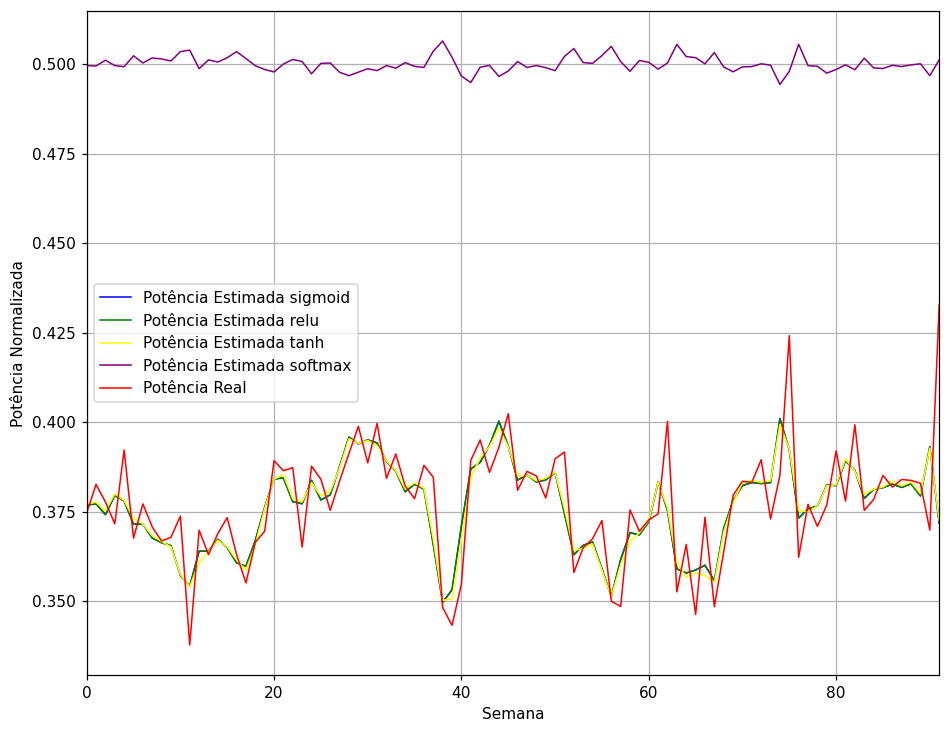

In [55]:
plt.figure(figsize=(10,8),dpi=110)
plt.plot(y_pred[:,0],lw=1,color='Blue')
plt.plot(y_pred_relu[:,0],lw=1,color='Green')
plt.plot(y_pred_tanh[:,0],lw=1,color='Yellow')
plt.plot(y_pred_softmax[:,0],lw=1,color='Purple')
plt.plot(y_test[:,0],lw=1,color='Red')
plt.grid(True)
plt.xlim([0,91])
plt.xlabel('Semana')
plt.ylabel('Potência Normalizada')
plt.legend(['Potência Estimada sigmoid', 'Potência Estimada relu', 'Potência Estimada tanh', 'Potência Estimada softmax', 'Potência Real']) 

In [56]:
print("Loss sigmoid: {}".format(val_loss))
print("Loss relu: {}".format(val_loss_relu))
print("Loss tanh: {}".format(val_loss_tanh))
print("Loss softmax: {}".format(val_loss_softmax))

Loss sigmoid: 0.0001251572248293087
Loss relu: 0.00012596065062098205
Loss tanh: 0.00012393244833219796
Loss softmax: 0.015513215214014053


In [57]:
print("MSE sigmoid: {}".format(val_mse))
print("MSE relu: {}".format(val_mse_relu))
print("MSE tanh: {}".format(val_mse_tanh))
print("MSE softmax: {}".format(val_mse_softmax))

MSE sigmoid: 0.0001251572248293087
MSE relu: 0.00012596065062098205
MSE tanh: 0.00012393244833219796
MSE softmax: 0.015513215214014053


### Creating the best model to this dataset

In [91]:
best_model = createModel(activation="relu", qtdNeuronsHidenLayers = 40, qtdHidenLayers=4, metrics=['mean_squared_error', "mean_absolute_error", "mape"],verbosity=True)

Add Input layer with 5 inputs
Activation function: relu
Adding hiden layer 1 with 40
Adding hiden layer 2 with 40
Adding hiden layer 3 with 40
Adding hiden layer 4 with 40
Adding output layer with 2 and using relu as activation function
Compiling module with optimizer:adam, loss:mean_squared_error, metrics:['mean_squared_error', 'mean_absolute_error', 'mape']


In [92]:
best_model.fit(x_train, y_train, epochs=10000)

Epoch 1/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0858 - mean_squared_error: 0.0858 - mean_absolute_error: 0.2910 - mape: 76.6333
Epoch 2/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0389 - mean_squared_error: 0.0389 - mean_absolute_error: 0.1931 - mape: 50.7311
Epoch 3/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - mean_absolute_error: 0.0762 - mape: 19.8657
Epoch 4/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - mean_absolute_error: 0.0411 - mape: 11.0288
Epoch 5/10000
7/7 [==============================] - 0s 1ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - mean_absolute_error: 0.0568 - mape: 15.2618
Epoch 6/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.5041e-04 - mean_squared_error: 8.5041e-04 - mean_absolute_error: 0.0227 - mape: 6.1111
Epoch 7/10000
7/7 [==============================] - 0s 1ms/ste

7/7 [==============================] - 0s 902us/step - loss: 4.5962e-04 - mean_squared_error: 4.5962e-04 - mean_absolute_error: 0.0165 - mape: 4.4302
Epoch 52/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.9144e-04 - mean_squared_error: 4.9144e-04 - mean_absolute_error: 0.0182 - mape: 4.8363
Epoch 53/10000
7/7 [==============================] - 0s 832us/step - loss: 4.5915e-04 - mean_squared_error: 4.5915e-04 - mean_absolute_error: 0.0168 - mape: 4.5134
Epoch 54/10000
7/7 [==============================] - 0s 971us/step - loss: 4.5937e-04 - mean_squared_error: 4.5937e-04 - mean_absolute_error: 0.0166 - mape: 4.4639
Epoch 55/10000
7/7 [==============================] - 0s 804us/step - loss: 4.5593e-04 - mean_squared_error: 4.5593e-04 - mean_absolute_error: 0.0170 - mape: 4.5328
Epoch 56/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.4939e-04 - mean_squared_error: 4.4939e-04 - mean_absolute_error: 0.0166 - mape: 4.4446
Epoch 57/10000
7/7 [=========

7/7 [==============================] - 0s 1ms/step - loss: 4.1365e-04 - mean_squared_error: 4.1365e-04 - mean_absolute_error: 0.0158 - mape: 4.2293
Epoch 101/10000
7/7 [==============================] - 0s 900us/step - loss: 4.1521e-04 - mean_squared_error: 4.1521e-04 - mean_absolute_error: 0.0162 - mape: 4.3095
Epoch 102/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.1085e-04 - mean_squared_error: 4.1085e-04 - mean_absolute_error: 0.0156 - mape: 4.1832
Epoch 103/10000
7/7 [==============================] - 0s 909us/step - loss: 4.0914e-04 - mean_squared_error: 4.0914e-04 - mean_absolute_error: 0.0159 - mape: 4.2382
Epoch 104/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.0605e-04 - mean_squared_error: 4.0605e-04 - mean_absolute_error: 0.0157 - mape: 4.2050
Epoch 105/10000
7/7 [==============================] - 0s 838us/step - loss: 4.2192e-04 - mean_squared_error: 4.2192e-04 - mean_absolute_error: 0.0161 - mape: 4.3020
Epoch 106/10000
7/7 [=====

7/7 [==============================] - 0s 902us/step - loss: 3.5356e-04 - mean_squared_error: 3.5356e-04 - mean_absolute_error: 0.0140 - mape: 3.7785
Epoch 150/10000
7/7 [==============================] - 0s 912us/step - loss: 3.7021e-04 - mean_squared_error: 3.7021e-04 - mean_absolute_error: 0.0147 - mape: 3.9304
Epoch 151/10000
7/7 [==============================] - 0s 952us/step - loss: 3.6283e-04 - mean_squared_error: 3.6283e-04 - mean_absolute_error: 0.0152 - mape: 4.0295
Epoch 152/10000
7/7 [==============================] - 0s 944us/step - loss: 3.6765e-04 - mean_squared_error: 3.6765e-04 - mean_absolute_error: 0.0143 - mape: 3.8556
Epoch 153/10000
7/7 [==============================] - 0s 974us/step - loss: 3.6487e-04 - mean_squared_error: 3.6487e-04 - mean_absolute_error: 0.0147 - mape: 3.9239
Epoch 154/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.4751e-04 - mean_squared_error: 3.4751e-04 - mean_absolute_error: 0.0142 - mape: 3.8115
Epoch 155/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 3.0649e-04 - mean_squared_error: 3.0649e-04 - mean_absolute_error: 0.0130 - mape: 3.4832
Epoch 199/10000
7/7 [==============================] - 0s 877us/step - loss: 3.1092e-04 - mean_squared_error: 3.1092e-04 - mean_absolute_error: 0.0132 - mape: 3.5203
Epoch 200/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.1584e-04 - mean_squared_error: 3.1584e-04 - mean_absolute_error: 0.0134 - mape: 3.5840
Epoch 201/10000
7/7 [==============================] - 0s 864us/step - loss: 3.0643e-04 - mean_squared_error: 3.0643e-04 - mean_absolute_error: 0.0130 - mape: 3.4838
Epoch 202/10000
7/7 [==============================] - 0s 968us/step - loss: 3.1216e-04 - mean_squared_error: 3.1216e-04 - mean_absolute_error: 0.0130 - mape: 3.4823
Epoch 203/10000
7/7 [==============================] - 0s 894us/step - loss: 3.4833e-04 - mean_squared_error: 3.4833e-04 - mean_absolute_error: 0.0140 - mape: 3.7361
Epoch 204/10000
7/7 [===

7/7 [==============================] - 0s 1ms/step - loss: 2.9061e-04 - mean_squared_error: 2.9061e-04 - mean_absolute_error: 0.0125 - mape: 3.3559
Epoch 248/10000
7/7 [==============================] - 0s 855us/step - loss: 2.8847e-04 - mean_squared_error: 2.8847e-04 - mean_absolute_error: 0.0129 - mape: 3.4274
Epoch 249/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.1150e-04 - mean_squared_error: 3.1150e-04 - mean_absolute_error: 0.0133 - mape: 3.5504
Epoch 250/10000
7/7 [==============================] - 0s 984us/step - loss: 3.0412e-04 - mean_squared_error: 3.0412e-04 - mean_absolute_error: 0.0127 - mape: 3.4305
Epoch 251/10000
7/7 [==============================] - 0s 879us/step - loss: 2.9670e-04 - mean_squared_error: 2.9670e-04 - mean_absolute_error: 0.0130 - mape: 3.4699
Epoch 252/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.9253e-04 - mean_squared_error: 2.9253e-04 - mean_absolute_error: 0.0128 - mape: 3.4193
Epoch 253/10000
7/7 [=====

7/7 [==============================] - 0s 1ms/step - loss: 2.6622e-04 - mean_squared_error: 2.6622e-04 - mean_absolute_error: 0.0119 - mape: 3.1924
Epoch 297/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.6998e-04 - mean_squared_error: 2.6998e-04 - mean_absolute_error: 0.0122 - mape: 3.2428
Epoch 298/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.8022e-04 - mean_squared_error: 2.8022e-04 - mean_absolute_error: 0.0123 - mape: 3.3013
Epoch 299/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.8060e-04 - mean_squared_error: 2.8060e-04 - mean_absolute_error: 0.0124 - mape: 3.3145
Epoch 300/10000
7/7 [==============================] - 0s 969us/step - loss: 2.8632e-04 - mean_squared_error: 2.8632e-04 - mean_absolute_error: 0.0128 - mape: 3.4148
Epoch 301/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.7564e-04 - mean_squared_error: 2.7564e-04 - mean_absolute_error: 0.0122 - mape: 3.2614
Epoch 302/10000
7/7 [=========

7/7 [==============================] - 0s 844us/step - loss: 2.5902e-04 - mean_squared_error: 2.5902e-04 - mean_absolute_error: 0.0119 - mape: 3.1765
Epoch 346/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.5450e-04 - mean_squared_error: 2.5450e-04 - mean_absolute_error: 0.0116 - mape: 3.1172
Epoch 347/10000
7/7 [==============================] - 0s 935us/step - loss: 2.5043e-04 - mean_squared_error: 2.5043e-04 - mean_absolute_error: 0.0117 - mape: 3.1182
Epoch 348/10000
7/7 [==============================] - 0s 934us/step - loss: 2.5011e-04 - mean_squared_error: 2.5011e-04 - mean_absolute_error: 0.0116 - mape: 3.0929
Epoch 349/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.7368e-04 - mean_squared_error: 2.7368e-04 - mean_absolute_error: 0.0122 - mape: 3.2821
Epoch 350/10000
7/7 [==============================] - 0s 851us/step - loss: 2.8623e-04 - mean_squared_error: 2.8623e-04 - mean_absolute_error: 0.0122 - mape: 3.2684
Epoch 351/10000
7/7 [===

7/7 [==============================] - 0s 1ms/step - loss: 2.5507e-04 - mean_squared_error: 2.5507e-04 - mean_absolute_error: 0.0119 - mape: 3.1779
Epoch 395/10000
7/7 [==============================] - 0s 862us/step - loss: 2.5361e-04 - mean_squared_error: 2.5361e-04 - mean_absolute_error: 0.0120 - mape: 3.1893
Epoch 396/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.5305e-04 - mean_squared_error: 2.5305e-04 - mean_absolute_error: 0.0122 - mape: 3.2519
Epoch 397/10000
7/7 [==============================] - 0s 869us/step - loss: 2.3560e-04 - mean_squared_error: 2.3560e-04 - mean_absolute_error: 0.0112 - mape: 3.0071
Epoch 398/10000
7/7 [==============================] - 0s 937us/step - loss: 2.3635e-04 - mean_squared_error: 2.3635e-04 - mean_absolute_error: 0.0113 - mape: 3.0248
Epoch 399/10000
7/7 [==============================] - 0s 861us/step - loss: 2.3348e-04 - mean_squared_error: 2.3348e-04 - mean_absolute_error: 0.0112 - mape: 3.0041
Epoch 400/10000
7/7 [===

7/7 [==============================] - 0s 950us/step - loss: 2.5363e-04 - mean_squared_error: 2.5363e-04 - mean_absolute_error: 0.0119 - mape: 3.1832
Epoch 444/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.5352e-04 - mean_squared_error: 2.5352e-04 - mean_absolute_error: 0.0124 - mape: 3.2922
Epoch 445/10000
7/7 [==============================] - 0s 938us/step - loss: 2.4251e-04 - mean_squared_error: 2.4251e-04 - mean_absolute_error: 0.0118 - mape: 3.1437
Epoch 446/10000
7/7 [==============================] - 0s 908us/step - loss: 2.5125e-04 - mean_squared_error: 2.5125e-04 - mean_absolute_error: 0.0121 - mape: 3.2308
Epoch 447/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.5048e-04 - mean_squared_error: 2.5048e-04 - mean_absolute_error: 0.0118 - mape: 3.1666
Epoch 448/10000
7/7 [==============================] - 0s 796us/step - loss: 2.4529e-04 - mean_squared_error: 2.4529e-04 - mean_absolute_error: 0.0116 - mape: 3.1169
Epoch 449/10000
7/7 [===

7/7 [==============================] - 0s 1ms/step - loss: 2.0518e-04 - mean_squared_error: 2.0518e-04 - mean_absolute_error: 0.0105 - mape: 2.8128
Epoch 493/10000
7/7 [==============================] - 0s 867us/step - loss: 2.0754e-04 - mean_squared_error: 2.0754e-04 - mean_absolute_error: 0.0106 - mape: 2.8442
Epoch 494/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.1041e-04 - mean_squared_error: 2.1041e-04 - mean_absolute_error: 0.0107 - mape: 2.8556
Epoch 495/10000
7/7 [==============================] - 0s 993us/step - loss: 2.1125e-04 - mean_squared_error: 2.1125e-04 - mean_absolute_error: 0.0107 - mape: 2.8769
Epoch 496/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.2937e-04 - mean_squared_error: 2.2937e-04 - mean_absolute_error: 0.0113 - mape: 3.0284
Epoch 497/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.4138e-04 - mean_squared_error: 2.4138e-04 - mean_absolute_error: 0.0118 - mape: 3.1555
Epoch 498/10000
7/7 [=======

7/7 [==============================] - 0s 893us/step - loss: 1.9706e-04 - mean_squared_error: 1.9706e-04 - mean_absolute_error: 0.0105 - mape: 2.8134
Epoch 542/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.0833e-04 - mean_squared_error: 2.0833e-04 - mean_absolute_error: 0.0105 - mape: 2.8177
Epoch 543/10000
7/7 [==============================] - 0s 850us/step - loss: 1.9842e-04 - mean_squared_error: 1.9842e-04 - mean_absolute_error: 0.0104 - mape: 2.7973
Epoch 544/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.9605e-04 - mean_squared_error: 1.9605e-04 - mean_absolute_error: 0.0104 - mape: 2.7902
Epoch 545/10000
7/7 [==============================] - 0s 935us/step - loss: 2.0433e-04 - mean_squared_error: 2.0433e-04 - mean_absolute_error: 0.0106 - mape: 2.8415
Epoch 546/10000
7/7 [==============================] - 0s 836us/step - loss: 2.0306e-04 - mean_squared_error: 2.0306e-04 - mean_absolute_error: 0.0108 - mape: 2.8897
Epoch 547/10000
7/7 [===

7/7 [==============================] - 0s 1ms/step - loss: 1.9552e-04 - mean_squared_error: 1.9552e-04 - mean_absolute_error: 0.0106 - mape: 2.8340
Epoch 591/10000
7/7 [==============================] - 0s 870us/step - loss: 1.7744e-04 - mean_squared_error: 1.7744e-04 - mean_absolute_error: 0.0098 - mape: 2.6316
Epoch 592/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.9492e-04 - mean_squared_error: 1.9492e-04 - mean_absolute_error: 0.0104 - mape: 2.7762
Epoch 593/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.1083e-04 - mean_squared_error: 2.1083e-04 - mean_absolute_error: 0.0110 - mape: 2.9450
Epoch 594/10000
7/7 [==============================] - 0s 953us/step - loss: 2.1747e-04 - mean_squared_error: 2.1747e-04 - mean_absolute_error: 0.0110 - mape: 2.9202
Epoch 595/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.8576e-04 - mean_squared_error: 1.8576e-04 - mean_absolute_error: 0.0102 - mape: 2.7345
Epoch 596/10000
7/7 [=======

7/7 [==============================] - 0s 980us/step - loss: 1.5792e-04 - mean_squared_error: 1.5792e-04 - mean_absolute_error: 0.0093 - mape: 2.4923
Epoch 640/10000
7/7 [==============================] - 0s 892us/step - loss: 1.6152e-04 - mean_squared_error: 1.6152e-04 - mean_absolute_error: 0.0095 - mape: 2.5335
Epoch 641/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.6043e-04 - mean_squared_error: 1.6043e-04 - mean_absolute_error: 0.0095 - mape: 2.5392
Epoch 642/10000
7/7 [==============================] - 0s 862us/step - loss: 1.6316e-04 - mean_squared_error: 1.6316e-04 - mean_absolute_error: 0.0095 - mape: 2.5335
Epoch 643/10000
7/7 [==============================] - 0s 917us/step - loss: 1.6361e-04 - mean_squared_error: 1.6361e-04 - mean_absolute_error: 0.0096 - mape: 2.5763
Epoch 644/10000
7/7 [==============================] - 0s 933us/step - loss: 1.6130e-04 - mean_squared_error: 1.6130e-04 - mean_absolute_error: 0.0095 - mape: 2.5393
Epoch 645/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 1.3671e-04 - mean_squared_error: 1.3671e-04 - mean_absolute_error: 0.0087 - mape: 2.3343
Epoch 689/10000
7/7 [==============================] - 0s 852us/step - loss: 1.3579e-04 - mean_squared_error: 1.3579e-04 - mean_absolute_error: 0.0086 - mape: 2.3149
Epoch 690/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.3255e-04 - mean_squared_error: 1.3255e-04 - mean_absolute_error: 0.0085 - mape: 2.2832
Epoch 691/10000
7/7 [==============================] - 0s 878us/step - loss: 1.3242e-04 - mean_squared_error: 1.3242e-04 - mean_absolute_error: 0.0086 - mape: 2.2882
Epoch 692/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.3589e-04 - mean_squared_error: 1.3589e-04 - mean_absolute_error: 0.0087 - mape: 2.3213
Epoch 693/10000
7/7 [==============================] - 0s 850us/step - loss: 1.4562e-04 - mean_squared_error: 1.4562e-04 - mean_absolute_error: 0.0091 - mape: 2.4372
Epoch 694/10000
7/7 [=====

7/7 [==============================] - 0s 893us/step - loss: 1.2285e-04 - mean_squared_error: 1.2285e-04 - mean_absolute_error: 0.0083 - mape: 2.2182
Epoch 738/10000
7/7 [==============================] - 0s 918us/step - loss: 1.0736e-04 - mean_squared_error: 1.0736e-04 - mean_absolute_error: 0.0077 - mape: 2.0633
Epoch 739/10000
7/7 [==============================] - 0s 971us/step - loss: 1.0737e-04 - mean_squared_error: 1.0737e-04 - mean_absolute_error: 0.0077 - mape: 2.0605
Epoch 740/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.0701e-04 - mean_squared_error: 1.0701e-04 - mean_absolute_error: 0.0076 - mape: 2.0349
Epoch 741/10000
7/7 [==============================] - 0s 818us/step - loss: 1.1488e-04 - mean_squared_error: 1.1488e-04 - mean_absolute_error: 0.0081 - mape: 2.1568
Epoch 742/10000
7/7 [==============================] - 0s 991us/step - loss: 1.1164e-04 - mean_squared_error: 1.1164e-04 - mean_absolute_error: 0.0080 - mape: 2.1458
Epoch 743/10000
7/7 [=

7/7 [==============================] - 0s 797us/step - loss: 8.8031e-05 - mean_squared_error: 8.8031e-05 - mean_absolute_error: 0.0070 - mape: 1.8864
Epoch 787/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.3994e-05 - mean_squared_error: 8.3994e-05 - mean_absolute_error: 0.0068 - mape: 1.8090
Epoch 788/10000
7/7 [==============================] - 0s 862us/step - loss: 9.0625e-05 - mean_squared_error: 9.0625e-05 - mean_absolute_error: 0.0071 - mape: 1.9058
Epoch 789/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.8970e-05 - mean_squared_error: 8.8970e-05 - mean_absolute_error: 0.0070 - mape: 1.8745
Epoch 790/10000
7/7 [==============================] - 0s 855us/step - loss: 8.6839e-05 - mean_squared_error: 8.6839e-05 - mean_absolute_error: 0.0069 - mape: 1.8560
Epoch 791/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.5345e-05 - mean_squared_error: 8.5345e-05 - mean_absolute_error: 0.0069 - mape: 1.8443
Epoch 792/10000
7/7 [=====

7/7 [==============================] - 0s 1ms/step - loss: 7.4405e-05 - mean_squared_error: 7.4405e-05 - mean_absolute_error: 0.0063 - mape: 1.6954
Epoch 836/10000
7/7 [==============================] - 0s 885us/step - loss: 7.3773e-05 - mean_squared_error: 7.3773e-05 - mean_absolute_error: 0.0063 - mape: 1.6883
Epoch 837/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.5165e-05 - mean_squared_error: 7.5165e-05 - mean_absolute_error: 0.0065 - mape: 1.7275
Epoch 838/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.4980e-05 - mean_squared_error: 7.4980e-05 - mean_absolute_error: 0.0065 - mape: 1.7364
Epoch 839/10000
7/7 [==============================] - 0s 901us/step - loss: 7.2782e-05 - mean_squared_error: 7.2782e-05 - mean_absolute_error: 0.0062 - mape: 1.6646
Epoch 840/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.6561e-05 - mean_squared_error: 7.6561e-05 - mean_absolute_error: 0.0065 - mape: 1.7458
Epoch 841/10000
7/7 [=======

7/7 [==============================] - 0s 850us/step - loss: 7.2325e-05 - mean_squared_error: 7.2325e-05 - mean_absolute_error: 0.0063 - mape: 1.6726
Epoch 885/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2043e-05 - mean_squared_error: 7.2043e-05 - mean_absolute_error: 0.0062 - mape: 1.6702
Epoch 886/10000
7/7 [==============================] - 0s 862us/step - loss: 7.1754e-05 - mean_squared_error: 7.1754e-05 - mean_absolute_error: 0.0063 - mape: 1.6828
Epoch 887/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.3273e-05 - mean_squared_error: 7.3273e-05 - mean_absolute_error: 0.0063 - mape: 1.6828
Epoch 888/10000
7/7 [==============================] - 0s 867us/step - loss: 7.2108e-05 - mean_squared_error: 7.2108e-05 - mean_absolute_error: 0.0062 - mape: 1.6698
Epoch 889/10000
7/7 [==============================] - 0s 938us/step - loss: 6.9923e-05 - mean_squared_error: 6.9923e-05 - mean_absolute_error: 0.0061 - mape: 1.6336
Epoch 890/10000
7/7 [===

7/7 [==============================] - 0s 934us/step - loss: 7.3845e-05 - mean_squared_error: 7.3845e-05 - mean_absolute_error: 0.0063 - mape: 1.6752
Epoch 934/10000
7/7 [==============================] - 0s 884us/step - loss: 7.1859e-05 - mean_squared_error: 7.1859e-05 - mean_absolute_error: 0.0063 - mape: 1.6715
Epoch 935/10000
7/7 [==============================] - 0s 942us/step - loss: 7.2729e-05 - mean_squared_error: 7.2729e-05 - mean_absolute_error: 0.0063 - mape: 1.6885
Epoch 936/10000
7/7 [==============================] - 0s 896us/step - loss: 7.0178e-05 - mean_squared_error: 7.0178e-05 - mean_absolute_error: 0.0061 - mape: 1.6434
Epoch 937/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1520e-05 - mean_squared_error: 7.1520e-05 - mean_absolute_error: 0.0062 - mape: 1.6471
Epoch 938/10000
7/7 [==============================] - 0s 874us/step - loss: 7.0164e-05 - mean_squared_error: 7.0164e-05 - mean_absolute_error: 0.0062 - mape: 1.6536
Epoch 939/10000
7/7 [=

7/7 [==============================] - 0s 941us/step - loss: 7.3808e-05 - mean_squared_error: 7.3808e-05 - mean_absolute_error: 0.0064 - mape: 1.7045
Epoch 983/10000
7/7 [==============================] - 0s 993us/step - loss: 7.1118e-05 - mean_squared_error: 7.1118e-05 - mean_absolute_error: 0.0062 - mape: 1.6624
Epoch 984/10000
7/7 [==============================] - 0s 934us/step - loss: 6.8866e-05 - mean_squared_error: 6.8866e-05 - mean_absolute_error: 0.0060 - mape: 1.6183
Epoch 985/10000
7/7 [==============================] - 0s 932us/step - loss: 6.9922e-05 - mean_squared_error: 6.9922e-05 - mean_absolute_error: 0.0061 - mape: 1.6376
Epoch 986/10000
7/7 [==============================] - 0s 932us/step - loss: 6.7952e-05 - mean_squared_error: 6.7952e-05 - mean_absolute_error: 0.0061 - mape: 1.6198
Epoch 987/10000
7/7 [==============================] - 0s 891us/step - loss: 7.6255e-05 - mean_squared_error: 7.6255e-05 - mean_absolute_error: 0.0064 - mape: 1.7169
Epoch 988/10000
7/7 

7/7 [==============================] - 0s 2ms/step - loss: 7.5705e-05 - mean_squared_error: 7.5705e-05 - mean_absolute_error: 0.0064 - mape: 1.7226
Epoch 1032/10000
7/7 [==============================] - 0s 945us/step - loss: 9.5650e-05 - mean_squared_error: 9.5650e-05 - mean_absolute_error: 0.0076 - mape: 2.0185
Epoch 1033/10000
7/7 [==============================] - 0s 843us/step - loss: 9.2336e-05 - mean_squared_error: 9.2336e-05 - mean_absolute_error: 0.0074 - mape: 1.9699
Epoch 1034/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.6103e-05 - mean_squared_error: 7.6103e-05 - mean_absolute_error: 0.0064 - mape: 1.7195
Epoch 1035/10000
7/7 [==============================] - 0s 840us/step - loss: 7.4310e-05 - mean_squared_error: 7.4310e-05 - mean_absolute_error: 0.0064 - mape: 1.7036
Epoch 1036/10000
7/7 [==============================] - 0s 981us/step - loss: 7.6461e-05 - mean_squared_error: 7.6461e-05 - mean_absolute_error: 0.0065 - mape: 1.7268
Epoch 1037/10000
7/

7/7 [==============================] - 0s 932us/step - loss: 6.8235e-05 - mean_squared_error: 6.8235e-05 - mean_absolute_error: 0.0060 - mape: 1.6133
Epoch 1081/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2786e-05 - mean_squared_error: 7.2786e-05 - mean_absolute_error: 0.0063 - mape: 1.6950
Epoch 1082/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0674e-05 - mean_squared_error: 7.0674e-05 - mean_absolute_error: 0.0061 - mape: 1.6416
Epoch 1083/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2049e-05 - mean_squared_error: 7.2049e-05 - mean_absolute_error: 0.0062 - mape: 1.6687
Epoch 1084/10000
7/7 [==============================] - 0s 915us/step - loss: 7.2092e-05 - mean_squared_error: 7.2092e-05 - mean_absolute_error: 0.0063 - mape: 1.6952
Epoch 1085/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.8769e-05 - mean_squared_error: 7.8769e-05 - mean_absolute_error: 0.0066 - mape: 1.7639
Epoch 1086/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 7.4456e-05 - mean_squared_error: 7.4456e-05 - mean_absolute_error: 0.0064 - mape: 1.7174
Epoch 1130/10000
7/7 [==============================] - 0s 2ms/step - loss: 7.4907e-05 - mean_squared_error: 7.4907e-05 - mean_absolute_error: 0.0065 - mape: 1.7290
Epoch 1131/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.0110e-05 - mean_squared_error: 8.0110e-05 - mean_absolute_error: 0.0067 - mape: 1.7851
Epoch 1132/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.8080e-05 - mean_squared_error: 7.8080e-05 - mean_absolute_error: 0.0066 - mape: 1.7636
Epoch 1133/10000
7/7 [==============================] - 0s 856us/step - loss: 8.1905e-05 - mean_squared_error: 8.1905e-05 - mean_absolute_error: 0.0068 - mape: 1.8228
Epoch 1134/10000
7/7 [==============================] - 0s 899us/step - loss: 7.4438e-05 - mean_squared_error: 7.4438e-05 - mean_absolute_error: 0.0064 - mape: 1.7144
Epoch 1135/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 6.9140e-05 - mean_squared_error: 6.9140e-05 - mean_absolute_error: 0.0061 - mape: 1.6324
Epoch 1179/10000
7/7 [==============================] - 0s 993us/step - loss: 7.1954e-05 - mean_squared_error: 7.1954e-05 - mean_absolute_error: 0.0063 - mape: 1.6731
Epoch 1180/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9121e-05 - mean_squared_error: 6.9121e-05 - mean_absolute_error: 0.0060 - mape: 1.6172
Epoch 1181/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1658e-05 - mean_squared_error: 7.1658e-05 - mean_absolute_error: 0.0063 - mape: 1.6730
Epoch 1182/10000
7/7 [==============================] - 0s 793us/step - loss: 7.0535e-05 - mean_squared_error: 7.0535e-05 - mean_absolute_error: 0.0062 - mape: 1.6547
Epoch 1183/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.7507e-05 - mean_squared_error: 6.7507e-05 - mean_absolute_error: 0.0060 - mape: 1.6010
Epoch 1184/10000
7/7 [=

7/7 [==============================] - 0s 867us/step - loss: 7.0203e-05 - mean_squared_error: 7.0203e-05 - mean_absolute_error: 0.0062 - mape: 1.6470
Epoch 1228/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9641e-05 - mean_squared_error: 6.9641e-05 - mean_absolute_error: 0.0061 - mape: 1.6362
Epoch 1229/10000
7/7 [==============================] - 0s 798us/step - loss: 7.3718e-05 - mean_squared_error: 7.3718e-05 - mean_absolute_error: 0.0064 - mape: 1.7203
Epoch 1230/10000
7/7 [==============================] - 0s 983us/step - loss: 6.7879e-05 - mean_squared_error: 6.7879e-05 - mean_absolute_error: 0.0060 - mape: 1.6040
Epoch 1231/10000
7/7 [==============================] - 0s 843us/step - loss: 7.0528e-05 - mean_squared_error: 7.0528e-05 - mean_absolute_error: 0.0062 - mape: 1.6476
Epoch 1232/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1501e-05 - mean_squared_error: 7.1501e-05 - mean_absolute_error: 0.0063 - mape: 1.6841
Epoch 1233/10000
7/

7/7 [==============================] - 0s 835us/step - loss: 7.4758e-05 - mean_squared_error: 7.4758e-05 - mean_absolute_error: 0.0064 - mape: 1.7132
Epoch 1277/10000
7/7 [==============================] - 0s 998us/step - loss: 7.6746e-05 - mean_squared_error: 7.6746e-05 - mean_absolute_error: 0.0065 - mape: 1.7509
Epoch 1278/10000
7/7 [==============================] - 0s 875us/step - loss: 7.1392e-05 - mean_squared_error: 7.1392e-05 - mean_absolute_error: 0.0063 - mape: 1.6814
Epoch 1279/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.3665e-05 - mean_squared_error: 7.3665e-05 - mean_absolute_error: 0.0065 - mape: 1.7274
Epoch 1280/10000
7/7 [==============================] - 0s 901us/step - loss: 7.3010e-05 - mean_squared_error: 7.3010e-05 - mean_absolute_error: 0.0065 - mape: 1.7244
Epoch 1281/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0301e-05 - mean_squared_error: 7.0301e-05 - mean_absolute_error: 0.0062 - mape: 1.6512
Epoch 1282/10000
7/

7/7 [==============================] - 0s 938us/step - loss: 6.9449e-05 - mean_squared_error: 6.9449e-05 - mean_absolute_error: 0.0061 - mape: 1.6255
Epoch 1326/10000
7/7 [==============================] - 0s 860us/step - loss: 6.9399e-05 - mean_squared_error: 6.9399e-05 - mean_absolute_error: 0.0061 - mape: 1.6435
Epoch 1327/10000
7/7 [==============================] - 0s 929us/step - loss: 7.3006e-05 - mean_squared_error: 7.3006e-05 - mean_absolute_error: 0.0064 - mape: 1.7015
Epoch 1328/10000
7/7 [==============================] - 0s 959us/step - loss: 7.4592e-05 - mean_squared_error: 7.4592e-05 - mean_absolute_error: 0.0065 - mape: 1.7454
Epoch 1329/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9486e-05 - mean_squared_error: 6.9486e-05 - mean_absolute_error: 0.0061 - mape: 1.6446
Epoch 1330/10000
7/7 [==============================] - 0s 850us/step - loss: 6.9911e-05 - mean_squared_error: 6.9911e-05 - mean_absolute_error: 0.0061 - mape: 1.6235
Epoch 1331/10000


7/7 [==============================] - 0s 1ms/step - loss: 7.3811e-05 - mean_squared_error: 7.3811e-05 - mean_absolute_error: 0.0064 - mape: 1.7079
Epoch 1375/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8024e-05 - mean_squared_error: 6.8024e-05 - mean_absolute_error: 0.0061 - mape: 1.6231
Epoch 1376/10000
7/7 [==============================] - 0s 994us/step - loss: 6.9450e-05 - mean_squared_error: 6.9450e-05 - mean_absolute_error: 0.0061 - mape: 1.6407
Epoch 1377/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2876e-05 - mean_squared_error: 7.2876e-05 - mean_absolute_error: 0.0064 - mape: 1.7079
Epoch 1378/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0595e-05 - mean_squared_error: 7.0595e-05 - mean_absolute_error: 0.0063 - mape: 1.6729
Epoch 1379/10000
7/7 [==============================] - 0s 847us/step - loss: 7.0325e-05 - mean_squared_error: 7.0325e-05 - mean_absolute_error: 0.0061 - mape: 1.6357
Epoch 1380/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 6.8514e-05 - mean_squared_error: 6.8514e-05 - mean_absolute_error: 0.0061 - mape: 1.6266
Epoch 1424/10000
7/7 [==============================] - 0s 880us/step - loss: 6.6868e-05 - mean_squared_error: 6.6868e-05 - mean_absolute_error: 0.0060 - mape: 1.5988
Epoch 1425/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9574e-05 - mean_squared_error: 6.9574e-05 - mean_absolute_error: 0.0062 - mape: 1.6487
Epoch 1426/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.3601e-05 - mean_squared_error: 7.3601e-05 - mean_absolute_error: 0.0064 - mape: 1.7184
Epoch 1427/10000
7/7 [==============================] - 0s 998us/step - loss: 7.8253e-05 - mean_squared_error: 7.8253e-05 - mean_absolute_error: 0.0065 - mape: 1.7384
Epoch 1428/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.3565e-05 - mean_squared_error: 7.3565e-05 - mean_absolute_error: 0.0064 - mape: 1.7056
Epoch 1429/10000
7/7 [=

7/7 [==============================] - 0s 864us/step - loss: 8.4790e-05 - mean_squared_error: 8.4790e-05 - mean_absolute_error: 0.0072 - mape: 1.9098
Epoch 1473/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.4554e-05 - mean_squared_error: 8.4554e-05 - mean_absolute_error: 0.0070 - mape: 1.8764
Epoch 1474/10000
7/7 [==============================] - 0s 841us/step - loss: 7.4679e-05 - mean_squared_error: 7.4679e-05 - mean_absolute_error: 0.0065 - mape: 1.7406
Epoch 1475/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.7877e-05 - mean_squared_error: 7.7877e-05 - mean_absolute_error: 0.0067 - mape: 1.7774
Epoch 1476/10000
7/7 [==============================] - 0s 932us/step - loss: 8.3848e-05 - mean_squared_error: 8.3848e-05 - mean_absolute_error: 0.0068 - mape: 1.8306
Epoch 1477/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.6215e-05 - mean_squared_error: 7.6215e-05 - mean_absolute_error: 0.0066 - mape: 1.7770
Epoch 1478/10000
7/7 

7/7 [==============================] - 0s 788us/step - loss: 7.2099e-05 - mean_squared_error: 7.2099e-05 - mean_absolute_error: 0.0063 - mape: 1.6998
Epoch 1522/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8927e-05 - mean_squared_error: 6.8927e-05 - mean_absolute_error: 0.0062 - mape: 1.6684
Epoch 1523/10000
7/7 [==============================] - 0s 876us/step - loss: 7.3224e-05 - mean_squared_error: 7.3224e-05 - mean_absolute_error: 0.0064 - mape: 1.7191
Epoch 1524/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9659e-05 - mean_squared_error: 6.9659e-05 - mean_absolute_error: 0.0062 - mape: 1.6601
Epoch 1525/10000
7/7 [==============================] - 0s 845us/step - loss: 6.8806e-05 - mean_squared_error: 6.8806e-05 - mean_absolute_error: 0.0061 - mape: 1.6254
Epoch 1526/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.7478e-05 - mean_squared_error: 6.7478e-05 - mean_absolute_error: 0.0060 - mape: 1.6187
Epoch 1527/10000
7/7 

7/7 [==============================] - 0s 972us/step - loss: 7.6439e-05 - mean_squared_error: 7.6439e-05 - mean_absolute_error: 0.0066 - mape: 1.7606
Epoch 1571/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.8430e-05 - mean_squared_error: 7.8430e-05 - mean_absolute_error: 0.0068 - mape: 1.8023
Epoch 1572/10000
7/7 [==============================] - 0s 916us/step - loss: 8.0154e-05 - mean_squared_error: 8.0154e-05 - mean_absolute_error: 0.0069 - mape: 1.8341
Epoch 1573/10000
7/7 [==============================] - 0s 928us/step - loss: 8.8071e-05 - mean_squared_error: 8.8071e-05 - mean_absolute_error: 0.0071 - mape: 1.8913
Epoch 1574/10000
7/7 [==============================] - 0s 972us/step - loss: 7.5189e-05 - mean_squared_error: 7.5189e-05 - mean_absolute_error: 0.0065 - mape: 1.7408
Epoch 1575/10000
7/7 [==============================] - 0s 890us/step - loss: 6.8274e-05 - mean_squared_error: 6.8274e-05 - mean_absolute_error: 0.0061 - mape: 1.6329
Epoch 1576/10000


7/7 [==============================] - 0s 1ms/step - loss: 7.2873e-05 - mean_squared_error: 7.2873e-05 - mean_absolute_error: 0.0063 - mape: 1.6952
Epoch 1620/10000
7/7 [==============================] - 0s 952us/step - loss: 7.1489e-05 - mean_squared_error: 7.1489e-05 - mean_absolute_error: 0.0064 - mape: 1.7059
Epoch 1621/10000
7/7 [==============================] - 0s 998us/step - loss: 7.9662e-05 - mean_squared_error: 7.9662e-05 - mean_absolute_error: 0.0068 - mape: 1.8075
Epoch 1622/10000
7/7 [==============================] - 0s 892us/step - loss: 6.9854e-05 - mean_squared_error: 6.9854e-05 - mean_absolute_error: 0.0062 - mape: 1.6584
Epoch 1623/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9625e-05 - mean_squared_error: 6.9625e-05 - mean_absolute_error: 0.0062 - mape: 1.6676
Epoch 1624/10000
7/7 [==============================] - 0s 913us/step - loss: 7.0130e-05 - mean_squared_error: 7.0130e-05 - mean_absolute_error: 0.0061 - mape: 1.6348
Epoch 1625/10000
7/

7/7 [==============================] - 0s 1ms/step - loss: 6.9637e-05 - mean_squared_error: 6.9637e-05 - mean_absolute_error: 0.0062 - mape: 1.6584
Epoch 1669/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.5164e-05 - mean_squared_error: 7.5164e-05 - mean_absolute_error: 0.0065 - mape: 1.7468
Epoch 1670/10000
7/7 [==============================] - 0s 932us/step - loss: 7.6359e-05 - mean_squared_error: 7.6359e-05 - mean_absolute_error: 0.0067 - mape: 1.7986
Epoch 1671/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8620e-05 - mean_squared_error: 6.8620e-05 - mean_absolute_error: 0.0061 - mape: 1.6346
Epoch 1672/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2062e-05 - mean_squared_error: 7.2062e-05 - mean_absolute_error: 0.0064 - mape: 1.7194
Epoch 1673/10000
7/7 [==============================] - 0s 915us/step - loss: 6.9127e-05 - mean_squared_error: 6.9127e-05 - mean_absolute_error: 0.0062 - mape: 1.6545
Epoch 1674/10000
7/7 [=

7/7 [==============================] - 0s 911us/step - loss: 7.0158e-05 - mean_squared_error: 7.0158e-05 - mean_absolute_error: 0.0062 - mape: 1.6542
Epoch 1718/10000
7/7 [==============================] - 0s 997us/step - loss: 7.1314e-05 - mean_squared_error: 7.1314e-05 - mean_absolute_error: 0.0062 - mape: 1.6714
Epoch 1719/10000
7/7 [==============================] - 0s 931us/step - loss: 7.1743e-05 - mean_squared_error: 7.1743e-05 - mean_absolute_error: 0.0063 - mape: 1.6879
Epoch 1720/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1675e-05 - mean_squared_error: 7.1675e-05 - mean_absolute_error: 0.0063 - mape: 1.6978
Epoch 1721/10000
7/7 [==============================] - 0s 875us/step - loss: 6.9481e-05 - mean_squared_error: 6.9481e-05 - mean_absolute_error: 0.0061 - mape: 1.6312
Epoch 1722/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1957e-05 - mean_squared_error: 7.1957e-05 - mean_absolute_error: 0.0063 - mape: 1.6894
Epoch 1723/10000
7/

7/7 [==============================] - 0s 982us/step - loss: 6.9415e-05 - mean_squared_error: 6.9415e-05 - mean_absolute_error: 0.0060 - mape: 1.6107
Epoch 1767/10000
7/7 [==============================] - 0s 958us/step - loss: 7.0145e-05 - mean_squared_error: 7.0145e-05 - mean_absolute_error: 0.0061 - mape: 1.6437
Epoch 1768/10000
7/7 [==============================] - 0s 932us/step - loss: 6.9950e-05 - mean_squared_error: 6.9950e-05 - mean_absolute_error: 0.0062 - mape: 1.6590
Epoch 1769/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0420e-05 - mean_squared_error: 7.0420e-05 - mean_absolute_error: 0.0062 - mape: 1.6686
Epoch 1770/10000
7/7 [==============================] - 0s 908us/step - loss: 7.6214e-05 - mean_squared_error: 7.6214e-05 - mean_absolute_error: 0.0066 - mape: 1.7684
Epoch 1771/10000
7/7 [==============================] - 0s 1ms/step - loss: 8.0035e-05 - mean_squared_error: 8.0035e-05 - mean_absolute_error: 0.0068 - mape: 1.8138
Epoch 1772/10000
7/

7/7 [==============================] - 0s 1ms/step - loss: 6.5869e-05 - mean_squared_error: 6.5869e-05 - mean_absolute_error: 0.0059 - mape: 1.5925
Epoch 1816/10000
7/7 [==============================] - 0s 844us/step - loss: 6.9940e-05 - mean_squared_error: 6.9940e-05 - mean_absolute_error: 0.0062 - mape: 1.6621
Epoch 1817/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.2368e-05 - mean_squared_error: 7.2368e-05 - mean_absolute_error: 0.0064 - mape: 1.7010
Epoch 1818/10000
7/7 [==============================] - 0s 899us/step - loss: 6.7422e-05 - mean_squared_error: 6.7422e-05 - mean_absolute_error: 0.0061 - mape: 1.6327
Epoch 1819/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1822e-05 - mean_squared_error: 7.1822e-05 - mean_absolute_error: 0.0063 - mape: 1.6836
Epoch 1820/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8526e-05 - mean_squared_error: 6.8526e-05 - mean_absolute_error: 0.0062 - mape: 1.6574
Epoch 1821/10000
7/7 [=

7/7 [==============================] - 0s 851us/step - loss: 7.4677e-05 - mean_squared_error: 7.4677e-05 - mean_absolute_error: 0.0065 - mape: 1.7432
Epoch 1865/10000
7/7 [==============================] - 0s 963us/step - loss: 6.8823e-05 - mean_squared_error: 6.8823e-05 - mean_absolute_error: 0.0062 - mape: 1.6500
Epoch 1866/10000
7/7 [==============================] - 0s 866us/step - loss: 7.1737e-05 - mean_squared_error: 7.1737e-05 - mean_absolute_error: 0.0064 - mape: 1.7130
Epoch 1867/10000
7/7 [==============================] - 0s 984us/step - loss: 7.6498e-05 - mean_squared_error: 7.6498e-05 - mean_absolute_error: 0.0067 - mape: 1.7791
Epoch 1868/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9396e-05 - mean_squared_error: 6.9396e-05 - mean_absolute_error: 0.0062 - mape: 1.6700
Epoch 1869/10000
7/7 [==============================] - 0s 933us/step - loss: 8.0159e-05 - mean_squared_error: 8.0159e-05 - mean_absolute_error: 0.0069 - mape: 1.8428
Epoch 1870/10000


7/7 [==============================] - 0s 1ms/step - loss: 6.7826e-05 - mean_squared_error: 6.7826e-05 - mean_absolute_error: 0.0063 - mape: 1.6710
Epoch 1914/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0905e-05 - mean_squared_error: 7.0905e-05 - mean_absolute_error: 0.0062 - mape: 1.6590
Epoch 1915/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.7425e-05 - mean_squared_error: 6.7425e-05 - mean_absolute_error: 0.0060 - mape: 1.6161
Epoch 1916/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0413e-05 - mean_squared_error: 7.0413e-05 - mean_absolute_error: 0.0063 - mape: 1.6851
Epoch 1917/10000
7/7 [==============================] - 0s 996us/step - loss: 7.2269e-05 - mean_squared_error: 7.2269e-05 - mean_absolute_error: 0.0064 - mape: 1.7219
Epoch 1918/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9115e-05 - mean_squared_error: 6.9115e-05 - mean_absolute_error: 0.0062 - mape: 1.6585
Epoch 1919/10000
7/7 [===

7/7 [==============================] - 0s 930us/step - loss: 6.6747e-05 - mean_squared_error: 6.6747e-05 - mean_absolute_error: 0.0061 - mape: 1.6371
Epoch 1963/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.7944e-05 - mean_squared_error: 6.7944e-05 - mean_absolute_error: 0.0062 - mape: 1.6487
Epoch 1964/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.6429e-05 - mean_squared_error: 6.6429e-05 - mean_absolute_error: 0.0061 - mape: 1.6189
Epoch 1965/10000
7/7 [==============================] - 0s 905us/step - loss: 6.8240e-05 - mean_squared_error: 6.8240e-05 - mean_absolute_error: 0.0063 - mape: 1.6699
Epoch 1966/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.7346e-05 - mean_squared_error: 6.7346e-05 - mean_absolute_error: 0.0062 - mape: 1.6466
Epoch 1967/10000
7/7 [==============================] - 0s 845us/step - loss: 6.6651e-05 - mean_squared_error: 6.6651e-05 - mean_absolute_error: 0.0061 - mape: 1.6355
Epoch 1968/10000
7/7 

7/7 [==============================] - 0s 910us/step - loss: 7.9158e-05 - mean_squared_error: 7.9158e-05 - mean_absolute_error: 0.0068 - mape: 1.8134
Epoch 2012/10000
7/7 [==============================] - 0s 845us/step - loss: 6.8796e-05 - mean_squared_error: 6.8796e-05 - mean_absolute_error: 0.0063 - mape: 1.6781
Epoch 2013/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.7134e-05 - mean_squared_error: 6.7134e-05 - mean_absolute_error: 0.0061 - mape: 1.6332
Epoch 2014/10000
7/7 [==============================] - 0s 957us/step - loss: 6.8765e-05 - mean_squared_error: 6.8765e-05 - mean_absolute_error: 0.0063 - mape: 1.6871
Epoch 2015/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9147e-05 - mean_squared_error: 6.9147e-05 - mean_absolute_error: 0.0063 - mape: 1.6781
Epoch 2016/10000
7/7 [==============================] - 0s 888us/step - loss: 6.6756e-05 - mean_squared_error: 6.6756e-05 - mean_absolute_error: 0.0061 - mape: 1.6365
Epoch 2017/10000
7/

7/7 [==============================] - 0s 1ms/step - loss: 6.6299e-05 - mean_squared_error: 6.6299e-05 - mean_absolute_error: 0.0061 - mape: 1.6252
Epoch 2061/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.6872e-05 - mean_squared_error: 6.6872e-05 - mean_absolute_error: 0.0062 - mape: 1.6511
Epoch 2062/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.6400e-05 - mean_squared_error: 6.6400e-05 - mean_absolute_error: 0.0060 - mape: 1.6176
Epoch 2063/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.4913e-05 - mean_squared_error: 6.4913e-05 - mean_absolute_error: 0.0059 - mape: 1.5871
Epoch 2064/10000
7/7 [==============================] - 0s 960us/step - loss: 6.4252e-05 - mean_squared_error: 6.4252e-05 - mean_absolute_error: 0.0060 - mape: 1.5942
Epoch 2065/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.5288e-05 - mean_squared_error: 6.5288e-05 - mean_absolute_error: 0.0060 - mape: 1.6082
Epoch 2066/10000
7/7 [===

7/7 [==============================] - 0s 1ms/step - loss: 6.9313e-05 - mean_squared_error: 6.9313e-05 - mean_absolute_error: 0.0062 - mape: 1.6708
Epoch 2110/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.7186e-05 - mean_squared_error: 6.7186e-05 - mean_absolute_error: 0.0061 - mape: 1.6412
Epoch 2111/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8706e-05 - mean_squared_error: 6.8706e-05 - mean_absolute_error: 0.0063 - mape: 1.6844
Epoch 2112/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9341e-05 - mean_squared_error: 6.9341e-05 - mean_absolute_error: 0.0062 - mape: 1.6699
Epoch 2113/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.4864e-05 - mean_squared_error: 6.4864e-05 - mean_absolute_error: 0.0059 - mape: 1.5868
Epoch 2114/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.6548e-05 - mean_squared_error: 6.6548e-05 - mean_absolute_error: 0.0061 - mape: 1.6309
Epoch 2115/10000
7/7 [=====

7/7 [==============================] - 0s 1ms/step - loss: 6.2987e-05 - mean_squared_error: 6.2987e-05 - mean_absolute_error: 0.0059 - mape: 1.5867
Epoch 2159/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.2478e-05 - mean_squared_error: 6.2478e-05 - mean_absolute_error: 0.0059 - mape: 1.5675
Epoch 2160/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.3530e-05 - mean_squared_error: 6.3530e-05 - mean_absolute_error: 0.0060 - mape: 1.5935
Epoch 2161/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0454e-05 - mean_squared_error: 7.0454e-05 - mean_absolute_error: 0.0063 - mape: 1.6956
Epoch 2162/10000
7/7 [==============================] - 0s 974us/step - loss: 6.7659e-05 - mean_squared_error: 6.7659e-05 - mean_absolute_error: 0.0061 - mape: 1.6388
Epoch 2163/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8975e-05 - mean_squared_error: 6.8975e-05 - mean_absolute_error: 0.0064 - mape: 1.7003
Epoch 2164/10000
7/7 [===

7/7 [==============================] - 0s 1ms/step - loss: 6.3967e-05 - mean_squared_error: 6.3967e-05 - mean_absolute_error: 0.0060 - mape: 1.6125
Epoch 2208/10000
7/7 [==============================] - 0s 921us/step - loss: 6.5975e-05 - mean_squared_error: 6.5975e-05 - mean_absolute_error: 0.0061 - mape: 1.6374
Epoch 2209/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.7348e-05 - mean_squared_error: 6.7348e-05 - mean_absolute_error: 0.0061 - mape: 1.6431
Epoch 2210/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.4758e-05 - mean_squared_error: 6.4758e-05 - mean_absolute_error: 0.0060 - mape: 1.6073
Epoch 2211/10000
7/7 [==============================] - 0s 858us/step - loss: 6.5821e-05 - mean_squared_error: 6.5821e-05 - mean_absolute_error: 0.0060 - mape: 1.6167
Epoch 2212/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.5458e-05 - mean_squared_error: 6.5458e-05 - mean_absolute_error: 0.0061 - mape: 1.6248
Epoch 2213/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 6.5610e-05 - mean_squared_error: 6.5610e-05 - mean_absolute_error: 0.0061 - mape: 1.6234
Epoch 2257/10000
7/7 [==============================] - 0s 970us/step - loss: 6.7500e-05 - mean_squared_error: 6.7500e-05 - mean_absolute_error: 0.0060 - mape: 1.6209
Epoch 2258/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.4211e-05 - mean_squared_error: 6.4211e-05 - mean_absolute_error: 0.0060 - mape: 1.6077
Epoch 2259/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.2826e-05 - mean_squared_error: 6.2826e-05 - mean_absolute_error: 0.0059 - mape: 1.5847
Epoch 2260/10000
7/7 [==============================] - 0s 993us/step - loss: 6.4197e-05 - mean_squared_error: 6.4197e-05 - mean_absolute_error: 0.0060 - mape: 1.6114
Epoch 2261/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.5080e-05 - mean_squared_error: 6.5080e-05 - mean_absolute_error: 0.0060 - mape: 1.6078
Epoch 2262/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 6.7280e-05 - mean_squared_error: 6.7280e-05 - mean_absolute_error: 0.0062 - mape: 1.6461
Epoch 2306/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.4075e-05 - mean_squared_error: 6.4075e-05 - mean_absolute_error: 0.0060 - mape: 1.5962
Epoch 2307/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.4994e-05 - mean_squared_error: 6.4994e-05 - mean_absolute_error: 0.0061 - mape: 1.6385
Epoch 2308/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0373e-05 - mean_squared_error: 7.0373e-05 - mean_absolute_error: 0.0063 - mape: 1.6842
Epoch 2309/10000
7/7 [==============================] - 0s 919us/step - loss: 7.0320e-05 - mean_squared_error: 7.0320e-05 - mean_absolute_error: 0.0064 - mape: 1.7064
Epoch 2310/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.6832e-05 - mean_squared_error: 6.6832e-05 - mean_absolute_error: 0.0061 - mape: 1.6314
Epoch 2311/10000
7/7 [===

7/7 [==============================] - 0s 1ms/step - loss: 6.6429e-05 - mean_squared_error: 6.6429e-05 - mean_absolute_error: 0.0062 - mape: 1.6499
Epoch 2355/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.6178e-05 - mean_squared_error: 6.6178e-05 - mean_absolute_error: 0.0062 - mape: 1.6426
Epoch 2356/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.5847e-05 - mean_squared_error: 6.5847e-05 - mean_absolute_error: 0.0061 - mape: 1.6208
Epoch 2357/10000
7/7 [==============================] - 0s 926us/step - loss: 6.5087e-05 - mean_squared_error: 6.5087e-05 - mean_absolute_error: 0.0060 - mape: 1.6150
Epoch 2358/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.4030e-05 - mean_squared_error: 6.4030e-05 - mean_absolute_error: 0.0060 - mape: 1.6008
Epoch 2359/10000
7/7 [==============================] - 0s 937us/step - loss: 6.5144e-05 - mean_squared_error: 6.5144e-05 - mean_absolute_error: 0.0061 - mape: 1.6267
Epoch 2360/10000
7/7 [=

7/7 [==============================] - 0s 884us/step - loss: 6.2816e-05 - mean_squared_error: 6.2816e-05 - mean_absolute_error: 0.0059 - mape: 1.5808
Epoch 2404/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.2029e-05 - mean_squared_error: 6.2029e-05 - mean_absolute_error: 0.0059 - mape: 1.5669
Epoch 2405/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.4754e-05 - mean_squared_error: 6.4754e-05 - mean_absolute_error: 0.0060 - mape: 1.6158
Epoch 2406/10000
7/7 [==============================] - 0s 973us/step - loss: 6.7798e-05 - mean_squared_error: 6.7798e-05 - mean_absolute_error: 0.0061 - mape: 1.6273
Epoch 2407/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0073e-05 - mean_squared_error: 7.0073e-05 - mean_absolute_error: 0.0064 - mape: 1.7050
Epoch 2408/10000
7/7 [==============================] - 0s 883us/step - loss: 6.6605e-05 - mean_squared_error: 6.6605e-05 - mean_absolute_error: 0.0062 - mape: 1.6476
Epoch 2409/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 6.3584e-05 - mean_squared_error: 6.3584e-05 - mean_absolute_error: 0.0060 - mape: 1.5985
Epoch 2453/10000
7/7 [==============================] - 0s 912us/step - loss: 6.1663e-05 - mean_squared_error: 6.1663e-05 - mean_absolute_error: 0.0059 - mape: 1.5685
Epoch 2454/10000
7/7 [==============================] - 0s 864us/step - loss: 6.7256e-05 - mean_squared_error: 6.7256e-05 - mean_absolute_error: 0.0062 - mape: 1.6491
Epoch 2455/10000
7/7 [==============================] - 0s 944us/step - loss: 6.3512e-05 - mean_squared_error: 6.3512e-05 - mean_absolute_error: 0.0060 - mape: 1.6086
Epoch 2456/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.2890e-05 - mean_squared_error: 6.2890e-05 - mean_absolute_error: 0.0060 - mape: 1.6064
Epoch 2457/10000
7/7 [==============================] - 0s 901us/step - loss: 6.8194e-05 - mean_squared_error: 6.8194e-05 - mean_absolute_error: 0.0063 - mape: 1.6713
Epoch 2458/10000
7/

7/7 [==============================] - 0s 839us/step - loss: 6.5850e-05 - mean_squared_error: 6.5850e-05 - mean_absolute_error: 0.0062 - mape: 1.6457
Epoch 2502/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.4044e-05 - mean_squared_error: 6.4044e-05 - mean_absolute_error: 0.0060 - mape: 1.6064
Epoch 2503/10000
7/7 [==============================] - 0s 899us/step - loss: 6.6385e-05 - mean_squared_error: 6.6385e-05 - mean_absolute_error: 0.0062 - mape: 1.6522
Epoch 2504/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.2088e-05 - mean_squared_error: 6.2088e-05 - mean_absolute_error: 0.0060 - mape: 1.5948
Epoch 2505/10000
7/7 [==============================] - 0s 957us/step - loss: 6.2053e-05 - mean_squared_error: 6.2053e-05 - mean_absolute_error: 0.0059 - mape: 1.5742
Epoch 2506/10000
7/7 [==============================] - 0s 965us/step - loss: 6.2857e-05 - mean_squared_error: 6.2857e-05 - mean_absolute_error: 0.0059 - mape: 1.5911
Epoch 2507/10000
7/

7/7 [==============================] - 0s 1000us/step - loss: 6.0900e-05 - mean_squared_error: 6.0900e-05 - mean_absolute_error: 0.0058 - mape: 1.5605
Epoch 2551/10000
7/7 [==============================] - 0s 847us/step - loss: 6.8314e-05 - mean_squared_error: 6.8314e-05 - mean_absolute_error: 0.0064 - mape: 1.6996
Epoch 2552/10000
7/7 [==============================] - 0s 931us/step - loss: 7.1583e-05 - mean_squared_error: 7.1583e-05 - mean_absolute_error: 0.0065 - mape: 1.7359
Epoch 2553/10000
7/7 [==============================] - 0s 963us/step - loss: 6.8867e-05 - mean_squared_error: 6.8867e-05 - mean_absolute_error: 0.0063 - mape: 1.6860
Epoch 2554/10000
7/7 [==============================] - 0s 890us/step - loss: 6.9064e-05 - mean_squared_error: 6.9064e-05 - mean_absolute_error: 0.0062 - mape: 1.6673
Epoch 2555/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.1579e-05 - mean_squared_error: 6.1579e-05 - mean_absolute_error: 0.0059 - mape: 1.5728
Epoch 2556/10000

7/7 [==============================] - 0s 863us/step - loss: 6.4331e-05 - mean_squared_error: 6.4331e-05 - mean_absolute_error: 0.0061 - mape: 1.6138
Epoch 2600/10000
7/7 [==============================] - 0s 980us/step - loss: 6.1295e-05 - mean_squared_error: 6.1295e-05 - mean_absolute_error: 0.0058 - mape: 1.5618
Epoch 2601/10000
7/7 [==============================] - 0s 872us/step - loss: 6.7838e-05 - mean_squared_error: 6.7838e-05 - mean_absolute_error: 0.0062 - mape: 1.6676
Epoch 2602/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.6812e-05 - mean_squared_error: 6.6812e-05 - mean_absolute_error: 0.0062 - mape: 1.6621
Epoch 2603/10000
7/7 [==============================] - 0s 938us/step - loss: 6.2014e-05 - mean_squared_error: 6.2014e-05 - mean_absolute_error: 0.0059 - mape: 1.5840
Epoch 2604/10000
7/7 [==============================] - 0s 985us/step - loss: 6.3885e-05 - mean_squared_error: 6.3885e-05 - mean_absolute_error: 0.0060 - mape: 1.5997
Epoch 2605/10000


7/7 [==============================] - 0s 912us/step - loss: 7.0472e-05 - mean_squared_error: 7.0472e-05 - mean_absolute_error: 0.0063 - mape: 1.6759
Epoch 2649/10000
7/7 [==============================] - 0s 983us/step - loss: 6.4861e-05 - mean_squared_error: 6.4861e-05 - mean_absolute_error: 0.0060 - mape: 1.6013
Epoch 2650/10000
7/7 [==============================] - 0s 857us/step - loss: 6.6474e-05 - mean_squared_error: 6.6474e-05 - mean_absolute_error: 0.0062 - mape: 1.6533
Epoch 2651/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.1168e-05 - mean_squared_error: 6.1168e-05 - mean_absolute_error: 0.0058 - mape: 1.5450
Epoch 2652/10000
7/7 [==============================] - 0s 842us/step - loss: 6.6497e-05 - mean_squared_error: 6.6497e-05 - mean_absolute_error: 0.0061 - mape: 1.6384
Epoch 2653/10000
7/7 [==============================] - 0s 934us/step - loss: 6.9004e-05 - mean_squared_error: 6.9004e-05 - mean_absolute_error: 0.0063 - mape: 1.6828
Epoch 2654/10000


7/7 [==============================] - 0s 1ms/step - loss: 6.6643e-05 - mean_squared_error: 6.6643e-05 - mean_absolute_error: 0.0060 - mape: 1.6182
Epoch 2698/10000
7/7 [==============================] - 0s 898us/step - loss: 6.8204e-05 - mean_squared_error: 6.8204e-05 - mean_absolute_error: 0.0061 - mape: 1.6251
Epoch 2699/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.6571e-05 - mean_squared_error: 6.6571e-05 - mean_absolute_error: 0.0060 - mape: 1.6163
Epoch 2700/10000
7/7 [==============================] - 0s 881us/step - loss: 6.7257e-05 - mean_squared_error: 6.7257e-05 - mean_absolute_error: 0.0060 - mape: 1.6130
Epoch 2701/10000
7/7 [==============================] - 0s 983us/step - loss: 6.8536e-05 - mean_squared_error: 6.8536e-05 - mean_absolute_error: 0.0061 - mape: 1.6442
Epoch 2702/10000
7/7 [==============================] - 0s 862us/step - loss: 6.7747e-05 - mean_squared_error: 6.7747e-05 - mean_absolute_error: 0.0061 - mape: 1.6226
Epoch 2703/10000
7/

7/7 [==============================] - 0s 1ms/step - loss: 7.1021e-05 - mean_squared_error: 7.1021e-05 - mean_absolute_error: 0.0062 - mape: 1.6601
Epoch 2747/10000
7/7 [==============================] - 0s 921us/step - loss: 6.6206e-05 - mean_squared_error: 6.6206e-05 - mean_absolute_error: 0.0059 - mape: 1.5828
Epoch 2748/10000
7/7 [==============================] - 0s 954us/step - loss: 6.6221e-05 - mean_squared_error: 6.6221e-05 - mean_absolute_error: 0.0060 - mape: 1.6104
Epoch 2749/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9664e-05 - mean_squared_error: 6.9664e-05 - mean_absolute_error: 0.0062 - mape: 1.6682
Epoch 2750/10000
7/7 [==============================] - 0s 862us/step - loss: 6.8802e-05 - mean_squared_error: 6.8802e-05 - mean_absolute_error: 0.0061 - mape: 1.6400
Epoch 2751/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9965e-05 - mean_squared_error: 6.9965e-05 - mean_absolute_error: 0.0062 - mape: 1.6684
Epoch 2752/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 6.7048e-05 - mean_squared_error: 6.7048e-05 - mean_absolute_error: 0.0060 - mape: 1.6119
Epoch 2796/10000
7/7 [==============================] - 0s 913us/step - loss: 6.8414e-05 - mean_squared_error: 6.8414e-05 - mean_absolute_error: 0.0061 - mape: 1.6306
Epoch 2797/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9698e-05 - mean_squared_error: 6.9698e-05 - mean_absolute_error: 0.0062 - mape: 1.6670
Epoch 2798/10000
7/7 [==============================] - 0s 919us/step - loss: 6.8716e-05 - mean_squared_error: 6.8716e-05 - mean_absolute_error: 0.0061 - mape: 1.6298
Epoch 2799/10000
7/7 [==============================] - 0s 947us/step - loss: 6.5961e-05 - mean_squared_error: 6.5961e-05 - mean_absolute_error: 0.0060 - mape: 1.6032
Epoch 2800/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.5685e-05 - mean_squared_error: 6.5685e-05 - mean_absolute_error: 0.0060 - mape: 1.6085
Epoch 2801/10000
7/7 

7/7 [==============================] - 0s 907us/step - loss: 7.2260e-05 - mean_squared_error: 7.2260e-05 - mean_absolute_error: 0.0064 - mape: 1.7097
Epoch 2845/10000
7/7 [==============================] - 0s 927us/step - loss: 6.7725e-05 - mean_squared_error: 6.7725e-05 - mean_absolute_error: 0.0061 - mape: 1.6330
Epoch 2846/10000
7/7 [==============================] - 0s 963us/step - loss: 6.9055e-05 - mean_squared_error: 6.9055e-05 - mean_absolute_error: 0.0062 - mape: 1.6514
Epoch 2847/10000
7/7 [==============================] - 0s 914us/step - loss: 6.7772e-05 - mean_squared_error: 6.7772e-05 - mean_absolute_error: 0.0061 - mape: 1.6273
Epoch 2848/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.7668e-05 - mean_squared_error: 6.7668e-05 - mean_absolute_error: 0.0060 - mape: 1.6137
Epoch 2849/10000
7/7 [==============================] - 0s 859us/step - loss: 6.5249e-05 - mean_squared_error: 6.5249e-05 - mean_absolute_error: 0.0059 - mape: 1.5856
Epoch 2850/10000


7/7 [==============================] - 0s 1ms/step - loss: 7.8015e-05 - mean_squared_error: 7.8015e-05 - mean_absolute_error: 0.0067 - mape: 1.7844
Epoch 2894/10000
7/7 [==============================] - 0s 882us/step - loss: 6.8475e-05 - mean_squared_error: 6.8475e-05 - mean_absolute_error: 0.0062 - mape: 1.6552
Epoch 2895/10000
7/7 [==============================] - 0s 977us/step - loss: 7.2309e-05 - mean_squared_error: 7.2309e-05 - mean_absolute_error: 0.0064 - mape: 1.7110
Epoch 2896/10000
7/7 [==============================] - 0s 861us/step - loss: 6.9435e-05 - mean_squared_error: 6.9435e-05 - mean_absolute_error: 0.0062 - mape: 1.6514
Epoch 2897/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.7028e-05 - mean_squared_error: 6.7028e-05 - mean_absolute_error: 0.0060 - mape: 1.6191
Epoch 2898/10000
7/7 [==============================] - 0s 936us/step - loss: 6.7860e-05 - mean_squared_error: 6.7860e-05 - mean_absolute_error: 0.0061 - mape: 1.6381
Epoch 2899/10000
7/

7/7 [==============================] - 0s 1ms/step - loss: 6.5111e-05 - mean_squared_error: 6.5111e-05 - mean_absolute_error: 0.0059 - mape: 1.5799
Epoch 2943/10000
7/7 [==============================] - 0s 936us/step - loss: 6.8815e-05 - mean_squared_error: 6.8815e-05 - mean_absolute_error: 0.0062 - mape: 1.6533
Epoch 2944/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1021e-05 - mean_squared_error: 7.1021e-05 - mean_absolute_error: 0.0063 - mape: 1.6768
Epoch 2945/10000
7/7 [==============================] - 0s 993us/step - loss: 7.0995e-05 - mean_squared_error: 7.0995e-05 - mean_absolute_error: 0.0062 - mape: 1.6460
Epoch 2946/10000
7/7 [==============================] - 0s 956us/step - loss: 7.5395e-05 - mean_squared_error: 7.5395e-05 - mean_absolute_error: 0.0066 - mape: 1.7680
Epoch 2947/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0781e-05 - mean_squared_error: 7.0781e-05 - mean_absolute_error: 0.0062 - mape: 1.6659
Epoch 2948/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 6.5130e-05 - mean_squared_error: 6.5130e-05 - mean_absolute_error: 0.0059 - mape: 1.5853
Epoch 2992/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.5119e-05 - mean_squared_error: 6.5119e-05 - mean_absolute_error: 0.0059 - mape: 1.5845
Epoch 2993/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.6429e-05 - mean_squared_error: 6.6429e-05 - mean_absolute_error: 0.0060 - mape: 1.6046
Epoch 2994/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1267e-05 - mean_squared_error: 7.1267e-05 - mean_absolute_error: 0.0064 - mape: 1.7015
Epoch 2995/10000
7/7 [==============================] - 0s 959us/step - loss: 6.7920e-05 - mean_squared_error: 6.7920e-05 - mean_absolute_error: 0.0062 - mape: 1.6481
Epoch 2996/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.7156e-05 - mean_squared_error: 6.7156e-05 - mean_absolute_error: 0.0060 - mape: 1.6112
Epoch 2997/10000
7/7 [===

7/7 [==============================] - 0s 933us/step - loss: 7.3010e-05 - mean_squared_error: 7.3010e-05 - mean_absolute_error: 0.0064 - mape: 1.7179
Epoch 3041/10000
7/7 [==============================] - 0s 868us/step - loss: 7.2573e-05 - mean_squared_error: 7.2573e-05 - mean_absolute_error: 0.0064 - mape: 1.7215
Epoch 3042/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0318e-05 - mean_squared_error: 7.0318e-05 - mean_absolute_error: 0.0063 - mape: 1.6732
Epoch 3043/10000
7/7 [==============================] - 0s 892us/step - loss: 6.5550e-05 - mean_squared_error: 6.5550e-05 - mean_absolute_error: 0.0060 - mape: 1.6053
Epoch 3044/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8543e-05 - mean_squared_error: 6.8543e-05 - mean_absolute_error: 0.0062 - mape: 1.6560
Epoch 3045/10000
7/7 [==============================] - 0s 866us/step - loss: 6.7400e-05 - mean_squared_error: 6.7400e-05 - mean_absolute_error: 0.0060 - mape: 1.6182
Epoch 3046/10000
7/

7/7 [==============================] - 0s 1ms/step - loss: 6.7082e-05 - mean_squared_error: 6.7082e-05 - mean_absolute_error: 0.0061 - mape: 1.6332
Epoch 3090/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1006e-05 - mean_squared_error: 7.1006e-05 - mean_absolute_error: 0.0063 - mape: 1.6896
Epoch 3091/10000
7/7 [==============================] - 0s 962us/step - loss: 7.3629e-05 - mean_squared_error: 7.3629e-05 - mean_absolute_error: 0.0065 - mape: 1.7252
Epoch 3092/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.3436e-05 - mean_squared_error: 7.3436e-05 - mean_absolute_error: 0.0065 - mape: 1.7273
Epoch 3093/10000
7/7 [==============================] - 0s 948us/step - loss: 6.7472e-05 - mean_squared_error: 6.7472e-05 - mean_absolute_error: 0.0060 - mape: 1.6098
Epoch 3094/10000
7/7 [==============================] - 0s 945us/step - loss: 6.7460e-05 - mean_squared_error: 6.7460e-05 - mean_absolute_error: 0.0061 - mape: 1.6326
Epoch 3095/10000
7/7 

7/7 [==============================] - 0s 911us/step - loss: 6.4035e-05 - mean_squared_error: 6.4035e-05 - mean_absolute_error: 0.0059 - mape: 1.5780
Epoch 3139/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.3886e-05 - mean_squared_error: 7.3886e-05 - mean_absolute_error: 0.0066 - mape: 1.7657
Epoch 3140/10000
7/7 [==============================] - 0s 885us/step - loss: 6.5680e-05 - mean_squared_error: 6.5680e-05 - mean_absolute_error: 0.0060 - mape: 1.6162
Epoch 3141/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.7084e-05 - mean_squared_error: 6.7084e-05 - mean_absolute_error: 0.0061 - mape: 1.6352
Epoch 3142/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9334e-05 - mean_squared_error: 6.9334e-05 - mean_absolute_error: 0.0062 - mape: 1.6684
Epoch 3143/10000
7/7 [==============================] - 0s 894us/step - loss: 7.0500e-05 - mean_squared_error: 7.0500e-05 - mean_absolute_error: 0.0063 - mape: 1.6944
Epoch 3144/10000
7/7 

7/7 [==============================] - 0s 980us/step - loss: 7.2777e-05 - mean_squared_error: 7.2777e-05 - mean_absolute_error: 0.0065 - mape: 1.7484
Epoch 3188/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8312e-05 - mean_squared_error: 6.8312e-05 - mean_absolute_error: 0.0062 - mape: 1.6646
Epoch 3189/10000
7/7 [==============================] - 0s 958us/step - loss: 7.0628e-05 - mean_squared_error: 7.0628e-05 - mean_absolute_error: 0.0062 - mape: 1.6692
Epoch 3190/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8018e-05 - mean_squared_error: 6.8018e-05 - mean_absolute_error: 0.0061 - mape: 1.6441
Epoch 3191/10000
7/7 [==============================] - 0s 888us/step - loss: 6.9053e-05 - mean_squared_error: 6.9053e-05 - mean_absolute_error: 0.0062 - mape: 1.6577
Epoch 3192/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.7579e-05 - mean_squared_error: 6.7579e-05 - mean_absolute_error: 0.0062 - mape: 1.6458
Epoch 3193/10000
7/7 

7/7 [==============================] - 0s 989us/step - loss: 6.8456e-05 - mean_squared_error: 6.8456e-05 - mean_absolute_error: 0.0062 - mape: 1.6587
Epoch 3237/10000
7/7 [==============================] - 0s 931us/step - loss: 6.7908e-05 - mean_squared_error: 6.7908e-05 - mean_absolute_error: 0.0062 - mape: 1.6530
Epoch 3238/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.6443e-05 - mean_squared_error: 6.6443e-05 - mean_absolute_error: 0.0061 - mape: 1.6371
Epoch 3239/10000
7/7 [==============================] - 0s 868us/step - loss: 6.6276e-05 - mean_squared_error: 6.6276e-05 - mean_absolute_error: 0.0061 - mape: 1.6368
Epoch 3240/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0226e-05 - mean_squared_error: 7.0226e-05 - mean_absolute_error: 0.0064 - mape: 1.7129
Epoch 3241/10000
7/7 [==============================] - 0s 891us/step - loss: 6.8392e-05 - mean_squared_error: 6.8392e-05 - mean_absolute_error: 0.0062 - mape: 1.6591
Epoch 3242/10000
7/

7/7 [==============================] - 0s 965us/step - loss: 6.7188e-05 - mean_squared_error: 6.7188e-05 - mean_absolute_error: 0.0061 - mape: 1.6305
Epoch 3286/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.7794e-05 - mean_squared_error: 6.7794e-05 - mean_absolute_error: 0.0062 - mape: 1.6527
Epoch 3287/10000
7/7 [==============================] - 0s 929us/step - loss: 6.6730e-05 - mean_squared_error: 6.6730e-05 - mean_absolute_error: 0.0061 - mape: 1.6354
Epoch 3288/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.7257e-05 - mean_squared_error: 6.7257e-05 - mean_absolute_error: 0.0061 - mape: 1.6308
Epoch 3289/10000
7/7 [==============================] - 0s 973us/step - loss: 6.9296e-05 - mean_squared_error: 6.9296e-05 - mean_absolute_error: 0.0062 - mape: 1.6539
Epoch 3290/10000
7/7 [==============================] - 0s 851us/step - loss: 6.8517e-05 - mean_squared_error: 6.8517e-05 - mean_absolute_error: 0.0062 - mape: 1.6679
Epoch 3291/10000
7/

7/7 [==============================] - 0s 1ms/step - loss: 6.8762e-05 - mean_squared_error: 6.8762e-05 - mean_absolute_error: 0.0063 - mape: 1.6816
Epoch 3335/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9118e-05 - mean_squared_error: 6.9118e-05 - mean_absolute_error: 0.0063 - mape: 1.6952
Epoch 3336/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8364e-05 - mean_squared_error: 6.8364e-05 - mean_absolute_error: 0.0062 - mape: 1.6505
Epoch 3337/10000
7/7 [==============================] - 0s 2ms/step - loss: 6.5166e-05 - mean_squared_error: 6.5166e-05 - mean_absolute_error: 0.0060 - mape: 1.6083
Epoch 3338/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8237e-05 - mean_squared_error: 6.8237e-05 - mean_absolute_error: 0.0062 - mape: 1.6510
Epoch 3339/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.4624e-05 - mean_squared_error: 7.4624e-05 - mean_absolute_error: 0.0067 - mape: 1.7825
Epoch 3340/10000
7/7 [=====

7/7 [==============================] - 0s 1ms/step - loss: 6.3766e-05 - mean_squared_error: 6.3766e-05 - mean_absolute_error: 0.0060 - mape: 1.5963
Epoch 3384/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.4301e-05 - mean_squared_error: 6.4301e-05 - mean_absolute_error: 0.0060 - mape: 1.6070
Epoch 3385/10000
7/7 [==============================] - 0s 937us/step - loss: 6.2796e-05 - mean_squared_error: 6.2796e-05 - mean_absolute_error: 0.0059 - mape: 1.5825
Epoch 3386/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.3302e-05 - mean_squared_error: 6.3302e-05 - mean_absolute_error: 0.0060 - mape: 1.5958
Epoch 3387/10000
7/7 [==============================] - 0s 939us/step - loss: 6.1420e-05 - mean_squared_error: 6.1420e-05 - mean_absolute_error: 0.0058 - mape: 1.5603
Epoch 3388/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.0848e-05 - mean_squared_error: 6.0848e-05 - mean_absolute_error: 0.0058 - mape: 1.5503
Epoch 3389/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 6.2751e-05 - mean_squared_error: 6.2751e-05 - mean_absolute_error: 0.0060 - mape: 1.5932
Epoch 3433/10000
7/7 [==============================] - 0s 909us/step - loss: 6.1962e-05 - mean_squared_error: 6.1962e-05 - mean_absolute_error: 0.0059 - mape: 1.5673
Epoch 3434/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.2021e-05 - mean_squared_error: 6.2021e-05 - mean_absolute_error: 0.0058 - mape: 1.5617
Epoch 3435/10000
7/7 [==============================] - 0s 861us/step - loss: 6.2745e-05 - mean_squared_error: 6.2745e-05 - mean_absolute_error: 0.0059 - mape: 1.5843
Epoch 3436/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.1683e-05 - mean_squared_error: 6.1683e-05 - mean_absolute_error: 0.0058 - mape: 1.5638
Epoch 3437/10000
7/7 [==============================] - 0s 917us/step - loss: 6.3202e-05 - mean_squared_error: 6.3202e-05 - mean_absolute_error: 0.0060 - mape: 1.5989
Epoch 3438/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 6.4586e-05 - mean_squared_error: 6.4586e-05 - mean_absolute_error: 0.0061 - mape: 1.6466
Epoch 3482/10000
7/7 [==============================] - 0s 895us/step - loss: 6.3006e-05 - mean_squared_error: 6.3006e-05 - mean_absolute_error: 0.0060 - mape: 1.6091
Epoch 3483/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.9885e-05 - mean_squared_error: 5.9885e-05 - mean_absolute_error: 0.0058 - mape: 1.5613
Epoch 3484/10000
7/7 [==============================] - 0s 874us/step - loss: 6.4317e-05 - mean_squared_error: 6.4317e-05 - mean_absolute_error: 0.0061 - mape: 1.6288
Epoch 3485/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.0120e-05 - mean_squared_error: 6.0120e-05 - mean_absolute_error: 0.0059 - mape: 1.5691
Epoch 3486/10000
7/7 [==============================] - 0s 974us/step - loss: 5.9994e-05 - mean_squared_error: 5.9994e-05 - mean_absolute_error: 0.0058 - mape: 1.5554
Epoch 3487/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 6.9780e-05 - mean_squared_error: 6.9780e-05 - mean_absolute_error: 0.0064 - mape: 1.7060
Epoch 3531/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.6207e-05 - mean_squared_error: 6.6207e-05 - mean_absolute_error: 0.0062 - mape: 1.6604
Epoch 3532/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.2527e-05 - mean_squared_error: 6.2527e-05 - mean_absolute_error: 0.0060 - mape: 1.6000
Epoch 3533/10000
7/7 [==============================] - 0s 995us/step - loss: 5.9829e-05 - mean_squared_error: 5.9829e-05 - mean_absolute_error: 0.0058 - mape: 1.5544
Epoch 3534/10000
7/7 [==============================] - 0s 900us/step - loss: 6.1398e-05 - mean_squared_error: 6.1398e-05 - mean_absolute_error: 0.0060 - mape: 1.6064
Epoch 3535/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.3684e-05 - mean_squared_error: 6.3684e-05 - mean_absolute_error: 0.0061 - mape: 1.6264
Epoch 3536/10000
7/7 [=

7/7 [==============================] - 0s 920us/step - loss: 7.3545e-05 - mean_squared_error: 7.3545e-05 - mean_absolute_error: 0.0066 - mape: 1.7756
Epoch 3580/10000
7/7 [==============================] - 0s 895us/step - loss: 6.9230e-05 - mean_squared_error: 6.9230e-05 - mean_absolute_error: 0.0064 - mape: 1.7055
Epoch 3581/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.9989e-05 - mean_squared_error: 6.9989e-05 - mean_absolute_error: 0.0064 - mape: 1.7097
Epoch 3582/10000
7/7 [==============================] - 0s 978us/step - loss: 6.9400e-05 - mean_squared_error: 6.9400e-05 - mean_absolute_error: 0.0063 - mape: 1.6863
Epoch 3583/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.4807e-05 - mean_squared_error: 6.4807e-05 - mean_absolute_error: 0.0061 - mape: 1.6278
Epoch 3584/10000
7/7 [==============================] - 0s 933us/step - loss: 7.3206e-05 - mean_squared_error: 7.3206e-05 - mean_absolute_error: 0.0067 - mape: 1.7767
Epoch 3585/10000
7/

7/7 [==============================] - 0s 1ms/step - loss: 6.8007e-05 - mean_squared_error: 6.8007e-05 - mean_absolute_error: 0.0064 - mape: 1.7058
Epoch 3629/10000
7/7 [==============================] - 0s 988us/step - loss: 5.8913e-05 - mean_squared_error: 5.8913e-05 - mean_absolute_error: 0.0058 - mape: 1.5385
Epoch 3630/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.7595e-05 - mean_squared_error: 5.7595e-05 - mean_absolute_error: 0.0057 - mape: 1.5225
Epoch 3631/10000
7/7 [==============================] - 0s 940us/step - loss: 5.7620e-05 - mean_squared_error: 5.7620e-05 - mean_absolute_error: 0.0058 - mape: 1.5440
Epoch 3632/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.7837e-05 - mean_squared_error: 5.7837e-05 - mean_absolute_error: 0.0058 - mape: 1.5433
Epoch 3633/10000
7/7 [==============================] - 0s 884us/step - loss: 5.8619e-05 - mean_squared_error: 5.8619e-05 - mean_absolute_error: 0.0059 - mape: 1.5736
Epoch 3634/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 6.0003e-05 - mean_squared_error: 6.0003e-05 - mean_absolute_error: 0.0059 - mape: 1.5645
Epoch 3678/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.8677e-05 - mean_squared_error: 5.8677e-05 - mean_absolute_error: 0.0058 - mape: 1.5540
Epoch 3679/10000
7/7 [==============================] - 0s 956us/step - loss: 5.7160e-05 - mean_squared_error: 5.7160e-05 - mean_absolute_error: 0.0058 - mape: 1.5381
Epoch 3680/10000
7/7 [==============================] - 0s 2ms/step - loss: 5.6808e-05 - mean_squared_error: 5.6808e-05 - mean_absolute_error: 0.0057 - mape: 1.5318
Epoch 3681/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.1515e-05 - mean_squared_error: 6.1515e-05 - mean_absolute_error: 0.0059 - mape: 1.5864
Epoch 3682/10000
7/7 [==============================] - 0s 943us/step - loss: 6.0952e-05 - mean_squared_error: 6.0952e-05 - mean_absolute_error: 0.0061 - mape: 1.6254
Epoch 3683/10000
7/7 [=

7/7 [==============================] - 0s 838us/step - loss: 5.8599e-05 - mean_squared_error: 5.8599e-05 - mean_absolute_error: 0.0058 - mape: 1.5610
Epoch 3727/10000
7/7 [==============================] - 0s 999us/step - loss: 6.1474e-05 - mean_squared_error: 6.1474e-05 - mean_absolute_error: 0.0060 - mape: 1.6135
Epoch 3728/10000
7/7 [==============================] - 0s 930us/step - loss: 5.7101e-05 - mean_squared_error: 5.7101e-05 - mean_absolute_error: 0.0058 - mape: 1.5396
Epoch 3729/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.6213e-05 - mean_squared_error: 5.6213e-05 - mean_absolute_error: 0.0057 - mape: 1.5325
Epoch 3730/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.6674e-05 - mean_squared_error: 5.6674e-05 - mean_absolute_error: 0.0058 - mape: 1.5448
Epoch 3731/10000
7/7 [==============================] - 0s 2ms/step - loss: 6.0646e-05 - mean_squared_error: 6.0646e-05 - mean_absolute_error: 0.0060 - mape: 1.6057
Epoch 3732/10000
7/7 

7/7 [==============================] - 0s 854us/step - loss: 7.0464e-05 - mean_squared_error: 7.0464e-05 - mean_absolute_error: 0.0064 - mape: 1.6985
Epoch 3776/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1171e-05 - mean_squared_error: 7.1171e-05 - mean_absolute_error: 0.0065 - mape: 1.7427
Epoch 3777/10000
7/7 [==============================] - 0s 963us/step - loss: 6.8593e-05 - mean_squared_error: 6.8593e-05 - mean_absolute_error: 0.0062 - mape: 1.6563
Epoch 3778/10000
7/7 [==============================] - 0s 967us/step - loss: 6.6220e-05 - mean_squared_error: 6.6220e-05 - mean_absolute_error: 0.0061 - mape: 1.6377
Epoch 3779/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.1562e-05 - mean_squared_error: 7.1562e-05 - mean_absolute_error: 0.0064 - mape: 1.7153
Epoch 3780/10000
7/7 [==============================] - 0s 976us/step - loss: 7.0905e-05 - mean_squared_error: 7.0905e-05 - mean_absolute_error: 0.0064 - mape: 1.7213
Epoch 3781/10000
7/

7/7 [==============================] - 0s 945us/step - loss: 6.1132e-05 - mean_squared_error: 6.1132e-05 - mean_absolute_error: 0.0060 - mape: 1.6080
Epoch 3825/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.3395e-05 - mean_squared_error: 6.3395e-05 - mean_absolute_error: 0.0061 - mape: 1.6295
Epoch 3826/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.0904e-05 - mean_squared_error: 6.0904e-05 - mean_absolute_error: 0.0060 - mape: 1.6087
Epoch 3827/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.1927e-05 - mean_squared_error: 6.1927e-05 - mean_absolute_error: 0.0061 - mape: 1.6327
Epoch 3828/10000
7/7 [==============================] - 0s 2ms/step - loss: 6.1619e-05 - mean_squared_error: 6.1619e-05 - mean_absolute_error: 0.0061 - mape: 1.6298
Epoch 3829/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.9565e-05 - mean_squared_error: 5.9565e-05 - mean_absolute_error: 0.0059 - mape: 1.5832
Epoch 3830/10000
7/7 [===

7/7 [==============================] - 0s 1ms/step - loss: 5.6707e-05 - mean_squared_error: 5.6707e-05 - mean_absolute_error: 0.0058 - mape: 1.5472
Epoch 3874/10000
7/7 [==============================] - 0s 897us/step - loss: 5.5206e-05 - mean_squared_error: 5.5206e-05 - mean_absolute_error: 0.0057 - mape: 1.5298
Epoch 3875/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.0085e-05 - mean_squared_error: 6.0085e-05 - mean_absolute_error: 0.0060 - mape: 1.5966
Epoch 3876/10000
7/7 [==============================] - 0s 865us/step - loss: 5.4152e-05 - mean_squared_error: 5.4152e-05 - mean_absolute_error: 0.0057 - mape: 1.5128
Epoch 3877/10000
7/7 [==============================] - 0s 999us/step - loss: 5.9061e-05 - mean_squared_error: 5.9061e-05 - mean_absolute_error: 0.0059 - mape: 1.5696
Epoch 3878/10000
7/7 [==============================] - 0s 847us/step - loss: 6.0048e-05 - mean_squared_error: 6.0048e-05 - mean_absolute_error: 0.0060 - mape: 1.5903
Epoch 3879/10000
7/

7/7 [==============================] - 0s 837us/step - loss: 5.6914e-05 - mean_squared_error: 5.6914e-05 - mean_absolute_error: 0.0059 - mape: 1.5572
Epoch 3923/10000
7/7 [==============================] - 0s 965us/step - loss: 6.2423e-05 - mean_squared_error: 6.2423e-05 - mean_absolute_error: 0.0062 - mape: 1.6424
Epoch 3924/10000
7/7 [==============================] - 0s 949us/step - loss: 5.7764e-05 - mean_squared_error: 5.7764e-05 - mean_absolute_error: 0.0058 - mape: 1.5537
Epoch 3925/10000
7/7 [==============================] - 0s 920us/step - loss: 5.4242e-05 - mean_squared_error: 5.4242e-05 - mean_absolute_error: 0.0056 - mape: 1.5090
Epoch 3926/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.4752e-05 - mean_squared_error: 5.4752e-05 - mean_absolute_error: 0.0057 - mape: 1.5142
Epoch 3927/10000
7/7 [==============================] - 0s 938us/step - loss: 5.8453e-05 - mean_squared_error: 5.8453e-05 - mean_absolute_error: 0.0058 - mape: 1.5503
Epoch 3928/10000


7/7 [==============================] - 0s 942us/step - loss: 6.0788e-05 - mean_squared_error: 6.0788e-05 - mean_absolute_error: 0.0060 - mape: 1.5945
Epoch 3972/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.7075e-05 - mean_squared_error: 5.7075e-05 - mean_absolute_error: 0.0058 - mape: 1.5442
Epoch 3973/10000
7/7 [==============================] - 0s 917us/step - loss: 5.8105e-05 - mean_squared_error: 5.8105e-05 - mean_absolute_error: 0.0059 - mape: 1.5854
Epoch 3974/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.7349e-05 - mean_squared_error: 5.7349e-05 - mean_absolute_error: 0.0058 - mape: 1.5449
Epoch 3975/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.7578e-05 - mean_squared_error: 5.7578e-05 - mean_absolute_error: 0.0059 - mape: 1.5714
Epoch 3976/10000
7/7 [==============================] - 0s 877us/step - loss: 5.6049e-05 - mean_squared_error: 5.6049e-05 - mean_absolute_error: 0.0058 - mape: 1.5543
Epoch 3977/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 6.2117e-05 - mean_squared_error: 6.2117e-05 - mean_absolute_error: 0.0060 - mape: 1.6088
Epoch 4021/10000
7/7 [==============================] - 0s 907us/step - loss: 5.5016e-05 - mean_squared_error: 5.5016e-05 - mean_absolute_error: 0.0057 - mape: 1.5179
Epoch 4022/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.5497e-05 - mean_squared_error: 5.5497e-05 - mean_absolute_error: 0.0057 - mape: 1.5317
Epoch 4023/10000
7/7 [==============================] - 0s 928us/step - loss: 5.3779e-05 - mean_squared_error: 5.3779e-05 - mean_absolute_error: 0.0056 - mape: 1.5047
Epoch 4024/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.5331e-05 - mean_squared_error: 5.5331e-05 - mean_absolute_error: 0.0058 - mape: 1.5545
Epoch 4025/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.7698e-05 - mean_squared_error: 5.7698e-05 - mean_absolute_error: 0.0059 - mape: 1.5742
Epoch 4026/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 5.9701e-05 - mean_squared_error: 5.9701e-05 - mean_absolute_error: 0.0060 - mape: 1.5951
Epoch 4070/10000
7/7 [==============================] - 0s 937us/step - loss: 5.8793e-05 - mean_squared_error: 5.8793e-05 - mean_absolute_error: 0.0059 - mape: 1.5781
Epoch 4071/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.0139e-05 - mean_squared_error: 6.0139e-05 - mean_absolute_error: 0.0060 - mape: 1.6033
Epoch 4072/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.5758e-05 - mean_squared_error: 5.5758e-05 - mean_absolute_error: 0.0058 - mape: 1.5603
Epoch 4073/10000
7/7 [==============================] - 0s 822us/step - loss: 5.5481e-05 - mean_squared_error: 5.5481e-05 - mean_absolute_error: 0.0058 - mape: 1.5570
Epoch 4074/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.3216e-05 - mean_squared_error: 5.3216e-05 - mean_absolute_error: 0.0057 - mape: 1.5101
Epoch 4075/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 5.5204e-05 - mean_squared_error: 5.5204e-05 - mean_absolute_error: 0.0058 - mape: 1.5341
Epoch 4119/10000
7/7 [==============================] - 0s 918us/step - loss: 5.1662e-05 - mean_squared_error: 5.1662e-05 - mean_absolute_error: 0.0056 - mape: 1.4861
Epoch 4120/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.6281e-05 - mean_squared_error: 5.6281e-05 - mean_absolute_error: 0.0059 - mape: 1.5732
Epoch 4121/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.3618e-05 - mean_squared_error: 5.3618e-05 - mean_absolute_error: 0.0057 - mape: 1.5174
Epoch 4122/10000
7/7 [==============================] - 0s 891us/step - loss: 5.5700e-05 - mean_squared_error: 5.5700e-05 - mean_absolute_error: 0.0058 - mape: 1.5603
Epoch 4123/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.5727e-05 - mean_squared_error: 5.5727e-05 - mean_absolute_error: 0.0058 - mape: 1.5553
Epoch 4124/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 5.8314e-05 - mean_squared_error: 5.8314e-05 - mean_absolute_error: 0.0060 - mape: 1.5917
Epoch 4168/10000
7/7 [==============================] - 0s 966us/step - loss: 6.9615e-05 - mean_squared_error: 6.9615e-05 - mean_absolute_error: 0.0065 - mape: 1.7402
Epoch 4169/10000
7/7 [==============================] - 0s 966us/step - loss: 7.2789e-05 - mean_squared_error: 7.2789e-05 - mean_absolute_error: 0.0067 - mape: 1.7663
Epoch 4170/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.4202e-05 - mean_squared_error: 6.4202e-05 - mean_absolute_error: 0.0063 - mape: 1.6816
Epoch 4171/10000
7/7 [==============================] - 0s 994us/step - loss: 5.8322e-05 - mean_squared_error: 5.8322e-05 - mean_absolute_error: 0.0060 - mape: 1.6113
Epoch 4172/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.7935e-05 - mean_squared_error: 5.7935e-05 - mean_absolute_error: 0.0060 - mape: 1.5866
Epoch 4173/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 6.1024e-05 - mean_squared_error: 6.1024e-05 - mean_absolute_error: 0.0060 - mape: 1.6035
Epoch 4217/10000
7/7 [==============================] - 0s 942us/step - loss: 5.5240e-05 - mean_squared_error: 5.5240e-05 - mean_absolute_error: 0.0058 - mape: 1.5520
Epoch 4218/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.5004e-05 - mean_squared_error: 5.5004e-05 - mean_absolute_error: 0.0057 - mape: 1.5217
Epoch 4219/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.7464e-05 - mean_squared_error: 5.7464e-05 - mean_absolute_error: 0.0059 - mape: 1.5639
Epoch 4220/10000
7/7 [==============================] - 0s 841us/step - loss: 6.0028e-05 - mean_squared_error: 6.0028e-05 - mean_absolute_error: 0.0061 - mape: 1.6247
Epoch 4221/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.4503e-05 - mean_squared_error: 5.4503e-05 - mean_absolute_error: 0.0058 - mape: 1.5435
Epoch 4222/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 4.9552e-05 - mean_squared_error: 4.9552e-05 - mean_absolute_error: 0.0055 - mape: 1.4600
Epoch 4266/10000
7/7 [==============================] - 0s 969us/step - loss: 5.1867e-05 - mean_squared_error: 5.1867e-05 - mean_absolute_error: 0.0055 - mape: 1.4732
Epoch 4267/10000
7/7 [==============================] - 0s 876us/step - loss: 5.3304e-05 - mean_squared_error: 5.3304e-05 - mean_absolute_error: 0.0058 - mape: 1.5521
Epoch 4268/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.8302e-05 - mean_squared_error: 5.8302e-05 - mean_absolute_error: 0.0059 - mape: 1.5670
Epoch 4269/10000
7/7 [==============================] - 0s 944us/step - loss: 5.5656e-05 - mean_squared_error: 5.5656e-05 - mean_absolute_error: 0.0058 - mape: 1.5576
Epoch 4270/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.2672e-05 - mean_squared_error: 5.2672e-05 - mean_absolute_error: 0.0056 - mape: 1.4994
Epoch 4271/10000
7/7 

7/7 [==============================] - 0s 879us/step - loss: 5.7307e-05 - mean_squared_error: 5.7307e-05 - mean_absolute_error: 0.0059 - mape: 1.5643
Epoch 4315/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.4130e-05 - mean_squared_error: 5.4130e-05 - mean_absolute_error: 0.0057 - mape: 1.5186
Epoch 4316/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.8717e-05 - mean_squared_error: 5.8717e-05 - mean_absolute_error: 0.0059 - mape: 1.5768
Epoch 4317/10000
7/7 [==============================] - 0s 961us/step - loss: 5.9594e-05 - mean_squared_error: 5.9594e-05 - mean_absolute_error: 0.0060 - mape: 1.5907
Epoch 4318/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.1369e-05 - mean_squared_error: 6.1369e-05 - mean_absolute_error: 0.0061 - mape: 1.6195
Epoch 4319/10000
7/7 [==============================] - 0s 950us/step - loss: 6.1680e-05 - mean_squared_error: 6.1680e-05 - mean_absolute_error: 0.0061 - mape: 1.6301
Epoch 4320/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 5.3744e-05 - mean_squared_error: 5.3744e-05 - mean_absolute_error: 0.0058 - mape: 1.5419
Epoch 4364/10000
7/7 [==============================] - 0s 954us/step - loss: 5.6638e-05 - mean_squared_error: 5.6638e-05 - mean_absolute_error: 0.0059 - mape: 1.5694
Epoch 4365/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.1510e-05 - mean_squared_error: 5.1510e-05 - mean_absolute_error: 0.0056 - mape: 1.4933
Epoch 4366/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.2220e-05 - mean_squared_error: 5.2220e-05 - mean_absolute_error: 0.0056 - mape: 1.4974
Epoch 4367/10000
7/7 [==============================] - 0s 869us/step - loss: 6.1708e-05 - mean_squared_error: 6.1708e-05 - mean_absolute_error: 0.0062 - mape: 1.6531
Epoch 4368/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.8729e-05 - mean_squared_error: 6.8729e-05 - mean_absolute_error: 0.0065 - mape: 1.7434
Epoch 4369/10000
7/7 [=

7/7 [==============================] - 0s 913us/step - loss: 5.9179e-05 - mean_squared_error: 5.9179e-05 - mean_absolute_error: 0.0061 - mape: 1.6198
Epoch 4413/10000
7/7 [==============================] - 0s 3ms/step - loss: 5.3354e-05 - mean_squared_error: 5.3354e-05 - mean_absolute_error: 0.0057 - mape: 1.5242
Epoch 4414/10000
7/7 [==============================] - 0s 2ms/step - loss: 5.4894e-05 - mean_squared_error: 5.4894e-05 - mean_absolute_error: 0.0058 - mape: 1.5419
Epoch 4415/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.4324e-05 - mean_squared_error: 5.4324e-05 - mean_absolute_error: 0.0057 - mape: 1.5183
Epoch 4416/10000
7/7 [==============================] - 0s 957us/step - loss: 5.0573e-05 - mean_squared_error: 5.0573e-05 - mean_absolute_error: 0.0056 - mape: 1.4927
Epoch 4417/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.0434e-05 - mean_squared_error: 5.0434e-05 - mean_absolute_error: 0.0055 - mape: 1.4566
Epoch 4418/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 5.2809e-05 - mean_squared_error: 5.2809e-05 - mean_absolute_error: 0.0056 - mape: 1.4892
Epoch 4462/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.3756e-05 - mean_squared_error: 5.3756e-05 - mean_absolute_error: 0.0058 - mape: 1.5390
Epoch 4463/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.7836e-05 - mean_squared_error: 5.7836e-05 - mean_absolute_error: 0.0059 - mape: 1.5732
Epoch 4464/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.2500e-05 - mean_squared_error: 5.2500e-05 - mean_absolute_error: 0.0057 - mape: 1.5091
Epoch 4465/10000
7/7 [==============================] - 0s 975us/step - loss: 5.3040e-05 - mean_squared_error: 5.3040e-05 - mean_absolute_error: 0.0058 - mape: 1.5474
Epoch 4466/10000
7/7 [==============================] - 0s 929us/step - loss: 5.6315e-05 - mean_squared_error: 5.6315e-05 - mean_absolute_error: 0.0059 - mape: 1.5602
Epoch 4467/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 5.6016e-05 - mean_squared_error: 5.6016e-05 - mean_absolute_error: 0.0058 - mape: 1.5490
Epoch 4511/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.2612e-05 - mean_squared_error: 5.2612e-05 - mean_absolute_error: 0.0057 - mape: 1.5075
Epoch 4512/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.4154e-05 - mean_squared_error: 5.4154e-05 - mean_absolute_error: 0.0057 - mape: 1.5243
Epoch 4513/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.1240e-05 - mean_squared_error: 5.1240e-05 - mean_absolute_error: 0.0056 - mape: 1.4923
Epoch 4514/10000
7/7 [==============================] - 0s 882us/step - loss: 5.8984e-05 - mean_squared_error: 5.8984e-05 - mean_absolute_error: 0.0058 - mape: 1.5548
Epoch 4515/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.9312e-05 - mean_squared_error: 5.9312e-05 - mean_absolute_error: 0.0060 - mape: 1.5967
Epoch 4516/10000
7/7 [===

7/7 [==============================] - 0s 915us/step - loss: 5.1107e-05 - mean_squared_error: 5.1107e-05 - mean_absolute_error: 0.0056 - mape: 1.5010
Epoch 4560/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.1704e-05 - mean_squared_error: 5.1704e-05 - mean_absolute_error: 0.0056 - mape: 1.4944
Epoch 4561/10000
7/7 [==============================] - 0s 931us/step - loss: 5.6756e-05 - mean_squared_error: 5.6756e-05 - mean_absolute_error: 0.0059 - mape: 1.5631
Epoch 4562/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.9781e-05 - mean_squared_error: 5.9781e-05 - mean_absolute_error: 0.0062 - mape: 1.6422
Epoch 4563/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.3653e-05 - mean_squared_error: 6.3653e-05 - mean_absolute_error: 0.0064 - mape: 1.6904
Epoch 4564/10000
7/7 [==============================] - 0s 976us/step - loss: 6.8222e-05 - mean_squared_error: 6.8222e-05 - mean_absolute_error: 0.0064 - mape: 1.7087
Epoch 4565/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 4.8525e-05 - mean_squared_error: 4.8525e-05 - mean_absolute_error: 0.0055 - mape: 1.4611
Epoch 4609/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.8852e-05 - mean_squared_error: 4.8852e-05 - mean_absolute_error: 0.0055 - mape: 1.4622
Epoch 4610/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.0256e-05 - mean_squared_error: 5.0256e-05 - mean_absolute_error: 0.0056 - mape: 1.4960
Epoch 4611/10000
7/7 [==============================] - 0s 901us/step - loss: 5.0494e-05 - mean_squared_error: 5.0494e-05 - mean_absolute_error: 0.0056 - mape: 1.4974
Epoch 4612/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.1838e-05 - mean_squared_error: 6.1838e-05 - mean_absolute_error: 0.0062 - mape: 1.6398
Epoch 4613/10000
7/7 [==============================] - 0s 968us/step - loss: 5.1019e-05 - mean_squared_error: 5.1019e-05 - mean_absolute_error: 0.0056 - mape: 1.4875
Epoch 4614/10000
7/7 [=

7/7 [==============================] - 0s 865us/step - loss: 5.4520e-05 - mean_squared_error: 5.4520e-05 - mean_absolute_error: 0.0057 - mape: 1.5108
Epoch 4658/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.7015e-05 - mean_squared_error: 5.7015e-05 - mean_absolute_error: 0.0058 - mape: 1.5560
Epoch 4659/10000
7/7 [==============================] - 0s 940us/step - loss: 4.9514e-05 - mean_squared_error: 4.9514e-05 - mean_absolute_error: 0.0055 - mape: 1.4659
Epoch 4660/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.7805e-05 - mean_squared_error: 4.7805e-05 - mean_absolute_error: 0.0054 - mape: 1.4306
Epoch 4661/10000
7/7 [==============================] - 0s 880us/step - loss: 5.0338e-05 - mean_squared_error: 5.0338e-05 - mean_absolute_error: 0.0056 - mape: 1.4836
Epoch 4662/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.0961e-05 - mean_squared_error: 5.0961e-05 - mean_absolute_error: 0.0056 - mape: 1.4927
Epoch 4663/10000
7/7 

7/7 [==============================] - 0s 898us/step - loss: 5.1856e-05 - mean_squared_error: 5.1856e-05 - mean_absolute_error: 0.0057 - mape: 1.5063
Epoch 4707/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.2625e-05 - mean_squared_error: 5.2625e-05 - mean_absolute_error: 0.0057 - mape: 1.5320
Epoch 4708/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.3737e-05 - mean_squared_error: 5.3737e-05 - mean_absolute_error: 0.0057 - mape: 1.5215
Epoch 4709/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.1342e-05 - mean_squared_error: 5.1342e-05 - mean_absolute_error: 0.0056 - mape: 1.4899
Epoch 4710/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.9446e-05 - mean_squared_error: 4.9446e-05 - mean_absolute_error: 0.0054 - mape: 1.4497
Epoch 4711/10000
7/7 [==============================] - 0s 974us/step - loss: 4.9215e-05 - mean_squared_error: 4.9215e-05 - mean_absolute_error: 0.0055 - mape: 1.4639
Epoch 4712/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 5.4251e-05 - mean_squared_error: 5.4251e-05 - mean_absolute_error: 0.0057 - mape: 1.5143
Epoch 4756/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.2553e-05 - mean_squared_error: 5.2553e-05 - mean_absolute_error: 0.0057 - mape: 1.5253
Epoch 4757/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.1993e-05 - mean_squared_error: 5.1993e-05 - mean_absolute_error: 0.0056 - mape: 1.5020
Epoch 4758/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.3186e-05 - mean_squared_error: 5.3186e-05 - mean_absolute_error: 0.0057 - mape: 1.5230
Epoch 4759/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.3583e-05 - mean_squared_error: 5.3583e-05 - mean_absolute_error: 0.0056 - mape: 1.5013
Epoch 4760/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.1017e-05 - mean_squared_error: 5.1017e-05 - mean_absolute_error: 0.0056 - mape: 1.4892
Epoch 4761/10000
7/7 [=====

7/7 [==============================] - 0s 942us/step - loss: 4.6641e-05 - mean_squared_error: 4.6641e-05 - mean_absolute_error: 0.0053 - mape: 1.4188
Epoch 4805/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.9253e-05 - mean_squared_error: 4.9253e-05 - mean_absolute_error: 0.0055 - mape: 1.4766
Epoch 4806/10000
7/7 [==============================] - 0s 932us/step - loss: 5.7319e-05 - mean_squared_error: 5.7319e-05 - mean_absolute_error: 0.0060 - mape: 1.5954
Epoch 4807/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.3508e-05 - mean_squared_error: 5.3508e-05 - mean_absolute_error: 0.0059 - mape: 1.5666
Epoch 4808/10000
7/7 [==============================] - 0s 1ms/step - loss: 7.0409e-05 - mean_squared_error: 7.0409e-05 - mean_absolute_error: 0.0065 - mape: 1.7323
Epoch 4809/10000
7/7 [==============================] - 0s 847us/step - loss: 6.0030e-05 - mean_squared_error: 6.0030e-05 - mean_absolute_error: 0.0060 - mape: 1.6057
Epoch 4810/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 4.9704e-05 - mean_squared_error: 4.9704e-05 - mean_absolute_error: 0.0056 - mape: 1.4870
Epoch 4854/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.8495e-05 - mean_squared_error: 4.8495e-05 - mean_absolute_error: 0.0054 - mape: 1.4404
Epoch 4855/10000
7/7 [==============================] - 0s 929us/step - loss: 4.6082e-05 - mean_squared_error: 4.6082e-05 - mean_absolute_error: 0.0053 - mape: 1.4228
Epoch 4856/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.9068e-05 - mean_squared_error: 4.9068e-05 - mean_absolute_error: 0.0055 - mape: 1.4653
Epoch 4857/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.0452e-05 - mean_squared_error: 5.0452e-05 - mean_absolute_error: 0.0057 - mape: 1.5092
Epoch 4858/10000
7/7 [==============================] - 0s 875us/step - loss: 5.6597e-05 - mean_squared_error: 5.6597e-05 - mean_absolute_error: 0.0059 - mape: 1.5815
Epoch 4859/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 5.5687e-05 - mean_squared_error: 5.5687e-05 - mean_absolute_error: 0.0060 - mape: 1.5853
Epoch 4903/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.2387e-05 - mean_squared_error: 5.2387e-05 - mean_absolute_error: 0.0057 - mape: 1.5161
Epoch 4904/10000
7/7 [==============================] - 0s 904us/step - loss: 4.7430e-05 - mean_squared_error: 4.7430e-05 - mean_absolute_error: 0.0054 - mape: 1.4402
Epoch 4905/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.7124e-05 - mean_squared_error: 4.7124e-05 - mean_absolute_error: 0.0055 - mape: 1.4572
Epoch 4906/10000
7/7 [==============================] - 0s 883us/step - loss: 4.6266e-05 - mean_squared_error: 4.6266e-05 - mean_absolute_error: 0.0054 - mape: 1.4298
Epoch 4907/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.5862e-05 - mean_squared_error: 4.5862e-05 - mean_absolute_error: 0.0054 - mape: 1.4268
Epoch 4908/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 5.1246e-05 - mean_squared_error: 5.1246e-05 - mean_absolute_error: 0.0056 - mape: 1.4814
Epoch 4952/10000
7/7 [==============================] - 0s 863us/step - loss: 5.4329e-05 - mean_squared_error: 5.4329e-05 - mean_absolute_error: 0.0058 - mape: 1.5413
Epoch 4953/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.7310e-05 - mean_squared_error: 5.7310e-05 - mean_absolute_error: 0.0059 - mape: 1.5645
Epoch 4954/10000
7/7 [==============================] - 0s 928us/step - loss: 5.1262e-05 - mean_squared_error: 5.1262e-05 - mean_absolute_error: 0.0057 - mape: 1.5143
Epoch 4955/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.7668e-05 - mean_squared_error: 4.7668e-05 - mean_absolute_error: 0.0054 - mape: 1.4446
Epoch 4956/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.3604e-05 - mean_squared_error: 5.3604e-05 - mean_absolute_error: 0.0056 - mape: 1.5024
Epoch 4957/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 4.6417e-05 - mean_squared_error: 4.6417e-05 - mean_absolute_error: 0.0054 - mape: 1.4320
Epoch 5001/10000
7/7 [==============================] - 0s 872us/step - loss: 4.6645e-05 - mean_squared_error: 4.6645e-05 - mean_absolute_error: 0.0054 - mape: 1.4397
Epoch 5002/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.6278e-05 - mean_squared_error: 4.6278e-05 - mean_absolute_error: 0.0054 - mape: 1.4193
Epoch 5003/10000
7/7 [==============================] - 0s 879us/step - loss: 4.9067e-05 - mean_squared_error: 4.9067e-05 - mean_absolute_error: 0.0055 - mape: 1.4641
Epoch 5004/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.1296e-05 - mean_squared_error: 5.1296e-05 - mean_absolute_error: 0.0056 - mape: 1.4982
Epoch 5005/10000
7/7 [==============================] - 0s 933us/step - loss: 4.8750e-05 - mean_squared_error: 4.8750e-05 - mean_absolute_error: 0.0056 - mape: 1.4878
Epoch 5006/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 5.1549e-05 - mean_squared_error: 5.1549e-05 - mean_absolute_error: 0.0056 - mape: 1.4958
Epoch 5050/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.7665e-05 - mean_squared_error: 4.7665e-05 - mean_absolute_error: 0.0056 - mape: 1.4870
Epoch 5051/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.7638e-05 - mean_squared_error: 4.7638e-05 - mean_absolute_error: 0.0054 - mape: 1.4489
Epoch 5052/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.8050e-05 - mean_squared_error: 4.8050e-05 - mean_absolute_error: 0.0056 - mape: 1.4983
Epoch 5053/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.2623e-05 - mean_squared_error: 5.2623e-05 - mean_absolute_error: 0.0058 - mape: 1.5387
Epoch 5054/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.5671e-05 - mean_squared_error: 6.5671e-05 - mean_absolute_error: 0.0062 - mape: 1.6486
Epoch 5055/10000
7/7 [=====

7/7 [==============================] - 0s 1ms/step - loss: 5.4176e-05 - mean_squared_error: 5.4176e-05 - mean_absolute_error: 0.0059 - mape: 1.5677
Epoch 5099/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.7406e-05 - mean_squared_error: 5.7406e-05 - mean_absolute_error: 0.0061 - mape: 1.6253
Epoch 5100/10000
7/7 [==============================] - 0s 832us/step - loss: 4.5685e-05 - mean_squared_error: 4.5685e-05 - mean_absolute_error: 0.0053 - mape: 1.4162
Epoch 5101/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.7891e-05 - mean_squared_error: 4.7891e-05 - mean_absolute_error: 0.0054 - mape: 1.4264
Epoch 5102/10000
7/7 [==============================] - 0s 893us/step - loss: 5.3527e-05 - mean_squared_error: 5.3527e-05 - mean_absolute_error: 0.0057 - mape: 1.5166
Epoch 5103/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.2245e-05 - mean_squared_error: 5.2245e-05 - mean_absolute_error: 0.0057 - mape: 1.5203
Epoch 5104/10000
7/7 [=

7/7 [==============================] - 0s 887us/step - loss: 5.3151e-05 - mean_squared_error: 5.3151e-05 - mean_absolute_error: 0.0056 - mape: 1.4908
Epoch 5148/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.8090e-05 - mean_squared_error: 4.8090e-05 - mean_absolute_error: 0.0054 - mape: 1.4411
Epoch 5149/10000
7/7 [==============================] - 0s 937us/step - loss: 4.7935e-05 - mean_squared_error: 4.7935e-05 - mean_absolute_error: 0.0054 - mape: 1.4536
Epoch 5150/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.3444e-05 - mean_squared_error: 5.3444e-05 - mean_absolute_error: 0.0055 - mape: 1.4777
Epoch 5151/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.9295e-05 - mean_squared_error: 4.9295e-05 - mean_absolute_error: 0.0055 - mape: 1.4577
Epoch 5152/10000
7/7 [==============================] - 0s 875us/step - loss: 4.8687e-05 - mean_squared_error: 4.8687e-05 - mean_absolute_error: 0.0055 - mape: 1.4559
Epoch 5153/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 5.2272e-05 - mean_squared_error: 5.2272e-05 - mean_absolute_error: 0.0056 - mape: 1.4926
Epoch 5197/10000
7/7 [==============================] - 0s 929us/step - loss: 5.2936e-05 - mean_squared_error: 5.2936e-05 - mean_absolute_error: 0.0057 - mape: 1.5056
Epoch 5198/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.9645e-05 - mean_squared_error: 4.9645e-05 - mean_absolute_error: 0.0056 - mape: 1.5013
Epoch 5199/10000
7/7 [==============================] - 0s 917us/step - loss: 4.9759e-05 - mean_squared_error: 4.9759e-05 - mean_absolute_error: 0.0055 - mape: 1.4729
Epoch 5200/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.9591e-05 - mean_squared_error: 4.9591e-05 - mean_absolute_error: 0.0056 - mape: 1.4856
Epoch 5201/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.0955e-05 - mean_squared_error: 5.0955e-05 - mean_absolute_error: 0.0057 - mape: 1.5164
Epoch 5202/10000
7/7 [=

7/7 [==============================] - 0s 799us/step - loss: 4.5292e-05 - mean_squared_error: 4.5292e-05 - mean_absolute_error: 0.0052 - mape: 1.3938
Epoch 5246/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.6998e-05 - mean_squared_error: 4.6998e-05 - mean_absolute_error: 0.0054 - mape: 1.4376
Epoch 5247/10000
7/7 [==============================] - 0s 903us/step - loss: 4.5646e-05 - mean_squared_error: 4.5646e-05 - mean_absolute_error: 0.0052 - mape: 1.3901
Epoch 5248/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.7032e-05 - mean_squared_error: 4.7032e-05 - mean_absolute_error: 0.0054 - mape: 1.4396
Epoch 5249/10000
7/7 [==============================] - 0s 931us/step - loss: 4.8716e-05 - mean_squared_error: 4.8716e-05 - mean_absolute_error: 0.0054 - mape: 1.4258
Epoch 5250/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.9470e-05 - mean_squared_error: 4.9470e-05 - mean_absolute_error: 0.0056 - mape: 1.4763
Epoch 5251/10000
7/7 

7/7 [==============================] - 0s 986us/step - loss: 4.8898e-05 - mean_squared_error: 4.8898e-05 - mean_absolute_error: 0.0054 - mape: 1.4426
Epoch 5295/10000
7/7 [==============================] - 0s 851us/step - loss: 4.8410e-05 - mean_squared_error: 4.8410e-05 - mean_absolute_error: 0.0054 - mape: 1.4392
Epoch 5296/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.5150e-05 - mean_squared_error: 4.5150e-05 - mean_absolute_error: 0.0053 - mape: 1.4093
Epoch 5297/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.5195e-05 - mean_squared_error: 4.5195e-05 - mean_absolute_error: 0.0053 - mape: 1.4051
Epoch 5298/10000
7/7 [==============================] - 0s 918us/step - loss: 4.4964e-05 - mean_squared_error: 4.4964e-05 - mean_absolute_error: 0.0053 - mape: 1.4075
Epoch 5299/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.2515e-05 - mean_squared_error: 4.2515e-05 - mean_absolute_error: 0.0051 - mape: 1.3655
Epoch 5300/10000
7/7 

7/7 [==============================] - 0s 918us/step - loss: 4.6042e-05 - mean_squared_error: 4.6042e-05 - mean_absolute_error: 0.0053 - mape: 1.4102
Epoch 5344/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.0864e-05 - mean_squared_error: 5.0864e-05 - mean_absolute_error: 0.0056 - mape: 1.4966
Epoch 5345/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.7026e-05 - mean_squared_error: 4.7026e-05 - mean_absolute_error: 0.0055 - mape: 1.4499
Epoch 5346/10000
7/7 [==============================] - 0s 963us/step - loss: 5.3973e-05 - mean_squared_error: 5.3973e-05 - mean_absolute_error: 0.0058 - mape: 1.5368
Epoch 5347/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.6434e-05 - mean_squared_error: 4.6434e-05 - mean_absolute_error: 0.0054 - mape: 1.4380
Epoch 5348/10000
7/7 [==============================] - 0s 974us/step - loss: 4.9185e-05 - mean_squared_error: 4.9185e-05 - mean_absolute_error: 0.0055 - mape: 1.4718
Epoch 5349/10000
7/7 

7/7 [==============================] - 0s 984us/step - loss: 4.7357e-05 - mean_squared_error: 4.7357e-05 - mean_absolute_error: 0.0054 - mape: 1.4354
Epoch 5393/10000
7/7 [==============================] - 0s 899us/step - loss: 4.6873e-05 - mean_squared_error: 4.6873e-05 - mean_absolute_error: 0.0054 - mape: 1.4265
Epoch 5394/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.7422e-05 - mean_squared_error: 4.7422e-05 - mean_absolute_error: 0.0054 - mape: 1.4432
Epoch 5395/10000
7/7 [==============================] - 0s 974us/step - loss: 4.7214e-05 - mean_squared_error: 4.7214e-05 - mean_absolute_error: 0.0054 - mape: 1.4375
Epoch 5396/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.0291e-05 - mean_squared_error: 5.0291e-05 - mean_absolute_error: 0.0055 - mape: 1.4553
Epoch 5397/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.0846e-05 - mean_squared_error: 5.0846e-05 - mean_absolute_error: 0.0056 - mape: 1.4900
Epoch 5398/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 5.1056e-05 - mean_squared_error: 5.1056e-05 - mean_absolute_error: 0.0056 - mape: 1.4880
Epoch 5442/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.0075e-05 - mean_squared_error: 5.0075e-05 - mean_absolute_error: 0.0056 - mape: 1.4931
Epoch 5443/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.1230e-05 - mean_squared_error: 5.1230e-05 - mean_absolute_error: 0.0056 - mape: 1.4952
Epoch 5444/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.1432e-05 - mean_squared_error: 5.1432e-05 - mean_absolute_error: 0.0057 - mape: 1.5104
Epoch 5445/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.3696e-05 - mean_squared_error: 5.3696e-05 - mean_absolute_error: 0.0058 - mape: 1.5332
Epoch 5446/10000
7/7 [==============================] - 0s 892us/step - loss: 6.1841e-05 - mean_squared_error: 6.1841e-05 - mean_absolute_error: 0.0060 - mape: 1.6111
Epoch 5447/10000
7/7 [===

7/7 [==============================] - 0s 914us/step - loss: 4.7107e-05 - mean_squared_error: 4.7107e-05 - mean_absolute_error: 0.0054 - mape: 1.4223
Epoch 5491/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.8631e-05 - mean_squared_error: 4.8631e-05 - mean_absolute_error: 0.0055 - mape: 1.4691
Epoch 5492/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.6753e-05 - mean_squared_error: 4.6753e-05 - mean_absolute_error: 0.0054 - mape: 1.4278
Epoch 5493/10000
7/7 [==============================] - 0s 867us/step - loss: 4.4389e-05 - mean_squared_error: 4.4389e-05 - mean_absolute_error: 0.0053 - mape: 1.3974
Epoch 5494/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.1855e-05 - mean_squared_error: 5.1855e-05 - mean_absolute_error: 0.0058 - mape: 1.5334
Epoch 5495/10000
7/7 [==============================] - 0s 860us/step - loss: 4.7955e-05 - mean_squared_error: 4.7955e-05 - mean_absolute_error: 0.0055 - mape: 1.4609
Epoch 5496/10000
7/7 

7/7 [==============================] - 0s 913us/step - loss: 5.7288e-05 - mean_squared_error: 5.7288e-05 - mean_absolute_error: 0.0060 - mape: 1.5841
Epoch 5540/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.0354e-05 - mean_squared_error: 5.0354e-05 - mean_absolute_error: 0.0056 - mape: 1.4958
Epoch 5541/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.8919e-05 - mean_squared_error: 4.8919e-05 - mean_absolute_error: 0.0054 - mape: 1.4412
Epoch 5542/10000
7/7 [==============================] - 0s 966us/step - loss: 5.1044e-05 - mean_squared_error: 5.1044e-05 - mean_absolute_error: 0.0056 - mape: 1.4950
Epoch 5543/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.6741e-05 - mean_squared_error: 4.6741e-05 - mean_absolute_error: 0.0054 - mape: 1.4292
Epoch 5544/10000
7/7 [==============================] - 0s 956us/step - loss: 4.9863e-05 - mean_squared_error: 4.9863e-05 - mean_absolute_error: 0.0056 - mape: 1.4949
Epoch 5545/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 5.0760e-05 - mean_squared_error: 5.0760e-05 - mean_absolute_error: 0.0057 - mape: 1.5081
Epoch 5589/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.2902e-05 - mean_squared_error: 5.2902e-05 - mean_absolute_error: 0.0056 - mape: 1.5025
Epoch 5590/10000
7/7 [==============================] - 0s 919us/step - loss: 6.1177e-05 - mean_squared_error: 6.1177e-05 - mean_absolute_error: 0.0062 - mape: 1.6458
Epoch 5591/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.5562e-05 - mean_squared_error: 5.5562e-05 - mean_absolute_error: 0.0058 - mape: 1.5428
Epoch 5592/10000
7/7 [==============================] - 0s 888us/step - loss: 5.1155e-05 - mean_squared_error: 5.1155e-05 - mean_absolute_error: 0.0057 - mape: 1.5185
Epoch 5593/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.7147e-05 - mean_squared_error: 5.7147e-05 - mean_absolute_error: 0.0059 - mape: 1.5714
Epoch 5594/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 4.4293e-05 - mean_squared_error: 4.4293e-05 - mean_absolute_error: 0.0053 - mape: 1.3962
Epoch 5638/10000
7/7 [==============================] - 0s 883us/step - loss: 5.2030e-05 - mean_squared_error: 5.2030e-05 - mean_absolute_error: 0.0056 - mape: 1.5040
Epoch 5639/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.5783e-05 - mean_squared_error: 4.5783e-05 - mean_absolute_error: 0.0053 - mape: 1.4231
Epoch 5640/10000
7/7 [==============================] - 0s 901us/step - loss: 4.6655e-05 - mean_squared_error: 4.6655e-05 - mean_absolute_error: 0.0054 - mape: 1.4349
Epoch 5641/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.3289e-05 - mean_squared_error: 4.3289e-05 - mean_absolute_error: 0.0050 - mape: 1.3391
Epoch 5642/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.4322e-05 - mean_squared_error: 4.4322e-05 - mean_absolute_error: 0.0052 - mape: 1.3867
Epoch 5643/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 4.2598e-05 - mean_squared_error: 4.2598e-05 - mean_absolute_error: 0.0051 - mape: 1.3534
Epoch 5687/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.1205e-05 - mean_squared_error: 4.1205e-05 - mean_absolute_error: 0.0050 - mape: 1.3272
Epoch 5688/10000
7/7 [==============================] - 0s 940us/step - loss: 4.3964e-05 - mean_squared_error: 4.3964e-05 - mean_absolute_error: 0.0052 - mape: 1.3730
Epoch 5689/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.1602e-05 - mean_squared_error: 5.1602e-05 - mean_absolute_error: 0.0056 - mape: 1.5008
Epoch 5690/10000
7/7 [==============================] - 0s 873us/step - loss: 4.6377e-05 - mean_squared_error: 4.6377e-05 - mean_absolute_error: 0.0053 - mape: 1.4122
Epoch 5691/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.3183e-05 - mean_squared_error: 5.3183e-05 - mean_absolute_error: 0.0058 - mape: 1.5408
Epoch 5692/10000
7/7 [=

7/7 [==============================] - 0s 846us/step - loss: 3.8437e-05 - mean_squared_error: 3.8437e-05 - mean_absolute_error: 0.0049 - mape: 1.3112
Epoch 5736/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.4311e-05 - mean_squared_error: 4.4311e-05 - mean_absolute_error: 0.0052 - mape: 1.3839
Epoch 5737/10000
7/7 [==============================] - 0s 873us/step - loss: 4.6241e-05 - mean_squared_error: 4.6241e-05 - mean_absolute_error: 0.0053 - mape: 1.4044
Epoch 5738/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.3422e-05 - mean_squared_error: 4.3422e-05 - mean_absolute_error: 0.0052 - mape: 1.3889
Epoch 5739/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.3420e-05 - mean_squared_error: 4.3420e-05 - mean_absolute_error: 0.0052 - mape: 1.3740
Epoch 5740/10000
7/7 [==============================] - 0s 866us/step - loss: 4.9553e-05 - mean_squared_error: 4.9553e-05 - mean_absolute_error: 0.0055 - mape: 1.4740
Epoch 5741/10000
7/7 

7/7 [==============================] - 0s 897us/step - loss: 4.4397e-05 - mean_squared_error: 4.4397e-05 - mean_absolute_error: 0.0052 - mape: 1.3812
Epoch 5785/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.4328e-05 - mean_squared_error: 4.4328e-05 - mean_absolute_error: 0.0052 - mape: 1.3963
Epoch 5786/10000
7/7 [==============================] - 0s 961us/step - loss: 4.8285e-05 - mean_squared_error: 4.8285e-05 - mean_absolute_error: 0.0055 - mape: 1.4540
Epoch 5787/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.1726e-05 - mean_squared_error: 5.1726e-05 - mean_absolute_error: 0.0056 - mape: 1.4929
Epoch 5788/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.4526e-05 - mean_squared_error: 5.4526e-05 - mean_absolute_error: 0.0059 - mape: 1.5652
Epoch 5789/10000
7/7 [==============================] - 0s 946us/step - loss: 4.4847e-05 - mean_squared_error: 4.4847e-05 - mean_absolute_error: 0.0053 - mape: 1.4018
Epoch 5790/10000
7/7 

7/7 [==============================] - 0s 901us/step - loss: 3.9107e-05 - mean_squared_error: 3.9107e-05 - mean_absolute_error: 0.0049 - mape: 1.3020
Epoch 5834/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.0024e-05 - mean_squared_error: 4.0024e-05 - mean_absolute_error: 0.0049 - mape: 1.3136
Epoch 5835/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.0381e-05 - mean_squared_error: 4.0381e-05 - mean_absolute_error: 0.0050 - mape: 1.3317
Epoch 5836/10000
7/7 [==============================] - 0s 870us/step - loss: 4.1216e-05 - mean_squared_error: 4.1216e-05 - mean_absolute_error: 0.0051 - mape: 1.3582
Epoch 5837/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.5112e-05 - mean_squared_error: 4.5112e-05 - mean_absolute_error: 0.0053 - mape: 1.3995
Epoch 5838/10000
7/7 [==============================] - 0s 898us/step - loss: 4.4590e-05 - mean_squared_error: 4.4590e-05 - mean_absolute_error: 0.0053 - mape: 1.4105
Epoch 5839/10000
7/7 

7/7 [==============================] - 0s 966us/step - loss: 4.2997e-05 - mean_squared_error: 4.2997e-05 - mean_absolute_error: 0.0052 - mape: 1.3755
Epoch 5883/10000
7/7 [==============================] - 0s 886us/step - loss: 4.1963e-05 - mean_squared_error: 4.1963e-05 - mean_absolute_error: 0.0052 - mape: 1.3686
Epoch 5884/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.9158e-05 - mean_squared_error: 4.9158e-05 - mean_absolute_error: 0.0055 - mape: 1.4630
Epoch 5885/10000
7/7 [==============================] - 0s 905us/step - loss: 4.5620e-05 - mean_squared_error: 4.5620e-05 - mean_absolute_error: 0.0054 - mape: 1.4274
Epoch 5886/10000
7/7 [==============================] - 0s 900us/step - loss: 4.0768e-05 - mean_squared_error: 4.0768e-05 - mean_absolute_error: 0.0050 - mape: 1.3252
Epoch 5887/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.3937e-05 - mean_squared_error: 4.3937e-05 - mean_absolute_error: 0.0053 - mape: 1.4058
Epoch 5888/10000
7/

7/7 [==============================] - 0s 926us/step - loss: 5.0482e-05 - mean_squared_error: 5.0482e-05 - mean_absolute_error: 0.0056 - mape: 1.4764
Epoch 5932/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.6880e-05 - mean_squared_error: 4.6880e-05 - mean_absolute_error: 0.0053 - mape: 1.4222
Epoch 5933/10000
7/7 [==============================] - 0s 951us/step - loss: 4.4779e-05 - mean_squared_error: 4.4779e-05 - mean_absolute_error: 0.0051 - mape: 1.3702
Epoch 5934/10000
7/7 [==============================] - 0s 971us/step - loss: 3.9919e-05 - mean_squared_error: 3.9919e-05 - mean_absolute_error: 0.0050 - mape: 1.3387
Epoch 5935/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.7373e-05 - mean_squared_error: 4.7373e-05 - mean_absolute_error: 0.0054 - mape: 1.4379
Epoch 5936/10000
7/7 [==============================] - 0s 916us/step - loss: 4.4079e-05 - mean_squared_error: 4.4079e-05 - mean_absolute_error: 0.0052 - mape: 1.3892
Epoch 5937/10000
7/

7/7 [==============================] - 0s 1ms/step - loss: 6.0288e-05 - mean_squared_error: 6.0288e-05 - mean_absolute_error: 0.0061 - mape: 1.6097
Epoch 5981/10000
7/7 [==============================] - 0s 884us/step - loss: 5.3975e-05 - mean_squared_error: 5.3975e-05 - mean_absolute_error: 0.0057 - mape: 1.5301
Epoch 5982/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.4431e-05 - mean_squared_error: 4.4431e-05 - mean_absolute_error: 0.0052 - mape: 1.3904
Epoch 5983/10000
7/7 [==============================] - 0s 907us/step - loss: 4.1489e-05 - mean_squared_error: 4.1489e-05 - mean_absolute_error: 0.0051 - mape: 1.3564
Epoch 5984/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.5386e-05 - mean_squared_error: 4.5386e-05 - mean_absolute_error: 0.0053 - mape: 1.3971
Epoch 5985/10000
7/7 [==============================] - 0s 957us/step - loss: 4.2815e-05 - mean_squared_error: 4.2815e-05 - mean_absolute_error: 0.0052 - mape: 1.3692
Epoch 5986/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 4.2974e-05 - mean_squared_error: 4.2974e-05 - mean_absolute_error: 0.0051 - mape: 1.3469
Epoch 6030/10000
7/7 [==============================] - 0s 982us/step - loss: 3.8660e-05 - mean_squared_error: 3.8660e-05 - mean_absolute_error: 0.0049 - mape: 1.2959
Epoch 6031/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.5190e-05 - mean_squared_error: 4.5190e-05 - mean_absolute_error: 0.0052 - mape: 1.3858
Epoch 6032/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.1298e-05 - mean_squared_error: 5.1298e-05 - mean_absolute_error: 0.0055 - mape: 1.4693
Epoch 6033/10000
7/7 [==============================] - 0s 994us/step - loss: 6.1238e-05 - mean_squared_error: 6.1238e-05 - mean_absolute_error: 0.0060 - mape: 1.5917
Epoch 6034/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.1359e-05 - mean_squared_error: 5.1359e-05 - mean_absolute_error: 0.0055 - mape: 1.4577
Epoch 6035/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 4.3075e-05 - mean_squared_error: 4.3075e-05 - mean_absolute_error: 0.0052 - mape: 1.3682
Epoch 6079/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.0491e-05 - mean_squared_error: 4.0491e-05 - mean_absolute_error: 0.0050 - mape: 1.3266
Epoch 6080/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.7686e-05 - mean_squared_error: 3.7686e-05 - mean_absolute_error: 0.0049 - mape: 1.2980
Epoch 6081/10000
7/7 [==============================] - 0s 967us/step - loss: 3.8197e-05 - mean_squared_error: 3.8197e-05 - mean_absolute_error: 0.0049 - mape: 1.3007
Epoch 6082/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.9636e-05 - mean_squared_error: 3.9636e-05 - mean_absolute_error: 0.0050 - mape: 1.3182
Epoch 6083/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.9748e-05 - mean_squared_error: 3.9748e-05 - mean_absolute_error: 0.0050 - mape: 1.3338
Epoch 6084/10000
7/7 [===

7/7 [==============================] - 0s 930us/step - loss: 4.7679e-05 - mean_squared_error: 4.7679e-05 - mean_absolute_error: 0.0054 - mape: 1.4357
Epoch 6128/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.8431e-05 - mean_squared_error: 4.8431e-05 - mean_absolute_error: 0.0055 - mape: 1.4574
Epoch 6129/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.7649e-05 - mean_squared_error: 4.7649e-05 - mean_absolute_error: 0.0055 - mape: 1.4549
Epoch 6130/10000
7/7 [==============================] - 0s 874us/step - loss: 5.6129e-05 - mean_squared_error: 5.6129e-05 - mean_absolute_error: 0.0060 - mape: 1.5977
Epoch 6131/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.9140e-05 - mean_squared_error: 4.9140e-05 - mean_absolute_error: 0.0056 - mape: 1.4726
Epoch 6132/10000
7/7 [==============================] - 0s 949us/step - loss: 4.5132e-05 - mean_squared_error: 4.5132e-05 - mean_absolute_error: 0.0054 - mape: 1.4327
Epoch 6133/10000
7/7 

7/7 [==============================] - 0s 912us/step - loss: 4.2927e-05 - mean_squared_error: 4.2927e-05 - mean_absolute_error: 0.0052 - mape: 1.3673
Epoch 6177/10000
7/7 [==============================] - 0s 911us/step - loss: 4.5715e-05 - mean_squared_error: 4.5715e-05 - mean_absolute_error: 0.0054 - mape: 1.4284
Epoch 6178/10000
7/7 [==============================] - 0s 926us/step - loss: 5.0475e-05 - mean_squared_error: 5.0475e-05 - mean_absolute_error: 0.0058 - mape: 1.5227
Epoch 6179/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.5921e-05 - mean_squared_error: 4.5921e-05 - mean_absolute_error: 0.0053 - mape: 1.4155
Epoch 6180/10000
7/7 [==============================] - 0s 929us/step - loss: 4.5676e-05 - mean_squared_error: 4.5676e-05 - mean_absolute_error: 0.0054 - mape: 1.4210
Epoch 6181/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.8022e-05 - mean_squared_error: 3.8022e-05 - mean_absolute_error: 0.0049 - mape: 1.3094
Epoch 6182/10000
7/

7/7 [==============================] - 0s 1ms/step - loss: 4.7699e-05 - mean_squared_error: 4.7699e-05 - mean_absolute_error: 0.0053 - mape: 1.4138
Epoch 6226/10000
7/7 [==============================] - 0s 944us/step - loss: 4.7340e-05 - mean_squared_error: 4.7340e-05 - mean_absolute_error: 0.0054 - mape: 1.4401
Epoch 6227/10000
7/7 [==============================] - 0s 984us/step - loss: 4.6162e-05 - mean_squared_error: 4.6162e-05 - mean_absolute_error: 0.0054 - mape: 1.4478
Epoch 6228/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.4933e-05 - mean_squared_error: 4.4933e-05 - mean_absolute_error: 0.0053 - mape: 1.4090
Epoch 6229/10000
7/7 [==============================] - 0s 892us/step - loss: 4.4667e-05 - mean_squared_error: 4.4667e-05 - mean_absolute_error: 0.0054 - mape: 1.4272
Epoch 6230/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.6448e-05 - mean_squared_error: 3.6448e-05 - mean_absolute_error: 0.0048 - mape: 1.2690
Epoch 6231/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 3.6070e-05 - mean_squared_error: 3.6070e-05 - mean_absolute_error: 0.0047 - mape: 1.2336
Epoch 6275/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.2835e-05 - mean_squared_error: 4.2835e-05 - mean_absolute_error: 0.0052 - mape: 1.3802
Epoch 6276/10000
7/7 [==============================] - 0s 897us/step - loss: 4.4163e-05 - mean_squared_error: 4.4163e-05 - mean_absolute_error: 0.0053 - mape: 1.4148
Epoch 6277/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.9507e-05 - mean_squared_error: 3.9507e-05 - mean_absolute_error: 0.0049 - mape: 1.3069
Epoch 6278/10000
7/7 [==============================] - 0s 884us/step - loss: 4.0290e-05 - mean_squared_error: 4.0290e-05 - mean_absolute_error: 0.0050 - mape: 1.3185
Epoch 6279/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.8654e-05 - mean_squared_error: 3.8654e-05 - mean_absolute_error: 0.0049 - mape: 1.3110
Epoch 6280/10000
7/7 [=

7/7 [==============================] - 0s 988us/step - loss: 3.5144e-05 - mean_squared_error: 3.5144e-05 - mean_absolute_error: 0.0047 - mape: 1.2478
Epoch 6324/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.0417e-05 - mean_squared_error: 4.0417e-05 - mean_absolute_error: 0.0050 - mape: 1.3287
Epoch 6325/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.1064e-05 - mean_squared_error: 4.1064e-05 - mean_absolute_error: 0.0050 - mape: 1.3326
Epoch 6326/10000
7/7 [==============================] - 0s 857us/step - loss: 3.9844e-05 - mean_squared_error: 3.9844e-05 - mean_absolute_error: 0.0050 - mape: 1.3390
Epoch 6327/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.1205e-05 - mean_squared_error: 4.1205e-05 - mean_absolute_error: 0.0051 - mape: 1.3448
Epoch 6328/10000
7/7 [==============================] - 0s 887us/step - loss: 3.8397e-05 - mean_squared_error: 3.8397e-05 - mean_absolute_error: 0.0048 - mape: 1.2793
Epoch 6329/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 3.7791e-05 - mean_squared_error: 3.7791e-05 - mean_absolute_error: 0.0048 - mape: 1.2676
Epoch 6373/10000
7/7 [==============================] - 0s 810us/step - loss: 4.0895e-05 - mean_squared_error: 4.0895e-05 - mean_absolute_error: 0.0051 - mape: 1.3405
Epoch 6374/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.3593e-05 - mean_squared_error: 4.3593e-05 - mean_absolute_error: 0.0052 - mape: 1.3935
Epoch 6375/10000
7/7 [==============================] - 0s 886us/step - loss: 4.6426e-05 - mean_squared_error: 4.6426e-05 - mean_absolute_error: 0.0053 - mape: 1.4132
Epoch 6376/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.7263e-05 - mean_squared_error: 4.7263e-05 - mean_absolute_error: 0.0055 - mape: 1.4560
Epoch 6377/10000
7/7 [==============================] - 0s 906us/step - loss: 4.0496e-05 - mean_squared_error: 4.0496e-05 - mean_absolute_error: 0.0051 - mape: 1.3490
Epoch 6378/10000
7/7 

7/7 [==============================] - 0s 959us/step - loss: 3.8684e-05 - mean_squared_error: 3.8684e-05 - mean_absolute_error: 0.0050 - mape: 1.3184
Epoch 6422/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.7408e-05 - mean_squared_error: 3.7408e-05 - mean_absolute_error: 0.0049 - mape: 1.2896
Epoch 6423/10000
7/7 [==============================] - 0s 959us/step - loss: 3.9426e-05 - mean_squared_error: 3.9426e-05 - mean_absolute_error: 0.0050 - mape: 1.3263
Epoch 6424/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.6361e-05 - mean_squared_error: 3.6361e-05 - mean_absolute_error: 0.0048 - mape: 1.2721
Epoch 6425/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.4891e-05 - mean_squared_error: 4.4891e-05 - mean_absolute_error: 0.0052 - mape: 1.3800
Epoch 6426/10000
7/7 [==============================] - 0s 969us/step - loss: 4.5065e-05 - mean_squared_error: 4.5065e-05 - mean_absolute_error: 0.0052 - mape: 1.3929
Epoch 6427/10000
7/7 

7/7 [==============================] - 0s 893us/step - loss: 5.0926e-05 - mean_squared_error: 5.0926e-05 - mean_absolute_error: 0.0055 - mape: 1.4697
Epoch 6471/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.1158e-05 - mean_squared_error: 4.1158e-05 - mean_absolute_error: 0.0051 - mape: 1.3652
Epoch 6472/10000
7/7 [==============================] - 0s 911us/step - loss: 4.2381e-05 - mean_squared_error: 4.2381e-05 - mean_absolute_error: 0.0052 - mape: 1.3747
Epoch 6473/10000
7/7 [==============================] - 0s 951us/step - loss: 4.4157e-05 - mean_squared_error: 4.4157e-05 - mean_absolute_error: 0.0052 - mape: 1.3944
Epoch 6474/10000
7/7 [==============================] - 0s 880us/step - loss: 3.7846e-05 - mean_squared_error: 3.7846e-05 - mean_absolute_error: 0.0049 - mape: 1.2965
Epoch 6475/10000
7/7 [==============================] - 0s 990us/step - loss: 4.4533e-05 - mean_squared_error: 4.4533e-05 - mean_absolute_error: 0.0052 - mape: 1.3864
Epoch 6476/10000


7/7 [==============================] - 0s 907us/step - loss: 4.7975e-05 - mean_squared_error: 4.7975e-05 - mean_absolute_error: 0.0055 - mape: 1.4674
Epoch 6520/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.3682e-05 - mean_squared_error: 5.3682e-05 - mean_absolute_error: 0.0059 - mape: 1.5635
Epoch 6521/10000
7/7 [==============================] - 0s 932us/step - loss: 5.2720e-05 - mean_squared_error: 5.2720e-05 - mean_absolute_error: 0.0057 - mape: 1.5257
Epoch 6522/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.3340e-05 - mean_squared_error: 4.3340e-05 - mean_absolute_error: 0.0052 - mape: 1.3855
Epoch 6523/10000
7/7 [==============================] - 0s 929us/step - loss: 4.4626e-05 - mean_squared_error: 4.4626e-05 - mean_absolute_error: 0.0053 - mape: 1.4128
Epoch 6524/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.1293e-05 - mean_squared_error: 4.1293e-05 - mean_absolute_error: 0.0051 - mape: 1.3660
Epoch 6525/10000
7/7 

7/7 [==============================] - 0s 910us/step - loss: 4.3444e-05 - mean_squared_error: 4.3444e-05 - mean_absolute_error: 0.0053 - mape: 1.3927
Epoch 6569/10000
7/7 [==============================] - 0s 3ms/step - loss: 4.1735e-05 - mean_squared_error: 4.1735e-05 - mean_absolute_error: 0.0052 - mape: 1.3698
Epoch 6570/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.7209e-05 - mean_squared_error: 3.7209e-05 - mean_absolute_error: 0.0048 - mape: 1.2840
Epoch 6571/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.6496e-05 - mean_squared_error: 3.6496e-05 - mean_absolute_error: 0.0048 - mape: 1.2762
Epoch 6572/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.0573e-05 - mean_squared_error: 4.0573e-05 - mean_absolute_error: 0.0049 - mape: 1.3168
Epoch 6573/10000
7/7 [==============================] - 0s 943us/step - loss: 4.0614e-05 - mean_squared_error: 4.0614e-05 - mean_absolute_error: 0.0050 - mape: 1.3182
Epoch 6574/10000
7/7 [=

7/7 [==============================] - 0s 974us/step - loss: 3.8622e-05 - mean_squared_error: 3.8622e-05 - mean_absolute_error: 0.0050 - mape: 1.3189
Epoch 6618/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.9149e-05 - mean_squared_error: 3.9149e-05 - mean_absolute_error: 0.0049 - mape: 1.2902
Epoch 6619/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.6379e-05 - mean_squared_error: 3.6379e-05 - mean_absolute_error: 0.0047 - mape: 1.2515
Epoch 6620/10000
7/7 [==============================] - 0s 853us/step - loss: 3.5984e-05 - mean_squared_error: 3.5984e-05 - mean_absolute_error: 0.0048 - mape: 1.2660
Epoch 6621/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.7799e-05 - mean_squared_error: 3.7799e-05 - mean_absolute_error: 0.0048 - mape: 1.2745
Epoch 6622/10000
7/7 [==============================] - 0s 879us/step - loss: 3.4492e-05 - mean_squared_error: 3.4492e-05 - mean_absolute_error: 0.0046 - mape: 1.2267
Epoch 6623/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 4.3899e-05 - mean_squared_error: 4.3899e-05 - mean_absolute_error: 0.0051 - mape: 1.3629
Epoch 6667/10000
7/7 [==============================] - 0s 836us/step - loss: 4.4823e-05 - mean_squared_error: 4.4823e-05 - mean_absolute_error: 0.0052 - mape: 1.3912
Epoch 6668/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.7987e-05 - mean_squared_error: 4.7987e-05 - mean_absolute_error: 0.0054 - mape: 1.4431
Epoch 6669/10000
7/7 [==============================] - 0s 909us/step - loss: 5.2163e-05 - mean_squared_error: 5.2163e-05 - mean_absolute_error: 0.0057 - mape: 1.5189
Epoch 6670/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.6123e-05 - mean_squared_error: 4.6123e-05 - mean_absolute_error: 0.0053 - mape: 1.4234
Epoch 6671/10000
7/7 [==============================] - 0s 888us/step - loss: 4.5486e-05 - mean_squared_error: 4.5486e-05 - mean_absolute_error: 0.0054 - mape: 1.4409
Epoch 6672/10000
7/7 

7/7 [==============================] - 0s 916us/step - loss: 4.0081e-05 - mean_squared_error: 4.0081e-05 - mean_absolute_error: 0.0051 - mape: 1.3443
Epoch 6716/10000
7/7 [==============================] - 0s 993us/step - loss: 4.2032e-05 - mean_squared_error: 4.2032e-05 - mean_absolute_error: 0.0051 - mape: 1.3594
Epoch 6717/10000
7/7 [==============================] - 0s 955us/step - loss: 3.5992e-05 - mean_squared_error: 3.5992e-05 - mean_absolute_error: 0.0048 - mape: 1.2607
Epoch 6718/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.6025e-05 - mean_squared_error: 3.6025e-05 - mean_absolute_error: 0.0047 - mape: 1.2461
Epoch 6719/10000
7/7 [==============================] - 0s 980us/step - loss: 3.7800e-05 - mean_squared_error: 3.7800e-05 - mean_absolute_error: 0.0049 - mape: 1.3100
Epoch 6720/10000
7/7 [==============================] - 0s 987us/step - loss: 3.8557e-05 - mean_squared_error: 3.8557e-05 - mean_absolute_error: 0.0050 - mape: 1.3194
Epoch 6721/10000


7/7 [==============================] - 0s 944us/step - loss: 3.6942e-05 - mean_squared_error: 3.6942e-05 - mean_absolute_error: 0.0048 - mape: 1.2661
Epoch 6765/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.4666e-05 - mean_squared_error: 3.4666e-05 - mean_absolute_error: 0.0046 - mape: 1.2287
Epoch 6766/10000
7/7 [==============================] - 0s 886us/step - loss: 3.7795e-05 - mean_squared_error: 3.7795e-05 - mean_absolute_error: 0.0049 - mape: 1.2910
Epoch 6767/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.4186e-05 - mean_squared_error: 4.4186e-05 - mean_absolute_error: 0.0053 - mape: 1.3929
Epoch 6768/10000
7/7 [==============================] - 0s 906us/step - loss: 3.6069e-05 - mean_squared_error: 3.6069e-05 - mean_absolute_error: 0.0047 - mape: 1.2459
Epoch 6769/10000
7/7 [==============================] - 0s 977us/step - loss: 3.4753e-05 - mean_squared_error: 3.4753e-05 - mean_absolute_error: 0.0047 - mape: 1.2368
Epoch 6770/10000
7/

7/7 [==============================] - 0s 1ms/step - loss: 3.6534e-05 - mean_squared_error: 3.6534e-05 - mean_absolute_error: 0.0047 - mape: 1.2576
Epoch 6814/10000
7/7 [==============================] - 0s 907us/step - loss: 3.4696e-05 - mean_squared_error: 3.4696e-05 - mean_absolute_error: 0.0047 - mape: 1.2410
Epoch 6815/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.5699e-05 - mean_squared_error: 3.5699e-05 - mean_absolute_error: 0.0047 - mape: 1.2576
Epoch 6816/10000
7/7 [==============================] - 0s 947us/step - loss: 3.1558e-05 - mean_squared_error: 3.1558e-05 - mean_absolute_error: 0.0045 - mape: 1.1836
Epoch 6817/10000
7/7 [==============================] - 0s 874us/step - loss: 3.2680e-05 - mean_squared_error: 3.2680e-05 - mean_absolute_error: 0.0045 - mape: 1.1934
Epoch 6818/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.4452e-05 - mean_squared_error: 3.4452e-05 - mean_absolute_error: 0.0047 - mape: 1.2392
Epoch 6819/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 3.8404e-05 - mean_squared_error: 3.8404e-05 - mean_absolute_error: 0.0050 - mape: 1.3145
Epoch 6863/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.9345e-05 - mean_squared_error: 3.9345e-05 - mean_absolute_error: 0.0050 - mape: 1.3147
Epoch 6864/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.4295e-05 - mean_squared_error: 4.4295e-05 - mean_absolute_error: 0.0052 - mape: 1.3935
Epoch 6865/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.9703e-05 - mean_squared_error: 4.9703e-05 - mean_absolute_error: 0.0054 - mape: 1.4486
Epoch 6866/10000
7/7 [==============================] - 0s 987us/step - loss: 4.7880e-05 - mean_squared_error: 4.7880e-05 - mean_absolute_error: 0.0053 - mape: 1.4160
Epoch 6867/10000
7/7 [==============================] - 0s 893us/step - loss: 4.4282e-05 - mean_squared_error: 4.4282e-05 - mean_absolute_error: 0.0053 - mape: 1.4174
Epoch 6868/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 5.0577e-05 - mean_squared_error: 5.0577e-05 - mean_absolute_error: 0.0055 - mape: 1.4717
Epoch 6912/10000
7/7 [==============================] - 0s 982us/step - loss: 4.4394e-05 - mean_squared_error: 4.4394e-05 - mean_absolute_error: 0.0052 - mape: 1.3815
Epoch 6913/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.3279e-05 - mean_squared_error: 4.3279e-05 - mean_absolute_error: 0.0052 - mape: 1.3900
Epoch 6914/10000
7/7 [==============================] - 0s 971us/step - loss: 4.8759e-05 - mean_squared_error: 4.8759e-05 - mean_absolute_error: 0.0053 - mape: 1.4220
Epoch 6915/10000
7/7 [==============================] - 0s 1ms/step - loss: 6.3020e-05 - mean_squared_error: 6.3020e-05 - mean_absolute_error: 0.0062 - mape: 1.6419
Epoch 6916/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.7902e-05 - mean_squared_error: 5.7902e-05 - mean_absolute_error: 0.0057 - mape: 1.5186
Epoch 6917/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 3.6848e-05 - mean_squared_error: 3.6848e-05 - mean_absolute_error: 0.0048 - mape: 1.2762
Epoch 6961/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.8043e-05 - mean_squared_error: 3.8043e-05 - mean_absolute_error: 0.0049 - mape: 1.3018
Epoch 6962/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.4691e-05 - mean_squared_error: 3.4691e-05 - mean_absolute_error: 0.0047 - mape: 1.2427
Epoch 6963/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.6382e-05 - mean_squared_error: 3.6382e-05 - mean_absolute_error: 0.0048 - mape: 1.2803
Epoch 6964/10000
7/7 [==============================] - 0s 968us/step - loss: 3.5530e-05 - mean_squared_error: 3.5530e-05 - mean_absolute_error: 0.0047 - mape: 1.2429
Epoch 6965/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.6784e-05 - mean_squared_error: 3.6784e-05 - mean_absolute_error: 0.0048 - mape: 1.2686
Epoch 6966/10000
7/7 [===

7/7 [==============================] - 0s 1ms/step - loss: 3.8114e-05 - mean_squared_error: 3.8114e-05 - mean_absolute_error: 0.0049 - mape: 1.2989
Epoch 7010/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.6806e-05 - mean_squared_error: 3.6806e-05 - mean_absolute_error: 0.0048 - mape: 1.2649
Epoch 7011/10000
7/7 [==============================] - 0s 933us/step - loss: 3.5995e-05 - mean_squared_error: 3.5995e-05 - mean_absolute_error: 0.0047 - mape: 1.2468
Epoch 7012/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.2899e-05 - mean_squared_error: 3.2899e-05 - mean_absolute_error: 0.0046 - mape: 1.2087
Epoch 7013/10000
7/7 [==============================] - 0s 931us/step - loss: 3.3600e-05 - mean_squared_error: 3.3600e-05 - mean_absolute_error: 0.0046 - mape: 1.2263
Epoch 7014/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.6320e-05 - mean_squared_error: 3.6320e-05 - mean_absolute_error: 0.0048 - mape: 1.2777
Epoch 7015/10000
7/7 [=

7/7 [==============================] - 0s 958us/step - loss: 3.7791e-05 - mean_squared_error: 3.7791e-05 - mean_absolute_error: 0.0049 - mape: 1.3069
Epoch 7059/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.6376e-05 - mean_squared_error: 4.6376e-05 - mean_absolute_error: 0.0053 - mape: 1.4065
Epoch 7060/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.0115e-05 - mean_squared_error: 4.0115e-05 - mean_absolute_error: 0.0050 - mape: 1.3195
Epoch 7061/10000
7/7 [==============================] - 0s 999us/step - loss: 4.0268e-05 - mean_squared_error: 4.0268e-05 - mean_absolute_error: 0.0049 - mape: 1.3158
Epoch 7062/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.7871e-05 - mean_squared_error: 3.7871e-05 - mean_absolute_error: 0.0049 - mape: 1.2997
Epoch 7063/10000
7/7 [==============================] - 0s 984us/step - loss: 3.4636e-05 - mean_squared_error: 3.4636e-05 - mean_absolute_error: 0.0046 - mape: 1.2203
Epoch 7064/10000
7/7 

7/7 [==============================] - 0s 936us/step - loss: 4.2526e-05 - mean_squared_error: 4.2526e-05 - mean_absolute_error: 0.0051 - mape: 1.3638
Epoch 7108/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.0590e-05 - mean_squared_error: 4.0590e-05 - mean_absolute_error: 0.0051 - mape: 1.3476
Epoch 7109/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.9471e-05 - mean_squared_error: 3.9471e-05 - mean_absolute_error: 0.0050 - mape: 1.3280
Epoch 7110/10000
7/7 [==============================] - 0s 920us/step - loss: 3.8500e-05 - mean_squared_error: 3.8500e-05 - mean_absolute_error: 0.0050 - mape: 1.3138
Epoch 7111/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.7280e-05 - mean_squared_error: 3.7280e-05 - mean_absolute_error: 0.0048 - mape: 1.2635
Epoch 7112/10000
7/7 [==============================] - 0s 899us/step - loss: 3.9097e-05 - mean_squared_error: 3.9097e-05 - mean_absolute_error: 0.0050 - mape: 1.3291
Epoch 7113/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 2.9536e-05 - mean_squared_error: 2.9536e-05 - mean_absolute_error: 0.0043 - mape: 1.1447
Epoch 7157/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.8559e-05 - mean_squared_error: 2.8559e-05 - mean_absolute_error: 0.0042 - mape: 1.1077
Epoch 7158/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.3228e-05 - mean_squared_error: 3.3228e-05 - mean_absolute_error: 0.0046 - mape: 1.2094
Epoch 7159/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.6356e-05 - mean_squared_error: 3.6356e-05 - mean_absolute_error: 0.0047 - mape: 1.2515
Epoch 7160/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.9756e-05 - mean_squared_error: 3.9756e-05 - mean_absolute_error: 0.0050 - mape: 1.3195
Epoch 7161/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.6388e-05 - mean_squared_error: 3.6388e-05 - mean_absolute_error: 0.0047 - mape: 1.2551
Epoch 7162/10000
7/7 [=====

7/7 [==============================] - 0s 1ms/step - loss: 4.6861e-05 - mean_squared_error: 4.6861e-05 - mean_absolute_error: 0.0053 - mape: 1.4174
Epoch 7206/10000
7/7 [==============================] - 0s 956us/step - loss: 4.3977e-05 - mean_squared_error: 4.3977e-05 - mean_absolute_error: 0.0050 - mape: 1.3394
Epoch 7207/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.5628e-05 - mean_squared_error: 3.5628e-05 - mean_absolute_error: 0.0047 - mape: 1.2427
Epoch 7208/10000
7/7 [==============================] - 0s 934us/step - loss: 4.2992e-05 - mean_squared_error: 4.2992e-05 - mean_absolute_error: 0.0052 - mape: 1.3763
Epoch 7209/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.4229e-05 - mean_squared_error: 4.4229e-05 - mean_absolute_error: 0.0052 - mape: 1.3871
Epoch 7210/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.8215e-05 - mean_squared_error: 3.8215e-05 - mean_absolute_error: 0.0049 - mape: 1.2896
Epoch 7211/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 3.8057e-05 - mean_squared_error: 3.8057e-05 - mean_absolute_error: 0.0049 - mape: 1.3033
Epoch 7255/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.2445e-05 - mean_squared_error: 3.2445e-05 - mean_absolute_error: 0.0045 - mape: 1.2043
Epoch 7256/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.0912e-05 - mean_squared_error: 3.0912e-05 - mean_absolute_error: 0.0044 - mape: 1.1660
Epoch 7257/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.3037e-05 - mean_squared_error: 3.3037e-05 - mean_absolute_error: 0.0045 - mape: 1.1970
Epoch 7258/10000
7/7 [==============================] - 0s 825us/step - loss: 3.1694e-05 - mean_squared_error: 3.1694e-05 - mean_absolute_error: 0.0045 - mape: 1.1852
Epoch 7259/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.3211e-05 - mean_squared_error: 3.3211e-05 - mean_absolute_error: 0.0046 - mape: 1.2224
Epoch 7260/10000
7/7 [===

7/7 [==============================] - 0s 950us/step - loss: 3.1665e-05 - mean_squared_error: 3.1665e-05 - mean_absolute_error: 0.0044 - mape: 1.1734
Epoch 7304/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.1910e-05 - mean_squared_error: 3.1910e-05 - mean_absolute_error: 0.0044 - mape: 1.1672
Epoch 7305/10000
7/7 [==============================] - 0s 924us/step - loss: 3.5100e-05 - mean_squared_error: 3.5100e-05 - mean_absolute_error: 0.0047 - mape: 1.2464
Epoch 7306/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.4622e-05 - mean_squared_error: 3.4622e-05 - mean_absolute_error: 0.0046 - mape: 1.2273
Epoch 7307/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.4380e-05 - mean_squared_error: 3.4380e-05 - mean_absolute_error: 0.0047 - mape: 1.2504
Epoch 7308/10000
7/7 [==============================] - 0s 919us/step - loss: 4.1024e-05 - mean_squared_error: 4.1024e-05 - mean_absolute_error: 0.0051 - mape: 1.3532
Epoch 7309/10000
7/7 

7/7 [==============================] - 0s 830us/step - loss: 3.8111e-05 - mean_squared_error: 3.8111e-05 - mean_absolute_error: 0.0047 - mape: 1.2537
Epoch 7353/10000
7/7 [==============================] - 0s 995us/step - loss: 3.2208e-05 - mean_squared_error: 3.2208e-05 - mean_absolute_error: 0.0044 - mape: 1.1788
Epoch 7354/10000
7/7 [==============================] - 0s 913us/step - loss: 3.2961e-05 - mean_squared_error: 3.2961e-05 - mean_absolute_error: 0.0045 - mape: 1.1992
Epoch 7355/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.3157e-05 - mean_squared_error: 3.3157e-05 - mean_absolute_error: 0.0045 - mape: 1.1983
Epoch 7356/10000
7/7 [==============================] - 0s 896us/step - loss: 3.0047e-05 - mean_squared_error: 3.0047e-05 - mean_absolute_error: 0.0043 - mape: 1.1369
Epoch 7357/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.0799e-05 - mean_squared_error: 3.0799e-05 - mean_absolute_error: 0.0044 - mape: 1.1612
Epoch 7358/10000
7/

7/7 [==============================] - 0s 1ms/step - loss: 3.1743e-05 - mean_squared_error: 3.1743e-05 - mean_absolute_error: 0.0045 - mape: 1.1904
Epoch 7402/10000
7/7 [==============================] - 0s 870us/step - loss: 3.3385e-05 - mean_squared_error: 3.3385e-05 - mean_absolute_error: 0.0045 - mape: 1.2014
Epoch 7403/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.1082e-05 - mean_squared_error: 3.1082e-05 - mean_absolute_error: 0.0044 - mape: 1.1723
Epoch 7404/10000
7/7 [==============================] - 0s 933us/step - loss: 3.0123e-05 - mean_squared_error: 3.0123e-05 - mean_absolute_error: 0.0043 - mape: 1.1453
Epoch 7405/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.3833e-05 - mean_squared_error: 3.3833e-05 - mean_absolute_error: 0.0046 - mape: 1.2302
Epoch 7406/10000
7/7 [==============================] - 0s 964us/step - loss: 3.8150e-05 - mean_squared_error: 3.8150e-05 - mean_absolute_error: 0.0049 - mape: 1.3010
Epoch 7407/10000
7/7 

7/7 [==============================] - 0s 865us/step - loss: 3.2340e-05 - mean_squared_error: 3.2340e-05 - mean_absolute_error: 0.0045 - mape: 1.2049
Epoch 7451/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.7112e-05 - mean_squared_error: 3.7112e-05 - mean_absolute_error: 0.0048 - mape: 1.2804
Epoch 7452/10000
7/7 [==============================] - 0s 944us/step - loss: 4.0193e-05 - mean_squared_error: 4.0193e-05 - mean_absolute_error: 0.0050 - mape: 1.3397
Epoch 7453/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.2263e-05 - mean_squared_error: 4.2263e-05 - mean_absolute_error: 0.0051 - mape: 1.3580
Epoch 7454/10000
7/7 [==============================] - 0s 981us/step - loss: 3.7813e-05 - mean_squared_error: 3.7813e-05 - mean_absolute_error: 0.0048 - mape: 1.2850
Epoch 7455/10000
7/7 [==============================] - 0s 829us/step - loss: 3.6436e-05 - mean_squared_error: 3.6436e-05 - mean_absolute_error: 0.0047 - mape: 1.2568
Epoch 7456/10000
7/

7/7 [==============================] - 0s 1ms/step - loss: 3.1704e-05 - mean_squared_error: 3.1704e-05 - mean_absolute_error: 0.0044 - mape: 1.1718
Epoch 7500/10000
7/7 [==============================] - 0s 974us/step - loss: 3.8782e-05 - mean_squared_error: 3.8782e-05 - mean_absolute_error: 0.0049 - mape: 1.3071
Epoch 7501/10000
7/7 [==============================] - 0s 856us/step - loss: 3.5237e-05 - mean_squared_error: 3.5237e-05 - mean_absolute_error: 0.0046 - mape: 1.2201
Epoch 7502/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.5515e-05 - mean_squared_error: 3.5515e-05 - mean_absolute_error: 0.0047 - mape: 1.2523
Epoch 7503/10000
7/7 [==============================] - 0s 947us/step - loss: 2.9118e-05 - mean_squared_error: 2.9118e-05 - mean_absolute_error: 0.0042 - mape: 1.1198
Epoch 7504/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.0711e-05 - mean_squared_error: 3.0711e-05 - mean_absolute_error: 0.0044 - mape: 1.1635
Epoch 7505/10000
7/7 

7/7 [==============================] - 0s 960us/step - loss: 3.5024e-05 - mean_squared_error: 3.5024e-05 - mean_absolute_error: 0.0045 - mape: 1.1906
Epoch 7549/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.2844e-05 - mean_squared_error: 3.2844e-05 - mean_absolute_error: 0.0046 - mape: 1.2223
Epoch 7550/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.8245e-05 - mean_squared_error: 3.8245e-05 - mean_absolute_error: 0.0048 - mape: 1.2861
Epoch 7551/10000
7/7 [==============================] - 0s 870us/step - loss: 3.5608e-05 - mean_squared_error: 3.5608e-05 - mean_absolute_error: 0.0047 - mape: 1.2570
Epoch 7552/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.1734e-05 - mean_squared_error: 3.1734e-05 - mean_absolute_error: 0.0044 - mape: 1.1640
Epoch 7553/10000
7/7 [==============================] - 0s 861us/step - loss: 3.6597e-05 - mean_squared_error: 3.6597e-05 - mean_absolute_error: 0.0047 - mape: 1.2531
Epoch 7554/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 2.9252e-05 - mean_squared_error: 2.9252e-05 - mean_absolute_error: 0.0043 - mape: 1.1476
Epoch 7598/10000
7/7 [==============================] - 0s 953us/step - loss: 3.4887e-05 - mean_squared_error: 3.4887e-05 - mean_absolute_error: 0.0046 - mape: 1.2304
Epoch 7599/10000
7/7 [==============================] - 0s 2ms/step - loss: 3.1388e-05 - mean_squared_error: 3.1388e-05 - mean_absolute_error: 0.0044 - mape: 1.1776
Epoch 7600/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.9605e-05 - mean_squared_error: 2.9605e-05 - mean_absolute_error: 0.0043 - mape: 1.1421
Epoch 7601/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.1716e-05 - mean_squared_error: 3.1716e-05 - mean_absolute_error: 0.0044 - mape: 1.1641
Epoch 7602/10000
7/7 [==============================] - 0s 833us/step - loss: 2.9035e-05 - mean_squared_error: 2.9035e-05 - mean_absolute_error: 0.0042 - mape: 1.1232
Epoch 7603/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 3.1228e-05 - mean_squared_error: 3.1228e-05 - mean_absolute_error: 0.0044 - mape: 1.1802
Epoch 7647/10000
7/7 [==============================] - 0s 963us/step - loss: 2.6312e-05 - mean_squared_error: 2.6312e-05 - mean_absolute_error: 0.0040 - mape: 1.0553
Epoch 7648/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.6602e-05 - mean_squared_error: 2.6602e-05 - mean_absolute_error: 0.0040 - mape: 1.0664
Epoch 7649/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.8316e-05 - mean_squared_error: 2.8316e-05 - mean_absolute_error: 0.0042 - mape: 1.1035
Epoch 7650/10000
7/7 [==============================] - 0s 881us/step - loss: 2.9480e-05 - mean_squared_error: 2.9480e-05 - mean_absolute_error: 0.0042 - mape: 1.1130
Epoch 7651/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.9536e-05 - mean_squared_error: 2.9536e-05 - mean_absolute_error: 0.0042 - mape: 1.1150
Epoch 7652/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 3.3669e-05 - mean_squared_error: 3.3669e-05 - mean_absolute_error: 0.0045 - mape: 1.2057
Epoch 7696/10000
7/7 [==============================] - 0s 879us/step - loss: 4.1313e-05 - mean_squared_error: 4.1313e-05 - mean_absolute_error: 0.0050 - mape: 1.3205
Epoch 7697/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.0423e-05 - mean_squared_error: 4.0423e-05 - mean_absolute_error: 0.0051 - mape: 1.3533
Epoch 7698/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.9202e-05 - mean_squared_error: 3.9202e-05 - mean_absolute_error: 0.0050 - mape: 1.3202
Epoch 7699/10000
7/7 [==============================] - 0s 887us/step - loss: 3.7285e-05 - mean_squared_error: 3.7285e-05 - mean_absolute_error: 0.0048 - mape: 1.2738
Epoch 7700/10000
7/7 [==============================] - 0s 996us/step - loss: 3.3196e-05 - mean_squared_error: 3.3196e-05 - mean_absolute_error: 0.0045 - mape: 1.2046
Epoch 7701/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 2.8780e-05 - mean_squared_error: 2.8780e-05 - mean_absolute_error: 0.0042 - mape: 1.1245
Epoch 7745/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.0109e-05 - mean_squared_error: 3.0109e-05 - mean_absolute_error: 0.0043 - mape: 1.1365
Epoch 7746/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.3719e-05 - mean_squared_error: 3.3719e-05 - mean_absolute_error: 0.0046 - mape: 1.2296
Epoch 7747/10000
7/7 [==============================] - 0s 905us/step - loss: 3.2232e-05 - mean_squared_error: 3.2232e-05 - mean_absolute_error: 0.0045 - mape: 1.1877
Epoch 7748/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.3226e-05 - mean_squared_error: 3.3226e-05 - mean_absolute_error: 0.0045 - mape: 1.2037
Epoch 7749/10000
7/7 [==============================] - 0s 940us/step - loss: 3.4975e-05 - mean_squared_error: 3.4975e-05 - mean_absolute_error: 0.0046 - mape: 1.2252
Epoch 7750/10000
7/7 [=

7/7 [==============================] - 0s 912us/step - loss: 3.5294e-05 - mean_squared_error: 3.5294e-05 - mean_absolute_error: 0.0047 - mape: 1.2514
Epoch 7794/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.6488e-05 - mean_squared_error: 3.6488e-05 - mean_absolute_error: 0.0047 - mape: 1.2530
Epoch 7795/10000
7/7 [==============================] - 0s 933us/step - loss: 3.5266e-05 - mean_squared_error: 3.5266e-05 - mean_absolute_error: 0.0047 - mape: 1.2516
Epoch 7796/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.1431e-05 - mean_squared_error: 4.1431e-05 - mean_absolute_error: 0.0051 - mape: 1.3411
Epoch 7797/10000
7/7 [==============================] - 0s 938us/step - loss: 3.8482e-05 - mean_squared_error: 3.8482e-05 - mean_absolute_error: 0.0050 - mape: 1.3235
Epoch 7798/10000
7/7 [==============================] - 0s 878us/step - loss: 3.8458e-05 - mean_squared_error: 3.8458e-05 - mean_absolute_error: 0.0048 - mape: 1.2844
Epoch 7799/10000
7/

7/7 [==============================] - 0s 923us/step - loss: 4.3187e-05 - mean_squared_error: 4.3187e-05 - mean_absolute_error: 0.0051 - mape: 1.3673
Epoch 7843/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.5746e-05 - mean_squared_error: 4.5746e-05 - mean_absolute_error: 0.0053 - mape: 1.4138
Epoch 7844/10000
7/7 [==============================] - 0s 956us/step - loss: 4.6860e-05 - mean_squared_error: 4.6860e-05 - mean_absolute_error: 0.0054 - mape: 1.4247
Epoch 7845/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.8951e-05 - mean_squared_error: 3.8951e-05 - mean_absolute_error: 0.0050 - mape: 1.3336
Epoch 7846/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.6386e-05 - mean_squared_error: 3.6386e-05 - mean_absolute_error: 0.0047 - mape: 1.2572
Epoch 7847/10000
7/7 [==============================] - 0s 955us/step - loss: 3.0671e-05 - mean_squared_error: 3.0671e-05 - mean_absolute_error: 0.0044 - mape: 1.1562
Epoch 7848/10000
7/7 

7/7 [==============================] - 0s 992us/step - loss: 4.2264e-05 - mean_squared_error: 4.2264e-05 - mean_absolute_error: 0.0051 - mape: 1.3436
Epoch 7892/10000
7/7 [==============================] - 0s 1ms/step - loss: 4.9239e-05 - mean_squared_error: 4.9239e-05 - mean_absolute_error: 0.0055 - mape: 1.4755
Epoch 7893/10000
7/7 [==============================] - 0s 1ms/step - loss: 5.1401e-05 - mean_squared_error: 5.1401e-05 - mean_absolute_error: 0.0057 - mape: 1.5129
Epoch 7894/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.6794e-05 - mean_squared_error: 3.6794e-05 - mean_absolute_error: 0.0047 - mape: 1.2562
Epoch 7895/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.1534e-05 - mean_squared_error: 3.1534e-05 - mean_absolute_error: 0.0045 - mape: 1.1845
Epoch 7896/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.0364e-05 - mean_squared_error: 3.0364e-05 - mean_absolute_error: 0.0043 - mape: 1.1332
Epoch 7897/10000
7/7 [===

7/7 [==============================] - 0s 1ms/step - loss: 3.7795e-05 - mean_squared_error: 3.7795e-05 - mean_absolute_error: 0.0049 - mape: 1.3040
Epoch 7941/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.9999e-05 - mean_squared_error: 2.9999e-05 - mean_absolute_error: 0.0043 - mape: 1.1289
Epoch 7942/10000
7/7 [==============================] - 0s 936us/step - loss: 2.6829e-05 - mean_squared_error: 2.6829e-05 - mean_absolute_error: 0.0040 - mape: 1.0721
Epoch 7943/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.7572e-05 - mean_squared_error: 2.7572e-05 - mean_absolute_error: 0.0041 - mape: 1.1013
Epoch 7944/10000
7/7 [==============================] - 0s 928us/step - loss: 2.7547e-05 - mean_squared_error: 2.7547e-05 - mean_absolute_error: 0.0042 - mape: 1.1098
Epoch 7945/10000
7/7 [==============================] - 0s 893us/step - loss: 2.5582e-05 - mean_squared_error: 2.5582e-05 - mean_absolute_error: 0.0039 - mape: 1.0358
Epoch 7946/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 3.3874e-05 - mean_squared_error: 3.3874e-05 - mean_absolute_error: 0.0045 - mape: 1.1961
Epoch 7990/10000
7/7 [==============================] - 0s 941us/step - loss: 3.5214e-05 - mean_squared_error: 3.5214e-05 - mean_absolute_error: 0.0046 - mape: 1.2158
Epoch 7991/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.2457e-05 - mean_squared_error: 3.2457e-05 - mean_absolute_error: 0.0045 - mape: 1.1872
Epoch 7992/10000
7/7 [==============================] - 0s 927us/step - loss: 3.6842e-05 - mean_squared_error: 3.6842e-05 - mean_absolute_error: 0.0048 - mape: 1.2708
Epoch 7993/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.2930e-05 - mean_squared_error: 3.2930e-05 - mean_absolute_error: 0.0045 - mape: 1.1996
Epoch 7994/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.4069e-05 - mean_squared_error: 3.4069e-05 - mean_absolute_error: 0.0046 - mape: 1.2129
Epoch 7995/10000
7/7 [=

7/7 [==============================] - 0s 918us/step - loss: 2.8638e-05 - mean_squared_error: 2.8638e-05 - mean_absolute_error: 0.0042 - mape: 1.1215
Epoch 8039/10000
7/7 [==============================] - 0s 971us/step - loss: 2.4721e-05 - mean_squared_error: 2.4721e-05 - mean_absolute_error: 0.0039 - mape: 1.0415
Epoch 8040/10000
7/7 [==============================] - 0s 896us/step - loss: 2.5891e-05 - mean_squared_error: 2.5891e-05 - mean_absolute_error: 0.0040 - mape: 1.0513
Epoch 8041/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.8691e-05 - mean_squared_error: 2.8691e-05 - mean_absolute_error: 0.0042 - mape: 1.1018
Epoch 8042/10000
7/7 [==============================] - 0s 926us/step - loss: 3.2445e-05 - mean_squared_error: 3.2445e-05 - mean_absolute_error: 0.0045 - mape: 1.1873
Epoch 8043/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.4365e-05 - mean_squared_error: 3.4365e-05 - mean_absolute_error: 0.0047 - mape: 1.2335
Epoch 8044/10000
7/

7/7 [==============================] - 0s 1ms/step - loss: 3.2404e-05 - mean_squared_error: 3.2404e-05 - mean_absolute_error: 0.0045 - mape: 1.1936
Epoch 8088/10000
7/7 [==============================] - 0s 855us/step - loss: 3.3057e-05 - mean_squared_error: 3.3057e-05 - mean_absolute_error: 0.0045 - mape: 1.2007
Epoch 8089/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.5908e-05 - mean_squared_error: 3.5908e-05 - mean_absolute_error: 0.0048 - mape: 1.2646
Epoch 8090/10000
7/7 [==============================] - 0s 842us/step - loss: 3.8261e-05 - mean_squared_error: 3.8261e-05 - mean_absolute_error: 0.0049 - mape: 1.3051
Epoch 8091/10000
7/7 [==============================] - 0s 902us/step - loss: 3.9783e-05 - mean_squared_error: 3.9783e-05 - mean_absolute_error: 0.0051 - mape: 1.3497
Epoch 8092/10000
7/7 [==============================] - 0s 987us/step - loss: 3.6701e-05 - mean_squared_error: 3.6701e-05 - mean_absolute_error: 0.0049 - mape: 1.2954
Epoch 8093/10000
7/

7/7 [==============================] - 0s 1ms/step - loss: 2.7862e-05 - mean_squared_error: 2.7862e-05 - mean_absolute_error: 0.0042 - mape: 1.1035
Epoch 8137/10000
7/7 [==============================] - 0s 864us/step - loss: 2.3620e-05 - mean_squared_error: 2.3620e-05 - mean_absolute_error: 0.0038 - mape: 1.0050
Epoch 8138/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.5901e-05 - mean_squared_error: 2.5901e-05 - mean_absolute_error: 0.0040 - mape: 1.0574
Epoch 8139/10000
7/7 [==============================] - 0s 858us/step - loss: 2.4668e-05 - mean_squared_error: 2.4668e-05 - mean_absolute_error: 0.0039 - mape: 1.0255
Epoch 8140/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.5124e-05 - mean_squared_error: 2.5124e-05 - mean_absolute_error: 0.0040 - mape: 1.0512
Epoch 8141/10000
7/7 [==============================] - 0s 923us/step - loss: 2.9357e-05 - mean_squared_error: 2.9357e-05 - mean_absolute_error: 0.0042 - mape: 1.1294
Epoch 8142/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 2.8470e-05 - mean_squared_error: 2.8470e-05 - mean_absolute_error: 0.0042 - mape: 1.1236
Epoch 8186/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.3307e-05 - mean_squared_error: 3.3307e-05 - mean_absolute_error: 0.0046 - mape: 1.2110
Epoch 8187/10000
7/7 [==============================] - 0s 959us/step - loss: 3.2120e-05 - mean_squared_error: 3.2120e-05 - mean_absolute_error: 0.0044 - mape: 1.1714
Epoch 8188/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.5534e-05 - mean_squared_error: 3.5534e-05 - mean_absolute_error: 0.0046 - mape: 1.2262
Epoch 8189/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.3662e-05 - mean_squared_error: 3.3662e-05 - mean_absolute_error: 0.0045 - mape: 1.1857
Epoch 8190/10000
7/7 [==============================] - 0s 957us/step - loss: 3.1442e-05 - mean_squared_error: 3.1442e-05 - mean_absolute_error: 0.0045 - mape: 1.1806
Epoch 8191/10000
7/7 [=

7/7 [==============================] - 0s 962us/step - loss: 4.0586e-05 - mean_squared_error: 4.0586e-05 - mean_absolute_error: 0.0049 - mape: 1.2911
Epoch 8235/10000
7/7 [==============================] - 0s 946us/step - loss: 2.9194e-05 - mean_squared_error: 2.9194e-05 - mean_absolute_error: 0.0043 - mape: 1.1359
Epoch 8236/10000
7/7 [==============================] - 0s 906us/step - loss: 2.6482e-05 - mean_squared_error: 2.6482e-05 - mean_absolute_error: 0.0040 - mape: 1.0557
Epoch 8237/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.4568e-05 - mean_squared_error: 2.4568e-05 - mean_absolute_error: 0.0040 - mape: 1.0526
Epoch 8238/10000
7/7 [==============================] - 0s 884us/step - loss: 2.9656e-05 - mean_squared_error: 2.9656e-05 - mean_absolute_error: 0.0043 - mape: 1.1478
Epoch 8239/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.4240e-05 - mean_squared_error: 3.4240e-05 - mean_absolute_error: 0.0046 - mape: 1.2203
Epoch 8240/10000
7/

7/7 [==============================] - 0s 1ms/step - loss: 2.6098e-05 - mean_squared_error: 2.6098e-05 - mean_absolute_error: 0.0040 - mape: 1.0496
Epoch 8284/10000
7/7 [==============================] - 0s 888us/step - loss: 2.3983e-05 - mean_squared_error: 2.3983e-05 - mean_absolute_error: 0.0038 - mape: 1.0112
Epoch 8285/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.9408e-05 - mean_squared_error: 2.9408e-05 - mean_absolute_error: 0.0042 - mape: 1.1228
Epoch 8286/10000
7/7 [==============================] - 0s 893us/step - loss: 2.7672e-05 - mean_squared_error: 2.7672e-05 - mean_absolute_error: 0.0042 - mape: 1.0989
Epoch 8287/10000
7/7 [==============================] - 0s 968us/step - loss: 2.7548e-05 - mean_squared_error: 2.7548e-05 - mean_absolute_error: 0.0041 - mape: 1.0814
Epoch 8288/10000
7/7 [==============================] - 0s 945us/step - loss: 2.8982e-05 - mean_squared_error: 2.8982e-05 - mean_absolute_error: 0.0042 - mape: 1.1249
Epoch 8289/10000
7/

7/7 [==============================] - 0s 965us/step - loss: 2.9626e-05 - mean_squared_error: 2.9626e-05 - mean_absolute_error: 0.0043 - mape: 1.1378
Epoch 8333/10000
7/7 [==============================] - 0s 892us/step - loss: 3.1074e-05 - mean_squared_error: 3.1074e-05 - mean_absolute_error: 0.0043 - mape: 1.1437
Epoch 8334/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.1822e-05 - mean_squared_error: 3.1822e-05 - mean_absolute_error: 0.0044 - mape: 1.1765
Epoch 8335/10000
7/7 [==============================] - 0s 811us/step - loss: 3.2383e-05 - mean_squared_error: 3.2383e-05 - mean_absolute_error: 0.0045 - mape: 1.1861
Epoch 8336/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.7631e-05 - mean_squared_error: 2.7631e-05 - mean_absolute_error: 0.0040 - mape: 1.0747
Epoch 8337/10000
7/7 [==============================] - 0s 861us/step - loss: 3.4638e-05 - mean_squared_error: 3.4638e-05 - mean_absolute_error: 0.0046 - mape: 1.2090
Epoch 8338/10000
7/

7/7 [==============================] - 0s 945us/step - loss: 3.0392e-05 - mean_squared_error: 3.0392e-05 - mean_absolute_error: 0.0043 - mape: 1.1288
Epoch 8382/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.8620e-05 - mean_squared_error: 2.8620e-05 - mean_absolute_error: 0.0041 - mape: 1.0944
Epoch 8383/10000
7/7 [==============================] - 0s 934us/step - loss: 2.6283e-05 - mean_squared_error: 2.6283e-05 - mean_absolute_error: 0.0040 - mape: 1.0651
Epoch 8384/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.2284e-05 - mean_squared_error: 3.2284e-05 - mean_absolute_error: 0.0045 - mape: 1.1834
Epoch 8385/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.5244e-05 - mean_squared_error: 3.5244e-05 - mean_absolute_error: 0.0047 - mape: 1.2357
Epoch 8386/10000
7/7 [==============================] - 0s 963us/step - loss: 3.4264e-05 - mean_squared_error: 3.4264e-05 - mean_absolute_error: 0.0047 - mape: 1.2358
Epoch 8387/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 2.1529e-05 - mean_squared_error: 2.1529e-05 - mean_absolute_error: 0.0035 - mape: 0.9265
Epoch 8431/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.2101e-05 - mean_squared_error: 2.2101e-05 - mean_absolute_error: 0.0036 - mape: 0.9559
Epoch 8432/10000
7/7 [==============================] - 0s 996us/step - loss: 2.2822e-05 - mean_squared_error: 2.2822e-05 - mean_absolute_error: 0.0037 - mape: 0.9814
Epoch 8433/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.4513e-05 - mean_squared_error: 2.4513e-05 - mean_absolute_error: 0.0038 - mape: 1.0198
Epoch 8434/10000
7/7 [==============================] - 0s 862us/step - loss: 2.6343e-05 - mean_squared_error: 2.6343e-05 - mean_absolute_error: 0.0041 - mape: 1.0839
Epoch 8435/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.6199e-05 - mean_squared_error: 2.6199e-05 - mean_absolute_error: 0.0040 - mape: 1.0524
Epoch 8436/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 2.7415e-05 - mean_squared_error: 2.7415e-05 - mean_absolute_error: 0.0042 - mape: 1.1057
Epoch 8480/10000
7/7 [==============================] - 0s 856us/step - loss: 2.3360e-05 - mean_squared_error: 2.3360e-05 - mean_absolute_error: 0.0038 - mape: 0.9987
Epoch 8481/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.4176e-05 - mean_squared_error: 2.4176e-05 - mean_absolute_error: 0.0038 - mape: 1.0229
Epoch 8482/10000
7/7 [==============================] - 0s 942us/step - loss: 2.9389e-05 - mean_squared_error: 2.9389e-05 - mean_absolute_error: 0.0042 - mape: 1.1083
Epoch 8483/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.5156e-05 - mean_squared_error: 3.5156e-05 - mean_absolute_error: 0.0048 - mape: 1.2651
Epoch 8484/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.8465e-05 - mean_squared_error: 3.8465e-05 - mean_absolute_error: 0.0048 - mape: 1.2875
Epoch 8485/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 3.2810e-05 - mean_squared_error: 3.2810e-05 - mean_absolute_error: 0.0044 - mape: 1.1705
Epoch 8529/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.3609e-05 - mean_squared_error: 3.3609e-05 - mean_absolute_error: 0.0046 - mape: 1.2138
Epoch 8530/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.4535e-05 - mean_squared_error: 2.4535e-05 - mean_absolute_error: 0.0039 - mape: 1.0421
Epoch 8531/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.4112e-05 - mean_squared_error: 2.4112e-05 - mean_absolute_error: 0.0038 - mape: 1.0166
Epoch 8532/10000
7/7 [==============================] - 0s 914us/step - loss: 2.3280e-05 - mean_squared_error: 2.3280e-05 - mean_absolute_error: 0.0038 - mape: 0.9966
Epoch 8533/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.6963e-05 - mean_squared_error: 2.6963e-05 - mean_absolute_error: 0.0041 - mape: 1.0777
Epoch 8534/10000
7/7 [===

7/7 [==============================] - 0s 1ms/step - loss: 2.3044e-05 - mean_squared_error: 2.3044e-05 - mean_absolute_error: 0.0037 - mape: 0.9912
Epoch 8578/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.3096e-05 - mean_squared_error: 2.3096e-05 - mean_absolute_error: 0.0037 - mape: 0.9846
Epoch 8579/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.2378e-05 - mean_squared_error: 2.2378e-05 - mean_absolute_error: 0.0037 - mape: 0.9698
Epoch 8580/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.0782e-05 - mean_squared_error: 2.0782e-05 - mean_absolute_error: 0.0036 - mape: 0.9540
Epoch 8581/10000
7/7 [==============================] - 0s 905us/step - loss: 2.4929e-05 - mean_squared_error: 2.4929e-05 - mean_absolute_error: 0.0039 - mape: 1.0263
Epoch 8582/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.4817e-05 - mean_squared_error: 2.4817e-05 - mean_absolute_error: 0.0039 - mape: 1.0319
Epoch 8583/10000
7/7 [===

7/7 [==============================] - 0s 868us/step - loss: 2.6976e-05 - mean_squared_error: 2.6976e-05 - mean_absolute_error: 0.0041 - mape: 1.0890
Epoch 8627/10000
7/7 [==============================] - 0s 906us/step - loss: 3.5808e-05 - mean_squared_error: 3.5808e-05 - mean_absolute_error: 0.0046 - mape: 1.2293
Epoch 8628/10000
7/7 [==============================] - 0s 978us/step - loss: 3.3519e-05 - mean_squared_error: 3.3519e-05 - mean_absolute_error: 0.0045 - mape: 1.1925
Epoch 8629/10000
7/7 [==============================] - 0s 856us/step - loss: 2.7968e-05 - mean_squared_error: 2.7968e-05 - mean_absolute_error: 0.0041 - mape: 1.0924
Epoch 8630/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.2904e-05 - mean_squared_error: 3.2904e-05 - mean_absolute_error: 0.0046 - mape: 1.2117
Epoch 8631/10000
7/7 [==============================] - 0s 842us/step - loss: 3.2381e-05 - mean_squared_error: 3.2381e-05 - mean_absolute_error: 0.0044 - mape: 1.1762
Epoch 8632/10000


7/7 [==============================] - 0s 1ms/step - loss: 2.3908e-05 - mean_squared_error: 2.3908e-05 - mean_absolute_error: 0.0038 - mape: 0.9964
Epoch 8676/10000
7/7 [==============================] - 0s 937us/step - loss: 2.2336e-05 - mean_squared_error: 2.2336e-05 - mean_absolute_error: 0.0037 - mape: 0.9782
Epoch 8677/10000
7/7 [==============================] - 0s 936us/step - loss: 2.3082e-05 - mean_squared_error: 2.3082e-05 - mean_absolute_error: 0.0038 - mape: 1.0068
Epoch 8678/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.1650e-05 - mean_squared_error: 2.1650e-05 - mean_absolute_error: 0.0035 - mape: 0.9382
Epoch 8679/10000
7/7 [==============================] - 0s 845us/step - loss: 2.3765e-05 - mean_squared_error: 2.3765e-05 - mean_absolute_error: 0.0038 - mape: 0.9958
Epoch 8680/10000
7/7 [==============================] - 0s 991us/step - loss: 2.0770e-05 - mean_squared_error: 2.0770e-05 - mean_absolute_error: 0.0035 - mape: 0.9238
Epoch 8681/10000
7/

7/7 [==============================] - 0s 1ms/step - loss: 2.4591e-05 - mean_squared_error: 2.4591e-05 - mean_absolute_error: 0.0039 - mape: 1.0215
Epoch 8725/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.3003e-05 - mean_squared_error: 2.3003e-05 - mean_absolute_error: 0.0038 - mape: 1.0080
Epoch 8726/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.4809e-05 - mean_squared_error: 2.4809e-05 - mean_absolute_error: 0.0039 - mape: 1.0331
Epoch 8727/10000
7/7 [==============================] - 0s 871us/step - loss: 3.0848e-05 - mean_squared_error: 3.0848e-05 - mean_absolute_error: 0.0044 - mape: 1.1664
Epoch 8728/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.7044e-05 - mean_squared_error: 2.7044e-05 - mean_absolute_error: 0.0041 - mape: 1.0943
Epoch 8729/10000
7/7 [==============================] - 0s 844us/step - loss: 2.4711e-05 - mean_squared_error: 2.4711e-05 - mean_absolute_error: 0.0038 - mape: 1.0142
Epoch 8730/10000
7/7 [=

7/7 [==============================] - 0s 992us/step - loss: 2.3495e-05 - mean_squared_error: 2.3495e-05 - mean_absolute_error: 0.0037 - mape: 0.9943
Epoch 8774/10000
7/7 [==============================] - 0s 908us/step - loss: 2.2769e-05 - mean_squared_error: 2.2769e-05 - mean_absolute_error: 0.0037 - mape: 0.9877
Epoch 8775/10000
7/7 [==============================] - 0s 926us/step - loss: 1.9455e-05 - mean_squared_error: 1.9455e-05 - mean_absolute_error: 0.0034 - mape: 0.9002
Epoch 8776/10000
7/7 [==============================] - 0s 913us/step - loss: 2.1459e-05 - mean_squared_error: 2.1459e-05 - mean_absolute_error: 0.0035 - mape: 0.9334
Epoch 8777/10000
7/7 [==============================] - 0s 990us/step - loss: 2.0849e-05 - mean_squared_error: 2.0849e-05 - mean_absolute_error: 0.0035 - mape: 0.9170
Epoch 8778/10000
7/7 [==============================] - 0s 896us/step - loss: 2.1106e-05 - mean_squared_error: 2.1106e-05 - mean_absolute_error: 0.0035 - mape: 0.9293
Epoch 8779/1000

7/7 [==============================] - 0s 1ms/step - loss: 2.3235e-05 - mean_squared_error: 2.3235e-05 - mean_absolute_error: 0.0037 - mape: 0.9703
Epoch 8823/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.6838e-05 - mean_squared_error: 2.6838e-05 - mean_absolute_error: 0.0040 - mape: 1.0750
Epoch 8824/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.3955e-05 - mean_squared_error: 2.3955e-05 - mean_absolute_error: 0.0038 - mape: 1.0140
Epoch 8825/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.2273e-05 - mean_squared_error: 2.2273e-05 - mean_absolute_error: 0.0036 - mape: 0.9606
Epoch 8826/10000
7/7 [==============================] - 0s 909us/step - loss: 2.2492e-05 - mean_squared_error: 2.2492e-05 - mean_absolute_error: 0.0037 - mape: 0.9703
Epoch 8827/10000
7/7 [==============================] - 0s 892us/step - loss: 2.3355e-05 - mean_squared_error: 2.3355e-05 - mean_absolute_error: 0.0037 - mape: 0.9886
Epoch 8828/10000
7/7 [=

7/7 [==============================] - 0s 940us/step - loss: 1.9377e-05 - mean_squared_error: 1.9377e-05 - mean_absolute_error: 0.0034 - mape: 0.8940
Epoch 8872/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.0310e-05 - mean_squared_error: 2.0310e-05 - mean_absolute_error: 0.0034 - mape: 0.8965
Epoch 8873/10000
7/7 [==============================] - 0s 897us/step - loss: 2.1798e-05 - mean_squared_error: 2.1798e-05 - mean_absolute_error: 0.0035 - mape: 0.9362
Epoch 8874/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.0983e-05 - mean_squared_error: 2.0983e-05 - mean_absolute_error: 0.0036 - mape: 0.9384
Epoch 8875/10000
7/7 [==============================] - 0s 983us/step - loss: 2.0770e-05 - mean_squared_error: 2.0770e-05 - mean_absolute_error: 0.0035 - mape: 0.9249
Epoch 8876/10000
7/7 [==============================] - 0s 897us/step - loss: 2.0673e-05 - mean_squared_error: 2.0673e-05 - mean_absolute_error: 0.0034 - mape: 0.8974
Epoch 8877/10000
7/

7/7 [==============================] - 0s 1ms/step - loss: 2.8497e-05 - mean_squared_error: 2.8497e-05 - mean_absolute_error: 0.0041 - mape: 1.0878
Epoch 8921/10000
7/7 [==============================] - 0s 959us/step - loss: 2.6674e-05 - mean_squared_error: 2.6674e-05 - mean_absolute_error: 0.0041 - mape: 1.0777
Epoch 8922/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.6318e-05 - mean_squared_error: 2.6318e-05 - mean_absolute_error: 0.0039 - mape: 1.0454
Epoch 8923/10000
7/7 [==============================] - 0s 952us/step - loss: 2.1815e-05 - mean_squared_error: 2.1815e-05 - mean_absolute_error: 0.0036 - mape: 0.9516
Epoch 8924/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.0395e-05 - mean_squared_error: 2.0395e-05 - mean_absolute_error: 0.0035 - mape: 0.9294
Epoch 8925/10000
7/7 [==============================] - 0s 960us/step - loss: 2.3578e-05 - mean_squared_error: 2.3578e-05 - mean_absolute_error: 0.0038 - mape: 0.9974
Epoch 8926/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 4.1531e-05 - mean_squared_error: 4.1531e-05 - mean_absolute_error: 0.0049 - mape: 1.2979
Epoch 8970/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.3346e-05 - mean_squared_error: 3.3346e-05 - mean_absolute_error: 0.0046 - mape: 1.2218
Epoch 8971/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.5521e-05 - mean_squared_error: 3.5521e-05 - mean_absolute_error: 0.0048 - mape: 1.2576
Epoch 8972/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.3948e-05 - mean_squared_error: 3.3948e-05 - mean_absolute_error: 0.0046 - mape: 1.2088
Epoch 8973/10000
7/7 [==============================] - 0s 888us/step - loss: 2.9065e-05 - mean_squared_error: 2.9065e-05 - mean_absolute_error: 0.0042 - mape: 1.1222
Epoch 8974/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.8968e-05 - mean_squared_error: 2.8968e-05 - mean_absolute_error: 0.0041 - mape: 1.0950
Epoch 8975/10000
7/7 [===

7/7 [==============================] - 0s 1ms/step - loss: 2.2484e-05 - mean_squared_error: 2.2484e-05 - mean_absolute_error: 0.0037 - mape: 0.9725
Epoch 9019/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.6286e-05 - mean_squared_error: 2.6286e-05 - mean_absolute_error: 0.0040 - mape: 1.0652
Epoch 9020/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.3986e-05 - mean_squared_error: 2.3986e-05 - mean_absolute_error: 0.0038 - mape: 1.0099
Epoch 9021/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.8583e-05 - mean_squared_error: 2.8583e-05 - mean_absolute_error: 0.0042 - mape: 1.1031
Epoch 9022/10000
7/7 [==============================] - 0s 919us/step - loss: 2.2653e-05 - mean_squared_error: 2.2653e-05 - mean_absolute_error: 0.0037 - mape: 0.9714
Epoch 9023/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.1862e-05 - mean_squared_error: 2.1862e-05 - mean_absolute_error: 0.0036 - mape: 0.9552
Epoch 9024/10000
7/7 [===

7/7 [==============================] - 0s 888us/step - loss: 2.4137e-05 - mean_squared_error: 2.4137e-05 - mean_absolute_error: 0.0038 - mape: 1.0017
Epoch 9068/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.0412e-05 - mean_squared_error: 3.0412e-05 - mean_absolute_error: 0.0042 - mape: 1.1256
Epoch 9069/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.9353e-05 - mean_squared_error: 2.9353e-05 - mean_absolute_error: 0.0042 - mape: 1.1206
Epoch 9070/10000
7/7 [==============================] - 0s 935us/step - loss: 2.4188e-05 - mean_squared_error: 2.4188e-05 - mean_absolute_error: 0.0038 - mape: 1.0091
Epoch 9071/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.4470e-05 - mean_squared_error: 2.4470e-05 - mean_absolute_error: 0.0039 - mape: 1.0203
Epoch 9072/10000
7/7 [==============================] - 0s 915us/step - loss: 3.2114e-05 - mean_squared_error: 3.2114e-05 - mean_absolute_error: 0.0044 - mape: 1.1585
Epoch 9073/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 2.1585e-05 - mean_squared_error: 2.1585e-05 - mean_absolute_error: 0.0036 - mape: 0.9636
Epoch 9117/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.9400e-05 - mean_squared_error: 1.9400e-05 - mean_absolute_error: 0.0034 - mape: 0.9065
Epoch 9118/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.3631e-05 - mean_squared_error: 2.3631e-05 - mean_absolute_error: 0.0038 - mape: 1.0104
Epoch 9119/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.5478e-05 - mean_squared_error: 3.5478e-05 - mean_absolute_error: 0.0047 - mape: 1.2456
Epoch 9120/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.3136e-05 - mean_squared_error: 3.3136e-05 - mean_absolute_error: 0.0045 - mape: 1.1874
Epoch 9121/10000
7/7 [==============================] - 0s 924us/step - loss: 3.1528e-05 - mean_squared_error: 3.1528e-05 - mean_absolute_error: 0.0045 - mape: 1.1848
Epoch 9122/10000
7/7 [===

7/7 [==============================] - 0s 949us/step - loss: 2.2147e-05 - mean_squared_error: 2.2147e-05 - mean_absolute_error: 0.0036 - mape: 0.9551
Epoch 9166/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.2891e-05 - mean_squared_error: 2.2891e-05 - mean_absolute_error: 0.0037 - mape: 0.9934
Epoch 9167/10000
7/7 [==============================] - 0s 981us/step - loss: 1.9528e-05 - mean_squared_error: 1.9528e-05 - mean_absolute_error: 0.0034 - mape: 0.8940
Epoch 9168/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.5114e-05 - mean_squared_error: 2.5114e-05 - mean_absolute_error: 0.0039 - mape: 1.0416
Epoch 9169/10000
7/7 [==============================] - 0s 960us/step - loss: 2.6759e-05 - mean_squared_error: 2.6759e-05 - mean_absolute_error: 0.0040 - mape: 1.0539
Epoch 9170/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.4525e-05 - mean_squared_error: 3.4525e-05 - mean_absolute_error: 0.0045 - mape: 1.1907
Epoch 9171/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 1.6822e-05 - mean_squared_error: 1.6822e-05 - mean_absolute_error: 0.0031 - mape: 0.8085
Epoch 9215/10000
7/7 [==============================] - 0s 914us/step - loss: 1.8942e-05 - mean_squared_error: 1.8942e-05 - mean_absolute_error: 0.0033 - mape: 0.8764
Epoch 9216/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.9924e-05 - mean_squared_error: 1.9924e-05 - mean_absolute_error: 0.0034 - mape: 0.8928
Epoch 9217/10000
7/7 [==============================] - 0s 977us/step - loss: 1.9017e-05 - mean_squared_error: 1.9017e-05 - mean_absolute_error: 0.0032 - mape: 0.8575
Epoch 9218/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.0653e-05 - mean_squared_error: 2.0653e-05 - mean_absolute_error: 0.0034 - mape: 0.8949
Epoch 9219/10000
7/7 [==============================] - 0s 884us/step - loss: 1.9145e-05 - mean_squared_error: 1.9145e-05 - mean_absolute_error: 0.0034 - mape: 0.8925
Epoch 9220/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 2.0174e-05 - mean_squared_error: 2.0174e-05 - mean_absolute_error: 0.0034 - mape: 0.8993
Epoch 9264/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.8912e-05 - mean_squared_error: 1.8912e-05 - mean_absolute_error: 0.0033 - mape: 0.8728
Epoch 9265/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.9093e-05 - mean_squared_error: 1.9093e-05 - mean_absolute_error: 0.0033 - mape: 0.8681
Epoch 9266/10000
7/7 [==============================] - 0s 971us/step - loss: 1.9888e-05 - mean_squared_error: 1.9888e-05 - mean_absolute_error: 0.0034 - mape: 0.8889
Epoch 9267/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.0488e-05 - mean_squared_error: 2.0488e-05 - mean_absolute_error: 0.0035 - mape: 0.9157
Epoch 9268/10000
7/7 [==============================] - 0s 870us/step - loss: 2.0107e-05 - mean_squared_error: 2.0107e-05 - mean_absolute_error: 0.0034 - mape: 0.9160
Epoch 9269/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 1.9295e-05 - mean_squared_error: 1.9295e-05 - mean_absolute_error: 0.0034 - mape: 0.8866
Epoch 9313/10000
7/7 [==============================] - 0s 880us/step - loss: 1.9247e-05 - mean_squared_error: 1.9247e-05 - mean_absolute_error: 0.0034 - mape: 0.9028
Epoch 9314/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.9714e-05 - mean_squared_error: 1.9714e-05 - mean_absolute_error: 0.0034 - mape: 0.8939
Epoch 9315/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.8275e-05 - mean_squared_error: 1.8275e-05 - mean_absolute_error: 0.0033 - mape: 0.8667
Epoch 9316/10000
7/7 [==============================] - 0s 857us/step - loss: 1.7484e-05 - mean_squared_error: 1.7484e-05 - mean_absolute_error: 0.0032 - mape: 0.8439
Epoch 9317/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.9028e-05 - mean_squared_error: 1.9028e-05 - mean_absolute_error: 0.0033 - mape: 0.8665
Epoch 9318/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 2.1820e-05 - mean_squared_error: 2.1820e-05 - mean_absolute_error: 0.0036 - mape: 0.9448
Epoch 9362/10000
7/7 [==============================] - 0s 909us/step - loss: 2.0272e-05 - mean_squared_error: 2.0272e-05 - mean_absolute_error: 0.0035 - mape: 0.9150
Epoch 9363/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.3644e-05 - mean_squared_error: 2.3644e-05 - mean_absolute_error: 0.0037 - mape: 0.9851
Epoch 9364/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.0943e-05 - mean_squared_error: 2.0943e-05 - mean_absolute_error: 0.0036 - mape: 0.9400
Epoch 9365/10000
7/7 [==============================] - 0s 923us/step - loss: 1.8731e-05 - mean_squared_error: 1.8731e-05 - mean_absolute_error: 0.0033 - mape: 0.8629
Epoch 9366/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.8516e-05 - mean_squared_error: 1.8516e-05 - mean_absolute_error: 0.0033 - mape: 0.8715
Epoch 9367/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 3.0566e-05 - mean_squared_error: 3.0566e-05 - mean_absolute_error: 0.0042 - mape: 1.1141
Epoch 9411/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.9350e-05 - mean_squared_error: 2.9350e-05 - mean_absolute_error: 0.0043 - mape: 1.1447
Epoch 9412/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.1636e-05 - mean_squared_error: 3.1636e-05 - mean_absolute_error: 0.0044 - mape: 1.1741
Epoch 9413/10000
7/7 [==============================] - 0s 959us/step - loss: 2.0513e-05 - mean_squared_error: 2.0513e-05 - mean_absolute_error: 0.0034 - mape: 0.8976
Epoch 9414/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.1331e-05 - mean_squared_error: 2.1331e-05 - mean_absolute_error: 0.0035 - mape: 0.9351
Epoch 9415/10000
7/7 [==============================] - 0s 916us/step - loss: 1.8326e-05 - mean_squared_error: 1.8326e-05 - mean_absolute_error: 0.0033 - mape: 0.8657
Epoch 9416/10000
7/7 [=

7/7 [==============================] - 0s 1ms/step - loss: 2.4609e-05 - mean_squared_error: 2.4609e-05 - mean_absolute_error: 0.0039 - mape: 1.0225
Epoch 9460/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.3746e-05 - mean_squared_error: 2.3746e-05 - mean_absolute_error: 0.0037 - mape: 0.9958
Epoch 9461/10000
7/7 [==============================] - 0s 992us/step - loss: 2.7814e-05 - mean_squared_error: 2.7814e-05 - mean_absolute_error: 0.0042 - mape: 1.1223
Epoch 9462/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.3896e-05 - mean_squared_error: 2.3896e-05 - mean_absolute_error: 0.0037 - mape: 0.9861
Epoch 9463/10000
7/7 [==============================] - 0s 981us/step - loss: 2.2647e-05 - mean_squared_error: 2.2647e-05 - mean_absolute_error: 0.0037 - mape: 0.9800
Epoch 9464/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.6166e-05 - mean_squared_error: 2.6166e-05 - mean_absolute_error: 0.0039 - mape: 1.0446
Epoch 9465/10000
7/7 [=

7/7 [==============================] - 0s 987us/step - loss: 2.2615e-05 - mean_squared_error: 2.2615e-05 - mean_absolute_error: 0.0036 - mape: 0.9575
Epoch 9509/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.1082e-05 - mean_squared_error: 2.1082e-05 - mean_absolute_error: 0.0034 - mape: 0.9062
Epoch 9510/10000
7/7 [==============================] - 0s 923us/step - loss: 2.2031e-05 - mean_squared_error: 2.2031e-05 - mean_absolute_error: 0.0036 - mape: 0.9495
Epoch 9511/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.4794e-05 - mean_squared_error: 2.4794e-05 - mean_absolute_error: 0.0037 - mape: 0.9897
Epoch 9512/10000
7/7 [==============================] - 0s 908us/step - loss: 2.1661e-05 - mean_squared_error: 2.1661e-05 - mean_absolute_error: 0.0036 - mape: 0.9419
Epoch 9513/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.9721e-05 - mean_squared_error: 1.9721e-05 - mean_absolute_error: 0.0033 - mape: 0.8867
Epoch 9514/10000
7/7 

7/7 [==============================] - 0s 937us/step - loss: 2.2872e-05 - mean_squared_error: 2.2872e-05 - mean_absolute_error: 0.0037 - mape: 0.9823
Epoch 9558/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.5526e-05 - mean_squared_error: 2.5526e-05 - mean_absolute_error: 0.0040 - mape: 1.0596
Epoch 9559/10000
7/7 [==============================] - 0s 975us/step - loss: 2.1519e-05 - mean_squared_error: 2.1519e-05 - mean_absolute_error: 0.0036 - mape: 0.9572
Epoch 9560/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.8755e-05 - mean_squared_error: 1.8755e-05 - mean_absolute_error: 0.0033 - mape: 0.8715
Epoch 9561/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.8436e-05 - mean_squared_error: 1.8436e-05 - mean_absolute_error: 0.0032 - mape: 0.8484
Epoch 9562/10000
7/7 [==============================] - 0s 962us/step - loss: 2.3249e-05 - mean_squared_error: 2.3249e-05 - mean_absolute_error: 0.0036 - mape: 0.9581
Epoch 9563/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 2.7085e-05 - mean_squared_error: 2.7085e-05 - mean_absolute_error: 0.0041 - mape: 1.0766
Epoch 9607/10000
7/7 [==============================] - 0s 953us/step - loss: 3.1061e-05 - mean_squared_error: 3.1061e-05 - mean_absolute_error: 0.0043 - mape: 1.1393
Epoch 9608/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.5033e-05 - mean_squared_error: 2.5033e-05 - mean_absolute_error: 0.0039 - mape: 1.0354
Epoch 9609/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.4657e-05 - mean_squared_error: 2.4657e-05 - mean_absolute_error: 0.0038 - mape: 0.9931
Epoch 9610/10000
7/7 [==============================] - 0s 969us/step - loss: 2.8078e-05 - mean_squared_error: 2.8078e-05 - mean_absolute_error: 0.0042 - mape: 1.1217
Epoch 9611/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.7323e-05 - mean_squared_error: 2.7323e-05 - mean_absolute_error: 0.0041 - mape: 1.0839
Epoch 9612/10000
7/7 [=

7/7 [==============================] - 0s 995us/step - loss: 1.8098e-05 - mean_squared_error: 1.8098e-05 - mean_absolute_error: 0.0032 - mape: 0.8506
Epoch 9656/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.0872e-05 - mean_squared_error: 2.0872e-05 - mean_absolute_error: 0.0035 - mape: 0.9188
Epoch 9657/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.9088e-05 - mean_squared_error: 1.9088e-05 - mean_absolute_error: 0.0034 - mape: 0.9096
Epoch 9658/10000
7/7 [==============================] - 0s 906us/step - loss: 2.5616e-05 - mean_squared_error: 2.5616e-05 - mean_absolute_error: 0.0040 - mape: 1.0661
Epoch 9659/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.3172e-05 - mean_squared_error: 2.3172e-05 - mean_absolute_error: 0.0038 - mape: 0.9920
Epoch 9660/10000
7/7 [==============================] - 0s 943us/step - loss: 1.8919e-05 - mean_squared_error: 1.8919e-05 - mean_absolute_error: 0.0033 - mape: 0.8888
Epoch 9661/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 1.8165e-05 - mean_squared_error: 1.8165e-05 - mean_absolute_error: 0.0032 - mape: 0.8568
Epoch 9705/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.0608e-05 - mean_squared_error: 2.0608e-05 - mean_absolute_error: 0.0035 - mape: 0.9181
Epoch 9706/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.0088e-05 - mean_squared_error: 2.0088e-05 - mean_absolute_error: 0.0034 - mape: 0.9024
Epoch 9707/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.4419e-05 - mean_squared_error: 2.4419e-05 - mean_absolute_error: 0.0038 - mape: 1.0072
Epoch 9708/10000
7/7 [==============================] - 0s 898us/step - loss: 2.7022e-05 - mean_squared_error: 2.7022e-05 - mean_absolute_error: 0.0041 - mape: 1.0803
Epoch 9709/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.6126e-05 - mean_squared_error: 2.6126e-05 - mean_absolute_error: 0.0039 - mape: 1.0305
Epoch 9710/10000
7/7 [===

7/7 [==============================] - 0s 842us/step - loss: 1.7138e-05 - mean_squared_error: 1.7138e-05 - mean_absolute_error: 0.0031 - mape: 0.8187
Epoch 9754/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.7217e-05 - mean_squared_error: 1.7217e-05 - mean_absolute_error: 0.0031 - mape: 0.8156
Epoch 9755/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.8990e-05 - mean_squared_error: 1.8990e-05 - mean_absolute_error: 0.0033 - mape: 0.8695
Epoch 9756/10000
7/7 [==============================] - 0s 931us/step - loss: 2.0118e-05 - mean_squared_error: 2.0118e-05 - mean_absolute_error: 0.0033 - mape: 0.8826
Epoch 9757/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.8684e-05 - mean_squared_error: 1.8684e-05 - mean_absolute_error: 0.0033 - mape: 0.8641
Epoch 9758/10000
7/7 [==============================] - 0s 872us/step - loss: 1.8898e-05 - mean_squared_error: 1.8898e-05 - mean_absolute_error: 0.0034 - mape: 0.8869
Epoch 9759/10000
7/7 

7/7 [==============================] - 0s 914us/step - loss: 2.2445e-05 - mean_squared_error: 2.2445e-05 - mean_absolute_error: 0.0037 - mape: 0.9781
Epoch 9803/10000
7/7 [==============================] - 0s 987us/step - loss: 2.4976e-05 - mean_squared_error: 2.4976e-05 - mean_absolute_error: 0.0039 - mape: 1.0310
Epoch 9804/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.9708e-05 - mean_squared_error: 1.9708e-05 - mean_absolute_error: 0.0035 - mape: 0.9184
Epoch 9805/10000
7/7 [==============================] - 0s 919us/step - loss: 1.8433e-05 - mean_squared_error: 1.8433e-05 - mean_absolute_error: 0.0032 - mape: 0.8454
Epoch 9806/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.5788e-05 - mean_squared_error: 1.5788e-05 - mean_absolute_error: 0.0030 - mape: 0.7945
Epoch 9807/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.8423e-05 - mean_squared_error: 1.8423e-05 - mean_absolute_error: 0.0034 - mape: 0.8902
Epoch 9808/10000
7/7 

7/7 [==============================] - 0s 996us/step - loss: 2.3283e-05 - mean_squared_error: 2.3283e-05 - mean_absolute_error: 0.0038 - mape: 0.9983
Epoch 9852/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.0185e-05 - mean_squared_error: 2.0185e-05 - mean_absolute_error: 0.0035 - mape: 0.9216
Epoch 9853/10000
7/7 [==============================] - 0s 991us/step - loss: 1.9169e-05 - mean_squared_error: 1.9169e-05 - mean_absolute_error: 0.0033 - mape: 0.8824
Epoch 9854/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.8863e-05 - mean_squared_error: 1.8863e-05 - mean_absolute_error: 0.0033 - mape: 0.8723
Epoch 9855/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.5884e-05 - mean_squared_error: 1.5884e-05 - mean_absolute_error: 0.0030 - mape: 0.7972
Epoch 9856/10000
7/7 [==============================] - 0s 958us/step - loss: 2.1260e-05 - mean_squared_error: 2.1260e-05 - mean_absolute_error: 0.0035 - mape: 0.9150
Epoch 9857/10000
7/7 

7/7 [==============================] - 0s 969us/step - loss: 2.3501e-05 - mean_squared_error: 2.3501e-05 - mean_absolute_error: 0.0037 - mape: 0.9716
Epoch 9901/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.9234e-05 - mean_squared_error: 1.9234e-05 - mean_absolute_error: 0.0034 - mape: 0.9079
Epoch 9902/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.0002e-05 - mean_squared_error: 2.0002e-05 - mean_absolute_error: 0.0035 - mape: 0.9235
Epoch 9903/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.1969e-05 - mean_squared_error: 2.1969e-05 - mean_absolute_error: 0.0035 - mape: 0.9313
Epoch 9904/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.0845e-05 - mean_squared_error: 2.0845e-05 - mean_absolute_error: 0.0034 - mape: 0.9108
Epoch 9905/10000
7/7 [==============================] - 0s 1ms/step - loss: 1.9457e-05 - mean_squared_error: 1.9457e-05 - mean_absolute_error: 0.0034 - mape: 0.8947
Epoch 9906/10000
7/7 [===

7/7 [==============================] - 0s 977us/step - loss: 2.2641e-05 - mean_squared_error: 2.2641e-05 - mean_absolute_error: 0.0037 - mape: 0.9704
Epoch 9950/10000
7/7 [==============================] - 0s 858us/step - loss: 3.7621e-05 - mean_squared_error: 3.7621e-05 - mean_absolute_error: 0.0047 - mape: 1.2534
Epoch 9951/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.0675e-05 - mean_squared_error: 3.0675e-05 - mean_absolute_error: 0.0042 - mape: 1.1215
Epoch 9952/10000
7/7 [==============================] - 0s 960us/step - loss: 2.5462e-05 - mean_squared_error: 2.5462e-05 - mean_absolute_error: 0.0039 - mape: 1.0395
Epoch 9953/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.2503e-05 - mean_squared_error: 2.2503e-05 - mean_absolute_error: 0.0036 - mape: 0.9508
Epoch 9954/10000
7/7 [==============================] - 0s 1ms/step - loss: 2.1840e-05 - mean_squared_error: 2.1840e-05 - mean_absolute_error: 0.0036 - mape: 0.9610
Epoch 9955/10000
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 3.0658e-05 - mean_squared_error: 3.0658e-05 - mean_absolute_error: 0.0043 - mape: 1.1555
Epoch 9999/10000
7/7 [==============================] - 0s 1ms/step - loss: 3.1460e-05 - mean_squared_error: 3.1460e-05 - mean_absolute_error: 0.0042 - mape: 1.1234
Epoch 10000/10000
7/7 [==============================] - 0s 982us/step - loss: 2.7485e-05 - mean_squared_error: 2.7485e-05 - mean_absolute_error: 0.0040 - mape: 1.0613


In [97]:
val_loss_best, val_mse_best, val_absolute_error_best, val_mape_best = best_model.evaluate(x_test,y_test)
y_pred_best = best_model.predict(x_test)
print("Loss best model: {}".format(val_loss_best))
print("MSE best model: {}".format(val_mse_best))
print("MAE best model: {}".format(val_absolute_error_best))
print("MAPE best model: {}".format(val_mape_best))

3/3 [==============================] - 0s 939us/step
Loss best model: 0.00013082152872812003
MSE best model: 0.00013082152872812003
MAE best model: 0.007143876049667597
MAPE best model: 1.9199888706207275


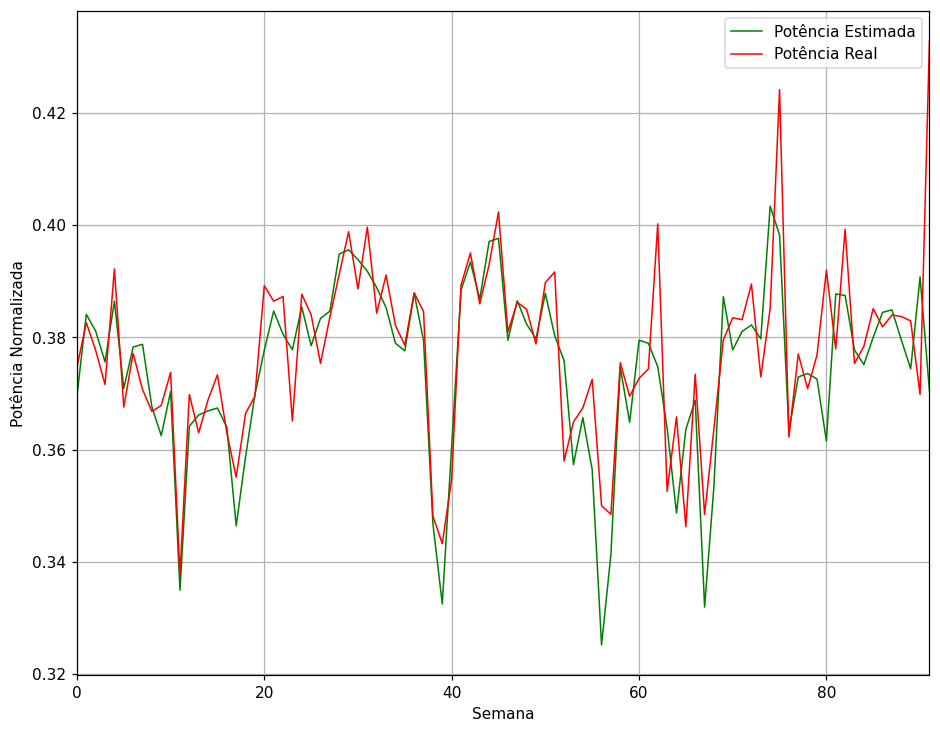

In [98]:
plt.figure(figsize=(10,8),dpi=110)
plt.plot(y_pred_best[:,0],lw=1,color='Green')
plt.plot(y_test[:,0],lw=1,color='Red')
plt.grid(True)
plt.xlim([0,91])
plt.xlabel('Semana')
plt.ylabel('Potência Normalizada')
plt.legend(['Potência Estimada', 'Potência Real']) 